# <font color='red'> <center> TP Clustering 5e SDBD A1 </center> </font>
**`LARTIGUE Auriane & MOUKHLIS Nabil`**

***
### <center> `Clustering k-Means` </center>
***

In [1]:
from scipy.io import arff
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import metrics

path = './artificial/'
dataset=["2d-10c","diamond9", "twenty", "spiral","banana","curves1"]
  


def plot(x,y,dim,labels="blue",title="Title",z=[]):
    if dim==2:
        plt.figure(figsize=(12,12))
        plt.scatter(x,y,c=labels)
        plt.title(title)
        plt.show()
    elif dim==3:
        fig = plt.figure(figsize=(20,20))
        ax = plt.axes(projection='3d')
        ax.scatter3D(x,y,z, c=labels)
        ax.set_title(title)
    else:
        print("Dimension non supportée")
        

def calcul_kmeans(data_tab,deb,fin,method="silhouette",dim=2):
    times=[]
    grades=[]
    max_value=0
    if(method=="silhouette"):
        for k in range(deb,fin):
            start=time.time()    
            kmeans = cluster.KMeans(n_clusters=k).fit(data_tab)
            end=time.time()
            labels = kmeans.labels_
            score = metrics.silhouette_score(data_tab,labels,metric = 'euclidean')
            grades.append(score)
            times.append(end-start)
        max_value = max(grades)
    elif method=="bouldin":
        for k in range(deb,fin):
            start=time.time()
            kmeans = cluster.KMeans(n_clusters=k).fit(data_tab)
            end=time.time()
            labels = kmeans.labels_
            score = metrics.davies_bouldin_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
        max_value = min(grades)
    elif method=="calinski":
        for k in range(deb,fin):
            start=time.time()
            kmeans = cluster.KMeans(n_clusters=k).fit(data_tab)
            end=time.time()
            labels = kmeans.labels_
            score = metrics.calinski_harabasz_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
        max_value = max(grades)
    else:
        print("Methode pas reconnue")
        return -1

    plt.figure(figsize=(12,12))
    plt.subplot(121,title="Score")
    plt.scatter(range(deb,fin),grades)
    plt.plot(range(deb,fin),grades,c='red')
    plt.subplot(122,title="Temps")
    plt.scatter(range(deb,fin),times)
    plt.plot(range(deb,fin),times,c='red')
    plt.suptitle(method)
    plt.show()
    max_index = grades.index(max_value)
    print(max_value)
    print(times[max_index])
    clusters = cluster.KMeans(n_clusters=max_index+deb).fit_predict(data_tab)
    f0 = [f[0] for f in data_tab]
    f1 = [f[1] for f in data_tab]
    title = "K-Means Clustering, k="+str(max_index+deb)+", " + method
    if(dim==3):
        f2 = [f[2] for f in data_tab]
        plot(f0,f1,3,clusters,title,f2)
    else:
        plot(f0,f1,2,clusters,title)
        
    
    
    
for nameData in dataset :
    databrut = arff.loadarff(open(path+nameData+".arff", 'r'))
    data = [[x[0],x[1]] for x in databrut[0]]
    calcul_kmeans(data,2,21,method="silhouette")
    calcul_kmeans(data,2,21,method="bouldin")
    calcul_kmeans(data,2,21,method="calinski")
    pass




***
### <center> `Clustering agglomératif` </center>
***

Durée: 4.614596128463745


Durée: 7.651881217956543


Durée: 7.385230779647827


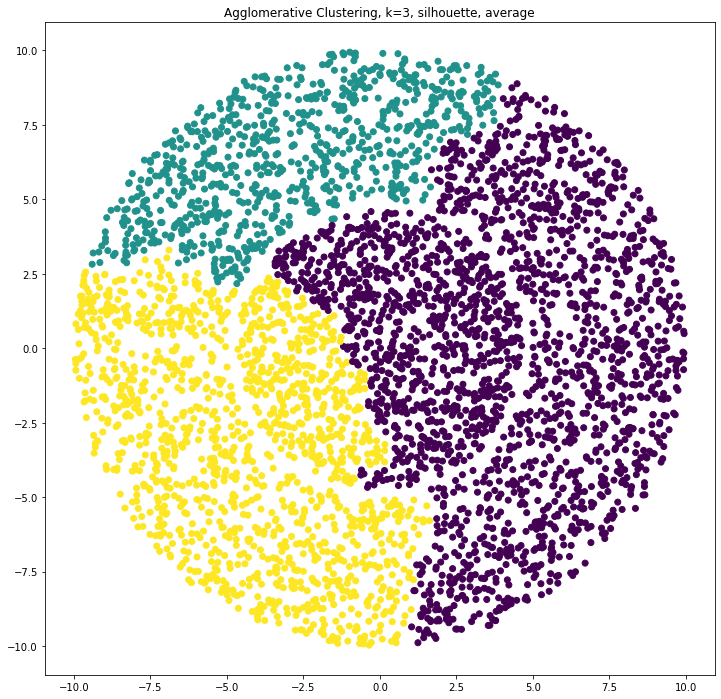

Durée: 7.271744966506958


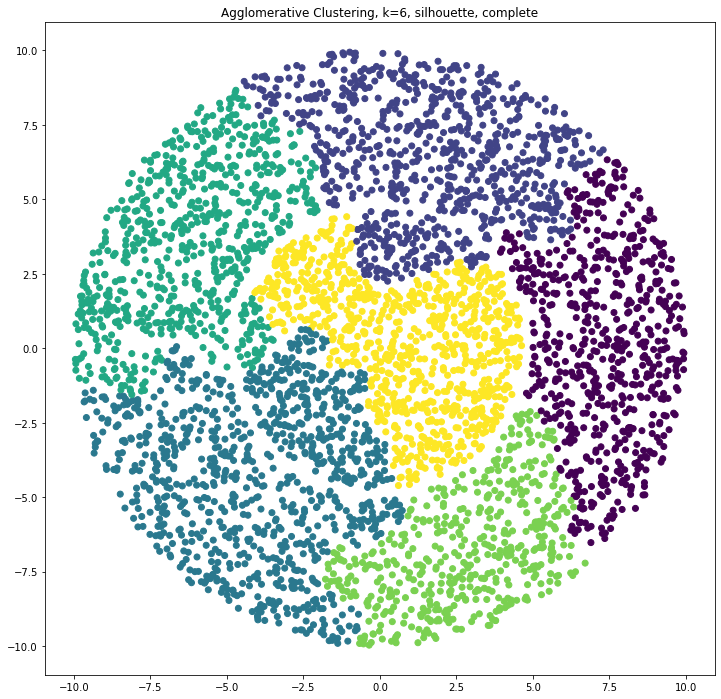

In [61]:
path = './artificial/'
databrut = arff.loadarff(open(path+"disk-4500n.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
dataset=["donut1","2d-10c","R15"]
dataset=["disk-4500n"]


def calcul_agglo(data_tab,linkage,deb,fin,method="silhouette",dim=2):
    agglo = []
    grades = []
    times = []
    start_time = time.time()
    if(method=="silhouette"):
        for k in range(deb,fin):
            start=time.time()    
            agglo = cluster.AgglomerativeClustering(n_clusters=k,linkage=linkage).fit(data_tab)
            end=time.time()
            labels = agglo.labels_
            score = metrics.silhouette_score(data_tab,labels,metric = 'euclidean')
            grades.append(score)
            times.append(end-start)
    elif method=="bouldin":
        for k in range(deb,fin):
            start=time.time()
            agglo = cluster.AgglomerativeClustering(n_clusters=k,linkage=linkage).fit(data_tab)
            end=time.time()
            labels = agglo.labels_
            score = metrics.davies_bouldin_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
    elif method=="calinski":
        for k in range(deb,fin):
            start=time.time()
            agglo = cluster.AgglomerativeClustering(n_clusters=k,linkage=linkage).fit(data_tab)
            end=time.time()
            labels = agglo.labels_
            score = metrics.calinski_harabasz_score(data_tab,labels)
            grades.append(score)
            times.append(end-start)
    else:
        print("Methode pas reconnue")
        return -1
    end_time=time.time()
    print("Durée: "+str(end_time-start_time))
    max_value = max(grades)
    max_index = grades.index(max_value)
    agglo = cluster.AgglomerativeClustering(n_clusters=max_index+deb,linkage=linkage).fit_predict(data_tab)
    f0 = [f[0] for f in data_tab]
    f1 = [f[1] for f in data_tab]
    title = "Agglomerative Clustering, k="+str(max_index+deb)+", " + method+", "+linkage
    if(dim==3):
        f2 = [f[2] for f in data_tab]
        plot(f0,f1,3,agglo,title,z=f2)
    else:
        plot(f0,f1,2,agglo,title)
    

for nameData in dataset :
    databrut = arff.loadarff(open(path+nameData+".arff", 'r'))
    data = [[x[0],x[1]] for x in databrut[0]]
    calcul_agglo(data,'single',2,20)
    calcul_agglo(data,'ward',2,20)
    calcul_agglo(data,'average',2,20)
    calcul_agglo(data,'complete',2,20)

***
### <center> `Clustering DBSCAN` </center>
***

BRUIT : 7.875


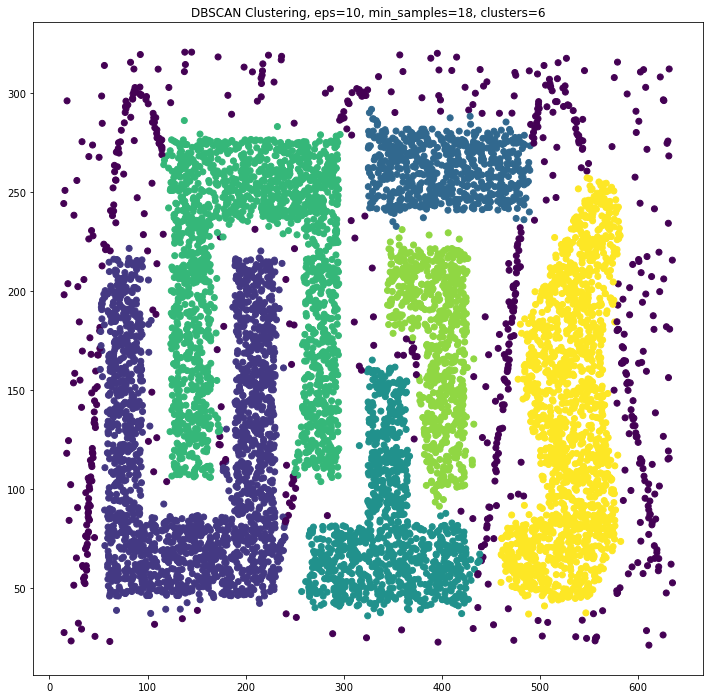

In [133]:
from operator import itemgetter

path = './artificial/'
dataName = "cluto-t4-8k" #cluto-t4-8k.arff ; cluto-t5-8k.arff ; cluto-t7-10k.arff ; dense-disk-3000
databrut = arff.loadarff(open(path+dataName+".arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

dataset=["2d-10c"]

def calcul_dbscan(data_tab,dist_min,dist_max,dist_step,nb_min,nb_max,dim=2):
    grades=[]
    for dist in np.arange(dist_min,dist_max,dist_step) :
        for nb in range(nb_min,nb_max):
            start=time.time()
            db = cluster.DBSCAN(eps=dist,min_samples=nb).fit(data_tab) 
            end=time.time()
            labels = db.labels_
            try:
                score = metrics.silhouette_score(data_tab,labels)
            except ValueError:
                score=0
            grades.append((dist,nb,score))
    #print(grades)
    max_tuple = max(grades, key=itemgetter(2))
    #print(max_tuple)
    clusters = cluster.DBSCAN(eps=max_tuple[0],min_samples=max_tuple[1]).fit_predict(data_tab)
    
    if(len(clusters)!=0):
        print("BRUIT :",100*(clusters.tolist().count(-1)/len(clusters)))
    else:
        print("BRUIT : Problème, liste vide")
        
    f0 = [f[0] for f in data_tab]
    f1 = [f[1] for f in data_tab]
    title = "DBSCAN Clustering, eps="+str(max_tuple[0])+ ', min_samples='+str(max_tuple[1])+', clusters='+str(max(clusters)+1)
    if(dim==3):
        f2 = [f[2] for f in data_tab]
        plot(f0,f1,3,clusters,title,z=f2)
    else:
        plot(f0,f1,2,clusters,title)

# cluto-t4-8k.arff
calcul_dbscan(data,dist_min=9,dist_max=11,dist_step=1,nb_min=15,nb_max=20,dim=2)

# cluto-t5-8k.arff
# calcul_dbscan(data,dist_min=5,dist_max=9,dist_step=1,nb_min=15,nb_max=20,dim=2)

# cluto-t7-10k.arff
# calcul_dbscan(data,dist_min=13,dist_max=15,dist_step=1,nb_min=25,nb_max=27,dim=2)

# Dataset dense-disk-3000.arff
# calcul_dbscan(data,dist_min=0.05,dist_max=1,dist_step=0.05,nb_min=2,nb_max=7,dim=2)


***
### <center> `Clustering HDBSCAN` </center>
***

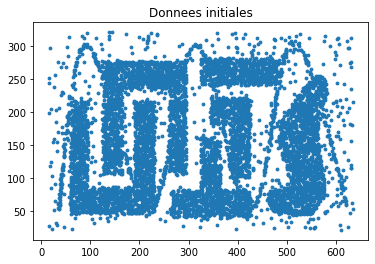

'\nclusterer = hdbscan.HDBSCAN(min_samples=1)\ncluster_labels = clusterer.fit_predict(data)\nplt.figure(figsize=(12,12))\nplt.scatter(f0,f1,c=cluster_labels)\nplt.show()\n'

In [4]:
from hdbscan import HDBSCAN
from operator import itemgetter

path = './artificial/'
dataName = "cluto-t4-8k" # cluto-t4-8k ; cluto-t5-8k ; cluto-t7-10k ; dense-disk-3000 
databrut = arff.loadarff(open(path+dataName+".arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

def calcul_hdbscan(data_tab,nb_min,nb_max,dim=2):
    #import hdbscan
    grades=[]
    for nb in range(nb_min,nb_max):
        start=time.time()
        db = HDBSCAN(min_cluster_size=nb).fit(data_tab) 
        end=time.time()
        labels = db.labels_
        score = metrics.silhouette_score(data_tab,labels)
        grades.append(score)
    max_value = max(grades)
    max_index = grades.index(max_value)
    hdb = HDBSCAN(min_cluster_size=max_index+nb_min).fit_predict(data_tab) 
    f0 = [f[0] for f in data_tab]
    f1 = [f[1] for f in data_tab]
    title = "HDBSCAN Clustering, min_cluster_size="+str(max_index+nb_min)
    if(dim==3):
        f2 = [f[2] for f in data_tab]
        plot(f0,f1,3,hdb,title,z=f2)
    else:
        plot(f0,f1,2,hdb,title)




# Dataset cluto-t4-8k.arff
calcul_hdbscan(data,15,20)

# Dataset cluto-t5-8k.arff
# calcul_hdbscan(data,15,20)

# Dataset cluto-t7-10k.arff
# calcul_hdbscan(data,13,20)

# Dataset dense-disk-3000.arff
#calcul_hdbscan(data,2,10)


### <center> `COMPARAISON DBSCAN HDBSCAN` </center>


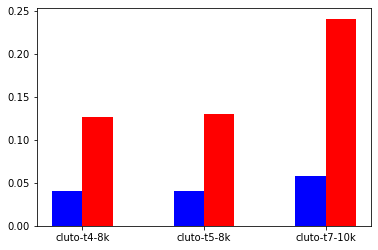

In [145]:
#Format : Name, epsilon, minSamples, min_cluster_size
dataset=[["cluto-t4-8k",10,18,19],
         ["cluto-t5-8k",7,18,19],
         ["cluto-t7-10k",14,25,15]] 

runtimeHDBSCAN = []
runtimeDBSCAN = []

#Used method HDBSCAN et DBSCAN with 'optimal' parameters and calculate runtime
for tab in dataset :
    databrut = arff.loadarff(open(path+tab[0]+".arff", 'r'))
    data = [[x[0],x[1]] for x in databrut[0]]
    startDBSCAN=time.time()
    cluster.DBSCAN(eps=tab[1],min_samples=tab[2]).fit(data) 
    endDBSCAN=time.time()
    startHDBSCAN=time.time()
    hd = HDBSCAN(min_cluster_size=tab[3]).fit(data) 
    endHDBSCAN=time.time()
    runtimeHDBSCAN.append(endHDBSCAN-startHDBSCAN)
    runtimeDBSCAN.append(endDBSCAN-startDBSCAN)
    
# Plot runtimes with HDBSCAN and DBSCAN
names = [ i[0] for i in dataset ]
plt.figure()
X = np.arange(len(dataset))
plt.bar(X,runtimeDBSCAN, color='b',tick_label = names, align="edge",width=0.25)
plt.bar(X+0.25,runtimeHDBSCAN, color='r',tick_label = names, align="edge",width=0.25)
plt.show()

***
### <center> `Synthèse` </center>
***

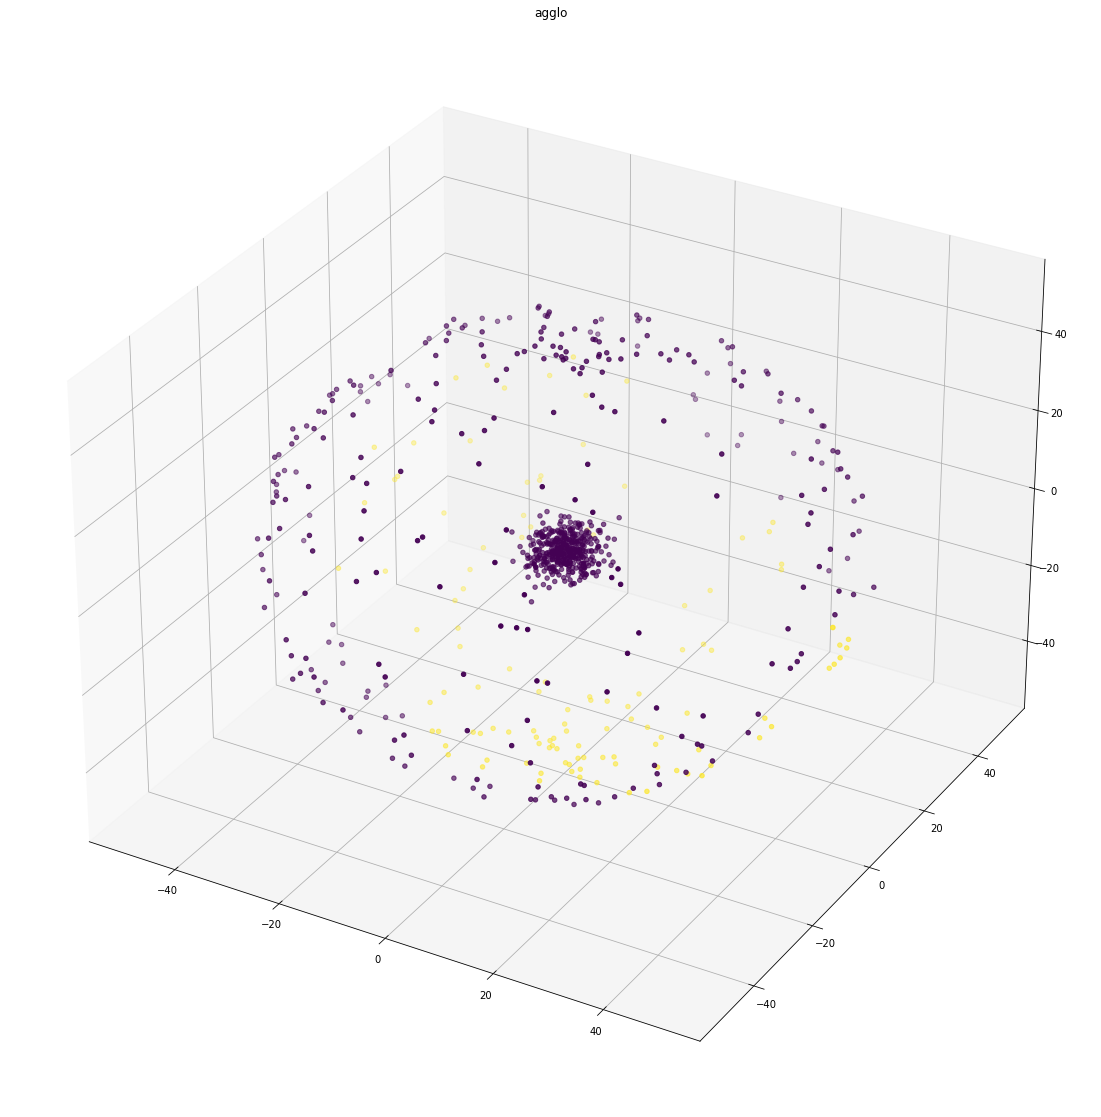

In [12]:
import plotly.express as px
df = px.data.iris()

# DIMENSION 3

# A.DATA SILHOUETTE
f0_a =[-4.82249, -44.46012, 50.00102, -41.69908, 4.425242, 27.26058, -19.988, 47.5704, 41.8764, 15.85935, -33.77252, 3.218305, 4.31406, 22.7331, 5.453126, 6.473627, -21.38691, 34.33926, -2.538081, 14.16785, 33.07119, -45.86114, -45.06056, 11.35568, 26.94642, 23.97626, -22.61322, -46.64605, -43.8916, -7.45989, 48.77461, -45.7206, -31.63734, -42.95419, 0.7238982, -36.67465, -26.96182, -12.54398, -3.791277, -2.104881, 15.93932, 20.82794, 34.87016, 7.022449, 16.93301, 48.95567, -10.47965, -3.377526, -17.27796, -20.78939, 19.70845, -18.0635, 11.00464, -12.04288, -5.762872, 32.77245, 4.349359, -37.4316, 1.095149, 20.81152, -16.63654, -49.46474, -32.93833, -34.69399, -1.700924, 9.342566, -0.7621773, -22.53897, -43.22574, 0.146423, 35.09462, -13.35171, 5.15683, 17.57125, 40.25838, 39.77912, -10.20641, -28.97766, 5.347855, -29.34843, 7.751599, -20.17439, -1.591191, -47.99001, -31.08115, -24.65025, 2.615159, 29.87216, -22.57602, 7.257201, 28.67004, -44.33257, 12.6086, 34.84005, 0.6930852, -40.55072, 36.46811, 46.04884, -11.2556, -26.34762, 27.7089, 4.957815, 12.02478, -33.9034, -0.6913066, -21.28546, 5.779592, 47.65302, -11.25033, -26.76125, 48.96192, -41.06392, -26.52002, -38.85771, -2.515191, 6.50394, 14.96289, -2.025608, 40.88566, -14.3098, -3.27665, -27.98439, -44.5204, -30.49969, -13.12977, 15.69404, 4.421565, 28.2317, -22.90543, 10.99909, 47.35365, -33.60902, 1.020812, -25.79635, -2.533395, 38.90562, -8.89362, -36.85225, -44.43241, -17.25394, -6.064972, 47.50892, 19.13517, -17.02271, 44.37608, -2.487963, 21.9998, 12.12234, -31.38082, -14.69619, -1.570841, 23.83922, 10.23427, 17.72995, -23.2807, -22.85635, 19.38618, 8.098991, 32.80908, -6.456641, 10.61215, 28.89482, 6.838639, 16.24363, 33.33504, 15.09552, 16.69818, -0.3559351, -38.98961, -43.20009, -30.52187, 23.48271, 12.52884, 7.496297, -11.35721, -8.301093, -32.83114, 34.09921, 21.62079, 3.491038, -39.16634, -48.47684, 18.24831, 20.80812, -48.67136, 6.568269, -6.752613, -44.87937, -35.09465, -24.77118, 29.18215, 0.9745382, -41.6554, 24.75164, -46.88357, 13.39536, 11.16815, 20.26882, 23.55002, -19.29657, 35.46157, -46.48111, -28.49779, 24.69414, -24.70609, 20.02143, -2.168572, -31.92266, 15.04082, -5.382507, 19.26804, 30.95699, -16.55415, -17.59724, 36.35111, 40.0404, -9.102509, -26.14375, -21.7382, 31.98738, 18.59285, -3.811619, 49.76361, 26.83767, -3.206753, -44.50087, 15.59361, -25.90782, 9.414464, -44.87765, 14.20206, -22.17526, -19.8821, -7.091579, 2.3646, 38.44342, 2.365793, 29.318, 41.60221, 14.27009, 17.78474, -30.60782, -35.13651, 38.15176, 39.68217, 33.49055, -46.07051, 20.13949, -14.16664, 5.311071, -27.91478, -48.79479, 6.928665, -33.92357, -46.46928, -25.74115, -11.62565, 46.17046, -27.06898, 8.794248, -4.247651, -0.8666983, -10.67849, 41.50206, -6.271647, 25.29207, -21.24144, 10.36366, 36.28288, -28.14774, -6.204708, -5.061931, 16.2768, 2.083891, 18.29273, 4.772465, 3.675565, -27.68478, -23.7102, -28.65841, -14.10338, -1.673709, 10.2283, -3.916615, -3.65934, -15.41431, 23.12736, 22.19725, -43.62921, -6.123117, 15.07826, -35.32299, -28.18722, -11.91392, -26.40349, 30.85129, -38.55605, 1.118891, -32.91517, 0.7997207, 2.548724, -17.6683, 23.21439, 43.24806, -18.89171, 6.317842, -2.02899, 4.811247, -22.83097, -10.96187, -40.77551, -2.422117, -4.763024, -1.692692, -40.13388, -42.20175, -49.02459, 12.23806, 29.34727, 10.49566, -1.676561, -44.47906, 42.65319, -15.96402, -43.91615, 13.50486, -16.50981, 30.2339, 7.178304, -14.43792, -27.2406, -37.56518, -1.183901, 46.7896, -13.2169, 14.313, -12.53725, 14.4142, 24.72322, 11.93249, 43.47521, -28.55507, -17.6162, -14.66631, 0.7349299, 5.590621, 1.801536, 39.10788, 16.43955, 37.26142, -26.56257, -4.503966, -27.8525, -4.881838, -44.20992, -36.51986, -29.10923, 0.7703682, 10.06615, -20.505, 4.140492, -11.08649, 14.27564, 9.463121, -21.24122, 48.54252, -25.95555, -5.926018, 43.22695, 22.50138, -1.676615, -11.84379, 10.12314, -5.88182, 4.442041, -47.06148, 6.110267, 40.88596, 14.90146, 48.04972, -22.02923, -38.88169, -37.48659, -14.29629, 43.32907, -32.87598, 45.57623, -27.99436, 15.24113, 43.90917, 40.11679, 35.23984, 9.095878, 23.85557, 16.40414, 25.97567, 3.486008, 15.33379, -10.78011, 8.018622, 0.6857508, 0.211911, 2.439457, 5.971988, -2.646234, -1.080572, -0.1465547, 1.994454, -3.052135, 1.801007, 2.314274, -0.5953394, 2.154614, 3.472002, 7.372167, 3.706295, -3.93839, -4.051334, -0.8531086, -2.838916, 0.4749569, -1.474658, 1.969728, -0.939271, 7.361267, 2.010779, 0.2196354, 0.3656419, -2.273953, -2.389804, 5.022775, 6.548579, -1.363253, -4.743645, -1.009205, 1.64609, -1.91998, 3.395606, -3.118424, 2.699059, 2.336222, -1.838001, 2.208435, -2.247011, -3.249057, 3.699544, -2.78142, 1.187184, 2.643978, 3.735515, -3.583686, 2.129532, -2.315981, -0.2686535, -0.1068473, 2.333638, 2.219055, 0.7201211, 1.64071, -3.731598, 1.011045, -1.954354, 0.2046087, -8.378955, -0.7973953, 5.478362, 0.5565598, -0.8348679, 0.2320126, -1.565779, 1.08985, 0.9376637, 5.681549, -1.441338, 1.792972, -1.91641, 0.5039803, -0.4613391, -1.269224, -0.8178036, -4.664956, 0.9845514, -2.999286, 2.959275, -4.944213, -1.252367, -0.7713222, 3.049083, -8.909048, -2.245051, 2.437466, 3.570202, -5.331455, -0.4750815, 1.883331, -2.739164, -2.519814, -1.098556, -0.3814715, -1.5088, 0.2953837, -1.455601, 2.96581, 0.8941062, -3.648411, 3.746515, -2.732619, -0.2979396, 5.084834, 3.668543, -5.234294, 3.107282, 1.263883, 2.00673, 1.564927, -3.443766, -2.077176, -0.1978189, 1.598787, 0.4937305, 3.559815, -0.6070062, -3.069798, 2.220496, -5.838797, -0.6767248, -0.3961536, -1.1085, -4.336126, 1.178765, -1.941379, 0.008128069, -2.782534, -4.770282, -0.1336568, -1.622752, -0.3926941, 2.893812, 3.761822, -2.369809, -5.248944, -2.023955, 3.669015, 0.2142926, -1.982968, -1.08896, 5.491744, 1.164466, -1.88978, 2.958213, -0.9527743, -2.405642, 0.7097337, 1.251169, 2.691934, 4.414724, -7.025569, 1.927051, -1.533714, 2.379856, 1.10753, 5.523097, 1.362398, -3.165903, 6.387508, -1.6154, 0.2982882, -3.233665, -0.7221485, -3.18231, 0.4880486, 0.885876, 4.419872, 0.9427458, 1.900041, 0.4523788, 2.935812, -4.997471, 1.78273, 2.675553, 0.7521032, -2.070227, 1.02425, -6.092107, 3.000736, 0.5838262, 5.67912, -1.041584, 0.4323519, 2.434593, 1.559262, 7.163709, -0.101938, -2.628153, -0.3906383, 3.883383, -0.1072219, -0.1192542, 3.157758, -1.069912, 0.9268324, -5.233704, 1.346109, -0.4786681, -5.96451, 3.520877, -0.3073581, 6.663724, 2.440755, -0.4248996, 3.57414, 2.338076, 3.992547, -2.135379, 0.4561528, -0.04466124, -1.072438, -1.243867, -6.9719, -1.045548, -4.256829, 2.331976, -7.84659, 7.247825, -2.862248, -4.388342, -1.772414, 0.5285532, -5.245003, 4.011352, 4.892448, -3.268758, -1.123781, -2.486274, 1.940859, -3.653413, -6.041536, 5.747879, -0.05869537, 2.588932, -1.372604, 5.653621, -2.839539, -0.2039446, 0.8025108, -1.976681, -0.1680746, 5.311834, 2.651291, 6.933685, 3.978823, 2.377309, -0.2128159, 1.875357, -1.00294, 2.502218, 4.493396, 0.115232, 0.9802681, 1.080192, 2.075016, 1.10094, 3.789117, 5.257907, 0.1882316, 1.943879, 2.075994, 5.309885, 1.448928, 1.283893, 2.076752, -2.522585, 7.864556, -2.84233, 3.009396, -3.273504, -0.4807812, -2.226771, -0.003118659, -3.284969, 3.733898, -0.8347441, 3.033981, 1.155672, 3.358897, -3.88689, 0.7883284, 0.808499, -3.239599, -4.040467, -4.40666, 2.177722, -0.5423036, -4.680035, 0.3397221, -2.569937, -0.008597723, -0.4032857, -0.7338297, -4.953256, -1.460271, 5.009099, -0.3860498, 0.328537, 2.975795, -2.281982, -0.7550154, 6.163693, -3.508145, -0.5110323, 1.432413, -0.4250549, -7.859106, 0.5771182, 0.3978062, 5.946682, -0.05928309, -1.098158, -2.428037, -1.454578, 4.839734, -2.983916, 2.804998, -0.8027642, -2.986948, 1.530625, 0.4877746, 1.95349, 0.8812891, 0.09317048, -3.539404, -3.932523, -2.675714, 0.9041734, -2.838529, -4.201611, 0.3715026, -3.719853, 2.313993, -1.62668, 4.701603, -1.809786, -1.489649, 2.674433, 0.4177258, -0.6343364, 1.670784, -1.489334, 2.002893, 0.4493406, 4.622113, 0.485315, 3.700039, 0.1042715, -3.441811, 1.491339, -3.234402, 2.080019, -5.49479, 4.079701, 0.2758031, 3.040441, -0.144522, 3.293521, -3.870644, 1.729528, 0.8641051, -0.9963443, -3.009908, 4.185205, 3.853745, 0.02009968, 0.522799, 2.095707, -4.656394, 2.41815, 5.001428, 2.477508, 4.748669, -0.9674336, -0.8809894, -5.681612, -2.243695, -3.906831, 3.321621, 0.8592244, -4.422729, 3.255994, 0.3683167, 1.728795, 7.14411, -0.2977869, -3.203857, -1.565805, -0.8787358, -1.531027, 0.5007537, 1.089574, -1.907717, 3.415463]
f1_a =[-50.40217, 20.96467, 0.7807481, -22.31006, -4.666664, 23.38604, -6.638056, -1.571324, 10.83021, 14.686, -36.60115, -44.84079, -2.829593, -33.76487, 4.356794, 49.40687, 44.32754, -11.68791, -40.3518, -35.62283, -28.15823, 2.049557, 16.24832, -8.953778, -32.28738, 43.49894, 1.12052, 13.00358, -18.32661, -12.62892, -10.88641, -20.06, -22.73955, 22.21346, -0.5390864, -11.73224, -42.71378, -44.17073, 10.2348, -2.757672, -40.4724, 22.35719, 27.49711, 10.49432, -46.36226, -9.864451, -23.89419, -43.36406, 39.43855, 44.21985, -23.33272, -12.48334, 28.33156, -35.05996, 35.68634, -26.81582, -15.73848, -13.33147, -28.95145, -45.09924, 40.85904, -9.365017, 37.47076, -13.47161, 3.878389, -48.16571, 0.242945, -1.074838, -19.92554, -2.590253, 35.27068, -41.21441, 16.4838, -27.34733, 21.12824, -27.23688, 12.49038, -9.167267, 9.703275, -29.73358, -1.21041, 34.00705, -9.64301, -3.734926, 22.26071, -38.61415, 23.41465, -38.8878, -14.56696, 14.53641, 41.82245, -11.93141, 14.71034, 33.95954, 47.70752, 10.0782, 25.91996, -18.70015, 14.99203, 28.01287, -31.65224, 2.793576, -30.42038, 33.37337, 50.59888, 31.15772, -4.921898, 2.013214, -32.35077, 38.64196, -13.58528, -8.996117, -41.99598, 31.28569, -46.94446, -8.794935, -9.978585, 0.04964101, 16.21842, 16.65692, 50.2128, 12.86504, 20.09092, 16.16691, 44.15611, 46.58119, -0.4555505, -31.7384, -40.52252, 33.17303, -16.80534, -31.43792, -2.477213, 6.522167, 4.720672, 11.80128, -44.05494, -10.28442, 0.7083098, 22.097, -16.46601, -11.84642, 40.67304, 11.34864, -18.80899, 0.9622863, -43.85001, -28.15303, 27.30521, -45.58635, -1.131274, 16.03683, -1.183003, -39.4835, -29.6062, -43.16858, 40.13338, -8.90821, -34.0526, 1.122958, 9.583215, 35.19984, 2.594893, 13.01361, 8.206512, 41.48158, -44.23849, -1.865036, -9.487279, -24.29032, 20.42487, -34.72635, 28.36919, 27.39054, -32.35619, 8.04872, -34.61644, -30.94227, -5.983094, -5.590563, -30.02453, -0.9443744, -31.17883, -27.43795, -10.729, 44.86672, 4.428355, 10.24572, -16.77224, -42.13846, 35.27971, -1.076707, -16.53109, 43.64613, 17.48583, 10.85655, -2.346825, -33.53818, -3.955634, -46.71972, -22.90718, 13.37205, 22.64155, -38.03717, -16.40013, -4.044525, 48.94227, 5.88428, -30.53569, 2.117309, -45.46831, 34.95664, -17.9403, 4.095142, -34.58334, -22.59247, -2.622652, 31.42785, 33.06834, -36.17371, -43.36289, 5.949773, 0.04336323, -6.235159, -40.77514, 1.440294, -24.10409, 9.968161, -47.31675, -15.92584, -44.84281, 42.26628, -32.87743, 37.44145, 7.391677, 22.12334, 0.8129662, -29.17177, 3.430297, 7.708516, 46.87565, 19.16917, -34.40076, 1.3047, 20.87902, -13.76336, 14.35748, -13.85247, 37.641, 1.981352, 3.326468, -7.853357, 38.10239, -24.50821, -20.22653, 33.7682, -21.11612, 12.95738, 39.63657, 3.027069, 8.789343, -28.31705, 12.457, -28.7027, -25.36591, -28.03253, -30.16006, -9.062661, 35.08028, -33.01025, -4.217845, -45.69232, -21.03139, 5.838801, -43.5623, -6.594583, -32.59256, 34.71555, 8.074168, -15.43324, -5.827681, 12.11732, 43.29045, -1.481448, -50.46101, -14.20952, 14.88019, 28.39519, -8.788146, -10.98347, 45.03738, -19.63147, 36.92129, -17.66227, 41.55071, -3.649354, -3.145174, -26.31832, -21.91888, -1.614539, 5.762376, -11.11593, 4.272787, 18.23998, 4.005896, -5.627168, 12.3768, -2.576305, -5.172263, 44.4455, -3.840934, -0.4205238, -24.28322, -22.40035, -23.88943, -14.22269, -3.948233, -9.352941, -2.915915, -40.20741, -1.926316, 19.08395, 23.04041, 38.35168, 25.51323, -26.76754, -34.14365, 28.53781, -15.8783, -38.43511, -20.58386, 24.63804, 12.50498, -5.428576, -3.617789, 45.24936, -6.122769, 5.507587, -36.96659, 10.63697, 3.129027, -38.59994, 39.166, 47.50269, 22.86023, -3.165642, -10.81482, -31.22524, -38.30058, 24.40814, -9.801281, -1.384816, -17.26728, -0.8021143, 12.75119, 18.76769, 28.74427, 13.37954, 5.934258, -29.27766, 7.276366, 10.98255, 30.85341, 38.41169, -41.14747, 8.97072, 7.511405, -8.151059, 17.74809, -32.4333, -19.41668, -3.100888, -35.97861, -2.488278, 13.9605, -12.1271, 48.82202, 21.04953, 47.77287, 17.27542, -44.69981, -27.00149, 33.50115, -14.51095, 13.10979, -11.18051, 10.69727, 12.55625, 14.0065, 1.319353, -26.44239, 2.785888, -43.90266, -14.64062, -37.68288, 31.85128, 35.42002, 46.17612, -7.045256, -1.023863, 0.882203, 2.566241, 2.259743, 1.003704, -2.439604, 1.800438, 1.11926, 1.20906, 5.57863, 0.04444109, -1.492039, -1.798263, -3.375758, -6.171456, -1.635844, -2.422915, 0.2432051, -0.99387, 1.039651, -4.764276, -1.280334, 3.5688, 3.915431, 0.8140218, -1.438232, -1.53542, 7.214851, 5.426153, -0.4099031, -4.922831, -1.923718, 5.189726, 1.107519, 0.6285966, 0.8447483, 2.341043, -0.9656597, 0.3341458, -0.8117026, 1.217836, 4.177088, -2.447912, -2.749863, -1.219582, 1.615225, -2.479789, 2.796381, 2.394058, -1.123777, -5.618837, -0.2521519, -4.943742, -0.7033198, 1.509548, -2.140609, 2.643679, 1.809333, -1.480367, 4.98128, -0.2800017, 0.9160681, 1.419827, 3.442643, -2.165526, -2.390583, 0.1766405, 2.612871, -2.317563, 1.858847, 2.008856, 1.484981, -1.428467, 3.124042, -0.1767457, 5.29798, -2.142672, -3.089233, 2.884551, -8.448683, -0.2487775, -5.306959, 2.496533, -3.242489, 0.9715286, -0.9660186, -3.982138, -2.160952, 3.75736, 5.340831, 2.96762, -5.246342, -1.469213, 8.447442, -3.71395, -3.156272, -2.16784, 2.893383, 0.8500788, -1.471878, -1.957367, -2.565544, -6.507712, 3.029429, 0.5047947, 1.566411, -0.2427881, -0.6682261, -1.464379, -2.734686, -4.129444, 3.376536, 3.157263, -2.273074, -2.901646, -4.635948, 2.671811, -0.2060344, -5.25484, -1.150763, 4.184748, 2.683231, -5.26743, 2.921481, -2.960297, -1.188735, 6.614396, 3.213444, 0.6563444, -3.231944, -1.87288, 3.33113, -2.517313, 1.211172, 4.453332, 0.6202189, -2.685083, 4.582314, -2.772849, 0.8375366, -2.616509, -3.318315, 0.7932941, -0.5903276, 1.114604, -5.70245, 3.611339, 1.489262, -2.593486, -1.130378, 0.4932887, 0.5318725, -3.759512, 0.376005, -0.1649526, -0.9034802, -0.7328438, 2.261951, -2.068123, -0.9314605, 2.53336, -6.067991, 1.682912, 0.5113904, 0.4347524, -5.439273, -4.144359, 3.111602, 3.61911, 0.7000583, -2.673871, -3.86234, -1.35837, 4.162047, 3.3255, 2.055249, -1.555019, -3.739588, 1.60936, -0.2305766, -0.4205683, 3.92692, 0.9194031, -1.369198, 2.777138, -3.304323, 1.68413, -0.1005359, -2.543006, -0.9002614, -1.362968, 2.826316, 1.958183, 3.17642, -0.253563, -0.4021129, 2.395423, -2.04261, 0.9417715, 6.460398, -4.775348, -1.526029, 1.543572, -0.6676131, 0.9935639, 1.18326, 2.827412, -1.381675, -4.448422, 0.9170853, -3.142687, 1.412587, 0.4267432, 2.48695, 5.741222, -3.983706, 5.381961, -0.4053225, 0.2260037, 4.324254, -0.7897105, -2.068193, 0.4673227, -3.365855, -5.909715, -1.491997, -0.7993243, 0.6946711, -2.032989, 0.7892834, -1.813788, 1.673377, 1.771743, -1.262322, 0.7246917, 1.538409, -1.548443, 1.60262, 1.361524, 0.7790818, -6.165571, 7.19394, 3.988551, 5.249275, 2.354881, -0.4010434, 3.0932, 3.427764, -2.229388, 1.682682, -1.508769, 2.386428, 2.137458, 2.122509, 2.307338, 1.979053, -0.3992083, 1.024049, -0.8651327, 1.890776, -0.6882419, -0.8435984, 1.799926, -4.632595, 9.103975, -3.904892, 2.012915, -0.6257136, -1.799667, -7.414156, -1.23663, -1.890981, -0.6111432, 1.761767, -4.885815, -1.065114, -4.6652, 1.587906, -2.733694, -3.95916, 1.824634, 4.388027, -2.18729, -1.222419, 3.858163, -1.027027, -5.18949, 5.584366, 0.8842943, 0.07157519, -4.133659, 1.116417, -2.906242, 2.754569, 6.311411, -4.130182, 1.606615, 2.775126, -0.2865252, 4.09292, 1.546696, 1.317705, -3.105473, 6.676989, 3.946375, 0.2422899, 5.795712, -0.8253743, 4.126769, -5.291994, 0.5576283, -2.198103, -0.6164634, -0.7170842, 1.85594, -1.407337, -2.297922, -5.609141, -6.583595, 1.155442, -1.356917, 0.8496217, -0.6775176, -1.118266, 4.263139, 3.252586, -0.8581271, 0.498832, -1.73589, -1.219495, 2.604835, 2.428516, -4.912853, -2.196411, 5.937512, 4.076371, 0.06896203, 1.343751, -5.47899, 1.973408, 1.381789, 3.080433, 0.5965799, 0.3334515, -2.163165, -3.090928, -2.428258, -5.532695, 0.5117131, -4.335721, -1.711912, -1.718422, -5.637339, -3.555049, -0.1783742, 0.2308942, -0.8376264, -1.808231, 0.004774983, 3.53491, 5.265863, -0.1937169, -2.243949, 0.6527299, 3.345644, -1.555483, -3.898264, -2.456077, 3.907127, 0.08073034, -0.9303026, -3.348238, -2.239406, 1.280249, -0.7357503, -0.6939252, -3.682886, 4.521816, -1.2386, -2.637736, 0.070325, 2.270787, 4.389901, 0.2096124, -4.972195, -0.5973437, 3.654618, -1.650484, -1.733413, -0.6210239, 0.4226163, 3.708753, 0.6195213, -2.275129, 0.5209585, 3.693478, 0.6816365, -1.848209, -0.2464933, 4.964502, 4.529521]
f2_a =[4.020861, -11.49206, 9.13446, 16.31412, 50.22374, 35.06772, 45.86818, 15.8721, 24.64421, 44.09609, 3.766672, 22.52914, -50.04402, 28.55148, 48.95405, 0.3539394, -9.408566, 34.82704, 29.40645, -32.61538, -23.45108, 21.06677, 15.40648, -49.02086, 25.70605, 8.875034, 43.846, 14.79079, 19.00224, -48.4261, -0.9436041, -9.225777, 31.27342, 11.99868, 50.49664, 31.75296, -4.202611, 17.12193, 47.8953, 49.14903, 22.66677, 38.69671, 20.86706, -48.06278, -10.05664, 0.3758181, 43.89176, -23.22464, 24.45212, 3.80786, -40.17329, -45.34063, -39.06953, -33.67099, 34.41024, -27.31609, -46.58156, -29.36227, 41.19409, 6.71862, 23.28948, 4.165513, 5.488567, -33.68293, -50.18907, 5.786603, 50.54068, -45.07567, -14.80758, -49.4474, 3.152403, 25.29178, -46.40707, 37.69288, -22.4371, -13.81376, 47.36394, -40.12533, 48.8182, -27.20795, 48.48497, -29.97805, -48.89731, -13.51071, -31.88627, 20.05759, 44.5257, 3.377874, -41.73751, 47.57259, 4.503478, 21.89896, 45.88678, -10.87016, 15.27311, -27.85772, -22.74993, -9.746982, 46.56661, 31.83715, 27.68707, 49.31642, -37.49503, 13.62383, -3.136346, 32.29716, 49.71489, 17.81435, 36.86448, -17.24929, -0.6522584, 25.71, -8.558903, 9.822041, -15.17955, -48.28183, 46.97517, 50.5298, -24.76219, 45.46714, 6.63532, -39.89967, -11.79887, -35.79538, -17.2343, -10.78499, 49.46495, 24.18817, 18.15122, 36.23688, 2.047461, 20.79608, 50.5857, 43.05138, -49.26161, 30.41467, 20.70422, -31.86347, 22.80296, 41.54161, -46.84798, 7.375438, -23.05783, -45.25962, -15.02566, -50.34179, 5.786808, 39.30494, -29.55518, -14.8987, -50.39623, 40.23738, -48.35214, -25.10024, -31.71901, 9.428436, -24.0397, -49.00687, 15.72066, -50.14607, -48.09697, 20.01794, 48.91467, -44.43923, -35.21809, 24.88161, 17.47795, 50.10813, -28.06464, -1.564957, 33.02506, 28.37988, -40.08085, -41.32372, -37.36999, 47.99522, 15.94803, -18.8846, 44.65717, -49.57293, -9.61393, -8.961936, -33.83826, 35.95826, 3.423902, 21.62113, 49.64736, 18.68548, 32.60057, -12.20059, 20.0137, 49.32918, 22.05314, 3.542096, -2.534842, 46.0423, -48.95842, 30.6549, -44.27267, -7.68587, -25.87966, -14.28129, 34.17736, -22.43411, -41.74278, -44.81512, 6.657756, -37.10368, -35.32828, 49.83157, -3.429013, -16.28408, 43.40404, 45.98448, -0.95707, -21.29191, -48.89323, -27.50999, 31.3796, 11.84347, -15.83322, 49.23386, 3.636998, -42.08913, 28.55627, -22.84606, -41.79011, -41.97255, -8.793803, 12.69684, 17.31598, 14.5148, 32.40931, 32.20222, 48.66939, 25.31603, -50.1924, -28.00311, 27.88026, -47.86103, 1.343949, -34.75742, 12.50067, -30.47795, 22.40266, -34.23562, 11.63906, -44.29513, 29.96453, 49.42998, 40.03162, 7.005214, -33.10926, -27.33945, -1.50004, -26.11377, 44.55823, 13.59058, -16.8676, 49.47441, -49.0567, -41.55359, -46.94552, -4.970166, -43.41453, -32.76368, -34.22664, 48.69894, -4.018332, 27.13286, 49.81495, -18.42893, 41.71322, 50.16167, 17.23676, -48.75218, -38.73641, -24.40825, 42.35586, -37.15577, -48.74629, -47.82571, -21.3484, -50.59212, 1.383157, 45.30973, 42.09711, 34.92551, 20.91679, 47.53668, -16.53673, 30.21394, -17.21705, -45.26736, 8.600806, 38.53956, 30.59207, -41.69631, -32.06323, 49.20648, 50.24814, -46.2383, -44.92996, -17.74841, -45.73183, -50.04882, -47.26368, 49.32997, -44.96045, 20.04965, 28.09662, -49.94691, 43.34423, 44.05213, 14.24961, 21.99311, 4.017968, 46.67156, -41.25044, 28.20718, -50.43314, 16.20009, 15.27074, -27.47054, -5.422202, -39.62078, 33.08603, 28.49641, 47.62733, 29.94253, 37.23562, -20.95346, 49.26622, 13.04613, 49.09214, -19.42335, -48.20183, -48.08541, -23.56403, 47.17158, 24.45635, -17.70492, -27.34132, 7.730248, 45.28497, -49.04724, -49.2775, -9.286197, 28.88626, -21.32443, 41.74282, -49.21838, -37.13444, 50.04124, 19.74027, 28.56282, 29.49907, -47.96614, 49.29639, 34.81064, -49.53939, -48.64085, 37.31859, 30.69383, -18.88702, 2.144794, 40.59191, 48.5188, -19.63619, -31.44645, 45.2155, -48.7344, 33.17212, 49.388, -48.2819, 14.46822, -2.239585, 20.69693, 7.962387, -1.823311, -5.498068, 15.16309, -7.571599, -46.20447, -20.56149, 36.63614, -16.31074, 40.24353, 46.0521, 22.99316, -14.69514, -35.64861, -23.68047, -41.78517, 27.68875, 27.67197, -36.70013, 14.36294, 49.25292, -49.54882, -0.8854096, 4.355553, 3.084992, 2.859852, 4.711721, -3.650148, 0.6701577, 1.886642, 3.890948, 1.405029, 0.4027197, 3.080695, 1.969941, 4.908502, -1.170528, 2.789299, 2.127694, -0.4394743, 2.009814, -0.6343368, 2.969757, -1.376201, 0.7574453, -4.359775, 0.4968328, -0.6623068, 0.48745, -1.8866, -4.951911, 1.633307, -2.293836, 2.173688, -1.807876, -4.060351, -4.389114, 5.935584, -2.265899, -3.703464, -2.579345, 3.775685, 2.855681, 3.127455, -0.4662627, 1.979178, -1.808627, -1.165336, -0.6005492, -0.3659764, 5.55275, 1.988665, -3.036507, 3.97886, -1.306295, 1.798599, 0.6526674, 2.12281, -5.719382, 3.346304, -0.3555101, -3.759777, -1.268644, -2.185898, 4.993592, -4.408032, -4.636713, -3.420528, 0.4986837, -0.947733, -1.703241, -2.741294, -2.12336, 5.058846, 6.992235, -1.848403, 0.820409, 0.2845976, -0.501618, 3.511664, -7.718695, -1.335382, 1.427103, 1.895965, -1.2514, 2.344441, -0.9989044, 0.8584992, 0.1872395, 5.195643, -4.324626, 4.807449, 4.554155, 0.5396938, 1.338667, 4.108761, -0.276337, 4.028964, -0.4491906, 3.755042, 0.1484236, 5.239964, -0.9065145, 4.234516, -0.8210273, 5.316243, -2.752217, 1.873371, 1.204702, 2.052028, -2.0445, 4.510403, -0.6287515, 6.564192, -4.73078, 0.6389323, 1.472271, 1.964837, -2.148921, 0.6407388, -3.813669, 4.076734, 2.792635, 0.588055, -0.5057467, 0.8268571, 2.010014, 1.235549, 0.2725466, 6.065778, 2.012579, 5.814973, -4.327779, 1.125482, -2.595866, 0.07458127, -0.32682, -5.697222, -4.972728, -5.58111, -4.955896, -7.701871, -3.850369, -1.456168, 4.991294, -0.31111, -1.89499, 5.93066, 1.99605, -0.1723508, -0.8064836, 0.07846496, 2.529607, 0.4742506, -4.582812, -0.6668503, -0.2830244, 1.092509, -2.417861, 1.137463, -0.5769305, 0.4722709, -0.7688389, 6.283408, -3.999202, 2.51412, 2.975141, 1.790375, 2.430254, 1.689588, 0.4187103, 2.962733, -4.926924, -0.2320844, 4.27028, 0.7980857, -1.364739, -3.398596, -2.435971, 0.5343553, -4.50473, 3.787978, -2.773507, 1.280686, 4.671225, -2.133764, 0.7796639, -2.425544, -0.1784475, 3.109204, 3.187455, 2.652755, -2.99732, 4.835092, 2.543033, 4.995124, 2.899176, -0.1284234, -0.05659407, 1.702334, 1.723977, -0.5309079, 2.561712, 1.690739, 1.038503, 5.359561, 1.039251, 1.394628, 0.8638124, -0.4128964, -3.450819, 1.902546, -2.627693, 0.6204286, -5.598168, -1.835949, -1.965915, -3.093469, 0.480652, -2.649767, 3.454194, 0.8969957, -9.482627, 6.728412, 4.087282, 0.1985459, -5.196373, -2.754379, 2.124064, 1.22282, 1.581749, -4.592192, 4.018903, -2.803739, -3.809484, -1.663949, -0.4857599, 4.179189, 1.428917, -1.805949, -0.7710062, -0.8774029, 1.915906, 0.8513711, 0.2103143, -4.474215, -2.571119, 1.741864, 1.397416, 3.549359, -0.08112159, -2.521124, -1.487218, 1.055532, -0.05893863, -5.183204, 1.874058, 1.815174, -0.9673014, 5.024885, 1.681311, 1.869857, 5.010691, -0.3689422, -2.691217, 4.565313, -1.993112, -0.2442778, -0.04690891, 1.16103, -3.728217, 4.567132, 2.146421, 2.253856, -1.679441, 0.503043, 2.164222, -1.130332, -4.548273, 2.805205, -1.407079, 2.734507, 1.083598, 1.229859, 3.969822, 2.60495, -0.6343606, -1.789037, 0.6578878, -0.6877014, -2.635429, -0.4718874, 1.309244, -0.5382854, -2.56561, -0.9817531, -1.01588, 0.4930642, 3.716914, 0.9624962, 1.401296, 2.078953, -2.201737, -2.461173, 2.408224, 1.83699, 3.540576, -1.732154, -5.0125, -1.222802, -1.61015, -3.284502, -5.593888, 1.152038, -1.403426, -0.4034601, 1.799775, 0.2049366, -0.4828498, -2.11505, 0.835692, 2.029918, -1.849934, -3.542804, 0.4963224, -0.9897301, -3.716943, -2.522413, -1.773278, 2.884817, 5.764981, -7.022606, -1.240128, -4.865093, 7.585623, 1.120111, 1.092288, -0.2639375, -2.014508, 1.188598, -1.766602, 3.044933, 1.062939, -3.307109, 2.058074, 4.663328, 2.503891, 4.153797, -0.8430021, -4.23929, 9.294327, -1.666487, -0.6745686, -0.4361569, -4.383864, 1.789032, -2.150525, 1.271982, -3.64934, 0.9140661, 1.142129, -2.058414, 1.107633, 1.626437, 1.191218, -0.8037229, -0.2785294, 1.746642, 3.835896, 4.428097, -4.53522, 0.6718949, -4.482354, 4.830845, -3.793303, 3.758432, -3.362514, 0.6882083, -3.55103, -1.28846, -0.9213919, -1.988711, 2.039961, 5.012738, -3.017766, -0.03244618, 0.4792704, -1.711773, -0.338493, 2.384684, 2.452386, 0.07255092, -2.432959, -0.5548628, -0.6945145, -0.08820235, 1.758421, 0.5432712, 0.6056538, -3.355758, 2.098423, -1.617736]
kmeans_clusters_a = [14, 12, 5, 9, 1, 11, 1, 5, 5, 11, 14, 6, 7, 17, 1, 16, 10, 5, 6, 2, 2, 9, 4, 7, 17, 16, 1, 4, 9, 7, 5, 9, 9, 4, 1, 9, 14, 6, 1, 1, 17, 11, 11, 7, 17, 5, 6, 14, 15, 15, 2, 3, 8, 3, 15, 2, 7, 3, 6, 17, 15, 9, 15, 3, 7, 17, 1, 3, 3, 7, 16, 6, 7, 6, 13, 2, 1, 3, 1, 3, 1, 10, 7, 12, 12, 14, 1, 17, 3, 1, 16, 9, 1, 13, 16, 12, 13, 5, 1, 4, 17, 1, 2, 15, 16, 15, 1, 5, 6, 10, 5, 9, 14, 4, 14, 7, 1, 1, 13, 1, 16, 12, 12, 12, 10, 16, 1, 17, 14, 11, 5, 9, 1, 4, 7, 11, 6, 3, 9, 4, 7, 5, 8, 7, 2, 7, 17, 6, 10, 14, 7, 11, 7, 2, 3, 14, 8, 7, 17, 7, 7, 11, 1, 7, 13, 16, 17, 1, 3, 9, 4, 17, 8, 8, 3, 1, 9, 2, 1, 7, 14, 12, 2, 6, 9, 16, 1, 4, 9, 14, 11, 1, 9, 16, 12, 1, 7, 17, 7, 14, 2, 12, 4, 2, 3, 7, 16, 12, 2, 1, 17, 13, 6, 1, 17, 2, 7, 10, 15, 17, 2, 1, 5, 2, 6, 12, 2, 12, 17, 9, 17, 15, 6, 15, 1, 11, 7, 2, 5, 7, 16, 12, 9, 13, 11, 2, 4, 2, 15, 1, 4, 9, 8, 3, 9, 10, 6, 5, 10, 1, 7, 3, 7, 17, 3, 2, 3, 1, 13, 9, 1, 14, 6, 1, 17, 7, 2, 10, 4, 3, 7, 7, 8, 7, 14, 1, 11, 11, 9, 1, 8, 9, 10, 3, 15, 11, 9, 3, 3, 1, 1, 3, 7, 13, 7, 7, 7, 1, 3, 15, 9, 7, 6, 6, 9, 9, 9, 1, 2, 6, 7, 4, 11, 10, 12, 2, 6, 11, 1, 6, 9, 12, 1, 5, 1, 8, 7, 7, 2, 1, 5, 14, 10, 15, 1, 7, 7, 2, 17, 13, 9, 7, 3, 1, 4, 4, 4, 7, 1, 6, 7, 7, 11, 11, 14, 5, 4, 1, 13, 2, 6, 7, 6, 1, 7, 9, 16, 11, 16, 13, 14, 9, 10, 3, 13, 9, 13, 4, 1, 5, 2, 13, 2, 2, 17, 11, 8, 16, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
agglo_clusters_a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
dbscan_clusters_a = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
hdbscan_clusters_a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# H.DATA SILHOUETTE
f0_h =[-0.063274, -0.000731, -0.060767, 0.013252, -0.054508, 0.02418, -0.029308, -0.016453, -0.042361, -0.01631, 0.03536, -0.000287, -0.065931, 0.009049, -0.005335, -0.004175, 0.091024, -0.077068, 0.05515, -0.033779, 0.044954, 0.008785, -0.061655, -0.051274, 0.04421, -0.003343, -0.064487, 0.042168, -0.061495, 0.071795, 0.058733, 0.078178, 2.418463, 2.805184, 2.983722, 3.055291, 3.015527, 2.449981, 3.199806, 3.266405, 3.74771, 3.411849, 3.733854, 3.59214, 3.59351, 2.387269, 3.423791, 2.425059, 2.407337, 2.923991, 3.188203, 2.377023, 2.610067, 2.918826, 2.932853, 3.47194, 3.266172, 2.916963, 3.020822, 2.844004, 2.826876, 2.771511, -2.69712, -2.57583, -3.308062, -3.970394, -3.332026, -2.679173, -2.186732, -3.013009, -3.464085, -2.632916, -3.315788, -2.833584, -2.722148, -2.608905, -2.853364, -2.809655, -3.538035, -2.457811, -2.762541, -2.929594, -3.054864, -3.632051, -3.595796, -2.285053, -2.664311, -3.163578, -2.599157, -3.381994, -3.961031, -2.827045, 0.498135, 0.218436, 0.135451, 0.420118, 0.659865, 0.619487, -0.294208, -0.362217, -0.561919, 0.186843, 0.450086, -0.047549, 0.432449, 0.444504, -0.116409, -0.601582, 0.268449, -0.007967, -0.811876, -0.003684, 0.27221, -0.003839, 0.175357, -0.350178, 0.016665, 0.394178, 0.715985, 0.28994, 0.854454, 0.308424, -0.154151, 0.042376, 0.76406, 0.273431, 0.109072, -0.609027, 0.563714, 0.053112, 0.374246, -0.25541, -0.05833, 0.436804, -0.185927, -0.15729, -0.253287, 0.856338, -0.448767, -0.763126, 0.50729, -0.262387, 0.638189, -0.715655, -0.148243, -0.436461, -0.015747, -0.380327, -0.078679, 0.725907, -0.118512, 0.378156, -0.646687, 0.862612, 0.58395, -0.106313, -0.447773, 0.278688, -0.499959, 0.628733, -0.550777, 0.280057, -0.68149, -0.150402, -0.175775, 0.40849, -0.687687, 0.187892, 0.40274, -0.333692, -0.073884, 0.074276, -0.234023, 0.33853, 0.777033, 0.093523, 0.215945, -0.031152, 0.26075, -0.542543, -0.306005, -0.114414, -0.749873, -0.108157, -0.410898, 0.662499, -0.057589, 0.64518, 0.257191, -0.169119, 0.228327, -0.512238, -0.510091, -0.001328, -0.086874, -0.558094, 0.640575, 0.033866, -0.530334, 0.488731, -0.320178, 0.143306, -0.36578, 0.660425, 0.647696, -0.110876, -0.694187, 0.175738, 0.396046, -0.406362, -0.299275, -0.506192]
f1_h =[0.027734, 0.048211, -0.00908, -0.011876, -0.003813, 0.068275, 0.059849, 0.013881, -0.059942, -0.036612, -0.04495, -0.049496, -0.005381, 0.027976, 0.062592, 0.064646, -0.031446, -0.035324, -0.007045, 0.049066, -0.033716, 0.016895, -0.023085, 0.054634, -0.062217, 0.069586, 0.012217, -0.009972, 0.059835, -0.01526, -0.029135, -0.014786, 0.490127, 0.769746, -0.983118, -0.477796, -0.666039, 0.175666, 0.201051, 0.012518, -0.41696, 0.516665, 0.184758, -0.371411, 0.125884, 0.784515, -0.039296, -0.206822, -0.015134, -0.262388, -0.476377, 0.498033, 0.787375, -0.8296, 0.719728, 0.322667, 0.207763, -0.636281, -0.491739, -0.078753, -0.241459, 0.362751, 0.342837, -0.752408, 0.919403, -0.017968, -0.22133, 0.521163, -0.536953, -0.082401, 0.458797, 0.683901, 0.017903, -0.684569, -0.502344, 0.443179, -0.788934, -0.092462, 0.777137, -0.601538, -0.540911, -0.162338, -0.220749, -0.045369, -0.25031, 0.111547, -0.035719, 0.286805, 0.438496, 0.308228, -0.111044, -0.074139, 2.895371, 3.067538, 2.12925, 3.055572, 3.446317, 3.285343, 3.296888, 2.657112, 3.334167, 3.706688, 2.844335, 3.634562, 3.774495, 3.491508, 2.618886, 3.548497, 3.662073, 2.91813, 2.976918, 2.460306, 2.287469, 3.107724, 3.715249, 2.515348, 2.986915, 2.772903, 3.467443, 2.60696, 2.895231, 3.293211, -2.382802, -3.013402, -2.974825, -3.549045, -2.872739, -2.316553, -2.668933, -3.69483, -3.881493, -2.573785, -3.539877, -2.849058, -2.83419, -3.035242, -2.355499, -2.928918, -2.892567, -3.121529, -3.69845, -2.7936, -2.885896, -3.174318, -2.348742, -3.189614, -3.601469, -2.120669, -2.969195, -2.642703, -2.391662, -3.742474, -0.257803, -0.257097, 0.25262, 0.539686, -0.165269, -0.67851, -0.102398, -0.136098, 0.820583, -0.332023, -0.388565, 0.774676, 0.816718, -0.752991, 0.5331, 0.099277, 0.309218, 0.726125, 0.856673, -0.44986, 0.508787, -0.722352, 0.217745, 0.595698, -0.323846, 0.385966, 0.391448, 0.386463, -0.915958, 0.026251, 0.616942, -0.083104, 0.467216, -0.378195, 0.548771, -0.276585, 0.114881, 0.400328, -0.513736, 0.372109, -0.617806, 0.275274, 0.138084, -0.138533, -0.52869, 0.301424, 0.571733, 0.68226, -0.530404, 0.578726, -0.491918, -0.259537, 0.44422, 0.163359, 0.258777, -0.053478, -0.858377, -0.334541, 0.071281, 0.433538]
f2_h =[0.022683, 0.069198, 0.053085, 0.055324, 0.001738, 0.033462, -0.06326, -0.013236, -0.026487, 0.047928, 0.041474, -0.06343, -0.064899, 0.01198, -0.057507, 0.040856, -0.014774, -0.03906, 0.078495, 0.026958, 0.011894, -0.09079, 0.007996, 0.032257, -0.018733, 0.069452, 0.040873, 0.047962, 0.025843, -0.023346, -0.011721, -0.00032, 0.033581, -0.557435, -0.165216, 0.370524, 0.126169, -0.531892, 0.58676, -0.761892, 0.148884, -0.702665, 0.482416, -0.673235, 0.277346, -0.011033, 0.066654, -0.263965, 0.097093, -0.672982, 0.051427, -0.382225, 0.046041, -0.198249, -0.347704, 0.25302, 0.078446, -0.459655, 0.382338, -0.660588, -0.143806, -0.669945, 0.296855, -0.225828, -0.091698, 0.097194, -0.410873, 0.033068, -0.08933, -0.750346, -0.745681, -0.153258, 0.703027, 0.298511, 0.245003, 0.447541, -0.276868, 0.719525, 0.091226, 0.548791, 0.251193, 0.427959, 0.858853, 0.497112, -0.26069, 0.652847, 0.357768, -0.843201, 0.094013, -0.689706, 0.022821, 0.54136, 0.786843, 0.030236, 0.320246, 0.230617, -0.101455, 0.278274, -0.174357, 0.01996, 0.068536, -0.259004, 0.073905, 0.613045, 0.096256, -0.745843, 0.576378, 0.101766, -0.103739, 0.390422, -0.40471, 0.323449, -0.243128, -0.876719, 0.344842, 0.695052, -0.265349, 0.583035, -0.171137, 0.767379, -0.335877, -0.383773, -0.552876, 0.26318, 0.304909, 0.602433, -0.972276, 0.05604, 0.272222, -0.446254, -0.178669, -0.369218, 0.156878, -0.705822, -0.871306, -0.447355, 0.53801, -0.105247, 0.036684, 0.012815, -0.126832, 0.893868, -0.535134, -0.415442, -0.198939, -0.874082, 0.678772, -0.201018, -0.085163, -0.392598, -0.116857, 0.42604, 2.879026, 3.339622, 3.164447, 3.36243, 2.395462, 3.019065, 2.918835, 2.961669, 2.888145, 2.280202, 2.852309, 3.236697, 2.810907, 2.708342, 2.864252, 3.3971, 2.184721, 2.755337, 3.449364, 2.289555, 2.627695, 2.402052, 2.671151, 3.532532, 2.195408, 3.106696, 2.176698, 2.917456, 2.884296, 3.899389, -2.862605, -3.909294, -3.64399, -2.900845, -3.072026, -2.877792, -2.929682, -2.853299, -3.600658, -3.357134, -3.543896, -2.367165, -3.152736, -2.731829, -2.882579, -2.949164, -3.122279, -3.026392, -2.430535, -3.657507, -2.483666, -3.671958, -2.807808, -3.038903, -2.411717, -2.733752, -3.126866, -2.885598, -3.642585, -2.608597]
kmeans_clusters_h = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
agglo_clusters_h = [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dbscan_clusters_h = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
hdbscan_clusters_h = [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# T.DATA SILHOUETTE , AVERAGE
f0_t =[1.295428, 1.409178, 1.096803, 1.463328, 1.603284, 1.001833, 1.517445, 1.617901, 1.083162, 1.669991, 1.457644, 0.914329, 1.643737, 1.595419, 1.153698, 1.524989, 1.247658, 0.826074, 0.877268, 0.809343, 1.546564, 1.555207, 1.570894, 0.9618, 0.948567, 1.527893, 0.788416, 0.90298, 1.834789, 1.369116, 1.248246, 1.554125, 1.757288, 1.868755, 1.302702, 1.924263, 1.269947, 1.094222, 1.990546, 1.755073, 1.633957, 0.693121, 0.532497, 1.214785, 1.495177, 1.049537, 0.994137, 1.258023, 1.348109, 1.215102, 1.645533, 1.896597, 0.813372, 1.595849, 1.672338, 1.138984, 1.812173, 1.41094, 1.511001, 1.573745, 1.154986, 2.090848, 0.423861, 1.563656, 0.873642, 1.967473, 0.788993, 1.496743, 1.87889, 0.844426, 2.070226, 1.050955, 1.833459, 1.892107, 1.382171, 2.087972, 0.858115, 1.838192, 1.161382, 1.903102, 0.541289, 0.442275, 1.584697, 1.496522, 1.931225, 1.639036, 1.537661, 1.964698, 1.752882, 0.972497, 1.98307, 1.376106, 0.826883, 0.465236, 1.295867, 2.065866, 1.923298, 0.543922, 2.078767, 2.019462, -0.609828, -0.496078, -0.808453, -0.441928, -0.301972, -0.903423, -0.387811, -0.287355, -0.822094, -0.235265, -0.447612, -0.990926, -0.261519, -0.309837, -0.751558, -0.380266, -0.657598, -1.079182, -1.027988, -1.095913, -0.358692, -0.350049, -0.334362, -0.943456, -0.956689, -0.377363, -1.116839, -1.002276, -0.070467, -0.53614, -0.65701, -0.351131, -0.147968, -0.036501, -0.602554, 0.019007, -0.635309, -0.811034, 0.08529, -0.150182, -0.271299, -1.212135, -1.372759, -0.690471, -0.410079, -0.855718, -0.911119, -0.647233, -0.557147, -0.690154, -0.259723, -0.008659, -1.091884, -0.309407, -0.232918, -0.766272, -0.093083, -0.494316, -0.394255, -0.331511, -0.75027, 0.185592, -1.481394, -0.3416, -1.031614, 0.062217, -1.116262, -0.408513, -0.026366, -1.06083, 0.16497, -0.854301, -0.071797, -0.013149, -0.523085, 0.182716, -1.047141, -0.067064, -0.743874, -0.002154, -1.363967, -1.462981, -0.320559, -0.408734, 0.025969, -0.26622, -0.367594, 0.059442, -0.152374, -0.932759, 0.077814, -0.52915, -1.078373, -1.44002, -0.609389, 0.16061, 0.018042, -1.361334, 0.173511, 0.114206, -0.609828, -0.496078, -0.808453, -0.441928, -0.301972, -0.903423, -0.387811, -0.287355, -0.822094, -0.235265, -0.447612, -0.990926, -0.261519, -0.309837, -0.751558, -0.380266, -0.657598, -1.079182, -1.027988, -1.095913, -0.358692, -0.350049, -0.334362, -0.943456, -0.956689, -0.377363, -1.116839, -1.002276, -0.070467, -0.53614, -0.65701, -0.351131, -0.147968, -0.036501, -0.602554, 0.019007, -0.635309, -0.811034, 0.08529, -0.150182, -0.271299, -1.212135, -1.372759, -0.690471, -0.410079, -0.855718, -0.911119, -0.647233, -0.557147, -0.690154, -0.259723, -0.008659, -1.091884, -0.309407, -0.232918, -0.766272, -0.093083, -0.494316, -0.394255, -0.331511, -0.75027, 0.185592, -1.481394, -0.3416, -1.031614, 0.062217, -1.116262, -0.408513, -0.026366, -1.06083, 0.16497, -0.854301, -0.071797, -0.013149, -0.523085, 0.182716, -1.047141, -0.067064, -0.743874, -0.002154, -1.363967, -1.462981, -0.320559, -0.408734, 0.025969, -0.26622, -0.367594, 0.059442, -0.152374, -0.932759, 0.077814, -0.52915, -1.078373, -1.44002, -0.609389, 0.16061, 0.018042, -1.361334, 0.173511, 0.114206, 0.025258, 0.139007, -0.173368, 0.193157, 0.333114, -0.268338, 0.247275, 0.347731, -0.187009, 0.39982, 0.187473, -0.355841, 0.373566, 0.325248, -0.116472, 0.254819, -0.022512, -0.444097, -0.392902, -0.460828, 0.276393, 0.285036, 0.300723, -0.30837, -0.321604, 0.257722, -0.481754, -0.367191, 0.564618, 0.098946, -0.021924, 0.283954, 0.487117, 0.598584, 0.032531, 0.654092, -0.000224, -0.175949, 0.720375, 0.484903, 0.363787, -0.57705, -0.737673, -0.055386, 0.225006, -0.220633, -0.276033, -0.012148, 0.077938, -0.055068, 0.375362, 0.626426, -0.456799, 0.325678, 0.402167, -0.131187, 0.542002, 0.140769, 0.24083, 0.303574, -0.115184, 0.820677, -0.846309, 0.293485, -0.396529, 0.697302, -0.481177, 0.226572, 0.608719, -0.425745, 0.800055, -0.219216, 0.563288, 0.621936, 0.112, 0.817801, -0.412056, 0.568022, -0.108789, 0.632931, -0.728882, -0.827896, 0.314526, 0.226352, 0.661054, 0.368866, 0.267491, 0.694527, 0.482711, -0.297673, 0.712899, 0.105936, -0.443288, -0.804935, 0.025696, 0.795695, 0.653127, -0.726249, 0.808596, 0.749291]
f1_t =[0.050829, -0.035191, 0.246365, 0.265354, 0.080577, -0.083266, 0.286702, -0.158504, -0.371103, 0.0866, -0.401268, 0.242193, 0.153696, -0.310447, -0.25427, 0.162923, -0.333062, -0.31543, 0.354988, 0.313444, 0.055433, 0.48368, -0.469775, 0.345034, -0.327407, -0.082015, -0.376902, -0.180361, -0.1316, -0.0194, -0.632417, -0.002265, -0.461343, -0.024153, 0.689971, -0.075534, -0.495785, -0.623419, -0.038016, 0.169729, 0.323377, -0.379451, -0.093011, 0.741492, 0.560867, -0.025452, 0.078633, 0.567255, -0.054338, -0.759198, 0.691991, 0.060015, -0.451022, 0.468001, 0.038413, 0.795001, -0.440793, 0.810588, 0.181599, -0.776984, -0.031269, -0.145125, 0.072789, -0.780312, -0.545259, 0.323425, 0.525355, -0.842129, 0.040344, 0.572656, -0.374627, -0.392183, 0.553213, -0.557534, 0.218436, 0.327809, -0.631101, 0.242957, -0.205692, -0.031523, -0.55812, 0.192988, -0.711383, 0.89135, 0.600832, -0.519435, 0.199144, -0.076565, -0.648626, 0.18899, -0.298888, -0.751302, -0.804229, -0.175502, -0.98012, 0.209456, -0.703156, -0.103244, -0.49264, -0.44784, 1.150829, 1.064809, 1.346365, 1.365354, 1.180577, 1.016734, 1.386702, 0.941496, 0.728897, 1.1866, 0.698732, 1.342193, 1.253696, 0.789553, 0.84573, 1.262923, 0.766938, 0.78457, 1.454988, 1.413444, 1.155433, 1.58368, 0.630225, 1.445034, 0.772593, 1.017985, 0.723098, 0.919639, 0.9684, 1.0806, 0.467583, 1.097735, 0.638657, 1.075847, 1.789971, 1.024466, 0.604215, 0.476581, 1.061984, 1.269729, 1.423377, 0.720549, 1.006989, 1.841492, 1.660867, 1.074548, 1.178633, 1.667255, 1.045662, 0.340802, 1.791991, 1.160015, 0.648978, 1.568001, 1.138413, 1.895001, 0.659207, 1.910588, 1.281599, 0.323016, 1.068731, 0.954875, 1.172789, 0.319688, 0.554741, 1.423425, 1.625355, 0.257871, 1.140344, 1.672656, 0.725373, 0.707817, 1.653213, 0.542466, 1.318436, 1.427809, 0.468899, 1.342957, 0.894308, 1.068477, 0.54188, 1.292988, 0.388617, 1.99135, 1.700833, 0.580565, 1.299144, 1.023435, 0.451374, 1.28899, 0.801112, 0.348698, 0.295771, 0.924498, 0.11988, 1.309457, 0.396844, 0.996756, 0.60736, 0.65216, -1.049171, -1.135191, -0.853635, -0.834646, -1.019423, -1.183266, -0.813298, -1.258504, -1.471103, -1.0134, -1.501268, -0.857807, -0.946304, -1.410447, -1.35427, -0.937077, -1.433062, -1.41543, -0.745012, -0.786556, -1.044567, -0.61632, -1.569775, -0.754966, -1.427407, -1.182015, -1.476902, -1.280361, -1.2316, -1.1194, -1.732417, -1.102265, -1.561343, -1.124153, -0.410029, -1.175534, -1.595785, -1.723419, -1.138016, -0.930271, -0.776623, -1.479451, -1.193011, -0.358508, -0.539133, -1.125452, -1.021367, -0.532745, -1.154338, -1.859198, -0.408009, -1.039985, -1.551023, -0.631999, -1.061587, -0.304999, -1.540793, -0.289412, -0.918401, -1.876984, -1.131269, -1.245125, -1.027211, -1.880313, -1.645259, -0.776575, -0.574645, -1.942129, -1.059656, -0.527344, -1.474627, -1.492183, -0.546787, -1.657534, -0.881564, -0.772191, -1.731101, -0.857043, -1.305692, -1.131523, -1.65812, -0.907012, -1.811383, -0.20865, -0.499168, -1.619435, -0.900856, -1.176565, -1.748626, -0.91101, -1.398888, -1.851302, -1.904229, -1.275502, -2.080121, -0.890544, -1.803156, -1.203244, -1.59264, -1.54784, 0.050829, -0.035191, 0.246365, 0.265354, 0.080577, -0.083266, 0.286702, -0.158504, -0.371103, 0.0866, -0.401268, 0.242193, 0.153696, -0.310447, -0.25427, 0.162923, -0.333062, -0.31543, 0.354988, 0.313444, 0.055433, 0.48368, -0.469775, 0.345034, -0.327407, -0.082015, -0.376902, -0.180361, -0.1316, -0.0194, -0.632417, -0.002265, -0.461343, -0.024153, 0.689971, -0.075534, -0.495785, -0.623419, -0.038016, 0.169729, 0.323377, -0.379451, -0.093011, 0.741492, 0.560867, -0.025452, 0.078633, 0.567255, -0.054338, -0.759198, 0.691991, 0.060015, -0.451022, 0.468001, 0.038413, 0.795001, -0.440793, 0.810588, 0.181599, -0.776984, -0.031269, -0.145125, 0.072789, -0.780312, -0.545259, 0.323425, 0.525355, -0.842129, 0.040344, 0.572656, -0.374627, -0.392183, 0.553213, -0.557534, 0.218436, 0.327809, -0.631101, 0.242957, -0.205692, -0.031523, -0.55812, 0.192988, -0.711383, 0.89135, 0.600832, -0.519435, 0.199144, -0.076565, -0.648626, 0.18899, -0.298888, -0.751302, -0.804229, -0.175502, -0.98012, 0.209456, -0.703156, -0.103244, -0.49264, -0.44784]
f2_t =[-0.385217, -0.25198, -0.415011, -0.513488, -0.470257, -0.681399, -0.547891, -0.301126, -0.358668, -0.280595, -0.407497, -0.310915, -0.241876, -0.368662, -0.87687, -0.877225, -0.037487, -0.389405, -0.618269, -0.296642, 0.057049, -0.659155, -0.218926, -0.838026, -0.020961, -1.018224, -0.297599, 0.045153, -0.725146, -1.095284, -0.625915, 0.175737, -0.29954, -0.790365, -0.424533, -0.683471, -0.961158, -0.759255, -0.442557, 0.057506, 0.090103, -0.683644, -0.520972, -0.523834, -0.002043, -1.177026, -1.15429, 0.081931, 0.324059, -0.258057, -0.414455, -0.92773, -0.915658, -1.018286, 0.250135, -0.276674, -0.894565, -0.558598, 0.327558, -0.460695, -1.278567, -0.340549, -0.41346, -0.622889, -0.993664, -0.047633, -0.945737, -0.328981, 0.185959, 0.070963, -0.433219, 0.319538, -0.026761, -0.072407, -1.332147, -0.70549, -0.978525, -1.132464, -1.341069, -1.119995, -0.350911, -0.087258, 0.061698, -0.227743, -0.133303, 0.252474, 0.442314, 0.200502, -0.958114, 0.441773, 0.120726, -1.041932, -0.158685, 0.077741, -0.463469, 0.084316, -0.246845, -1.101993, -0.146922, -0.932738, -0.385217, -0.25198, -0.415011, -0.513488, -0.470257, -0.681399, -0.547891, -0.301126, -0.358668, -0.280595, -0.407497, -0.310915, -0.241876, -0.368662, -0.87687, -0.877225, -0.037487, -0.389405, -0.618269, -0.296642, 0.057049, -0.659155, -0.218926, -0.838026, -0.020961, -1.018224, -0.297599, 0.045153, -0.725146, -1.095284, -0.625915, 0.175737, -0.29954, -0.790365, -0.424533, -0.683471, -0.961158, -0.759255, -0.442557, 0.057506, 0.090103, -0.683644, -0.520972, -0.523834, -0.002043, -1.177026, -1.15429, 0.081931, 0.324059, -0.258057, -0.414455, -0.92773, -0.915658, -1.018286, 0.250135, -0.276674, -0.894565, -0.558598, 0.327558, -0.460695, -1.278567, -0.340549, -0.41346, -0.622889, -0.993664, -0.047633, -0.945737, -0.328981, 0.185959, 0.070963, -0.433219, 0.319538, -0.026761, -0.072407, -1.332147, -0.70549, -0.978525, -1.132464, -1.341069, -1.119995, -0.350911, -0.087258, 0.061698, -0.227743, -0.133303, 0.252474, 0.442314, 0.200502, -0.958114, 0.441773, 0.120726, -1.041932, -0.158685, 0.077741, -0.463469, 0.084316, -0.246845, -1.101993, -0.146922, -0.932738, -0.385217, -0.25198, -0.415011, -0.513488, -0.470257, -0.681399, -0.547891, -0.301126, -0.358668, -0.280595, -0.407497, -0.310915, -0.241876, -0.368662, -0.87687, -0.877225, -0.037487, -0.389405, -0.618269, -0.296642, 0.057049, -0.659155, -0.218926, -0.838026, -0.020961, -1.018224, -0.297599, 0.045153, -0.725146, -1.095284, -0.625915, 0.175737, -0.29954, -0.790365, -0.424533, -0.683471, -0.961158, -0.759255, -0.442557, 0.057506, 0.090103, -0.683644, -0.520972, -0.523834, -0.002043, -1.177026, -1.15429, 0.081931, 0.324059, -0.258057, -0.414455, -0.92773, -0.915658, -1.018286, 0.250135, -0.276674, -0.894565, -0.558598, 0.327558, -0.460695, -1.278567, -0.340549, -0.41346, -0.622889, -0.993664, -0.047633, -0.945737, -0.328981, 0.185959, 0.070963, -0.433219, 0.319538, -0.026761, -0.072407, -1.332147, -0.70549, -0.978525, -1.132464, -1.341069, -1.119995, -0.350911, -0.087258, 0.061698, -0.227743, -0.133303, 0.252474, 0.442314, 0.200502, -0.958114, 0.441773, 0.120726, -1.041932, -0.158685, 0.077741, -0.463469, 0.084316, -0.246845, -1.101993, -0.146922, -0.932738, 1.411075, 1.544312, 1.381282, 1.282804, 1.326035, 1.114893, 1.248401, 1.495167, 1.437625, 1.515697, 1.388795, 1.485378, 1.554416, 1.42763, 0.919423, 0.919068, 1.758806, 1.406887, 1.178024, 1.499651, 1.853342, 1.137138, 1.577366, 0.958266, 1.775331, 0.778069, 1.498694, 1.841445, 1.071147, 0.701009, 1.170378, 1.97203, 1.496752, 1.005928, 1.37176, 1.112821, 0.835135, 1.037038, 1.353736, 1.853798, 1.886396, 1.112649, 1.275321, 1.272459, 1.79425, 0.619266, 0.642002, 1.878224, 2.120351, 1.538236, 1.381837, 0.868562, 0.880635, 0.778007, 2.046428, 1.519618, 0.901727, 1.237694, 2.12385, 1.335597, 0.517725, 1.455744, 1.382833, 1.173403, 0.802629, 1.748659, 0.850555, 1.467312, 1.982252, 1.867255, 1.363073, 2.11583, 1.769531, 1.723885, 0.464146, 1.090802, 0.817767, 0.663828, 0.455223, 0.676297, 1.445382, 1.709035, 1.857991, 1.56855, 1.66299, 2.048767, 2.238607, 1.996795, 0.838179, 2.238065, 1.917019, 0.75436, 1.637608, 1.874033, 1.332823, 1.880609, 1.549448, 0.6943, 1.64937, 0.863555]
kmeans_clusters_t = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
agglo_clusters_t = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dbscan_clusters_t = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, -1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, -1, 3, 3, 3, 3, 3, 3]
hdbscan_clusters_t = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, -1, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, -1, 2, 2, 2, -1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -1, 3, 3, 3, -1, 3, 3, -1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -1, 3, 3, 3, -1, 3, 3, 3, -1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1]

#Afficher la figure 3D de manière interactive
#fig = px.scatter_3d(df, x=f1_a, y=f0_a, z=f2_a,color=agglo_clusters_a)
#fig.show()

#Afficher la figure 3D sous forme d'image
plot(f0_a,f1_a,3,labels=agglo_clusters_a,title="agglo",z=f2_a)


In [5]:
# DIMENSION 2

# ZGN.DATA SILHOUETTE
f0_zgn =[-2.98026, -2.8166, -3.02309, -2.89882, -2.81142, -2.75508, -2.87671, -2.69479, -2.73369, -2.66205, -2.52216, -2.5677, -2.46874, -2.51188, -2.44584, -2.44627, -2.40936, -2.27353, -2.23364, -2.19182, -2.23658, -2.0909, -2.10089, -1.98822, -2.02164, -2.03713, -1.95587, -1.83075, -1.77068, -1.76749, -1.81369, -1.69512, -1.62912, -1.59238, -1.64188, -1.60648, -1.46223, -1.45406, -1.43028, -1.42751, -1.31676, -1.31768, -1.30566, -1.26362, -1.23234, -1.15072, -1.15173, -1.02012, -0.976907, -1.01014, -1.02966, -0.902271, -0.885721, -0.928314, -0.85324, -0.811009, -0.691155, -0.652325, -0.688121, -0.596912, -0.680841, -0.512682, -0.61312, -0.477496, -0.40633, -0.402377, -0.428657, -0.252874, -0.264546, -0.116699, -0.173848, -0.153645, -0.0780875, -0.0609081, -0.0774878, 0.0403436, 0.105771, 0.0921523, 0.0997936, 0.218528, 0.220855, 0.287764, 0.378741, 0.357449, 0.395968, 0.46176, 0.464152, 0.471877, 0.531839, 0.640695, 0.662547, 0.579226, 0.619232, 0.666192, 0.731313, 0.847385, 0.887181, 0.907396, 0.969752, 0.983615, 1.07524, 1.03089, 1.08866, 1.18465, 1.191, 1.24154, 1.2215, 1.36961, 1.30465, 1.35663, 1.2769, 1.37985, 1.45649, 1.42148, 1.5229, 1.65234, 1.59626, 1.75273, 1.67429, 1.79384, 1.727, 1.89384, 1.95202, 2.03192, 2.04313, 2.0332, 2.02015, 2.06368, 2.21501, 2.19673, 2.30891, 2.28061, 2.26795, 2.34454, 2.48954, 2.46049, 2.46106, 2.51735, 2.51813, 2.50974, 2.59552, 2.67171, 2.71873, 2.81582, 2.77668, 2.94673, 2.8212, 2.88494, 2.93993, 3.02573, -1.08063, -1.07392, -1.06298, -0.927954, -0.990763, -0.968482, -1.03402, -1.16104, -1.06756, -1.12853, -0.942291, -0.997813, -0.922108, -0.944308, -1.11471, -0.83311, -0.936546, -0.964458, -0.941062, -0.865323, -0.81235, -1.08711, -1.00115, -1.06623, -0.897462, -1.01941, -1.02471, -0.951512, -0.961553, -1.01197, -0.932531, -1.05821, -1.17558, -0.963272, -1.16204, -0.988483, -1.05914, -0.960252, -0.868539, -0.910048, -0.918781, -0.968446, -1.05487, -0.854711, -0.933539, -0.928046, -1.23772, -0.973534, -0.752667, -1.07571, 0.981205, 0.869504, 0.928963, 1.04147, 1.17002, 1.09976, 0.866722, 0.951829, 0.754851, 1.1029, 1.20871, 1.08228, 1.00948, 1.09911, 0.895608, 1.04395, 1.08277, 0.851828, 1.0351, 0.947439, 0.870357, 0.923659, 0.959211, 0.920434, 0.752013, 1.00163, 1.15815, 1.10145, 1.09156, 1.06564, 0.889976, 0.921074, 0.889229, 0.922045, 0.944163, 0.957596, 1.12867, 1.04635, 1.03851, 1.07915, 0.905528, 1.19098, 1.0387, 1.00532, 1.03714, 1.05671, 1.01733, 1.08215, 0.987634, 1.08995, 0.418063, 2.22435, 1.71688, 0.768959, -1.78927, -1.13733, 2.12216, -2.81945, 2.82457, 2.40115, 0.473394, 2.01215, -1.38965, 1.01272, -1.69967, -2.71394, 2.37809, -2.08689, -2.84267, 1.0918, 1.02948, -2.29049, 2.14762, 1.0058, -2.44957, -1.16395, 0.81344, -0.633564, 2.95314, -1.28267, -0.711089, -1.53811, -1.3849, 0.365973, -2.0512, -0.197341, 1.09509, -1.82167, -2.13331, -1.68842, 2.10177, -1.85276, -0.93897, -0.153899, 1.55921, -0.261364, 2.6176, -2.30559, 1.67695, -1.48699]
f1_zgn =[-0.0182894, -0.0744169, 0.0831221, 0.156781, 0.230362, 0.225852, 0.231999, 0.237606, 0.340956, 0.360445, 0.40423, 0.419394, 0.493371, 0.462004, 0.5834, 0.615429, 0.69545, 0.574131, 0.717253, 0.731892, 0.812947, 0.860709, 0.912712, 1.01809, 0.88934, 1.07167, 1.05187, 1.06806, 1.07986, 1.20327, 1.27505, 1.23343, 1.30252, 1.33478, 1.37171, 1.4965, 1.55704, 1.47542, 1.56603, 1.5373, 1.69782, 1.70198, 1.69638, 1.78146, 1.84558, 1.80276, 1.87041, 1.92728, 1.94173, 2.09859, 2.06706, 1.93042, 1.90195, 1.86566, 1.84545, 1.7194, 1.78337, 1.67632, 1.6096, 1.71844, 1.64496, 1.59251, 1.53048, 1.52638, 1.46076, 1.3705, 1.37086, 1.25544, 1.3159, 1.27727, 1.12172, 1.13486, 1.04498, 1.02779, 0.995398, 0.954867, 0.879146, 0.962651, 0.801675, 0.880062, 0.713449, 0.760057, 0.621451, 0.619213, 0.599933, 0.547822, 0.571682, 0.573937, 0.42151, 0.380175, 0.337225, 0.340761, 0.281842, 0.33356, 0.250946, 0.125303, 0.189113, 0.131775, 0.162087, 0.0458227, 0.0621964, 0.0558239, 0.0902213, 0.138548, 0.17125, 0.259217, 0.30977, 0.236592, 0.319047, 0.403958, 0.437891, 0.470493, 0.537398, 0.515269, 0.551624, 0.681587, 0.718939, 0.763547, 0.685724, 0.705823, 0.870061, 0.830468, 0.850291, 0.918937, 0.994317, 1.03714, 1.1088, 1.10583, 1.05508, 1.20005, 1.16824, 1.29052, 1.32044, 1.29859, 1.3443, 1.3738, 1.49176, 1.56495, 1.64171, 1.53848, 1.67412, 1.61638, 1.7007, 1.78967, 1.81287, 1.86852, 1.8572, 1.965, 1.96222, 2.01201, 0.572724, 0.532272, 0.562718, 0.368623, 0.630663, 0.516218, 0.557845, 0.521573, 0.3686, 0.502044, 0.484057, 0.657687, 0.573429, 0.422316, 0.494044, 0.448318, 0.531111, 0.440981, 0.546824, 0.42459, 0.51065, 0.471042, 0.5839, 0.704646, 0.456344, 0.442902, 0.511688, 0.481933, 0.232871, 0.404168, 0.453748, 0.588991, 0.535306, 0.673713, 0.566005, 0.336398, 0.706981, 0.473931, 0.419587, 0.411538, 0.576044, 0.415153, 0.455604, 0.403564, 0.402755, 0.312162, 0.353467, 0.424591, 0.646837, 0.411465, 1.47568, 1.71501, 1.46087, 1.40634, 1.65157, 1.39019, 1.41553, 1.60382, 1.4708, 1.61778, 1.49386, 1.47226, 1.31821, 1.55392, 1.42946, 1.6375, 1.59111, 1.5927, 1.37235, 1.65149, 1.55257, 1.42614, 1.48687, 1.488, 1.50077, 1.51384, 1.57505, 1.48378, 1.38042, 1.60375, 1.54617, 1.52752, 1.5211, 1.38964, 1.44608, 1.67753, 1.36933, 1.43164, 1.48179, 1.56299, 1.59222, 1.52143, 1.59951, 1.6019, 1.53459, 1.40742, 1.38809, 1.70081, 1.50897, 1.52521, 1.44684, 1.75288, 0.278318, 0.695651, 1.86619, 1.48632, 1.46059, 0.0514259, 1.35292, 0.368312, 0.958668, 0.784924, 1.07721, 0.824151, 1.83171, 1.61544, 1.67865, 1.88799, 1.47646, 1.54971, 1.18758, 1.27613, 1.84006, 0.457376, 1.33727, 0.602204, 0.577565, 0.170238, 1.85665, 1.16573, 1.76283, 1.45721, 1.28192, 0.958811, 0.524993, 0.810667, 0.205875, 1.49352, 1.60667, 0.526325, 1.36478, 1.54546, 1.54911, 0.294296, 1.52283, 0.583313, 0.199698, 0.932589, 1.44161, 0.63996]
kmeans_clusters_zgn = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 5, 5, 2, 6, 1, 7, 1, 1, 0, 1, 2, 5, 2, 2, 1, 2, 2, 3, 3, 2, 1, 5, 2, 4, 5, 4, 1, 2, 6, 2, 2, 0, 7, 0, 5, 2, 2, 4, 1, 2, 6, 0, 3, 0, 1, 2, 3, 4]
agglo_clusters_zgn = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 3, 3, 1, 1, 0, 2, 0, 0, 6, 0, 1, 3, 1, 2, 0, 1, 2, 5, 5, 2, 0, 3, 2, 4, 3, 4, 0, 1, 1, 1, 1, 6, 2, 6, 3, 1, 1, 4, 0, 1, 1, 6, 5, 6, 0, 2, 5, 4]
dbscan_clusters_zgn =  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 2, 2, 1, 1, 3, -1, 3, -1, 2, 3, 1, 2, 1, -1, 3, -1, -1, 5, 5, -1, 3, 2, -1, 4, 2, 4, 3, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, -1, 3, 1, 1, -1, 5, 2, -1, 0, 3, 4]
hdbscan_clusters_zgn = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, -1, 3, 1, 3, 1, -1, 1, 1, 3, -1, 3, -1, 1, -1, -1, 0, 0, -1, 1, 1, -1, 2, 1, 2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, -1, -1, 1, 3, 3, -1, 0, -1, -1, 3, -1, 2]# ZGO.DATA SILHOUETTE
f0_zgo =[-2.98026, -2.8166, -3.02309, -2.89882, -2.81142, -2.75508, -2.87671, -2.69479, -2.73369, -2.66205, -2.52216, -2.5677, -2.46874, -2.51188, -2.44584, -2.44627, -2.40936, -2.27353, -2.23364, -2.19182, -2.23658, -2.0909, -2.10089, -1.98822, -2.02164, -2.03713, -1.95587, -1.83075, -1.77068, -1.76749, -1.81369, -1.69512, -1.62912, -1.59238, -1.64188, -1.60648, -1.46223, -1.45406, -1.43028, -1.42751, -1.31676, -1.31768, -1.30566, -1.26362, -1.23234, -1.15072, -1.15173, -1.02012, -0.976907, -1.01014, -1.02966, -0.902271, -0.885721, -0.928314, -0.85324, -0.811009, -0.691155, -0.652325, -0.688121, -0.596912, -0.680841, -0.512682, -0.61312, -0.477496, -0.40633, -0.402377, -0.428657, -0.252874, -0.264546, -0.116699, -0.173848, -0.153645, -0.0780875, -0.0609081, -0.0774878, 0.0403436, 0.105771, 0.0921523, 0.0997936, 0.218528, 0.220855, 0.287764, 0.378741, 0.357449, 0.395968, 0.46176, 0.464152, 0.471877, 0.531839, 0.640695, 0.662547, 0.579226, 0.619232, 0.666192, 0.731313, 0.847385, 0.887181, 0.907396, 0.969752, 0.983615, 1.07524, 1.03089, 1.08866, 1.18465, 1.191, 1.24154, 1.2215, 1.36961, 1.30465, 1.35663, 1.2769, 1.37985, 1.45649, 1.42148, 1.5229, 1.65234, 1.59626, 1.75273, 1.67429, 1.79384, 1.727, 1.89384, 1.95202, 2.03192, 2.04313, 2.0332, 2.02015, 2.06368, 2.21501, 2.19673, 2.30891, 2.28061, 2.26795, 2.34454, 2.48954, 2.46049, 2.46106, 2.51735, 2.51813, 2.50974, 2.59552, 2.67171, 2.71873, 2.81582, 2.77668, 2.94673, 2.8212, 2.88494, 2.93993, 3.02573, -1.08063, -1.07392, -1.06298, -0.927954, -0.990763, -0.968482, -1.03402, -1.16104, -1.06756, -1.12853, -0.942291, -0.997813, -0.922108, -0.944308, -1.11471, -0.83311, -0.936546, -0.964458, -0.941062, -0.865323, -0.81235, -1.08711, -1.00115, -1.06623, -0.897462, -1.01941, -1.02471, -0.951512, -0.961553, -1.01197, -0.932531, -1.05821, -1.17558, -0.963272, -1.16204, -0.988483, -1.05914, -0.960252, -0.868539, -0.910048, -0.918781, -0.968446, -1.05487, -0.854711, -0.933539, -0.928046, -1.23772, -0.973534, -0.752667, -1.07571, 0.981205, 0.869504, 0.928963, 1.04147, 1.17002, 1.09976, 0.866722, 0.951829, 0.754851, 1.1029, 1.20871, 1.08228, 1.00948, 1.09911, 0.895608, 1.04395, 1.08277, 0.851828, 1.0351, 0.947439, 0.870357, 0.923659, 0.959211, 0.920434, 0.752013, 1.00163, 1.15815, 1.10145, 1.09156, 1.06564, 0.889976, 0.921074, 0.889229, 0.922045, 0.944163, 0.957596, 1.12867, 1.04635, 1.03851, 1.07915, 0.905528, 1.19098, 1.0387, 1.00532, 1.03714, 1.05671, 1.01733, 1.08215, 0.987634, 1.08995, -1.99561, -1.96999, -1.90224, -1.95643, -1.94549, -1.96983, -1.94243, -1.90882, -1.93795, -1.90227, -1.9212, -1.92995, -1.97028, -1.95873, -1.91688, 2.01631, 2.00798, 2.01296, 2.04242, 2.07954, 2.08594, 2.09822, 2.03964, 2.09411, 2.06699, 2.05834, 2.05908, 2.02809, 2.09672, 2.09188]
f1_zgo =[-0.0182894, -0.0744169, 0.0831221, 0.156781, 0.230362, 0.225852, 0.231999, 0.237606, 0.340956, 0.360445, 0.40423, 0.419394, 0.493371, 0.462004, 0.5834, 0.615429, 0.69545, 0.574131, 0.717253, 0.731892, 0.812947, 0.860709, 0.912712, 1.01809, 0.88934, 1.07167, 1.05187, 1.06806, 1.07986, 1.20327, 1.27505, 1.23343, 1.30252, 1.33478, 1.37171, 1.4965, 1.55704, 1.47542, 1.56603, 1.5373, 1.69782, 1.70198, 1.69638, 1.78146, 1.84558, 1.80276, 1.87041, 1.92728, 1.94173, 2.09859, 2.06706, 1.93042, 1.90195, 1.86566, 1.84545, 1.7194, 1.78337, 1.67632, 1.6096, 1.71844, 1.64496, 1.59251, 1.53048, 1.52638, 1.46076, 1.3705, 1.37086, 1.25544, 1.3159, 1.27727, 1.12172, 1.13486, 1.04498, 1.02779, 0.995398, 0.954867, 0.879146, 0.962651, 0.801675, 0.880062, 0.713449, 0.760057, 0.621451, 0.619213, 0.599933, 0.547822, 0.571682, 0.573937, 0.42151, 0.380175, 0.337225, 0.340761, 0.281842, 0.33356, 0.250946, 0.125303, 0.189113, 0.131775, 0.162087, 0.0458227, 0.0621964, 0.0558239, 0.0902213, 0.138548, 0.17125, 0.259217, 0.30977, 0.236592, 0.319047, 0.403958, 0.437891, 0.470493, 0.537398, 0.515269, 0.551624, 0.681587, 0.718939, 0.763547, 0.685724, 0.705823, 0.870061, 0.830468, 0.850291, 0.918937, 0.994317, 1.03714, 1.1088, 1.10583, 1.05508, 1.20005, 1.16824, 1.29052, 1.32044, 1.29859, 1.3443, 1.3738, 1.49176, 1.56495, 1.64171, 1.53848, 1.67412, 1.61638, 1.7007, 1.78967, 1.81287, 1.86852, 1.8572, 1.965, 1.96222, 2.01201, 0.572724, 0.532272, 0.562718, 0.368623, 0.630663, 0.516218, 0.557845, 0.521573, 0.3686, 0.502044, 0.484057, 0.657687, 0.573429, 0.422316, 0.494044, 0.448318, 0.531111, 0.440981, 0.546824, 0.42459, 0.51065, 0.471042, 0.5839, 0.704646, 0.456344, 0.442902, 0.511688, 0.481933, 0.232871, 0.404168, 0.453748, 0.588991, 0.535306, 0.673713, 0.566005, 0.336398, 0.706981, 0.473931, 0.419587, 0.411538, 0.576044, 0.415153, 0.455604, 0.403564, 0.402755, 0.312162, 0.353467, 0.424591, 0.646837, 0.411465, 1.47568, 1.71501, 1.46087, 1.40634, 1.65157, 1.39019, 1.41553, 1.60382, 1.4708, 1.61778, 1.49386, 1.47226, 1.31821, 1.55392, 1.42946, 1.6375, 1.59111, 1.5927, 1.37235, 1.65149, 1.55257, 1.42614, 1.48687, 1.488, 1.50077, 1.51384, 1.57505, 1.48378, 1.38042, 1.60375, 1.54617, 1.52752, 1.5211, 1.38964, 1.44608, 1.67753, 1.36933, 1.43164, 1.48179, 1.56299, 1.59222, 1.52143, 1.59951, 1.6019, 1.53459, 1.40742, 1.38809, 1.70081, 1.50897, 1.52521, 3.0634, 3.01419, 3.09649, 3.05383, 3.09378, 3.07454, 3.05499, 3.0552, 3.07964, 3.05585, 3.02805, 3.06946, 3.02656, 3.00585, 3.06116, -0.965955, -0.981911, -0.964264, -0.928442, -0.950032, -0.946028, -0.945153, -0.981834, -0.951622, -0.916897, -0.902959, -0.920499, -0.978391, -0.956203, -0.904421]
kmeans_clusters_zgo = [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
agglo_clusters_zgo = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
dbscan_clusters_zgo = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, -1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -1, -1, -1, -1, -1, -1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, -1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
hdbscan_clusters_zgo = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# TR.DATA SILHOUETTE
f0_tr=[-2.02802378232761, -2.03953265680177, -1.96159724109432, -1.95807182152309, -1.95160743476504, -1.86585418542088, -1.84280837512142, -1.90606143685174, -1.94040407944642, -1.96268717795142, -1.90148308807945, -1.88349239672658, -1.86345382419688, -1.85791968839962, -1.88571174513732, -1.79636608829717, -1.77147356438571, -1.86980442221719, -1.834736627139, -1.8583761975254, -1.91176738282474, -1.92266612855766, -1.97396635097302, -2.01041091243758, -2.04166287583004, -2.12599754136716, -2.08410818914243, -2.07643953325061, -2.13334638010121, -2.07065563404771, -2.04933242297387, -2.06408599712348, -2.01932971407123, -1.97542303969458, -1.93434398561271, -1.8999119729077, -1.87221609023082, -1.87531167575966, -1.89060980894665, -1.90963335899727, -1.9443687079433, -1.95476457184428, -2.01803438942269, -1.90958659115577, -1.84918849124052, -1.90534392040068, -1.92548816216564, -1.9488209298468, -1.90982267392998, -1.91399112725357, -1.90132520155384, -1.90275253932127, -1.90489606218584, -1.83646594798511, -1.84775449726808, -1.7719309670466, -1.84936860725811, -1.82013791977631, -1.81394520758408, -1.80314812914688, -1.78416615500888, -1.80928232766435, -1.82594269684782, -1.87687146600318, -1.93046102732695, -1.91528459525674, -1.89287410632527, -1.89022389498874, -1.84411052159476, -1.7416062873134, -1.76615784561623, -1.88161628939827, -1.83132936317516, -1.86678940130427, -1.90118983212764, -1.84991126364281, -1.86414991399536, -1.92518579960809, -1.91612062562063, -1.92306519374258, -1.92277698444759, -1.90351296439127, -1.92204596598089, -1.88982713855495, -1.90085146664589, -1.8842623684501, -1.82942041779263, -1.80766134325094, -1.8239579225275, -1.76651754160495, -1.71684234880684, -1.68942250083144, -1.67748591407587, -1.70888121787784, -1.64084859545134, -1.67086157480869, -1.56149492515786, -1.4848643938486, -1.49664941180363, -1.54797045681897, -1.58349078500393, -1.57064659954611, -1.58298119346922, -1.60035832343911, -1.64793925180236, -1.65019063804281, -1.68943586151566, -1.77283295834507, -1.79184428435946, -1.74589445390642, -1.77466180203684, -1.74426358592559, -1.82515772134004, -1.82793581961627, -1.8019654594191, -1.78690779131076, -1.78162398160332, -1.81365928201858, -1.85614449932026, -1.90735093885051, -1.9014686089955, -1.94884233970474, -1.97337021188978, -1.98617482149969, -1.89398172123808, -1.92657921632285, -1.91480988770861, -1.91091184523042, -1.95900467693693, -1.96257008124311, -1.89034253832194, -1.86776733566798, -1.86570568956833, -1.88683053118532, -1.98949289226234, -1.93292603159163, -2.00595803513787, -1.96896065959401, -1.87350548113313, -1.94570013918172, -1.91061092241299, -1.92372079688311, -2.00232800484038, -2.07806138752947, -2.1581381962082, -2.18468352231672, -2.25777130156651, -2.22337546291772, -2.11837001589144, -2.1827215396932, -2.14333459731944, -2.10488248526939, -2.08827235632189, -2.13869118673574, -2.14466381706727, -2.15868358382578, -2.13053410716476, -2.14915604496995, -2.10030737563567, -2.11903641852402, -2.06640084524505, -2.11885969557835, -2.18186745781626, -2.01981546106914, -2.04065834047716, -2.02574696090013, -1.99391847719843, -2.01810750848387, -1.99226440626819, -1.97381617989894, -1.98458520528102, -1.98132055360476, -1.98302391629168, -1.87660132134087, -1.91366812615451, -1.96846793950824, -1.96657851954969, -1.95105448207753, -1.92922830813202, -1.95214657476758, -2.00531288146614, -1.94215362266166, -1.95963614205934, -2.00291178519201, -2.01472576363907, -2.02458455835649, -1.96908854387081, -1.96485167926095, -1.92714899000173, -1.95211359086034, -1.94139132538126, -1.9576256209558, -1.95289644454712, -1.997664612446, -2.0632046891124, -1.963344019875, -1.93330857869138, -1.99587214677263, -2.02643044260665, -2.08570444683651, -1.97576392939233, -1.91014328057065, -1.92340053340547, -1.89624083044386, -1.91695782783981, -1.94077017257059, -1.9802003144631, -2.00993117783607, -1.92738580446924, -1.93008721072351, -1.92412494890213, -1.91194057742218, -1.85031678349791, -1.87611997504515, -1.92574533256475, -1.84196048594459, -1.86401864678986, -1.90017194528685, -1.96198560123101, -2.0262213873469, -2.0549200613118, -2.02402077045348, -1.96852836350699, -1.93314894581521, -1.95133181066997, -1.94834431380074, -1.98357413698475, -2.01943504506345, -1.9752025201146, -2.02598214904478, -1.92821745077016, -1.93273343046845, -1.92200648913699, -1.95893287437397, -1.98765230886213, -2.05350311547739, -2.06264938489603, -2.0417002646498, -2.02548504744174, -2.06456187179447, -2.10399297033717, -2.12910290625432, -2.054299872762, -2.11116505379529, -2.1201176335143, -2.02499954243035, -2.03004828669679, -2.09804032188786, -2.13127879365156, -2.10700579470632, -2.12578593828981, -2.1538797564673, -2.17107561817372, -2.16655078581676, -2.08662534725947, -2.09105360286641, -2.03701362805884, -2.00547592227631, -2.01115791705161, -2.08780301719614, -2.11385888307377, -2.13835240573069, -2.13599468409262, -2.07098475020928, -1.95633080151772, -1.87895174856853, -1.88560929678498, -1.97343566656286, -1.99287465976645, -1.98841429861279, -1.94616364840941, -1.8980372499852, -1.86382177851438, -1.93358549600435, -1.89110334372268, -1.91343120454404, -1.90469106953598, -1.90096351067729, -1.87955517242877, -1.87832142328746, -1.96169517816674, -1.92487037992807, -1.90556905151059, -1.9188516327745, -1.91294440722217, -1.90624247495374, -1.89519150152569, -1.81314919322682, -1.82410171217349, -1.81569844297926, -1.7572792493258, -1.70457019815696, -1.64730704263794, -1.67618044269092, -1.57605630617628, -1.57272126262977, -1.47937867039442, -1.54692380469596, -1.54587462537825, -1.48337889682979, -1.51914100619093, -1.55677545460181, -1.60370238978216, -1.6563280537491, -1.67818603040812, -1.66162707176017, -1.7623375966562, -1.75173857498759, -1.68990482266676, -1.58802612175474, -1.52296732214471, -1.48512858395491, -1.57146510391063, -1.60154043931097, -1.6191427621401, -1.58396656700225, -1.58925013370244, -1.65218256510545, -1.56796077970074, -1.52239121511095, -1.51051970148639, -1.4496142709701, -1.51655298533185, -1.48351197044236, -1.50965758925803, -1.4754703131655, -1.4785114108985, -1.44686337524693, -1.38008749449396, -1.37972298997811, -1.32884505813051, -1.38826675988791, -1.42434698190971, -1.3483860963403, -1.3295166976891, -1.43212783871079, -1.50032971131491, -1.51036876209437, -1.46707979187764, -1.4721739546634, -1.44096458106237, -1.39301431217298, -1.30946157072983, -1.30666073406608, -1.30925982937513, -1.39692169733224, -1.39195531762785, -1.42054782052263, -1.46924829966283, -1.47824361121521, -1.42749645257803, -1.52713387701246, -1.54849784137273, -1.54266597719359, -1.58732635569634, -1.57063120857138, -1.55005971254059, -1.55171152050439, -1.67500643019239, -1.54643352289906, -1.55669848577247, -1.52413882169309, -1.51045049714126, -1.45921683540034, -1.41833386308164, -1.42882352164306, -1.40991513303264, -1.45718557458883, -1.41433942404387, -1.43739134098809, -1.31655267329867, -1.39910511808308, -1.42230448023138, -1.38103548709342, -1.35552885974949, -1.38500291167524, -1.43484194878562, -1.42761816355008, -1.42833353420843, -1.51784759607163, -1.51612004271494, -1.50660852693031, -1.49787220708122, -1.55062305921136, -1.52681639529622, -1.45788788844826, -1.43507606828927, -1.49185549180799, -1.51363776529258, -1.4963325843149, -1.52868486588082, -1.63656718263158, -1.59235464163017, -1.6338285222114, -1.66250653574981, -1.58731150529958, -1.62601875177985, -1.58373217477039, -1.64676631871133, -1.66449343886503, -1.66817123982185, -1.72660381104307, -1.75834122428851, -1.75978330193493, -1.72624850349823, -1.80877583066949, -1.82626354263005, -1.78844322070278, -1.81538367870166, -1.80401908261801, -1.77940765411479, -1.76601590334821, -1.73335301937464, -1.73948845242351, -1.76017227810311, -1.89232972570456, -1.89697677662853, -1.87546254181053, -1.84869259976713, -1.87645651733279, -1.78748137184403, -1.77316015086259, -1.76684435793965, -1.70323101896622, -1.73915433003218, -1.76167126122842, -1.64179863722593, -1.64124217786489, -1.55956375679447, -1.6314890890402, -1.64101492914234, -1.6220937339605, -1.60709180670021, -1.65737361967575, -1.65641065594448, -1.71028168860008, -1.67464652233787, -1.62040776784484, -1.73165715266921, -1.6698724795542, -1.73192470439463, -1.70918624094549, -1.67619110903836, -1.68618560044343, -1.71844129828642, -1.71017524722432, -1.6882343121886, -1.64406917119116, -1.74668602038626, -1.82850498378921, -1.7569848667298, -1.70465342437423, -1.68288897692884, -1.64713005657329, -1.60127131069124, -1.73431745061452, -1.67880359578258, -1.7030529756107, -1.69152213407914, -1.70628002412332, -1.66268177641938, -1.68010539886716, -1.65418021057275, -1.6737144595047, -1.72835381995977, -1.66785329443776, -1.63080829387405, -1.54459518191622, -1.54133748528726, -1.48508734799585, -1.38631639529489, -1.40039050104684, -1.4665380566846, -1.47850563504151, -1.48920769704078, -1.48162367181531, -1.39600842294935, -1.41231561757462, -1.39366538478437, -1.40504958802915, -1.4040270526029, -1.38832416942758, -1.32191343462573, -1.31584751575119, -1.28020539974964, -1.24126239826046, -1.19552373471768, -1.2242434623269, -1.14289940161717, -1.16194723858187, -1.16723644696435, -1.09703393357864, -1.03232973827137, -1.08682933189193, -1.1304828819128, -1.19838683488133, -1.18929447525034, -1.18105243185442, -1.16284669748666, -1.13523881177574, -1.16533345407499, -1.21501838362992, -1.16367913082618, -1.12612606569586, -1.2015843925623, -1.20634176510476, -1.25113915624259, -1.35467670976968, -1.34717070321028, -1.35113128867321, -1.35599975204886, -1.3451921249588, -1.30106886673897, -1.2907889915148, -1.32161078365848, -1.35835074625454, -1.3649408859066, -1.34944003657765, -1.40142405421275, -1.41063949765487, -1.36227613464648, -1.3676901392082, -1.40261117258792, -1.4164084310092, -1.3606760037411, -1.33317380568039, -1.27134001567631, -1.26438512281822, -1.2438713679937, -1.27179421361111, -1.24152568016459, -1.26684235727405, -1.33787063250884, -1.33147098422463, -1.23417842333806, -1.19413270635941, -1.1358700368621, -1.11792725070744, -1.14835510962325, -1.15846715237876, -1.17212955771936, -1.19556454670847, -1.16035618251198, -1.22022435763025, -1.17690605102461, -1.13369842671332, -1.19362954466675, -1.16165494477173, -1.0401436121545, -1.06800438625158, -1.02575917418118, -1.06486926646215, -1.00933369555201, -0.996842459555681, -0.914246689974523, -0.987195226401368, -0.989760120707637, -1.01610637951392, -1.02596962296773, -1.05744856010203, -1.09914073912878, -1.07020462039796, -1.12458365610181, -1.05038210952399, -1.10969243878968, -1.10463848121991, -1.07798901687859, -1.04865224992396, -1.06373958311728, -1.05976448335086, -1.01170127576037, -1.0845245716142, -1.1236115571908, -1.10759144147497, -1.12983054039182, -1.06133034069327, -1.02766764752553, -1.02405930990479, -1.09944717578162, -1.09814216451531, -1.11396295792516, -1.11908028360119, -1.17815824495398, -1.15322534276248, -1.20517316477783, -1.21648426384995, -1.19741297237738, -1.23658876182804, -1.20743919154403, -1.27326471162662, -1.41375344557464, -1.39050504603535, -1.3484780546873, -1.36277032586687, -1.33756401313729, -1.39535983939147, -1.40171726973276, -1.49879318853479, -1.43973414396286, -1.3467386008857, -1.2930379878716, -1.29440533619229, -1.29607185330609, -1.37187523446364, -1.33235596726923, -1.34289267630382, -1.37572982257187, -1.44633111220479, -1.4613192370371, -1.50377229378794, -1.52362381980433, -1.58450381919251, -1.50012434504522, -1.50092447140562, -1.447177217542, -1.57726220105489, -1.59992209255463, -1.63369620713423, -1.69484251610253, -1.61751205839132, -1.6882761543798, -1.6723566413594, -1.63003482708041, -1.62112531765951, -1.66488809153429, -1.61782980119808, -1.60930039710604, -1.66247529242514, -1.73187774480524, -1.62754187308058, -1.66146703035151, -1.75424561304741, -1.72758264490973, -1.71207113210668, -1.77976284889281, -1.87691066957191, -1.88272579542984, -1.82575598084437, -1.79394977908526, -1.81859665029336, -1.86030606187258, -1.84675272403505, -1.83888505667424, -1.80739946933961, -1.82718936685405, -1.7822216641939, -1.82376224056071, -1.84028947556671, -1.80324874938041, -1.75375016894906, -1.85067540402172, -1.84531588367092, -1.81487693308419, -1.88741814875872, -1.86338686876496, -1.9047955822848, -1.85378293167657, -1.82685883007144, -1.78840621532166, -1.78237024885731, -1.73918782714942, -1.6701621007337, -1.57184969996091, -1.57326945269837, -1.68572200721499, -1.68414570698529, -1.67386764656279, -1.68163491392001, -1.65322048288116, -1.60268658465544, -1.62858570616383, -1.64329047252164, -1.62339836208162, -1.65090954915608, -1.64634617998167, -1.74443155992593, -1.80042654599581, -1.86681431977602, -1.90949550461238, -1.94416073100891, -1.9250454738816, -1.87593982375546, -1.91230900020984, -1.96215094932874, -2.01423539227822, -2.0349648285964, -2.04691628200403, -2.02273540531211, -2.03880164742053, -2.14272611086354, -2.14729782464104, -2.08793848410846, -2.02835842068295, -2.06780658158851, -2.14519540877039, -2.02229238417712, -2.0304134813011, -2.03528604380638, -2.01425733437147, -2.09495930720243, -2.13137026276199, -2.20839238302649, -2.24304711372702, -2.23710464207679, -2.30534011497614, -2.27584098100777, -2.26137377956691, -2.30658453084794, -2.29526828372888, -2.25786422560419, -2.2048094629411, -2.21545187687343, -2.22013371656898, -2.22446942331808, -2.15239633551533, -2.09614274090143, -2.05442266251358, -2.06878970250561, -2.05012763079729, -2.02996311423626, -2.08204677895072, -2.16846200471676, -2.13637050333418, -2.2128360298932, -2.21275184546899, -2.20023945440157, -2.17204608488628, -2.16257477301054, -2.19921746332539, -2.14989917033062, -2.06296748198531, -2.01890854153904, -2.11609108660523, -2.04611227733509, -2.0489150746444, -2.02266936067844, -1.99156769888488, -1.99640200254522, -2.00016516242765, -1.94920730896111, -1.9136272128368, -1.86411410053459, -1.74496776577307, -1.71174697258837, -1.7013779147191, -1.81190957024788, -1.67732387008558, -1.70145771117539, -1.58272097542062, -1.56398879702037, -1.48706728707553, -1.49255280313434, -1.46697926539944, -1.45628136641732, -1.465587401386, -1.47160709261712, -1.42096537582491, -1.43103828317349, -1.53292240789553, -1.54271687033702, -1.5157273400602, -1.48490455424263, -1.45407616336876, -1.53868123941221, -1.52024413651165, -1.4718511760143, -1.40802224194092, -1.41927030549312, -1.43536493480226, -1.36097304320836, -1.44436944549733, -1.46621094434298, -1.44333784037511, -1.52422652864417, -1.51024513552259, -1.41635193446998, -1.41655496714179, -1.43047766838997, -1.40673208268827, -1.42068569122763, -1.38001567252368, -1.3347938993012, -1.33465931623969, -1.39349392412718, -1.45940496050013, -1.4890548287829, -1.44918580375541, -1.54709606248825, -1.64141232042488, -1.67410131166288, -1.65438156926385, -1.7000598716721, -1.6557224198173, -1.63905392130954, -1.64758590222147, -1.60664449539488, -1.58722623725392, -1.60952298861452, -1.59796724189362, -1.56559157399474, -1.54777740675163, -1.58067791714911, -1.5379178068959, -1.48027099561797, -1.4664572677908, -1.45925203466769, -1.46303328870668, -1.35496249639154, -1.34114671978475, -1.34906142121975, -1.47445731132961, -1.55272139958114, -1.55660505961167, -1.54629035736951, -1.53244673442643, -1.491371395404, -1.50107901587002, -1.4403495761459, -1.48642537828938, -1.54684751431153, -1.60829682318922, -1.57118197197989, -1.57532796909685, -1.53583707300583, -1.54922239408368, -1.57881699919432, -1.59723462795065, -1.68986546916274, -1.74834623218344, -1.82044796450136, -1.7677318509026, -1.79759835547074, -1.75812536283123, -1.68230083274663, -1.69188957320213, -1.67769562788451, -1.76524900385431, -1.8061824927303, -1.80337175026116, -1.78841740509435, -1.8263873109593, -1.69214436099796, -1.71506386795258, -1.71185169012108, -1.6793620967634, -1.6806630285021, -1.71284139785346, -1.66057611465529, -1.57979884849493, -1.58128354704742, -1.55317017977727, -1.5580408047024, -1.50721804381729, -1.56502641353029, -1.44898340233056, -1.47915996471998, -1.55210243544188, -1.56964832680154, -1.56231290259429, -1.48113184221027, -1.43557135837171, -1.42844843676942, -1.49792261296883, -1.54122450020243, -1.5493887468139, -1.42173744114087, -1.51474881985179, -1.45819608725949, -1.48455780012118, -1.40125825512181, -1.45821828712048, -1.45103712538735, -1.50601467247248, -1.4608388511544, -1.3866498767175, -1.28911382639744, -1.24923379351796, -1.15707048078907, -1.09474928535599, -1.10134303094719, -1.07749116903295, -1.12609087960675, -1.1353509880768, -1.07430280265936, -1.04723859548524, -1.02437072890398, -1.07627728088834, -1.10650294240504, -1.14473324309272, -1.12496844959204, -1.17449383111537, -1.14639176161042, -1.2022125822071, -1.11078605930033, -1.08775649182642, -1.12280667243909, -1.11075437581403, -1.12837703577542, -1.10981963778744, -1.09764300184943, -1.1483487104825, -1.18791440442347, -1.1729347201865, -1.09098212474892, -1.03675127431537, -1.06797964799628, -1.0266835029139, -1.02911192055172, -1.0140462379658, -1.00102816342897, -0.872255675242798, -0.931520115772159, -0.926474122821516, -1.0154729872199, -0.985981191071959, -0.931150767485889, -0.858867655430831, -0.955124918022687, -0.934486443162986, -0.854817945593803, -0.875518738745918, -0.886126265350016, -0.887953126460253, -0.869702188888601, -0.836444195101303, -0.770553150915728, -0.775327530437978, -0.765513628164355, -0.641113734303282, -0.619558787897532, -0.61012113243104, -0.677233288695213, -0.677090486314101, -0.688156793972446, -0.688709085462914, -0.717479967526472, -0.751820750148608, -0.787859431739614, -0.798584657509602, -0.730178025108171, -0.677723693780205, -0.695722449677358, -0.780018272404294, -0.822247443831092, -0.845135470493118, -0.839953570281702, -0.873083934066743, -0.772749899525148, -0.786363276246066, -0.847060499758042, -0.854123587622167, -0.904392466701838, -0.896584681338072, -0.884903000633578, -0.867123620052159, -0.94821653300837, -0.937180968459837, -0.921658464432755, -0.992713886807979, -0.944945604821459, -0.905737060866742, -0.79075609280902, -0.782920943440233, -0.780584267064333, -0.775754975360211, -0.772266663815196, -0.86469030258208, -0.948246655514192, -0.952123603853752, -0.981176972882077, -0.978440146629206, -1.08400056529223, -1.15893547801857, -1.21400964996551, -1.16470673891249, -1.219631239267, -1.25960693694583, -1.25561324601212, -1.27175056410338, -1.26442970516998, -1.1491766060677, -1.20540678963061, -1.2206802716261, -1.24651824411329, -1.17089847277166, -1.20937271891618, -1.21347706410496, -1.17412038338883, -1.22704991018625, -1.14429111939915, -1.11050299862543, -1.16421332910195, -1.14148443864907, -1.15214979581072, -1.136488357211, -1.14098711706179, -1.08746131522287, -1.15501633450804, -1.18114716936783, -1.1936067032556, -1.24339663949817, -1.29539439168648, -1.29629340371531, -1.30290216035815, -1.43036929909567, -1.3783406263097, -1.36585433951044, -1.24504397085302, -1.21078405895047, -1.23313202439857, -1.09326246705066, -0.951651165854889, -1.0125867566694, -0.989135158871626, -0.999697504803234, -0.990344947475533, -0.978967811047093, -1.04206283419055, -1.02778335517842, -0.940320987021327, -0.948525487228067, -0.95667182276299, -0.886743222446117, -0.841823410411969, -0.924248151331034, -0.912820302667924, -0.830142940934038, -0.75937912343808, -0.738381543247369, -0.702320502891724, -0.762167263501158, -0.74716068515709, -0.794883131916481, -0.817784035321328, -0.771003851132348, -0.827848506716905, -0.814502594173252, -0.793085992199675, -0.790340393707694, -0.699230952615923, -0.750348319044685, -0.720041805972905, -0.724488334345439, -0.737529946537135, -0.714325384844516, -0.765345414378712, -0.831017960204633, -0.855742003978804, -0.768154146491031, -0.765365907760405, -0.748794187849011, -0.758286519732888, -0.734761883135197, -0.782345860286054, -0.724450336957622, -0.695215073945554, -0.73553771508014, -0.73281005278954, -0.696993471814584, -0.669106922711854, -0.59501022191801, -0.625659609662752, -0.569852778888233, -0.518025378391171, -0.526149534986314, -0.574945869627409, -0.629403129171634, -0.606513781274386, -0.610070117960431, -0.521114984617858, -0.494358086593048, -0.512955330351223, -0.564232442776078, -0.593352526506341, -0.576208106861474, -0.598754839214307, -0.573043333202772, -0.589760235811261, -0.595038231250985, -0.631563714891377, -0.536311535645941, -0.519680449072422, -0.508148767047449, -0.592741887791653, -0.559752292814186, -0.610933472258172, -0.655509550975887, -0.609592492424804, -0.632227524750216, -0.719646138750375, -0.631150933255907, -0.750021279525533, -0.721380703032554, -0.670518240578323, -0.70206663391135, -0.679852281340772, -0.657895761921345, -0.605864604275619, -0.581659634877993, -0.593903823832619, -0.548104220935608, -0.50807310311012, -0.55490155481691, -0.624940926516696, -0.616927049517037, -0.630625168255797, -0.679902123883911, -0.67570558990816, -0.741705416232505, -0.733644098666195, -0.764890518043291, -0.717032304333667, -0.59580784727559, -0.64160680945993, -0.588723600912781, -0.547466114524367, -0.550975825739635, -0.573658144442486, -0.494892759100612, -0.595165650012424, -0.627325389592107, -0.699167561774996, -0.629401889827692, -0.638937061459935, -0.665170621433418, -0.505968397730102, -0.508470261124483, -0.530657726717809, -0.515664464211002, -0.594085695248751, -0.569570563115147, -0.574378723169146, -0.550952467042638, -0.600070998839531, -0.651220190946928, -0.685890924110737, -0.724290402765376, -0.659337904431197, -0.580380626340793, -0.588225223992746, -0.60617205202198, -0.622623993543063, -0.619162169650413, -0.61431695796536, -0.599815238577081, -0.637149185629394, -0.67949400507041, -0.619640121883106, -0.647071489938272, -0.631919205177, -0.634767731867166, -0.682660201474699, -0.653107106004124, -0.644451862329476, -0.574462694518851, -0.568589715287502, -0.585167003197544, -0.571252257532276, -0.630531839984043, -0.672326542653723, -0.646812880096751, -0.663468925157949, -0.666766972475572, -0.672528057946669, -0.705053688885396, -0.805988121839517, -0.788546373330687, -0.750464397948344, -0.81490020971585, -0.74078007379292, -0.721522332608558, -0.654440317858865, -0.702298841420979, -0.693959777003267, -0.698960474950207, -0.660535103356118, -0.689328081751753, -0.689832965349376, -0.778765922786573, -0.817646994930098, -0.811395300746843, -0.846711375366254, -0.848889849656828, -0.872286148353089, -0.841939641545014, -0.783515226107536, -0.824640296747912, -0.839992124677649, -0.768004061759162, -0.877950224468347, -0.893942114055384, -0.790706899848217, -0.681027396395004, -0.673197630227496, -0.716378077758178, -0.708105206783656, -0.740743926581007, -0.668103062466433, -0.708427195251585, -0.689781615491148, -0.658789111762714, -0.696664619797506, -0.654088385722197, -0.691484884268012, -0.659972892785313, -0.605139811130136, -0.654561957249296, -0.599162205200316, -0.623638848760937, -0.608921179339088, -0.59882930572465, -0.62018912504156, -0.60678398154167, -0.668305527812862, -0.675112371422111, -0.633822829838852, -0.742529062300318, -0.816925371668231, -0.875022249548079, -0.954476734255351, -0.933497582290533, -0.983143999778333, -1.09137135404478, -1.1232497922988, -1.14278155487254, -1.09994228118364, -1.15512988798358, -1.09706542519665, -1.07714728941522, -1.05902968153344, -1.10165596504916, -1.00397257105426, -1.01218611265912, -1.10343099186804, -1.11362381543766, -1.21034601897426, -1.2258715247636, -1.24698287492308, -1.21289139040291, -1.16241658111603, -1.19872182936109, -1.15841638594234, -1.0872002304589, -1.12640743070103, -1.159027649026, -1.12648873086832, -1.11733633237112, -1.0898975843489, -1.01966336962153, -1.00030921364271, -0.947724150133938, -0.916578877017079, -0.894897857526636, -0.875593635617415, -0.811027470394512, -0.861140464080044, -0.916399600537919, -0.886802300368059, -0.892786783574714, -0.889086522990466, -0.852022654131896, -0.814357901739442, -0.827491426907531, -0.843118620357386, -0.839438689906993, -0.786287800442256, -0.764986776108305, -0.693336400567146, -0.693718244088144, -0.637434863827107, -0.593284748276244, -0.562680575231241, -0.541945539892318, -0.555939659749443, -0.561391535207905, -0.549921760422482, -0.547477315888517, -0.500316092469206, -0.505781948628528, -0.509300794707919, -0.533516749086203, -0.540433565513369, -0.543871847628561, -0.659558636323532, -0.727800221184248, -0.731424566681846, -0.744688755425071, -0.804732221835442, -0.904309130637593, -0.922027591633265, -0.889352803348551, -0.800690871752173, -0.80261371143764, -0.727954469406254, -0.723803361524455, -0.718026756311477, -0.70178549064404, -0.745314352907086, -0.74790026355183, -0.702477878612218, -0.739964167954827, -0.756044471449225, -0.813433008972188, -0.79571539914972, -0.774475410030269, -0.742058042469065, -0.80304854404491, -0.797686792307172, -0.844889676889664, -0.844908909325465, -0.777777713325161, -0.802953977671875, -0.767119811624934, -0.804603240829119, -0.828529651351634, -0.806593563822303, -0.840549177345197, -0.925697419102468, -0.862438997341802, -0.844421135447809, -0.873603107475814, -0.973307046842344, -0.878196558272379, -0.708678017208802, -0.698303996841029, -0.655813664465469, -0.594585648861761, -0.629675870538692, -0.647235682016519, -0.733591733848779, -0.770420645462372, -0.739300156318066, -0.75383595578011, -0.764546532489264, -0.77017451006439, -0.86335785918917, -0.821476362477586, -0.893651006924357, -0.90407951504514, -0.926007688148081, -0.936937378990891, -0.863939081754102, -0.89304207764987, -0.932196957435465, -1.00817965718266, -1.04846456126322, -1.10677379663161, -1.08637648681919, -1.12952669911959, -1.11432459736818, -1.12164597176058, -1.19332408075612, -1.23285447004225, -1.18859884728937, -1.14344504299164, -1.04316637927661, -1.0433453946966, -1.1181367353957, -1.15655758674646, -1.13613316150445, -1.04112634475972, -1.03562588858773, -0.978606547331307, -0.940202482096694, -0.998607063202561, -1.0071626958158, -0.94189961899842, -0.898094813518624, -0.874905006440234, -0.85104929417139, -0.87561955918186, -0.94158882484907, -0.876817535307505, -0.947828509890852, -0.994773305876143, -0.963325056250151, -1.02643478371963, -1.05402830438327, -1.11316827972239, -1.08213510183595, -1.05981945100404, -1.03872521634036, -1.01660197773308, -0.988739690414129, -0.956771865815603, -1.05520494364931, -1.06264576171731, -1.05702257108971, -1.02078876095732, -1.08016306475759, -1.10514307424838, -1.15882522378594, -1.10596321315046, -1.04200958398999, -1.00262574772203, -1.06374591685088, -1.04114831101405, -0.983625851695001, -0.975228802658178, -1.00353426930298, -1.05784018133354, -1.09110532111155, -1.05536290331408, -1.07694595833318, -1.06556521133618, -1.00081792155266, -0.971901174529189, -0.903667535455512, -0.988746525588533, -1.00278033957422, -0.999526938599612, -0.970597474019187, -1.02905780509564, -0.988748562323271, -0.973379058515154, -0.960188757834918, -0.934764518254666, -0.940582440248516, -0.89430513532356, -0.861893646636986, -0.86940411534537, -0.817385264378335, -0.802757330131026, -0.769319760159053, -0.799028642240264, -0.720007050390968, -0.720206497608467, -0.677814359163794, -0.682820185458428, -0.696801680807458, -0.657579768543458, -0.736810600773017, -0.712892293383315, -0.693213974733574, -0.8279804431898, -0.809561576763137, -0.917982464130488, -0.884992245285852, -0.907687931954911, -0.942434773216656, -0.942777088375289, -0.87412448612609, -0.905890639986984, -0.877985475289546, -0.860927581868452, -0.91990351332553, -1.00695461419223, -1.10658390275419, -1.07902019218079, -1.08075729525736, -0.988228710076825, -0.959544954663672, -0.917060160109542, -0.850340980842794, -0.875376935741043, -0.849872039329618, -0.806432375817411, -0.737964791417259, -0.699832234100941, -0.678774875449074, -0.722186077812635, -0.685708059764751, -0.660694766143836, -0.628982253458491, -0.607800001179878, -0.617891903415378, -0.621735198337079, -0.587366992673003, -0.578785417326776, -0.620290846043126, -0.634798802033409, -0.700755088242234, -0.74910668337568, -0.756337236882456, -0.846243864701202, -0.930670988430781, -0.875542728458977, -0.904373674669549, -0.996958261147123, -1.00260142311857, -0.936547959757496, -0.903435244910764, -0.881366084993082, -0.82217878937909, -0.860753861434135, -0.824269401866533, -0.853623682655476, -0.85358547333735, -0.742862207370344, -0.694390487584881, -0.65599010189902, -0.711406497489928, -0.750718293489664, -0.636512469476584, -0.691177507675249, -0.680453538910996, -0.635824985929142, -0.584887087312029, -0.530431486766067, -0.538587936260328, -0.579637271116328, -0.59500013276576, -0.640105033192733, -0.608751596036984, -0.552733844615678, -0.446373166991002, -0.428067447844416, -0.471806516704101, -0.420582773554439, -0.375344828869674, -0.387257263664815, -0.465150008858431, -0.427084514088735, -0.370627294306654, -0.38538268584195, -0.358570544924049, -0.372365068661575, -0.338249306404699, -0.344113842140441, -0.361347635336444, -0.355766610426584, -0.369936876175699, -0.399487734398413, -0.415284580960533, -0.41569218857681, -0.405317431540886, -0.328696250459594, -0.396596142007268, -0.406577094534915, -0.375000938145874, -0.286899892973731, -0.265599174842956, -0.266286845666726, -0.281664691146544, -0.26094928294113, -0.21149638693131, -0.220689302458613, -0.212501232116285, -0.201654414909066, -0.165190533198583, -0.109621512847348, -0.0956634720003668, -0.0994720055777258, -0.0297388489672969, -0.0215121430870178, 0.0573804558526563, 0.0542843229716787, 0.0849804711813631, 0.00767604146910106, 0.00205644340223055, 0.000966716404186219, -0.0369505544666409, -0.0887451986877559, -0.0413372335601652, 0.00437070313622057, -0.0605658966061022, -0.0393469568593852, -0.0949742228571395, -0.147527884166217, -0.1212572617529, -0.155558461757552, -0.105884462651442, -0.103958282697674, -0.0771508339083882, -0.103332168802696, -0.160893235549876, -0.115155623499738, -0.103252048921602, -0.115205436894338, -0.111743670567051, -0.0454482534370886, -0.0803565851680921, -0.117827007391251, -0.148807760026619, -0.228057323437112, -0.187075916561925, -0.177457434224713, -0.167098835513816, -0.169266203231201, -0.194774225302406, -0.235945155991218, -0.193352335826584, -0.264661569472591, -0.242646622374321, -0.282277204912205, -0.268161694184932, -0.305196220294439, -0.331363304428641, -0.24289500857729, -0.209480877630615, -0.316725728844398, -0.310405108039382, -0.332995754852243, -0.389827064241127, -0.379337769719567, -0.372839493918599, -0.389264822547003, -0.29062964418013, -0.403064147520958, -0.361153178157034, -0.375604341680162, -0.342778671151193, -0.365478556183127, -0.395171784305382, -0.480690767625114, -0.49116318903875, -0.367225898970896, -0.317740788564427, -0.233962180773086, -0.188213914857384, -0.131000779459291, -0.0858569587343359, -0.0620873371460806, -0.091213775845931, -0.117860512712105, -0.197902512530869, -0.198193398224869, -0.153225614432033, -0.10162948660573, -0.0968728513829586, -0.124254232244054, 0.0402716399218725, 0.0771059164843937, 0.14813468172835, 0.131250649694984, 0.129352768342255, 0.151783123227591, 0.235609238825005, 0.220035511552199, 0.262716294891352, 0.157975563175341, 0.132612841471259, 0.0680123876330936, 0.123680523500949, 0.115457869086936, 0.0959391649865986, 0.164394157296528, 0.220207800208529, 0.175306740035154, 0.196700064415636, 0.135277835990024, 0.111497084779465, 0.192325966636812, 0.264832364203334, 0.320283301976676, 0.29173810766016, 0.197666534146382, 0.138881624945174, 0.18650945117655, 0.171981056868296, 0.0638506495898969, 0.0548412752040739, 0.125353236260302, 0.157526668286279, 0.116463741109808, 0.039167908506557, -0.0021594527752824, -0.000433069209206272, 0.0439706158363968, -0.0530263919031162, -0.00186630413941002, -0.00159341781000899, 0.0268955306702825, -0.055767247491461, -0.08909996649757, -0.111511675960846, -0.059317108545395, -0.00790840617562405, 0.0138461167867927, 0.0940567258679872, 0.0682861658807186, 0.118913025569415, 0.117116024079879, 0.0837489192710583, 0.1299179211876, 0.198972937730075, 0.242885458539318, 0.217415285768205, 0.19392590406045, 0.26280969640075, 0.280451016721637, 0.321929715687693, 0.304994616504478, 0.368046363327711, 0.327608606079601, 0.358876182122932, 0.318017433844527, 0.194888683015238, 0.127740807481255, 0.134555567441763, 0.178701704923054, 0.0911366007683134, 0.0285653773223373, 0.116792677151111, 0.0950977096599486, 0.120382716256478, 0.0940359501876125, 0.0791068059300373, 0.0834690162602989, 0.0840171084002495, 0.0743890978481461, 0.050899273590959, -0.101493770898977, -0.00806099588229192, 0.08146021452986, 0.0264061274438983, 0.0180007513384002, 0.0867645165740245, 0.136679017726635, 0.200509098663924, 0.146921752755933, 0.275785157565832, 0.219112159577316, 0.25680797667148, 0.263871775693764, 0.243686259795663, 0.224715469886612, 0.175145629260062, 0.256278619047902, 0.26075428043604, 0.273715177896758, 0.28419681954981, 0.265438281896767, 0.208737219659015, 0.221423535143213, 0.116741562645266, 0.0458132155034856, -0.00800661924343338, -0.061940562377051, -0.0565811215486971, 0.0233432558675402, -0.0524229513357082, -0.0307391503058778, 0.0142380873601744, -0.0352385227542695, -0.0378784928303935, 0.00330205230070924, -0.00947340282666009, -0.0205076201892207, -0.00512128062868977, -0.00812194329535343, -0.0359045877923143, -0.0428353387653588, 0.0513066508539648, 0.094990084834266, 0.0492602311928851, -0.0129856499236809, -0.0309847619578114, 0.035453973089588, 0.0500879290104357, 0.0150126671684023, 0.0591243955593033, 0.0524558761231586, -0.00357804884141211, 0.0194815738691774, 0.095688714378118, 0.117412129284759, 0.127012147841706, 0.0941999914208527, 0.122619917964329, 0.0690913912198101, -0.0135660600042347, -0.0157336984289222, -0.0174633737188743, 0.100789402881266, 0.0399720374866712, 0.0485173536541237, 0.0887700083352332, 0.141299650541027, 0.140763426308061, 0.103600619236599, 0.100311416643099, 0.197299216239957, 0.221436166648749, 0.119212313020845, 0.190385269453358, 0.217410402499112, 0.215731813907236, 0.21483863285173, 0.207349146862061, 0.220177120909823, 0.194983774257972, 0.208834336840972, 0.162266535599935, 0.172273879363673, 0.227615750396996, 0.253076056079685, 0.304763539902241, 0.25022010181211, 0.25295974103574, 0.283822256171844, 0.230422012785179, 0.308712729638102, 0.256972329088839, 0.265198264514131, 0.272789881031885, 0.278873396130228, 0.268352166948054, 0.290849006305365, 0.239290781710491, 0.17482257229933, 0.142094140393668, 0.139227935201279, 0.202065326219131, 0.281438033212359, 0.297412106339596, 0.316491687474253, 0.304309443292281, 0.306712097494933, 0.236484804439843, 0.250981490884631, 0.224203811769944, 0.240937750424972, 0.223638683467247, 0.190557896725424, 0.179602327885322, 0.161257082353636, 0.215985992745755, 0.226446396867611, 0.248070968175272, 0.186028288885233, 0.260869374366634, 0.268837896424672, 0.22602382625451, 0.241476158526851, 0.284997860019094, 0.215814003104017, 0.300319351605545, 0.292417816346626, 0.348476355379059, 0.352089421333504, 0.335468279105168, 0.243722276773825, 0.188713665844465, 0.186646650848594, 0.228039278104451, 0.133955345396722, 0.202727401012935, 0.272676924228084, 0.215511111432536, 0.239126139542192, 0.187444178874481, 0.181184179940067, 0.227617316882401, 0.27103429926734, 0.228575569085666, 0.209243746361888, 0.16043556781203, 0.177412750807275, 0.0994589925855864, -0.0320072794919817, 0.0414833346016614, 0.155156980251398, 0.132405303239456, 0.170460427594201, 0.170085288408715, 0.243800978394514, 0.271508175022984, 0.281691373278791, 0.191734550690497, 0.245882334730385, 0.228339653978042, 0.158165149742291, 0.148075316496624, 0.141736408507009, 0.194696752140317, 0.136326950527117, 0.108444769161195, 0.182850765580353, 0.250784054018854, 0.308944781213973, 0.392020978481367, 0.402222527472861, 0.373128343129373, 0.400888546222544, 0.45382470251384, 0.574506366087393, 0.476257249451833, 0.489919034605174, 0.522658763748656, 0.519928830980637, 0.442037718556382, 0.479112763160694, 0.440158476097498, 0.465451551039024, 0.510829136339916, 0.575026986863646, 0.497133796994367, 0.551220889403323, 0.513371821556022, 0.448920847863574, 0.514636881159546, 0.571949879822795, 0.559820716437544, 0.597797751749462, 0.554781464678308, 0.547229885725706, 0.542543724037663, 0.528506721312462, 0.565211658137325, 0.642078034912122, 0.619289481773177, 0.617656559155391, 0.699494426613665, 0.683042328087339, 0.552840419556983, 0.57853960887938, 0.534216208323817, 0.48428928802362, 0.555330128702863, 0.677730029053625, 0.625740901983448, 0.677292161066786, 0.672584769148304, 0.679675142109327, 0.740786977182147, 0.7514707031042, 0.708902435411162, 0.685381991674019, 0.719688754438963, 0.602891387845967, 0.657653606938391, 0.579296101996779, 0.580392655137698, 0.5708747062581, 0.635528180559318, 0.644970646312149, 0.65006760305741, 0.684974393500339, 0.643623665690818, 0.633828722887499, 0.692707943577887, 0.72688162462688, 0.663106789289253, 0.695004607659798, 0.626125126429612, 0.596209586243628, 0.656755605436478, 0.544203346664186, 0.455252637120144, 0.520321270761466, 0.479581631558833, 0.541766982487779, 0.533354472449973, 0.554743256368119, 0.595407200849581, 0.562846607381579, 0.547617061224249, 0.526862202741967, 0.667666416543086, 0.673973769997965, 0.697613791153519, 0.680576114106472, 0.668486581973741, 0.737424315416607, 0.720480131939737, 0.721486947077775, 0.740335055284829, 0.718748868032935, 0.816702075841786, 0.745279095230728, 0.845843744223009, 0.82826414977905, 0.896120132121525, 0.796161261571151, 0.843965292642574, 0.887786855891417, 0.824226007313413, 0.785809813388931, 0.795486055662443, 0.852677827102293, 0.814377861900859, 0.803171561948195, 0.881738908697061, 0.825371546654487, 0.87276124569033, 0.895199655152074, 0.839908928724258, 0.806515536615569, 0.845679412130679, 0.858127383766285, 0.929382297639659, 0.899293099535079, 0.813568714716106, 0.865960061040019, 0.835528980118312, 0.84154600645944, 0.92749809715203, 0.914977394536471, 0.992455160906319, 0.937598178409697, 0.983873740215509, 0.996213700809059, 0.959375123841486, 0.895374676897004, 0.899206860076729, 0.911965098199433, 0.925837439051167, 0.952680240162744, 0.929655961863909, 0.90407577575443, 0.915922669710811, 0.888843211129727, 0.94980459348188, 0.958511387237188, 0.927747971432364, 0.837403323228097, 0.805219267933295, 0.907520210539936, 0.879482089483383, 0.83768212419074, 0.870329499329632, 0.892394155571779, 0.929975608401343, 0.916076854143576, 0.97220956495656, 0.913579121946659, 0.911135283547976, 0.875928266687078, 0.909966198587937, 0.916466536658044, 0.971951940746551, 1.07487698419562, 1.08190976078187, 1.05517892817195, 1.01400309184601, 1.00085139273448, 0.997371300916462, 1.09696139665249, 1.0405059195156, 0.985845047689359, 0.96544671317347, 0.994824686348385, 1.03588027933526, 0.990483544373163, 0.996835474690643, 0.994690825795764, 1.05445114931705, 1.10891076114215, 1.09329672642043, 1.09559641475352, 1.1282325454236, 1.04555791359375, 1.03004436531975, 1.05878800951988, 1.03262640180087, 1.02963049173346, 1.02858011496177, 0.992397454245959, 0.942673462437039, 0.932680100687133, 0.915328709546779, 0.957033462829851, 1.0335275734546, 1.03293145448627, 1.05286505411084, 1.04934428841556, 1.07941228060961, 1.09033705372355, 1.10216682881656, 1.15781258519736, 1.10844152772759, 1.18083472838387, 1.19829034899286, 1.20733144952847, 1.17931935697194, 1.17112547739281, 1.18980971761433, 1.08662400474441, 1.05654790730251, 1.0858474879178, 1.07112339860021, 1.031097021326, 0.999312294769247, 1.01109974638995, 0.929358127147573, 0.972919589176684, 0.864472855454886, 0.839305879339108, 0.799946755390434, 0.737516744913013, 0.683621377907365, 0.696125245587645, 0.690136544026851, 0.675093912404208, 0.559055723625115, 0.492839688050326, 0.486274332427191, 0.442372574776538, 0.402534128260988, 0.455011163910873, 0.46379058133674, 0.411598350254801, 0.388163549504691, 0.373918375427147, 0.339903616365392, 0.291700935840664, 0.289110731740644, 0.326170467716632, 0.337513067894997, 0.327505717259209, 0.34689672949765, 0.386592647850225, 0.379566949937807, 0.4023572098851, 0.345078564530802, 0.332596030122358, 0.311581116347657, 0.321364341525658, 0.339230317217808, 0.333049418267941, 0.294738707128451, 0.248252996289215, 0.262179026819319, 0.33002086943309, 0.290664089686605, 0.271424156071745, 0.287958184084343, 0.260227161581201, 0.266305777322223, 0.263925971473306, 0.225113391944971, 0.266685454501887, 0.309000846363035, 0.360207821695896, 0.423607651005014, 0.398289561608886, 0.37506546678347, 0.388126366808057, 0.419630415635639, 0.402649107824393, 0.381481867404369, 0.350568291026637, 0.424678385562974, 0.2992700679609, 0.290891166271706, 0.292801810124383, 0.239821329974705, 0.259092624715736, 0.160738240525231, 0.208486683580827, 0.125318654337297, 0.0151819103324455, -0.0229962809571558, -0.0148922612615396, -0.0474706194997478, -0.0754349692636289, -0.0587747205107398, -0.111719766585162, -0.116012243873186, -0.0911155942267163, -0.00941611139128584, 0.0145564826707241, 0.100294632279062, 0.122952633955548, 0.12279057761428, 0.00996383480180985, -0.0512690927947221, -0.0672172239816333, -0.0316037011889443, -0.0477293798478529, -0.0205469487851109, -0.073737516377048, -0.0874440022445757, -0.0765937006207182, -0.0945629865289987, -0.0889214017798414, -0.122458803082504, -0.103741541919529, -0.107794286545092, -0.110146753877748, -0.207586108200056, -0.241269537263993, -0.315751741508905, -0.39603764438992, -0.420731799432182, -0.428771717819462, -0.414591706529431, -0.360028574014415, -0.337808559168286, -0.287205042130362, -0.313520556512089, -0.328912565171528, -0.274654120950216, -0.27459376175331, -0.358605997537479, -0.400933773492085, -0.350554170500448, -0.381091033384322, -0.364418826745466, -0.363707691961433, -0.388525572328916, -0.406064891949235, -0.386478864556331, -0.375999923111718, -0.31426641611676, -0.324257405338507, -0.370417807439841, -0.362122652360869, -0.32685592469866, -0.21275757691231, -0.235941727567497, -0.25225940616291, -0.208134745643013, -0.144070439317789, -0.177004532148038, -0.143776009400818, -0.172033885102935, -0.220142798615046, -0.188974753520034, -0.18364986490998, -0.164183321002869, -0.193208495838967, -0.103459598042628, -0.0701951975902431, -0.0889153188728447, -0.0537778723223217, -0.114503591517006, -0.121391097864467, -0.0512232029304409, -0.0606651685106581, -0.0151406499108806, -0.0262367499203762, -0.141138069935687, -0.185148697213992, -0.174011912762244, -0.101684277215543, -0.131354383465585, -0.117555432896457, -0.165796397370436, -0.216619209437126, -0.255485041607967, -0.187031938241288, -0.140016433745743, -0.110333175879858, -0.0545600482080342, -0.0757812980447095, -0.0378024512000532, -0.0273209873064759, -0.0797760335471167, -0.121329144661204, -0.118826498065247, -0.108544994990419, -0.124612915923468, -0.174437478112795, -0.278982075137253, -0.257720301165198, -0.272483886622053, -0.245025842462989, -0.322320433125497, -0.384987229891119, -0.390553823624718, -0.461194500406303, -0.560342192942338, -0.52116242255066, -0.476118955563183, -0.527617137663408, -0.541220001091738, -0.597918646350301, -0.582097300512652, -0.583581215562751, -0.62705423811072, -0.665765115305529, -0.718869174976939, -0.697050461867311, -0.668500019476606, -0.649676274755812, -0.691820759626611, -0.781129241038375, -0.754585457880651, -0.763438405250367, -0.765408022748942, -0.713801623505272, -0.758477415225352, -0.701276648941102, -0.721936223701748, -0.757595614789549, -0.767882921980427, -0.748381935538285, -0.758742717801071, -0.803768078828464, -0.817849292768003, -0.944945847824902, -0.970371431918524, -0.947573121041573, -0.956036109768177, -0.921619723655116, -0.897320601956393, -0.865038264638613, -0.832236017387339, -0.919165055456053, -0.918957071455131, -0.837453704724789, -0.86147796607701, -0.838837843955982, -0.831668157406985, -0.803817546147584, -0.81741905200611, -0.84983401683191, -0.846235974613628, -0.835845233078457, -0.84511184756265, -0.843539814311328, -0.822972217626789, -0.861781412149912, -0.804797529290009, -0.69475951575268, -0.620899249315938, -0.643620141851316, -0.734764505302938, -0.732054607447459, -0.688040946417255, -0.649135611520472, -0.710622950256059, -0.766280375793229, -0.759593144049348, -0.728289076780505, -0.684642493587732, -0.643822894640784, -0.692221669239109, -0.757851922049108, -0.858477910947072, -0.833231276060681, -0.79182569777221, -0.775033163330958, -0.827989385631523, -0.749603548134056, -0.768110879352226, -0.679158961277441, -0.651588861023412, -0.592073328769136, -0.575543217454416, -0.57877582885941, -0.62940323227807, -0.657328941787638, -0.65968433360146, -0.645580630202207, -0.647241590818762, -0.656140190273433, -0.64696591442633, -0.673184516556206, -0.699981389373181, -0.772766624455983, -0.730453050942582, -0.728106432542506, -0.732287644213873, -0.769333574952619, -0.78172226814774, -0.836061410932804, -0.888526278550442, -0.984473867135772, -0.93538892850335, -0.929090724396085, -0.984929543173807, -0.926740212986511, -0.895510628818055, -0.858391515088822, -0.869680043435963, -0.890823643765246, -0.895726288865571, -0.875491756053692, -0.835496025721636, -0.756022568223789, -0.781476088430653, -0.832254325838227, -0.827211392557706, -0.676106183293186, -0.697536975547371, -0.640252914658133, -0.652407825137388, -0.676334987025582, -0.71185584313596, -0.72241807452184, -0.640328850978068, -0.625236514949896, -0.600870058789132, -0.558933269167519, -0.455346193523219, -0.416565251419242, -0.487920819066839, -0.539596385840146, -0.619069141519738, -0.761496480014427, -0.696959783624797, -0.721645977338917, -0.701897443453616, -0.642816550796421, -0.668408185525444, -0.675156567958555, -0.657643758982333, -0.646349797891451, -0.685065560370856, -0.648524779870527, -0.621243003458404, -0.635665468254478, -0.696784513797428, -0.665117834018999, -0.593741851223249, -0.524715976553781, -0.481084248214014, -0.505241001646628, -0.531808347621155, -0.56119258545045, -0.581777478899826, -0.546318197837156, -0.533498360160374, -0.626316389475614, -0.719345770966336, -0.720487475653054, -0.712990538289002, -0.828364255390766, -0.869186616681372, -0.867808559096538, -0.794719263337714, -0.895362699753828, -0.958134913652927, -1.01215025601384, -1.0033804520814, -0.986838491010683, -1.0028729525757, -1.0834893869732, -1.11501700781642, -1.14304130714921, -1.15317037137006, -1.07202611231348, -1.10586463883538, -1.10205141857844, -1.13732133565979, -1.19933272811199, -1.16753533321856, -1.22006676720119, -1.08330630772008, -1.07867816082872, -1.07566548202479, -1.07899274257533, -0.986810465573329, -0.953614110053149, -0.966163642240547, -1.02447313257109, -1.07640952060696, -1.11565898587383, -1.05491156432491, -1.06436064311346, -1.10222057424745, -1.06261760035343, -0.995358599402325, -1.03008517360589, -1.05233180080801, -1.03506759147182, -1.03530981329862, -1.01499148972438, -0.929281563435808, -0.932300891141857, -0.946336004518569, -0.922065281473846, -0.924532507960844, -0.893144254884205, -0.904342812455218, -0.882166676735162, -0.960353712113557, -0.959658529198387, -0.985469328562572, -1.04499645733845, -1.0656499177303, -1.04705017045915, -1.04243302225813, -1.00775883413207, -0.960713871974397, -0.919290670488004, -0.935515129311772, -1.00192293921462, -1.01593968771024, -0.957456915884701, -0.963530734130105, -1.04539531668236, -1.02082615553887, -1.0067351900042, -1.02676535776381, -1.01809728262101, -0.949627899143746, -0.884668094455904, -0.907482939133177, -0.906949696040274, -0.979654153286986, -1.01604181958542, -0.915629799712165, -0.840729315436617, -0.852192051700774, -0.886815308965913, -0.955146473824332, -0.848843881136148, -0.843112394894224, -0.87280984036258, -0.818906473465017, -0.873885765107963, -0.83755755522764, -0.76551404011571, -0.776022548096793, -0.703458500902625, -0.671380929332163, 2.97529130603132, 3.03167097933977, 2.97432350191055, 3.04837443176485, 3.09418399238777, 3.11094054324301, 3.13967430966673, 3.14985529276106, 3.12750323315999, 3.11032693678221, 3.08013514695867, 3.14206877288228, 3.1720433755476, 3.16660668766779, 3.10966383943014, 3.12565660635806, 3.0753291996566, 3.0327485975151, 3.13468789975007, 3.06488878857085, 3.02073903870073, 2.99169873220572, 2.96191094786746, 2.90563467876782, 2.89624840432815, 2.8443463021706, 2.91146932949928, 2.9176449757636, 2.96055236527128, 2.89028096910164, 2.8895581142316, 2.91683689827486, 2.92174250272574, 2.9226223341847, 2.87090832818122, 2.83947247169974, 2.81922740133625, 2.77910884052326, 2.81729919833107, 2.90527984512457, 2.97103884921187, 2.99218086065054, 2.98626547613779, 3.0150657625532, 2.97563505218367, 2.98888090780843, 2.99720421770949, 2.87995305699186, 2.9747849079722, 2.90820683623027, 2.77691295425232, 2.77689583064497, 2.78226644537935, 2.78186617381783, 2.78889440451024, 2.72964803761117, 2.75927289281901, 2.82830727188617, 2.78637084270864, 2.80166455452328, 2.78811953864092, 2.78508024341337, 2.83386566615639, 2.8477540766284, 2.94434612992242, 2.92773159959868, 3.00182876425692, 2.97904598605082, 2.9674798659677, 2.95112398460696, 2.96551908610592, 2.98884579744628, 2.99610385178636, 3.02607011849215, 2.9869735013722, 2.97502957556284, 3.00763634292499, 3.0595402714809, 3.07645732661915, 3.11192681789494, 3.15392987581817, 3.1843953255716, 3.17320944219772, 3.16499224628249, 3.1960919379018, 3.17332274672077, 3.16672355885939, 3.16213320844918, 3.08279275810964, 3.09950220300998, 3.12800254513879, 3.12494737678689, 3.2146507367841, 3.20586161832564, 3.23480158016486, 3.26143148657677, 3.30066543946928, 3.3215510438101, 3.31198701478689, 3.34015467724492, 3.35283079428558, 3.36500690129398, 3.40098641378973, 3.43962306280149, 3.43919691958768, 3.41974346183859, 3.48615512954498, 3.48880575715809, 3.4699924992598, 3.42268058191589, 3.43618005608137, 3.45553758544759, 3.39863495538903, 3.3312172309123, 3.34042708688923, 3.29948210412268, 3.36691286912183, 3.31155289891818, 3.23410774319303, 3.23061534618751, 3.25401560070858, 3.26185965799607, 3.25581667613183, 3.27475671739817, 3.23633743520098, 3.24768703187312, 3.20600266853451, 3.16578292579821, 3.1711186992278, 3.19169194465355, 3.14823586640134, 3.07068698877737, 3.01936948989359, 2.91935934050081, 2.92581019976746, 2.95504863828062, 3.04514509553929, 3.00040867646993, 2.97678178583035, 2.97135634578936, 2.98323549752467, 2.94331808180563, 2.98978469078881, 2.97080023278202, 3.02005876150645, 2.93859784614507, 2.93048611287859, 2.9477748494247, 2.92316530320593, 2.89923096471487, 2.86734425170937, 2.87251528705143, 2.93563020501451, 2.88441524944619, 2.87946507649373, 2.85533673326197, 2.9259968943357, 3.02238330345579, 3.04741995984775, 3.05073550360338, 3.11904799375279, 3.09596723717088, 3.09312621809737, 3.14563764705464, 3.15092333382451, 3.12715269149261, 3.13640200908488, 3.11402031780953, 3.20751623895387, 3.18835505859924, 3.23539318771702, 3.23545020668692, 3.30196775852366, 3.34850397588923, 3.31606612951147, 3.33016900928508, 3.3228781878786, 3.34801733078627, 3.34569928525545, 3.36921601791837, 3.36336706271434, 3.41114918284444, 3.42680753000583, 3.36101425866309, 3.35997777469121, 3.34314462945454, 3.39896646638668, 3.34138299954364, 3.23913325115855, 3.26251701764092, 3.30961512084705, 3.33226063865289, 3.39989977117863, 3.44499755556388, 3.39848204898484, 3.44500829870218, 3.41556946666023, 3.4708238445625, 3.52046793994412, 3.51797853793684, 3.57137539585416, 3.55798051974462, 3.60853079969874, 3.49320907218922, 3.4406394582323, 3.4480173294599, 3.42248434597349, 3.28908643414388, 3.247324902925, 3.32802283221467, 3.26758388771105, 3.27593078976906, 3.25123585750787, 3.25215165759583, 3.24328341021098, 3.23648769830389, 3.2303622905454, 3.12151261107416, 3.12154059030541, 3.12795818854784, 3.14857502292707, 3.21693698157339, 3.21877498858333, 3.23231358338293, 3.16093076789419, 3.16590950194048, 3.08813690802259, 3.18806137327376, 3.17021024483137, 3.18781828933269, 3.20988507925419, 3.14451043016645, 3.16785447303644, 3.11420947578815, 3.13713475916281, 3.10619450461867, 3.07219763504244, 3.09290794414731, 3.11122930843466, 3.09878397520989, 3.06196750398375, 3.07166779175549, 3.06923010266149, 3.11720512665514, 3.08560092985976, 3.07944755615889, 3.19298671699901, 3.12879089571751, 3.14465346683553, 3.16518599254708, 3.14274146755266, 3.10725766440123, 3.0343974613492, 2.963517638849, 2.95031660432296, 3.01295594477525, 3.01564132898018, 3.09292731433641, 3.06281549989818, 3.09174562990974, 3.09796556020153, 3.11609806474765, 3.12636814164309, 3.16525452032413, 3.16486792875211, 3.21329304620826, 3.23780229207987, 3.23732542606319, 3.2316849266863, 3.1678513661266, 3.13542133617564, 3.12225595802666, 3.16903767348012, 3.20860362443244, 3.16828987379362, 3.14447373762906, 3.2313307075804, 3.16070485284559, 3.16967245600443, 3.18355525398316, 3.15847009281277, 3.08984556985881, 3.07016969730251, 3.20459591383097, 3.19910757495482, 3.18795152664456, 3.19691987305895, 3.13847907604856, 3.17603890240856, 3.2120087075577, 3.19460144878748, 3.1975681410842, 3.17231621717999, 3.20681080375135, 3.12387186508524, 3.11275931517355, 3.14393039793184, 3.22829721984906, 3.18287214477365, 3.12694103995566, 3.1215304894524, 3.11865452767597, 3.15655664027174, 3.15083723492105, 3.12213632074957, 3.21663328301277, 3.20017563101319, 3.24421952317226, 3.28144034005523, 3.25945320467584, 3.34257502259462, 3.28478509025718, 3.23789815331816, 3.2962542432704, 3.2183813312983, 3.25024919124251, 3.26012166701584, 3.29709533305398, 3.33616712766999, 3.30288958172071, 3.26866846625056, 3.30938324692954, 3.35380244824623, 3.2981188615719, 3.23652427685612, 3.18279128580666, 3.18205233279218, 3.18099931459786, 3.29737890881176, 3.32425783970025, 3.31671115156726, 3.29031414159229, 3.26356131790725, 3.23256775525251, 3.17786039752329, 3.18659861807251, 3.02713931275076, 2.96866710065742, 3.01824527564975, 3.02570512206649, 3.05343667558765, 3.02395214046347, 3.09443036812379, 3.07955818425279, 3.10892592490526, 3.1096095887412, 3.13356431458502, 3.11149162195862, 3.17369201223342, 3.14781032551189, 3.29080715720386, 3.28272072045069, 3.28902704514098, 3.25801986500337, 3.29467129625373, 3.30411527025848, 3.3358818365204, 3.37154037198516, 3.3330959849127, 3.37438930376135, 3.31489493487128, 3.32256308629481, 3.36819419466266, 3.28862097340716, 3.26655099297753, 3.24640294534014, 3.143287809432, 3.13315956562208, 3.20353900010061, 3.13316929665085, 3.07819671144247, 3.0585429367896, 3.05556978457023, 3.06081605493309, 3.07026581583801, 3.05635569326062, 3.17431553912836, 3.15193381218585, 3.08516597719641, 3.0069269028957, 2.99695292504034, 2.96996873921197, 3.02244717522971, 3.01308760365061, 3.01704770663459, 2.93616505668578, 2.92416815752, 2.91057381133985, 2.84042198588867, 2.79477440338725, 2.75111482565279, 2.79247448454492, 2.82037582867064, 2.85509707616939, 2.92538815270609, 2.9093184231808, 2.96847126868836, 2.95518453500828, 3.01299352843038, 2.95034122722563, 2.92013107918344, 2.96580187722175, 3.04867469461539, 3.04673081542367, 3.03016624281446, 3.06146958485555, 3.05543740562546, 3.05611869054469, 3.06872936476703, 3.12320467176442, 3.06992637675611, 3.04786363631461, 3.07787961863521, 2.97069172362131, 3.03546388130546, 3.0030338962548, 2.95081577260031, 2.95919458946222, 3.0708834601418, 3.03726936349356, 2.9625385475413, 2.95588054261809, 3.01439223181137, 3.00053671741641, 3.03052349964991, 3.0883539529048, 3.00266211091696, 3.03266580968419, 3.00681219697778, 3.0038325739344, 3.11608308456655, 3.12869650100968, 3.16923544603405, 3.11975255836926, 3.14126144461615, 3.13508303920572, 3.12348657232052, 3.15138395517028, 3.07616918668422, 3.14569557513567, 3.25982737544908, 3.23776734641008, 3.26370757510203, 3.36640063269043, 3.32229767782545, 3.32465400179598, 3.44008573360746, 3.39382271013891, 3.4415966512151, 3.46527170172777, 3.44711522888086, 3.46520791280493, 3.44859830821024, 3.48661754116347, 3.46113906690272, 3.37328145084435, 3.41394133673465, 3.47055770277885, 3.47613465095283, 3.43462831900465, 3.41049881836855, 3.3446396026939, 3.2752708019568, 3.33189047462944, 3.22896474828634, 3.25689942324038, 3.2376906718375, 3.1714078940779, 3.15978251859897, 3.15032995363209, 3.21044503747461, 3.33038669912211, 3.42153214870208, 3.50288172191351, 3.5836760398829, 3.63011280971821, 3.60738698885148, 3.61594563508216, 3.5394158721269, 3.50052423833425, 3.45687251259458, 3.40236394747536, 3.47299674205795, 3.4979991401884, 3.51122449292496, 3.51065816152584, 3.55995492610867, 3.60418681453859, 3.55894372135963, 3.45875250378791, 3.39982878193526, 3.37508522598382, 3.37492307939052, 3.4500933707337, 3.48183183747745, 3.51610407090782, 3.55662798588635, 3.55010669753583, 3.49640253919287, 3.45152537645758, 3.38366384483939, 3.31902895453015, 3.24316858921367, 3.28612739075086, 3.22539651406204, 3.25634928309523, 3.37361827962919, 3.36371688400493, 3.35451650045111, 3.39645337683891, 3.39572799953949, 3.35753633795922, 3.28655942084167, 3.29122501431624, 3.2698674891646, 3.2894858625651, 3.30358655447693, 3.36848797426792, 3.39849891622817, 3.4553194808507, 3.45880320147897, 3.49959913652825, 3.48723339730737, 3.47955155197294, 3.48328559905752, 3.4277724181977, 3.36749319396145, 3.35296013273318, 3.28287785556426, 3.28766198498965, 3.32757781491447, 3.2834555086196, 3.28605496155572, 3.20900584686558, 3.25574963314889, 3.23789090803307, 3.31441683864607, 3.31650731044938, 3.40950029783925, 3.4262446321958, 3.41676138848531, 3.4673646382551, 3.4938621039553, 3.46608610528456, 3.50119860649836, 3.53274229188736, 3.55138817557295, 3.53356499652669, 3.53105366649802, 3.57499680694342, 3.63123118120536, 3.64612574342264, 3.60578200064089, 3.64347264502246, 3.65096731267759, 3.70783589426655, 3.6277645917662, 3.5905565840904, 3.61718940615728, 3.54954265700582, 3.68697721548547, 3.6443873625649, 3.66674789809628, 3.58034918534595, 3.69060175760213, 3.72689252916625, 3.70119717422654, 3.71425375995661, 3.67872990173403, 3.59275747603639, 3.5382845358988, 3.49271357148173, 3.54978081629788, 3.57309125571023, 3.55457184030851, 3.54175894723475, 3.59537222050222, 3.54516205777822, 3.57513222291301, 3.52841395232669, 3.56424664212824, 3.62709365527773, 3.60522484545265, 3.62806632983496, 3.51778848535709, 3.53398075203666, 3.54970072781473, 3.570982396767, 3.63179910344674, 3.58412098222342, 3.65408976256157, 3.6060559169652, 3.52430768898963, 3.63460330255756, 3.67542521534276, 3.71359896061505, 3.74515980844708, 3.73472422568772, 3.78515811623276, 3.85695650144094, 3.77887204883247, 3.72172073077977, 3.68559090111674, 3.71188248282959, 3.59467530338117, 3.58680382935419, 3.51426128893989, 3.49700170391624, 3.41665218024607, 3.4751747829044, 3.46137302782387, 3.45163773472406, 3.52624249442618, 3.48300174957265, 3.40567371934161, 3.37470548178125, 3.34206938565799, 3.35958721637841, 3.34379812274528, 3.27323846648541, 3.26403946393969, 3.29386679303886, 3.2266957882064, 3.27674454591579, 3.31212104999981, 3.38714508098807, 3.37075213496557, 3.39188255751387, 3.34822292891951, 3.33539271628841, 3.28269911254192, 3.33647308466413, 3.26406008544368, 3.29479447122175, 3.26061218789982, 3.20821514275181, 3.28126102633262, 3.28660893783761, 3.30327445633787, 3.3129999198434, 3.34562886059078, 3.41937477957658, 3.42247609888608, 3.48352165861906, 3.3661525341805, 3.39765831549882, 3.41880072538702, 3.42784510363206, 3.4342000755002, 3.41131880596404, 3.3801650025688, 3.43494737990406, 3.42561454113663, 3.48468858161282, 3.46534164185925, 3.41466758267429, 3.48699568946301, 3.48207118316273, 3.54293521980956, 3.48133504582415, 3.49923094752651, 3.48344594481799, 3.58114854760966, 3.64653304728781, 3.67454728950806, 3.64920175337399, 3.69837679286031, 3.73446163569586, 3.66212433278978, 3.72152289295166, 3.76437318820819, 3.7549946753415, 3.8705937482784, 3.91823617195347, 3.89253967984979, 3.93909672004101, 3.95956164150897, 3.95081436178668, 3.78770689506711, 3.76612725597919, 3.76734174054649, 3.80351149082399, 3.82114308833599, 3.83248037701959, 3.90814090293309, 3.9054963342395, 3.85271228550082, 3.82753591810971, 3.81832247239101, 3.78958822116359, 3.6963573688254, 3.72613026199758, 3.7657068494069, 3.72889897860298, 3.75071016868849, 3.73492657006009, 3.72015723182103, 3.75036316884915, 3.77126891410273, 3.74208688064583, 3.70549218902559, 3.73265784008275, 3.68270433999889, 3.64748997874158, 3.7166455767445, 3.7246607869061, 3.70247134395119, 3.64357677584024, 3.67944229645737, 3.65175253587829, 3.6565966149406, 3.71610282908833, 3.70512704969268, 3.75668451242825, 3.69937976024375, 3.61123439531678, 3.62759689380404, 3.68711581305294, 3.66079839298091, 3.64804169327707, 3.69434718831312, 3.67161663627365, 3.61560556037239, 3.57431731763931, 3.56566763592926, 3.48822681037145, 3.52866446255975, 3.5573641677767, 3.59949570097005, 3.67677265967489, 3.72614595091322, 3.79854589558257, 3.78103322094486, 3.83905662947871, 3.77155096813309, 3.80222553025759, 3.88512253320754, 3.98799353177638, 4.00254132986476, 4.04076689559579, 3.98683594579578, 3.91014794491826, 3.90953090214114, 3.92417594227073, 3.9175533916427, 3.87743389953395, 3.81632313107818, 3.86338534073008, 3.9136843362359, 3.90572743924827, 3.98978217385558, 3.99054832431221, 4.0394042640038, 4.00583408609109, 4.03612239261256, 4.06913002143056, 4.08361398572288, 4.13816155296904, 4.13149145465722, 4.03118753917372, 4.01435077691429, 4.05231420897928, 3.95860897844716, 3.87285328823088, 3.87399300938814, 3.88002395140847, 3.94097650777604, 3.93790328502375, 3.96330166958206, 3.97696583729193, 4.01419077667111, 4.05999841862275, 3.99331326792485, 3.95913849426243, 4.00507202576223, 3.89672243540965, 3.76827920065071, 3.7750899262953, 3.77676677606959, 3.75939556976034, 3.80180978809578, 3.86142295386282, 3.91109989463144, 3.90226947200469, 3.90091363191853, 3.91616180064226, 3.80985136189066, 3.75964231760776, 3.79948547376675, 3.81184145192563, 3.74670773772815, 3.81115666263624, 3.83564569393919, 3.80552802123035, 3.80609262265842, 3.8094342094387, 3.7945407458754, 3.78539908426036, 3.7779845755837, 3.81098924854963, 3.86097197036517, 3.88857744348897, 3.97587169243574, 4.00689589315069, 4.02302708125857, 4.06504934972664, 4.0582637715256, 4.09487907591132, 4.19513767981394, 4.18473324917026, 4.23645660240855, 4.23769846152589, 4.20030379258786, 4.25698830733987, 4.27994649655326, 4.26410597812819, 4.35218557084457, 4.25935647793125, 4.25621370963244, 4.24579245425078, 4.23925072249514, 4.2453118284546, 4.33839864570932, 4.2346237934031, 4.28648383067008, 4.24846679564796, 4.29557537969482, 4.27320493873791, 4.31629034662283, 4.30519411648621, 4.27467152910015, 4.21326013864365, 4.16337992004766, 4.14523568890184, 4.14321822540821, 4.16893480787474, 4.165122295335, 4.22674334421944, 4.16475001098938, 4.19249377779405, 4.23832711889679, 4.26384037633588, 4.25738851960062, 4.23212002521311, 4.161639478939, 4.08445654378571, 4.11938755504528, 4.10348125148877, 4.0277665150976, 4.0535354843854, 4.09301582421139, 3.9854656654462, 4.07737660476259, 4.13913087964368, 4.07581789804598, 4.03560684714352, 4.04602432131086, 4.06424491914491, 4.00471825847948, 3.97286300944396, 4.12704998638954, 4.17392489498115, 4.24345179432244, 4.20378055264644, 4.18839891648168, 4.12083002437452, 4.13895188845149, 4.13643943961326, 4.25203041191018, 4.23612224536049, 4.23665746411899, 4.1895981746602, 4.20111527019073, 4.16192272263458, 4.11000025655415, 4.10479051912361, 4.05962538859172, 4.016500929603, 4.04198913384177, 4.09643313219705, 4.13988230727407, 4.13962364465938, 4.14417567164208, 4.10629838798187, 4.12105573818498, 4.17099096737683, 4.12239640449571, 4.17235871946942, 4.13987388035164, 4.16138401088806, 4.09196191391262, 4.10051921662106, 4.16605429001651, 4.16214196565041, 4.08300379226564, 4.16457211425905, 4.1234760732925, 4.07445090583491, 4.0436756849771, 3.99389746481394, 4.0037591550084, 4.02041761906739, 4.00236239987346, 4.04347865268862, 4.06576833184439, 4.00181128456808, 4.03479217110052, 3.96984234983058, 3.9656533832389, 3.95197965940468, 3.91203649549622, 3.96834639757318, 3.96963655796505, 3.9955649128199, 3.99330514897323, 3.94908987735567, 3.97814961819963, 3.93830694703328, 3.98078449449, 4.10163802504816, 4.11879654053535, 4.1525339150496, 4.17439459767099, 4.23694209936585, 4.17448297691285, 4.12665363578578, 4.13034962747661, 4.12736290021707, 4.06981951489819, 3.98212965166058, 3.95854802707707, 4.04080679597408, 4.15301497749364, 4.19477524480882, 4.11375888312671, 4.15123962982973, 4.12423044904548, 4.13063057424794, 4.16450606687665, 4.24750270601745, 4.25422193616881, 4.21905087275701, 4.25729799568446, 4.29828618675205, 4.34347837037282, 4.40066792461772, 4.4151056047087, 4.36794241257658, 4.3746033256327, 4.28649647770178, 4.34403670967108, 4.36932007100603, 4.40445486295675, 4.41250927578289, 4.29294807633427, 4.26246374568177, 4.30967992425612, 4.29599520624826, 4.33784699752448, 4.29096579806848, 4.30387183900004, 4.27647050341889, 4.24401273529163, 4.23472095807255, 4.32045901899136, 4.32906977696651, 4.34019169999316, 4.41978375451767, 4.40539900922153, 4.43128527195104, 4.39513072933832, 4.43754850810681, 4.37019944768823, 4.36740814440305, 4.42379404337797, 4.49071601950426, 4.48639245589871, 4.36690527406778, 4.44916771774767, 4.41804063252371, 4.45394949004436, 4.36911734794905, 4.34680964915627, 4.42836268577642, 4.44550949571994, 4.46268721149737, 4.507586423986, 4.43934974233376, 4.4409385859996, 4.46468231744427, 4.52132429633055, 4.48085435741869, 4.49256635399416, 4.52587905454705, 4.71166509084103, 4.7911584827448, 4.67262915102876, 4.67349052167198, 4.68304462536013, 4.72395273625526, 4.68899133094805, 4.73881390743137, 4.70417663975296, 4.69900248741102, 4.72919579062696, 4.69879354145898, 4.70303684748498, 4.78193635742236, 4.75875367023708, 4.70082731994223, 4.73701160199113, 4.69778456893196, 4.68436456765595, 4.70975453094715, 4.73282108114223, 4.79179356042043, 4.75782374374973, 4.74189316525141, 4.70899220055819, 4.70086140154441, 4.80032885753106, 4.79727626047621, 4.7958857612803, 4.82146205594536, 4.76062438678168, 4.80830443813569, 4.80538623587618, 4.77013892727226, 4.78885471836552, 4.77969635250761, 4.77211561401622, 4.76637188208039, 4.84373214279137, 4.81608664954478, 4.86379963340705, 4.87202063878099, 4.85813436823954, 4.82591338727835, 4.80755808679149, 4.79376242059666, 4.84829349577215, 4.80922484971534, 4.89139103640356, 4.88285177510101, 4.85016967959567, 4.81477420306872, 4.82417947738656, 4.91158121724769, 4.90036817528995, 4.89558239788079, 4.90583601812474, 4.90900660302838, 4.87192338149806, 4.92133794145463, 4.85981172982638, 4.81080771173312, 4.79003614508913, 4.77611409806414, 4.8288190654413, 4.7976661178471, 4.78875652673422, 4.77213724147031, 4.85233143300937, 4.92477250604872, 4.87185252354691, 4.89367824046418, 4.82881816677006, 4.78736449525639, 4.75828393313782, 4.71591884269122, 4.72734850729023, 4.711689223968, 4.72699933037413, 4.78848120823417, 4.84703635446981, 4.74347192221499, 4.7307513366999, 4.754571163705, 4.81281295932401, 4.78428718711479, 4.79067858354679, 4.87228151504124, 4.88223120852504, 4.97602636191545, 4.8651886051685, 4.96688249527153, 4.84813318819105, 4.9047873236716, 4.95794848171545, 4.93895311758769, 4.92240308788385, 4.94018049197974, 4.94867492193152, 4.96063685162275, 5.0263371797016, 5.03780092854116, 4.93458815998963, 4.95540186946575, 4.93926533932736, 4.98141101579123, 4.93766408836547, 4.92513557767601, 4.84824139158865, 4.77406470097779, 4.68682779462815, 4.68803957854679, 4.5509588845392, 4.61368431917617, 4.58115325929852, 4.58188674710912, 4.64179182456506, 4.65685277739924, 4.67793721635519, 4.64610670621348, 4.5813937865781, 4.61347244917722, 4.6033221601945, 4.60332023599315, 4.56209050390341, 4.53425503388169, 4.41968365874355, 4.3370651699031, 4.25850263482111, 4.24948737859104, 4.1961673953649, 4.21562192197976, 4.2173836019135, 4.19246087614121, 4.11218929041772, 4.07864267025005, 4.12327896524932, 4.14711893740697, 4.13152556554181, 4.01930762216038, 3.99499758556329, 3.8487830289541, 3.93747516303453, 3.9391607849834, 4.00221408259834, 3.99351603804396, 4.09729349686654, 4.05236140506667, 4.09426092114175, 4.0937137395423, 4.1300702349516, 4.06380867164496, 4.17571683298689, 4.19083864668075, 4.16600299789885, 4.10669174742069, 4.03042466564958, 3.93960781085925, 3.85373081461415, 3.85571641710044, 3.91179424056909, 3.9294900236166, 3.83288527500267, 3.83717293625042, 3.91217633372141, 3.96291073012802, 4.05510619659936, 4.07608531971238, 3.91161652728451, 3.94373568064021, 3.95439036261687, 3.86847592441733, 3.86190331268406, 3.82830933911768, 3.80613609440553, 3.8296996328101, 3.80010643848011, 3.76751064411413, 3.69467245147654, 3.70328668149852, 3.73083495729739, 3.75942105932687, 3.81888002671339, 3.70061333596106, 3.70227453802001, 3.63555965397537, 3.66599894361257, 3.67000018784893, 3.61656378672453, 3.59768610351477, 3.66783013727693, 3.64075803995628, 3.55451197757019, 3.60897171944689, 3.66745989970108, 3.63710206319601, 3.71980820595745, 3.71150417763791, 3.64780322806832, 3.63250118518063, 3.64521820643953, 3.67334176156462, 3.69259868790116, 3.7544076456274, 3.76595424586389, 3.79179300376135, 3.84307196063732, 3.83475628169482, 3.7951779277228, 3.78107031374152, 3.71440201845653, 3.7168868691058, 3.74207674569705, 3.6897203539585, 3.64624682874842, 3.5908258937063, 3.58880359579356, 3.65963233456892, 3.62799764099636, 3.5965697312869, 3.59530342325518, 3.54652960646953, 3.59727821947986, 3.58218285414695, 3.63873557251818, 3.67070815142445, 3.71045609066026, 3.63649921788543, 3.55246518194161, 3.55541395568737, 3.53749875471074, 3.52053626199804, 3.51542636634787, 3.59545557331351, 3.57236542154393, 3.54148424453185, 3.62285119628662, 3.63403397012529, 3.64615498052116, 3.58140334547133, 3.61886542805755, 3.67729819738412, 3.71301286873091, 3.65553449925571, 3.72805323683026, 3.71316407309543, 3.8049946303074, 3.82823165180479, 3.849045614326, 3.94942931519222, 4.00984603177294, 4.03288053254363, 3.99357735454707, 4.03865905659067, 4.0770948356882, 4.05143693656325, 4.04047890386826, 4.02672173131969, 3.94453315596622, 3.97844646849068, 3.90401599393912, 3.92128889418804, 3.84396151941116, 3.8917822008675, 3.93290113840089, 4.02652404714911, 3.96723260285905, 4.01497759270847, 4.00420634981904, 4.01500426952684, 3.99429605285293, 4.01504836629544, 3.95948112511109, 3.91437456949723, 3.95540491717561, 3.81109746092637, 3.79745880769815, 3.77525728237241, 3.81258283788017, 3.83411390411362, 3.76640101181325, 3.8405450297853, 3.8933314419795, 3.96521819952811, 3.91657320887753, 4.01180409351221, 4.07208519332805, 4.12992507351701, 4.0694164143289, 4.0660149527415, 4.07542888369371, 4.00700348521553, 3.99692996210064, 4.0358050244681, 4.05155018638867, 4.06361342520898, 4.13595372195086, 4.0982224992859, 4.13787701817112, 4.19125848018863, 4.12590244660492, 4.02636805435715, 4.07439679461101, 4.06186099895434, 4.181621065217, 4.19755278339461, 4.19617603172408, 4.10963012979221, 4.06916025750311, 4.00022526422124, 4.14266246588606, 4.07868095187081, 4.10975060663219, 4.17682531875423, 4.16063473264866, 4.16785390619202, 4.11376126699548, 4.11346239989181, 4.09541211568735, 4.05774488877718, 4.08759374310153, 4.04595677456723, 3.96870554078131, 4.00985505264887, 4.01995494790354, 3.93881253357515, 3.90362138969362, 3.9461836946884, 3.89630807959993, 3.93505281934658, 3.91867908947922, 3.84778123743804, 3.87132125554801, 3.74687607485272, 3.71453408227514, 3.71023487222944, 3.72278096775389, 3.73563115174166, 3.74135989485642, 3.81060790779389, 3.89633944857998, 3.98793669464575, 3.92237105144292, 3.88204798640326, 3.81911389414254, 3.79819161058709, 3.81345863964815, 3.82281172948662, 3.81125210902841, 3.80348703769424, 3.78258285067308, 3.73955037024065, 3.70286801684539, 3.66141545228008, 3.63605489838236, 3.56632784867104, 3.6279716420772, 3.72552749160184, 3.66008327375966, 3.72285932050355, 3.72852152770115, 3.72985925499206, 3.73278210326295, 3.75563978578546, 3.76077546855368, 3.71772962527037, 3.72463462193249, 3.7683616032856, 3.7565661263053, 3.69534509353743, 3.61277995923015, 3.64391524098664, 3.64071917577018, 3.61105702011584, 3.62233718829197, 3.58753753816683, 3.58341910878808, 3.59771291294185, 3.49576826421718, 3.44655223781148, 3.38047039893266, 3.31860490608658, 3.39623000967182, 3.45541021218684, 3.49362698835791, 3.47508782114477, 3.53431425179998, 3.47325705773031, 3.37345835538053, 3.22210606944233, 3.23347174666139, 3.23529527711471, 3.19579070378252, 3.22024862878652, 3.22236699377933, 3.20723906618798, 3.27095014735737, 3.34294758591048, 3.39506885429597, 3.42489838833925, 3.37482512073292, 3.36240879491305, 3.36018851624857, 3.36766780542132, 3.42356347452325, 3.35258994890122, 3.28480899566701, 3.28180669766678, 3.20826131806377, 3.26409661625603, 3.2556892857683, 3.12104922330695, 3.10912526876622, 3.11969582539197, 3.08113329548731, 3.01784281264771, 3.01849412208506, 3.07968839636721, 3.0557152852494, 3.11123073468283, 3.18129091227808, 3.11808778090553, 3.16136843852241, 3.15596941027515, 3.16825750543793, 3.256017318271, 3.30504207201151, 3.28091921576774, 3.20587762902113, 3.2240333245211, 3.25041195759629, 3.31109067822896, 3.38256059490193, 3.39333353754172, 3.40171118744087, 3.42374738447445, 3.47791969762224, 3.48628994995179, 3.4668373201251, 3.4141282335694, 3.41481019520949, 3.41404634512783, 3.41406728133659, 3.39435913275641, 3.36480900853462, 3.41110764306946, 3.40393412509105, 3.48186099528307, 3.44271377940997, 3.35051641573652, 3.34251778706743, 3.38811498576963, 3.38044098216598, 3.30149789761183, 3.27236437754343, 3.27041244727695, 3.33562777161567, 3.39179289351435, 3.43234869965344, 3.45591780553756, 3.41523778748682, 3.45579539806438, 3.51671545234569, 3.55382545737799, 3.61265261348058, 3.62785797847972, 3.6787855507314, 3.74896397961954, 3.70054979954626, 3.77650639558208, 3.81474981055987, 3.850018398577, 3.8536957870734, 3.80594516077428, 3.74344067052874, 3.75857552260961, 3.75135874078095, 3.80461022938464, 3.80379420259618, 3.78523987748452, 3.86080843325408, 3.8475412965893, 3.81381829103313, 3.84739625490889, 3.92255726310512, 3.87371358235848, 3.86005273458701, 3.84278605557261, 3.84442579400143, 3.86098471096201, 3.8974881421978, 3.94984138894239, 3.91335928042833, 3.91266126346696, 3.95204156565, 3.92231769149949, 3.94513363295332, 4.03234283765957, 3.96521730361624, 4.00142776195691, 3.99781642231996, 3.94775725351026, 3.96092289791374, 3.9584495297309, 3.9072613719739, 3.90825516116889, 3.93747755271247, 3.92760116150953, 4.01747583887074, 4.09561651036589, 4.05805338710633, 4.12697392845277, 4.19004735228833, 4.1576770008001, 4.23612150978751, 4.31940940496395, 4.35071856037978, 4.39532477849364, 4.34469402368008, 4.43789993057671, 4.4082167710019, 4.3901888400354, 4.41576737879985, 4.42092446968405, 4.50507867376911, 4.46833533848704, 4.44144748908261, 4.45461074869739, 4.48279010261281, 4.62923513949555, 4.56423380545127, 4.62007123985979, 4.66455020360772, 4.71968689676283, 4.6562345887157, 4.67442924917209, 4.64963973444902, 4.5619824061193, 4.51687163349113, 4.46467249523437, 4.54655823534063, 4.511171392913, 4.5560701834393, 4.58636644231503, 4.5466306249177, 4.57353922362348, 4.60135789733518, 4.54373142638384, 4.5799874591183, 4.57971548372581, 4.56774398675528, 4.52347791042242, 4.51477485825765, 4.46053228047498, 4.45933280667168, 4.45269513826977, 4.44043064091708, 4.49611567118888, 4.46516028207017, 4.4585440419201, 4.50173644071798, 4.56778519066072, 4.562573252916, 4.56583593665284, 4.62079265747079, 4.63678443551412, 4.65337578322939, 4.64037386871159, 4.64536483140852, 4.64572686725256, 4.67452747381166, 4.66726141128019, 4.65190196938427, 4.64815298570617, 4.62519199065243, 4.70259729807988, 4.6496070994174, 4.71023733352686, 4.70971504404532, 4.60868719115911, 4.58144338620662, 4.639242469944, 4.57459648115666, 4.58122220423544, 4.5198235932099, 4.52387594850067, 4.57506201656774, 4.56480011564045, 4.61265003658425, 4.64909777635533, 4.70956998984354, 4.77620422133177, 4.82622474419719, 4.84574857096568, 4.84886298025549, 4.85574492087475, 4.87391065027904, 4.82888684095705, 4.7991719584353, 4.7742703674797, 4.74806142759871, 4.73398493849058, 4.73120981005893, 4.69146987575636, 4.57975362584701, 4.68062978687073, 4.63980611676638, 4.69090917534209, 4.66002679160281, 4.68501257391476, 4.67817019995863, 4.70823894021377, 4.61579082150895, 4.62767468224885, 4.62020921242808, 4.68957594188666, 4.67300988166393, 4.65360684816154, 4.56165920193705, 4.56987090850114, 4.6008162072095, 4.58908652198968, 4.55992092645969, 4.57793753031022, 4.51812039314518, 4.53385661265374, 4.58447598240446, 4.57625563216256, 4.55684105597709, 4.53938370902018, 4.56367989242332, 4.50003246721266, 4.45791490483996, 4.38325402294413, 4.36990787753765, 4.36801777111792, 4.37232246948762, 4.36392678029435, 4.27246323573575, 4.20861104891501, 4.19381505707625, 4.20760535957209, 4.21700359678695, 4.16456785571383, 4.21565173077972, 4.21791988577729, 4.20045840773234, 4.21389158394306, 4.2565310609048, 4.28663380914394, 4.26683604106218, 4.20778258990565, 4.25092928847221, 4.19867202485106, 4.16434963233666, 4.22162016303272, 4.19526211106428, 4.1824728839882, 4.20612665893322, 4.27288514959403, 4.2236779458418, 4.2608371021633, 4.25940484910898, 4.33045928361998, 4.37848922960013, 4.37616864930793, 4.33843163722603, 4.27351716573864, 4.22301976540469, 4.20090699757354, 4.14052869457321, 4.13335627830117, 4.1065691734964, 4.20547245410318, 4.26045977109734, 4.2858737464148, 4.25794912862715, 4.35879182626925, 4.34485808443828, 4.34301489845346, 4.24650362952886, 4.3012319423158, 4.29849335198084, 4.24771703700629, 4.24733060373186, 4.30119424836271, 4.30527728195994, 4.32044729513262, 4.37343696916913, 4.32759058687837, 4.31512648298766, 4.34964193703463, 4.27988536954828, 4.3397484178269, 4.28585500864941, 4.299291294834, 4.30815649735667, 4.27844168385668, 4.28925974764728, 4.27964777957569, 4.32434500491042, 4.25708277657193, 4.32196736851129, 4.30932592518519, 4.2722368748694, 4.21908941273591, 4.27308519469781, 4.19615641111659, 4.20305466999825, 4.17324618575524, 4.13482052584392, 4.126783095911, 4.12972213020263, 4.11127086057964, 4.07388712272567, 4.1103395877783, 4.14339551827421, 4.22583648631518, 4.17639916582113, 4.12599293981012, 4.08523265237825, 4.02786441624679, 4.12707101310523, 4.0015938683763, 3.93100365112338, 3.89303695269294, 3.8810552445364, 3.87365799400338, 3.9243985682517, 3.98843820297243, 3.93636114946752, 3.94761597244962, 3.86321577193378, 3.90779180099274, 3.86407744270423, 3.88631964365783, 3.83657145049352, 3.83741609459921, 3.83704486556511, 3.78340643363208, 3.8023870689032, 3.96618248385165, 3.96720034888883, 3.94638937870306, 3.92063003731642, 3.9026049637471, 3.91104530064526, 3.86745769657118, 3.94353958375734, 3.97365880143004, 4.0198294333878, 4.0890123134408, 4.03454500510128, 3.98769888964495, 4.00412529264853, 3.98013059123342, 4.00568861985514, 4.00220057941911, 4.03749758365645, 3.95714400463387, 3.99228162139909, 3.90000500209082, 3.89908838389692, 3.92261337758537, 3.88287054890705, 3.95790554390223, 3.96881191598519, 3.888323985999, 3.96642104507046, 3.98195061948329, 3.96814233437878, 4.00439231980759, 3.94188154842748, 3.94196507963262, 3.9561217031989, 3.81005690242463, 3.78955246312797, 3.75502148830304, 3.77279785168543, 3.82845751942455, 3.83584032527041, 3.79573200021698, 3.79189257771511, 3.74138116604873, 3.69095602822532, 3.56578570276446, 3.55273734734448, 3.58212710055444, 3.59569937979072, 3.54327030537155, 3.51984793650019, 3.57638254900287, 3.6133493973113, 3.6403242964285, 3.62426609028643, 3.62163101264024, 3.56591861008498, 3.56786460989344, 3.58809337709665, 3.5908339367904, 3.6015664473659, 3.48133400504154, 3.49565685527296, 3.47929339634061, 3.41621733967654, 3.40114554667161, 3.41064307428037, 3.36287127343868, 3.36393748361912, 3.3049957749768, 3.2509120101293, 3.34161931509715, 3.38032208895511, 3.3013558401827, 3.28947339480497, 3.29603120862057, 3.2806578857823, 3.33541833287103, 3.44835791067852, 3.41940713038201, 3.46164378605776, 3.51755836581334, 3.5378659696102, 3.56138341939028, 3.62269244225075, 3.62873912952768, 3.52982591306492, 3.55218834183411, 3.48780005554465, 3.45719146820928, 3.44521555453362, 3.33910994951078, 3.32993019755825, 3.37428554641612, 3.34314518199054, 3.26882061057249, 3.25372402217442, 3.22505075698796, 3.24059443808413, 3.20951640286759, 3.17445323574789, 3.19233778376852, 3.2171300366581, 3.27438028701274, 3.32764988675836, 3.29487121801576, 3.34015101312498, 3.27391408959462, 3.28191625997682, 3.1825531613315, 3.2027883775, 3.14911694381115, 3.14542620546153, 3.15912785832743, 3.08413435538251, 3.12902461641964, 3.18384898554112, 3.19771704937432, 3.1359582748223, 3.0617244330811, 2.98654810892185, 2.96423198375924, 2.95889490463606, 2.97655109287873, 3.01633664244212, 2.99041254858241, 3.04546712197401, 3.02697871768048, 2.95194087828054, 2.9876153676708, 3.01546433672956, 3.0213618949834, 3.04592184987796, 3.11742701557259, 3.10092145425916, 3.1514215248674, 3.12387865878704, 3.19311948434765, 3.18483960954036, 3.17319939237064, 3.20421131238693, 3.23457553855671, 3.3066287843876, 3.33012793024598, 3.38051925524426, 3.41471984532076, 3.39072112957965, 3.45408555650915, 3.40567413097282, 3.4567423696493, 3.4119840198575, 3.46093095162002, 3.45533113907214, 3.4570859026158, 3.55365783398978, 3.51564697685888, 3.56801950652577, 3.53406164758566, 3.5353083638444, 3.52914017789063, 3.62621029088075, 3.68982002230025, 3.69358886735216, 3.70030257876821, 3.70438832295739, 3.63547255605065, 3.55126901194831, 3.54191169553593, 3.53164779376402, 3.49532352342238, 3.45070765121381, 3.44807459965275, 3.53726369967685, 3.51971334618485, 3.57608009668949, 3.56376064109534, 3.57923651169523, 3.68793043004336, 3.70267751329079, 3.67025758239437, 3.58493110129015, 3.55927669167505, 3.60917005524614, 3.58589975050725, 3.62666757775582, 3.61464739501424, 3.54452482883357, 3.4497200062953, 3.39920822979391, 3.39957899747384, 3.37474071311323, 3.33537752637248, 3.3398595577249, 3.2852193355219, 3.33364647447993, 3.3037527483093, 3.29504533080853, 3.24986426618953, 3.27724216673437, 3.29598175918097, 3.27373494098572, 3.17526754177084, 3.18326547464705, 3.20455687884772, 3.22910468013123, 3.28157869144734, 3.24058881978832, 3.20366974625333, 3.13971221207823, 3.18258959583716, 3.15961054118492, 3.1197234017201, 3.11741569002948, 3.10786690259472, 3.07610010894137, 3.17442235398654, 3.13739694368068, 3.19446694605148, 3.22446847300042, 3.31528668590973, 3.32078029986629, 3.32123170320071, 3.29042228535019, 3.23033193533596, 3.21524978309297, 3.18559334505191, 3.15979368047325, 3.17843546960549, 3.15607696962048, 2.98538756935054, 2.97493767544115, 2.98434955638356, 2.98081597024813, 2.99086652776649, 2.96834927421238, 3.0159678834835, 2.99902089671046, 2.97608372333012, 3.02232084910722, 3.08196017700526, 3.06101478575025, 3.05468284171268, 3.01917477396185, 3.02566816015934, 3.11284276384626, 3.15665461892857, 3.18893665724112, 3.21226780999146, 3.20168743767731, 3.1183885436016, 3.15584006536469, 3.16308432841785, 3.13714516986961, 3.2027092502494, 3.24498992922326, 3.30548795479333, 3.34285935586393, 3.30475272811005, 3.29200500556808, 3.19648272449051, 3.18642231716986, 3.09752452798194, 3.10313599706118, 3.11085371822001, 3.07993935615045, 3.07877703035077, 2.99787519520192, 3.01683425281359, 3.11194677683892, 3.14204049018629, 3.22865797520652, 3.22131449753752, 3.20767108546615, 3.26504556606368, 3.2903155495668, 3.33036742331617, 3.32360435873805, 3.32122284247175, 3.33372797649423, 3.33590569474083, 3.37547797718237, 3.35708056806783, 3.31107129621838, 3.38505057307877, 3.34815776281916, 3.36257497646752, 3.26953448396682, 3.23734938778481, 3.35841839350731, 3.36299201431985, 3.40381406994993, 3.43097122906665, 3.35998587002679, 3.40295389329564, 3.35186928998365, 3.38751380958655, 3.32723309708328, 3.32565513687744, 3.35216838813968, 3.33586414657469, 3.32862787911888, 3.35727553179352, 3.39328672310041, 3.46918112934936, 3.61041706756669, 3.60478014607473, 3.67125320508161, 3.70588616080942, 3.70938335380287, 3.70674146159061, 3.6569113820834, 3.70646307919352, 3.75831514697746, 3.73321746757428, 3.67315490647453, 3.67466932409436, 3.73052249305868, 3.81755641853583, 3.78972984147524, 3.78372074996056, 3.86938237894135, 3.84923431660637, 3.79872041477662, 3.81616029893536, 3.93504668978323, 3.89743852429, 3.87378424172952, 3.86858986616777, 3.8715437659694, 3.85210127302926, 3.87601927827257, 3.8432147877491, 3.83648221414497, 3.87028009892285, 3.87687560076671, 3.91136603857861, 3.84183383387915, 3.8003221696753, 3.79258207313658, 3.7138589398306, 3.72338639591743, 3.76946282918067, 3.76289985308642, 3.68088002424204, 3.66848415917299, 3.60347957879471, 3.59021279094667, 3.52017318947088, 3.41803803522681, 3.46062696964033, 3.47361352717073, 3.41540314162432, 3.34480017323161, 3.28338501331009, 3.25654180140874, 3.31661206718833, 3.33558915454046, 3.28771903665798, 3.33660860748107, 3.26704435559112, 3.35091465823502, 3.338390557305, 3.4100097485749, 3.35917056738435, 3.35764905328624, 3.33212927140538, 3.34917286920811, 3.3006561359446, 3.23941651759803, 3.19193151190274, 3.28022591965422, 3.29223396521949, 3.34366280073138, 3.30554972633767, 3.29998170702005, 3.29537757838865, 3.28159388616251, 3.27465945655292, 3.28945177567959, 3.24983127479168, 3.28834547298168, 3.378105633525, 3.37508317906722, 3.40107755090577, 3.41160121746599, 3.40975923427779, 3.43215453717051, 3.42928732580101, 3.3858155952435, 3.38137008763256, 3.44221846007743, 3.47071512042016, 3.4904841149813, 3.48479194232203, 3.51243723762751, 3.41095923433004, 3.40752449944545, 3.33264090738356, 3.31236812265316, 3.24235355499917, 3.3057289626811, 3.2712933696842, 3.2468607546596, 3.30862622501031, 3.34928873727726, 3.33216031943775, 3.23116865012596, 3.27301915967328, 3.2543517659755, 3.21905608182723, 3.19209359857994, 3.13611937436675, 3.06517493270789, 3.01456230025599, 3.06871922693967, 3.01645421326349, 3.00026097658546, 3.02648288587327, 3.04876578039082, 2.95131529550138, 3.02440148936624, 3.03329852337595, 3.08328331935328, 3.03641870699445, 3.01400720497176, 3.00056050885587, 3.03316726170753, 2.97211278055998, 2.94815388491757, 2.97941212888425, 3.03412235366489, 2.98885842054774, 3.05946411821391, 3.05283367913752, 3.0432112004032, 3.07687385311986, 3.12068203153466, 3.08276470667765, 3.12599369527277, 3.07854552530774, 3.12047394587121, 3.0939531691183, 3.05460774168812, 3.10755868163934, 3.13107258474868, 3.07017384192467, 3.11368532149594, 3.10031400356497, 3.12873545549331, 3.15159274645037, 3.10309474936147, 3.09735349741217, 3.0961811336941, 3.07447389873539, 2.97475719862877, 2.94937382514734, 2.97388765343368, 3.02219289017913, 3.07945054119153, 3.115139024479, 3.1050550831903, 3.0877675240223, 3.05872949218057, 3.10566780299872, 3.07549427825675, 3.08566996267519, 3.13208161293712, 3.15003613604916, 3.15937400295173, 3.13838173096449, 3.08008271757157, 3.0662458262796, 3.02343293464469, 3.03040414991333, 3.0319803775602, 3.01515431068215, 3.04415111435399, 3.11688224102354, 3.11965771816678, 3.14670922639064, 3.09540419727358, 3.09040405591815, 3.09195270754073, 3.11487329025779, 3.1341029640374, 3.14280059355301, 3.1623751914677, 3.11804894679152, 3.12759555108133, 3.04621614296938, 3.09171746064041, 3.12591982150359, 3.12344382232318, 3.20784047242554, 3.18042874620525, 3.24404629706207, 3.27910330303925, 3.38858581366191, 3.45203733221957, 3.49011058220312, 3.5192484342081, 3.54594772599393, 3.58912326550431, 3.62728947304957, 3.68730820417659, 3.68028863326948, 3.7687925365554, 3.76751000002218, 3.70222029493342, 3.76598015967583, 3.69485449414652, 3.69677077914094, 3.65435128457342, 3.71972973559939, 3.75299089385311, 3.71885556356493, 3.77216069778376, 3.78305704327938, 3.81794705435541, 3.86352892835293, 3.83817218351091, 3.85154144354524, 3.72519543095672, 3.70763428931491, 3.74995106310047, 3.80089348684999, 3.83062077837409, 3.84296361824645, 3.88039295684213, 3.8339955396078, 3.80027356957497, 3.75464684385247, 3.77224148212255, 3.77538051234609, 3.795076364574, 3.81462144327957, 3.87268523924533, 3.95978418807647, 3.89432745483214, 3.91606532751696, 3.88566068746281, 3.9561996001459, 3.99116748768991, 4.05074808332101, 3.98893330053973, 3.9930483419263, 4.0736905736877, 4.03041883579172, 3.98065934747161, 3.9734893505718, 3.94007572049534, 3.98173711976623, 3.96063053543668, 3.95019800171286, 3.88275473019641, 3.90045218018116, 3.93416448385751, 3.86998026951709, 3.94245949627188, 3.89602415463851, 3.91881233434765, 3.9274951082896, 3.88377409663771, 3.85616463162865, 3.90361462452652, 3.90031988392931, 3.89219724994831, 3.93862809151066, 3.95766315609251, 3.94585218340909, 3.95538024555257, 3.88878339707542, 3.90182840728557, 4.01136216026906, 4.00018462331167, 3.9722732146448, 4.04101616619311, 4.08274015867856, 4.15365304791793, 4.183273198984, 4.20375673431777, 4.23819953071938, 4.19540495394207, 4.20886116900165, 4.23087676359314, 4.32420684001837, 4.36706344453414, 4.4488975830483, 4.45183174832037, 4.40976743901328, 4.36905967332046, 4.30461003900748, 4.21479804803786, 4.19594035820744, 4.1718978795849, 4.24275669005465, 4.16144697632434, 4.16939483456873, 4.14799642967317, 4.18085940088964, 4.21950621979728, 4.17751620693097, 4.16901819605679, 4.15822049934463, 4.10561163527336, 4.11149977709324, 4.09326645593356, 4.06078140773228, 4.00990247348611, 4.01281129125154, 4.01675292775784, 3.98454592124298, 4.06454197105944, 4.0064927834691, 3.99702699858093, 3.9606631064922, 4.00346464202635, 4.05925280783292, 3.93619258969289, 3.90718140302896, 3.81201006800648, 3.9038446142191, 3.91080791657884, 3.93274995093806, 3.93358330275537, 3.85573850114335, 3.7765064569493, 3.82057748993506, 3.83867924398102, 3.80218637989146, 3.73075187152227, 3.76537208823926, 3.72008250863511, 3.70513789584369, 3.74455391807102, 3.7003734337745, 3.63416325908268, 3.73079653438635, 3.70465854400459, 3.79427569314578, 3.77096580239806, 3.79232391294593, 3.81848310093702, 3.75962458842701, 3.72276765380092, 3.81608785763097, 3.8149040531797, 3.86793149528002, 3.78595583196561, 3.83261019249033, 3.81746356134173, 3.80866391993994, 3.78180241861776, 3.77816968270135, 3.78775758234175, 3.70109500612547, 3.66101407247524, 3.68360469308406, 3.67750808577841, 3.68272155337698, 3.66777588391166, 3.72868812150424, 3.72878716578409, 3.72482048272533, 3.75932610636019, 3.87413765524947, 3.90137024687799, 3.95935126915605, 3.91806525762107, 3.92175265886405, 3.8970918566111, 3.94182677278719, 3.94903658593553, 3.98113592054584, 4.11522466303971, 4.08232870277119, 4.10999213552162, 4.05854640996949, 4.022006874711, 4.07735288937908, 4.07319147094011, 4.09084115178236, 4.05502445317652, 4.04852012855347, 3.99913227652042, 4.02880456086176, 3.98304091968573, 3.96707671887281, 3.94550932602656, 3.95326938536623, 3.93312214529316, 3.86836548262328, 3.88237044005629, 3.92051596511764, 4.0040408653881, 3.93140060722331, 4.00265445449179, 3.95144989584024, 3.94210962199692, 3.88155637828855, 3.95798431235699, 3.96496643867391, 3.96283077692584, 3.9846727740955, 4.12747931848713, 4.09465561722226, 4.11704727161339, 4.12190126831974, 4.13045037445126, 4.18620208714559, 4.19634480292064, 4.1924053341834, 4.20818650675156, 4.1724991789331, 4.26624993244136, 4.35923753188139, 4.31941127318212, 4.22499731089247, 4.32258212713211, 4.34719937787833, 4.27687090663514, 4.23632768290463, 4.18485081656803, 4.19142235637043, 4.17765528765542, 4.24639503783057, 4.33947716280708, 4.38495622901819, 4.38389500626149, 4.43977846209335, 4.40239783838417, 4.36991291333421, 4.37113396829194, 4.36185859572502, 4.32309260852993, 4.34165329591901, 4.31040612596695, 4.36711804680516, 4.34955307344007, 4.33150657099622, 4.32831141024446, 4.39640750227768, 4.4269612458878, 4.44517189920596, 4.49642583707945, 4.44221258985561, 4.49954918666948, 4.49998688567671, 4.42781169190151, 4.3984037980468, 4.38012128293655, 4.45610317412183, 4.35623121986283, 4.3388855518401, 4.29064111021127, 4.304120732378, 4.3050301769059, 4.35780977011431, 4.4073622442113, 4.44299574723028, 4.5327779833684, 4.47869364608222, 4.45406695730877, 4.50229682695903, 4.47314363384019, 4.41068160833453, 2.1185362610238, 2.11019566317122, 2.15654373293866, 2.12813614555111, 2.1393906495807, 2.19598994485614, 2.2650140216248, 2.25337385091352, 2.17334168455077, 2.15842322569747, 2.14464202152785, 2.14312574286929, 2.19759304390366, 2.14732195589127, 2.06569514313734, 2.10437226539706, 2.10296184926009, 2.1207749037497, 2.0544252479133, 2.0191983731226, 2.00818744680847, 2.11285182976873, 2.19937557724607, 2.20116625469903, 2.25441275079491, 2.22602366589491, 2.20715160331482, 2.20269188947859, 2.13182726287154, 2.13146142577782, 2.14310597963223, 2.08716196580202, 2.01365296042063, 2.16541219421206, 2.14158520257168, 2.16415085279431, 2.13828039636571, 2.21575164749323, 2.19695294917447, 2.22017387350972, 2.25763778114057, 2.23080786445063, 2.19911370701971, 2.25238356941414, 2.31851899159703, 2.32943402277469, 2.26655478660209, 2.30781802230902, 2.27045900238514, 2.26225597060805, 2.33042424032432, 2.24823093526659, 2.28549773245183, 2.3001499706473, 2.31365939491396, 2.32677134005097, 2.31165487120273, 2.31927882950275, 2.30239742206133, 2.31479517214656, 2.28394207871144, 2.29965891521965, 2.3733771224524, 2.32622512644076, 2.30250605210536, 2.27434213320225, 2.33278868897411, 2.31613147123385, 2.36539631981373, 2.36265640318058, 2.33055252788106, 2.37222204657666, 2.33991668997766, 2.3160737430221, 2.2923626512885, 2.34016132434871, 2.44576449512715, 2.37841065123495, 2.33526389807776, 2.28342868966147, 2.21951891117547, 2.22868481785129, 2.23608441699073, 2.2174256551477, 2.19204066305203, 2.22352921993823, 2.12149254814056, 2.18688985663652, 2.19232883719283, 2.23501194626661, 2.23097352161599, 2.23230693297349, 2.21798658469942, 2.189977543622, 2.24036483962538, 2.24464834287096, 2.18373784715039, 2.20434920257721, 2.15960653483007, 2.05163857467496, 2.04564993709268, 2.04067041551073, 2.06344124689736, 2.13194074533993, 2.17750814018732, 2.13912699770809, 2.1674116413679, 2.17122482187008, 2.19621525629734, 2.17670925852737, 2.14305058540633, 2.19440897119234, 2.19995204680283, 2.23372745435676, 2.20163498587322, 2.06324450732769, 2.03982971168065, 2.04700597231294, 2.14748057514641, 2.14593059340766, 2.0319721929791, 2.0079092385638, 1.95846885109064, 1.98363346983662, 1.97086873904317, 2.00298156345978, 2.04806746802632, 2.00172000229751, 2.0545618456661, 2.01847232601017, 2.00932345722144, 1.99135784813857, 1.88620772157018, 1.8683346190761, 1.76470424959708, 1.68984672747636, 1.69986516286858, 1.71661137438173, 1.75074617801539, 1.71760678206055, 1.74247356761254, 1.79984230625127, 1.77688623525261, 1.80515433764812, 1.72172093223166, 1.70256780895887, 1.7021441255924, 1.72765464408017, 1.68105405030334, 1.6681817412782, 1.67407288714808, 1.71927485719136, 1.75903966365153, 1.75080635422242, 1.76540047018744, 1.77982147626213, 1.74068212802726, 1.85977474652977, 1.87023552736604, 1.89428336898199, 1.82771397240577, 1.81590244703914, 1.80697728101157, 1.84732565626686, 1.87187451794879, 1.86162474833334, 1.88573151846084, 1.90474511556572, 1.95690954277814, 2.01366907985647, 2.03893304692449, 1.98137730549726, 1.9659067232594, 1.947585512333, 2.02415048021064, 2.01357295296259, 1.98102838573253, 2.07983248057084, 2.15830046952315, 2.15261084462219, 2.17814605082531, 2.12111253528413, 2.1503659151844, 2.12220171129271, 2.11498620979888, 2.07311538831773, 1.96669611675687, 1.89674380632374, 1.93885970239327, 1.87138350455848, 1.84147138075329, 1.79367976375473, 1.78643369428736, 1.81610913757559, 1.79914562077486, 1.75117085939782, 1.78086416892882, 1.78657794197523, 1.85827829325704, 1.8539003244187, 1.90429492567668, 1.88521325686253, 1.93196776486157, 1.9371794231804, 1.91043670416941, 1.91397578802548, 1.92598487829147, 2.01046727497876, 2.0616747338338, 2.04068778011458, 2.03883844478587, 2.07708727165385, 2.00204598233347, 2.01274669797182, 2.02498407490335, 2.08383044609782, 2.11549686547882, 2.15419411514077, 2.17442947298458, 2.21862917163988, 2.3443868768075, 2.35084336104721, 2.39805196486042, 2.45574256843951, 2.39292291818558, 2.38916314150634, 2.37026733800336, 2.32979938163129, 2.29027848048266, 2.25884407504992, 2.22694973971169, 2.27294126148296, 2.30694434285498, 2.30314632227913, 2.30382691153732, 2.39718993261306, 2.33046645078299, 2.33959125065755, 2.37215401273157, 2.38513695535793, 2.36290808934034, 2.38581107639542, 2.37626032664872, 2.34572491766599, 2.34524574096958, 2.35431907733354, 2.35566904925701, 2.41477860009049, 2.46106799893401, 2.50311848994814, 2.46998794652105, 2.51482240353437, 2.51746764010581, 2.5597585187793, 2.57751321283805, 2.55533388343554, 2.56517666497542, 2.53768366518647, 2.52166848947369, 2.60663935956297, 2.67714205209642, 2.65622773270616, 2.63182978036659, 2.69228212651705, 2.69168132103095, 2.70848506877587, 2.7053532717102, 2.76433234007742, 2.77889920457527, 2.76700962754094, 2.81020859712339, 2.85742327555226, 2.88251494757264, 2.95836048872161, 2.93795214868486, 2.92820682931701, 2.90623040611644, 2.95178672807123, 2.95003416885806, 2.93807411020083, 2.78893932902131, 2.79547337975379, 2.7876164811237, 2.92564028201926, 2.86931144983808, 2.91029981482061, 2.93882796986719, 2.93766691132272, 2.95815609488591, 3.00196999569883, 2.99167002501272, 2.96059133349057, 2.92982132573148, 2.82041868862133, 2.80867310978435, 2.80799137533621, 2.87570317337216, 2.9021939581775, 2.94570542693303, 2.88865119497483, 2.91404266957002, 2.87331876937982, 2.88708780649775, 2.97071381158558, 2.90502937398491, 2.90416453466222, 2.90036015761987, 2.93123398036987, 3.0330206999012, 2.92289273098369, 2.98122369829553, 2.94579380817881, 2.95011489236315, 3.00434224428431, 3.08081731921289, 3.15423502501094, 3.24260805726981, 3.13849391803737, 3.1108835425249, 3.09514013152546, 3.12385494838807, 3.07773814557194, 3.05494328071996, 3.05357427923776, 2.96234108145489, 2.98154469156658, 2.97893227846772, 3.02850799021757, 2.97611044464999, 2.97223218460233, 3.02865290332987, 2.9366237426506, 2.97424214486908, 2.97008252340838, 2.90470331822217, 2.86788055140745, 2.8230392161765, 2.83426043200556, 2.91330786757898, 2.92526185580294, 2.89831150829533, 2.88268743612564, 2.90606144100246, 2.91025177328695, 2.94003598142254, 2.94653677390456, 2.94850062996976, 2.89064461798971, 2.83226985006399, 2.78295864829255, 2.78047513550123, 2.77607932574739, 2.88260824133307, 2.94228164334912, 3.00132271373613, 3.03647768790434, 3.02123828391305, 3.04121303422659, 3.03708468008924, 2.99117506943395, 3.00730857649054, 2.96575982749236, 3.08425066812611, 3.06922784237771, 3.06789113532241, 3.00820809525116, 2.94327858777786, 2.97654373978819, 3.00257047482936, 3.06728726440632, 3.02536538189892, 2.9994166213033, 3.11626963673563, 3.15745713969448, 3.1590709295789, 3.13698364312455, 3.1116090180975, 3.07487211374845, 3.11720559550753, 3.10792357740412, 3.09647434339851, 3.0407325802481, 3.13279567592884, 3.15339979809581, 3.11865556601641, 3.11117700427237, 3.07025989531681, 3.04928820914015, 3.00831791348528, 3.05162170123806, 3.09157544749106, 3.13596256523801, 3.12335953271537, 3.09532032900956, 2.9321022643799, 2.96612644660804, 2.91969834496075, 3.00559401213404, 2.99390343399701, 3.00002999523811, 3.04767155338539, 3.01441900225096, 3.03656209119569, 3.09568488254366, 3.10674511730247, 3.19799357111977, 3.17740354120174, 3.21963787190414, 3.25583781410564, 3.26701079673224, 3.3320353533388, 3.32494810656792, 3.3168009653488, 3.32340030639093, 3.35757738817062, 3.31318631176207, 3.25065495048346, 3.20053494216437, 3.17507039249005, 3.2182899241893, 3.23767089821512, 3.24134368353258, 3.28171921877041, 3.33565620112793, 3.25713825845287, 3.25106480221086, 3.24052479095287, 3.30533481058414, 3.28562672047965, 3.2926639161117, 3.34960716216516, 3.42145888312325, 3.46034075322465, 3.45777585734639, 3.47514580141328, 3.37051790661964, 3.30145333475711, 3.21853474384774, 3.27139870233495, 3.31111367095419, 3.36643153155731, 3.40342396816498, 3.39379175138393, 3.41897691677276, 3.45140647281913, 3.51447336086624, 3.47596449618497, 3.4935494859741, 3.42826283552629, 3.33611649898486, 3.26031415386715, 3.16407138085651, 3.12029880221686, 3.05692152850936, 3.14796318313882, 3.18648237026293, 3.17421960003878, 3.15429256218208, 3.2278865579415, 3.24080898961217, 3.20212841473266, 3.19582419385896, 3.19795208459744, 3.19246036340246, 3.30370040434111, 3.3524214155828, 3.38193263366474, 3.3561168501367, 3.4335022095733, 3.47461228530678, 3.39111243150154, 3.35705257849413, 3.43802243382462, 3.34464291105852, 3.32260526569518, 3.32934634271246, 3.27266809606732, 3.33570649195656, 3.3084802540469, 3.28843910590867, 3.20837572773695, 3.20935476177929, 3.18004361649287, 3.15789711967977, 3.14699333188922, 3.20337795325246, 3.16990761568744, 3.13798355934855, 3.14195396589729, 3.15872739473914, 3.06731799241342, 2.99888578376812, 3.00108896482201, 3.04478833748999, 3.05523962007528, 3.02459003774367, 3.01411765751502, 3.06261061557074, 3.10075409558103, 3.04311014244812, 3.09242597502865, 3.05927760748502, 3.0881136622488, 3.08122177393732, 3.07281293710361, 3.10162258654422, 3.22580094839961, 3.22419228722634, 3.18371538090771, 3.23562031298833, 3.22021380120422, 3.21802260231146, 3.17125119601276, 3.19302498262677, 3.12132615599017, 3.06210741245151, 3.08545631702099, 3.15407885254577, 3.19864836927326, 3.23643923209395, 3.15845864443318, 3.18122970737734, 3.14512864784809, 3.14833020592336, 3.21522101244049, 3.13820565177252, 3.18247179191657, 3.09130998507947, 3.02235649030713, 3.03355350302999, 3.11524335497174, 3.08717094406776, 3.04202858013886, 3.04101129208184, 3.09087209170449, 3.13352478108597, 3.12901319218239, 3.1792249286094, 3.18830323073679, 3.18445967739883, 3.18662624471778, 3.24362682801291, 3.20372420910247, 3.15276254997227, 3.13724910652514, 3.1317497124851, 3.16043704780669, 3.18032046602049, 3.26933742158079, 3.25495697367427, 3.35029720947809, 3.4204862814103, 3.46234148399677, 3.47779573124413, 3.48818000455546, 3.39549695341844, 3.31988132669428, 3.2803506637181, 3.28453900363851, 3.34750653219253, 3.29967777280035, 3.31503264006367, 3.20664694511829, 3.3292887341945, 3.31956162653512, 3.22493425377128, 3.27708165157107, 3.33867277245728, 3.37732706374239, 3.42412684732435, 3.41338033890459, 3.47946595413295, 3.46776696968729, 3.37285505961285, 3.46783992625864, 3.52743259983462, 3.56415110686942, 3.50059536969745, 3.5468259020292, 3.54003601107081, 3.59851759836632, 3.69670229290987, 3.67147287783173, 3.69794590146296, 3.76625110218766, 3.82146542944182, 3.82400367637397, 3.79555051963948, 3.82701407949891, 3.86111347575531, 3.81969649811349, 3.74119489264722, 3.76914766821661, 3.76808101297317, 3.73052252236777, 3.73069920478138, 3.78103596057172, 3.7953186417161, 3.78533861441754, 3.74993213131897, 3.7525687134637, 3.74029090459455, 3.74203130025985, 3.78296511922821, 3.83470510321627, 3.76430180306422, 3.79159003432025, 3.77264775942147, 3.80324200619164, 3.69556831366665, 3.82378123434087, 3.82170234394252, 3.81127298427877, 3.82485558305084, 3.78021295735859, 3.78159333794244, 3.80327194684834, 3.78654771538902, 3.83253111539301, 3.80915251233328, 3.83820901216801, 3.82485166459682, 3.73561747426047, 3.75123403662349, 3.75707865814551, 3.79451069624851, 3.87523755931842, 3.87703870557467, 3.93857614444307, 3.94049913913156, 3.91489449196413, 3.89103816311989, 3.93960646687844, 3.94152218910858, 3.97986533644725, 3.98546331564589, 3.93834468022683, 3.94438674359176, 3.89875550114814, 3.79774963031325, 3.75303249284166, 3.67931405784508, 3.6192404807144, 3.58293064043074, 3.62258790660332, 3.60177644742968, 3.57840263211168, 3.52247112312337, 3.51501406406107, 3.56283441124013, 3.60176387061489, 3.63951311755585, 3.66221222767488, 3.60268198981367, 3.61589657490418, 3.58546583920349, 3.57619916068127, 3.63466068279337, 3.6386630847885, 3.65826678040961, 3.68111631911579, 3.70774585791495, 3.65406803747136, 3.67327791631587, 3.71520010027292, 3.66667869485376, 3.64075984585497, 3.53806257578505, 3.55182865981071, 3.54539426355147, 3.48892805966508, 3.46582622891722, 3.39431562460127, 3.43873111153268, 3.40041780956168, 3.42693244647445, 3.41369139671596, 3.43555800067411, 3.40341878674342, 3.44801294777131, 3.44356251276766, 3.46664686655879, 3.490233378245, 3.52756368081909, 3.53107662386271, 3.55248323733494, 3.52462541890741, 3.41595629151472, 3.46276400447689, 3.46628546495824, 3.42583032129595, 3.3800273453205, 3.37696835544666, 3.28287170650636, 3.34632166443869, 3.33477429330287, 3.33902268791504, 3.36050227947191, 3.27761474108616, 3.35922268174945, 3.44541640977789, 3.36669155408047, 3.30335316005901, 3.31881677039815, 3.35549694489109, 3.22358908330066, 3.35118768488373, 3.30362528659916, 3.2912013179521, 3.28916691192659, 3.26924238833425, 3.23770861104205, 3.24051969491094, 3.31163626930598, 3.37849012186199, 3.31063167095434, 3.28616748461789, 3.37335893374063, 3.45094547556679, 3.39992613911411, 3.49309877607265, 3.44396574408617, 3.4125575612598, 3.42261914490069, 3.41305371688889, 3.31931216661425, 3.257872495558, 3.29884011556425, 3.17198755619182, 3.1943253839589, 3.12325025012888, 3.11536421114679, 3.11347106360776, 3.17619718037884, 3.1525975399838, 3.12540796405751, 3.16750946035075, 3.14763384665349, 3.17217750187285, 3.22367097043148, 3.18655416173663, 3.22398017291157, 3.20551902036349, 3.22928133513525, 3.20803745407321, 3.29003703232517, 3.3403251733251, 3.33061062915698, 3.19891460911331, 3.26342546975526, 3.25433832104705, 3.18759484001115, 3.19351676639145, 3.19458860164386, 3.17161432028428, 3.22307268447273, 3.18106798851408, 3.1901908906407, 3.12743378578937, 3.14622587473831, 3.16209268015715, 3.08803550153237, 3.06961727565022, 3.10416975388492, 3.16418447661739, 3.19154521425896, 3.17403569187478, 3.2840476157948, 3.26064153068086, 3.20278520815017, 3.1693602225416, 3.23668524147704, 3.21659046107745, 3.24286882072543, 3.32494673259556, 3.30796356778791, 3.27530305528753, 3.25080749554067, 3.3909155403434, 3.35210200158114, 3.36808395125379, 3.4121359156735, 3.3554588046601, 3.376664027745, 3.42438045119862, 3.42343872773858, 3.38357284106232, 3.37387273688483, 3.39230191163869, 3.3670670113017, 3.40173073953731, 3.38923264125251, 3.35642290281265, 3.4314620952956, 3.35898404318917, 3.37506520555087, 3.36189579147335, 3.3565367659672, 3.35145069665542, 3.31061489447183, 3.27884940460151, 3.2532859644843, 3.3004815902147, 3.34897703154456, 3.38754290545337, 3.43362958605142, 3.5436739940059, 3.68188331383667, 3.65951908174928, 3.57310805936732, 3.600367903539, 3.5638067437721, 3.58232957853538, 3.5252064475678, 3.5503154681668, 3.48941058519013, 3.5864737361527, 3.54053062634729, 3.59674699949944, 3.5501768130976, 3.57009092732331, 3.54751601349902, 3.5814841581422, 3.64850576015599, 3.73535791325425, 3.74698569755607, 3.69174485866437, 3.65452837589104, 3.75331307179663, 3.7597468580679, 3.73810443461392, 3.76375834026452, 3.69284208059979, 3.6718725942181, 3.63064618997379, 3.50418352460403, 3.52790419361793, 3.50102657445996, 3.51228306020373, 3.55522175163704, 3.5530300238444, 3.60353726328906, 3.55745126528567, 3.55876139271224, 3.50841855942929, 3.57324215833785, 3.61283545772627, 3.55166306651478, 3.58394359400485, 3.60500385922968, 3.63762267938024, 3.74568412042176, 3.70553174546558, 3.71913377325234, 3.75976450232485, 3.75222676305363, 3.73299461251406, 3.75044958260412, 3.79163992552039, 3.73235842184694, 3.72397031293031, 3.71077186585886, 3.71332095263847, 3.79207038404871, 3.75032598442459, 3.74365277191523, 3.66668334584966, 3.63494441867614, 3.62711128612123, 3.60644727841402, 3.57668871157375, 3.59436337105294, 3.5912359999476, 3.55629496259122, 3.49946805824235, 3.53431904119826, 3.47846443030365, 3.52047308599242, 3.5156216871219, 3.53599899123624, 3.45731904438129, 3.45575600254127, 3.46548984510969, 3.55578506604315, 3.60671185083959, 3.58610625170308, 3.69403569120937, 3.62830874987954, 3.64827764249359, 3.66499360705697, 3.71783439745255, 3.74376534777409, 3.74046800900217, 3.71841948676112, 3.65203050033397, 3.7111671015563, 3.71009357361369, 3.67965810640748, 3.7258651001451, 3.76608264889915, 3.78004868624287, 3.69691251858222, 3.72078842774325, 3.84982106228629, 3.77553940722245, 3.74623056667019, 3.80314021992191, 3.81137001136172, 3.83377959263598, 3.85039822785604, 3.83198544033213, 3.86146431028738, 3.87352818475551, 3.82045646292836, 3.73398838789505, 3.73251042294142, 3.62238111662493, 3.59539028743412, 3.59055369410785, 3.71495095447013, 3.58724164606431, 3.63659084035384, 3.60095790538978, 3.50288286527396, 3.44013542877673, 3.46916015836835, 3.45898700554889, 3.46152662176255, 3.44151919263692, 3.43484109272184, 3.3603517906211, 3.40451776146807, 3.46430995927302, 3.49883982934906, 3.43672368664184, 3.42070222450177, 3.45052113776214, 3.47631586110278, 3.36403140333862, 3.28832561830469, 3.25050530533074, 3.15733627176132, 3.1996335067587, 3.18012924955577, 3.227379740767, 3.21918829956518, 3.2848129535331, 3.14562695283204, 3.10893719454169, 3.15449536476756, 3.16994761107742, 3.15687738111006, 3.23169510867061, 3.21267231739342, 3.34357453045487, 3.34209052301353, 3.30083012326362, 3.29286768195649, 3.32812949322561, 3.39234187842256, 3.44105319460828, 3.39663767385815, 3.29983373086049, 3.32785573604973, 3.33363857476161, 3.42011523486256, 3.43763259418168, 3.50838730903006, 3.49692080440944, 3.49508814126743, 3.4857438420794, 3.56292763098935, 3.59982619188402, 3.56688922208144, 3.57184464706598, 3.5291134022056, 3.39757391443681, 3.36275584080714, 3.33998801349264, 3.31164067822597, 3.35393740314692, 3.27693095840887, 3.26097380880662, 3.27659626369923, 3.28280946656768, 3.2520984325023, 3.31284726491395, 3.44645572452125, 3.44786144941105, 3.45514326264175, 3.5231302495075, 3.56052474911042, 3.58805778359406, 3.52569613319227, 3.50459714429765, 3.4396223127199, 3.3911319695611, 3.33905665178747, 3.38387114657593, 3.30495541330114, 3.31834493516017, 3.2983768910641, 3.31222108229905, 3.25053741194476, 3.28821615788054, 3.30267920891338, 3.33643601276842, 3.29767925759299, 3.24718429587153, 3.1653563577184, 3.13549031898589, 3.09422493675969, 3.09954866253757, 3.08867794375886, 3.11330108212611, 3.14358703507323, 3.14395967426497, 3.18053132528213, 3.24638237234036, 3.27721369219115, 3.3269358441627, 3.40070079103204, 3.41767548550146, 3.4154650859985, 3.44184596369826, 3.46534398358312, 3.47169446338421, 3.44147273296397, 3.47131366226798, 3.42986477544369, 3.40010685149159, 3.38664521375849, 3.35019374055672, 3.33749047044722, 3.45580817900546, 3.50343460002289, 3.46532743997158, 3.59555404113743, 3.56497147394994, 3.57599584367815, 3.63894022716038, 3.69716847421762, 3.74927833348237, 3.70677099187691, 3.63943268614515, 3.70998306305575, 3.70718733461457, 3.71992083689463, 3.74279957937715, 3.65532519852757, 3.64916603236501, 3.69387954565993, 3.72063260825996, 3.78327987414428, 3.76133576574076, 3.75753097037778, 3.75947348843446, 3.74658870830617, 3.72336271391352, 3.67535696724368, 3.66274797663634, 3.59646358629337, 3.52276209308163, 3.4958513774409, 3.43002297948071, 3.54453060050724, 3.5618871420552, 3.60707622475475, 3.58131507109644, 3.50621803389941, 3.48231607867125, 3.5412953868229, 3.59510897983515, 3.55357568372862, 3.45535944383046, 3.43767077880662, 3.42286637098324, 3.46450208149365, 3.43335464807005, 3.35510726896233, 3.3890752268169, 3.35160192227544, 3.36744832058937, 3.35809111457222, 3.33586543762798, 3.35124209581108, 3.37618344123228, 3.32951800495134, 3.31480406786911, 3.36885877995902, 3.35545237537792, 3.28047306284546, 3.22148733161963, 3.25909894167897, 3.23636287026292, 3.24586851687093, 3.32087768390156, 3.37882457918231, 3.38504232032211, 3.3706322432365, 3.38629252128744, 3.35623739031968, 3.36489119393339, 3.41690974157083, 3.38575979105424, 3.43347720676122, 3.47761486137531, 3.51354284223034, 3.54615496159314, 3.523172275584, 3.56931340107954, 3.59483419535221, 3.46911504617087, 3.48560070801642, 3.51239392548022, 3.52851319873996, 3.52507765721367, 3.5555110572987, 3.52832600992339, 3.59384036538228, 3.61602175491825, 3.59286368192164, 3.63586230026841, 3.70226748221422, 3.66309313308424, 3.61802069905525, 3.57859474840075, 3.48344138968596, 3.47178309889819, 3.38950338916277, 3.4499484762068, 3.47150780419091, 3.45413306120968, 3.40407755156345, 3.43797690496418, 3.46290836014965, 3.44962068967448, 3.5278293556319, 3.43930395023969, 3.43843064215599, 3.44870388068485, 3.47901443368232, 3.4266727964374, 3.4733480597347, 3.45110707691665, 3.48967408481065, 3.46553428379289, 3.41066395762903, 3.34732218879028, 3.4056504921422, 3.40726216540504, 3.34356043843179, 3.33714087878277, 3.29835223606648, 3.23081497842012, 3.24566344542738, 3.21501486624881, 3.17232839110386, 3.23209519044416, 3.2413577587045, 3.26152795929167, 3.34020758741425, 3.35086220138919, 3.27579934789987, 3.29793188550116, 3.37390390184513, 3.34801467941619, 3.47527498009371, 3.48744708211436, 3.50000380467602, 3.52121974147018, 3.57544400868632, 3.5250667902252, 3.59630471159091, 3.67342451823794, 3.74586133999299, 3.76440755747496, 3.63761284925623, 3.63750965481966, 3.66817818941498, 3.7082171686625, 3.72169878662879, 3.79261569154315, 3.83460228273692, 3.83464285920532, 3.8039907373207, 3.75968165843843, 3.82997854658512, 3.84408334327045, 3.91189378822502, 3.81487246856132, 3.78143222657111, 3.67834880227865, 3.70671517492529, 3.74667267868027, 3.70620607839016, 3.7545111987714, 3.81362544243412, 3.87378104825977, 3.83280578743832, 3.81860396195783, 3.88015806608956, 3.88216631916005, 3.96455272970032, 4.02599733343621, 4.07965324786035, 4.02772730033306, 4.06767343827645, 4.07228388749122, 4.14162946092542, 4.09499498888442, 4.09844551110397, 4.11697673667175, 4.14153573676683, 4.12426981190518, 4.22220568098518, 4.24578097276114, 4.18930829654082, 4.06805921699475, 4.07305913033421, 4.11283585444347, 4.14764254266943, 4.14894827215512, 4.13010248625185, 4.11396057085069, 4.15386455575814, 4.1368475330223, 4.21613686962478, 4.189633987697, 4.28687152692916, 4.30516865722652, 4.30875692122221, 4.23880486180109, 4.29458002869445, 4.28866839404727, 4.25274912603223, 4.19752564523695, 4.19713061726928, 4.17402726147727, 4.22291226196239, 4.24210033512966, 4.1909486146627, 4.16723842735964, 4.16534836438989, 4.17925124681324, 4.14673561823302, 4.20970790860876, 4.18497928458915, 4.17818076105802, 4.19435471054702, 4.20404710883236, 4.1655327083756, 4.16820401351242, 4.21936657525371, 4.15056051300011, 4.11426854054398, 4.18292326830779, 4.27188145641705, 4.29530695986774, 4.16466557498837, 4.19437290490754, 4.19072609516583, 4.23122746696958, 4.2191552754077, 4.16031020501547, 4.13707157028924, 4.12633657206525, 4.08769833964891, 4.13021374142523, 4.12916661924549, 4.13336651138845, 4.09674520946462, 4.12939153603543, 4.12385993785781, 4.17366425353528, 4.15297753800758, 4.13413063836492, 4.12771934273436, 4.07102200153891, 4.14176321299399, 4.22684724740334, 4.19893196679725, 4.21659980750676, 4.22784821848152, 4.22024266523769, 4.23716361310546, 4.25308168010896, 4.22840323451811, 4.22057178514732, 4.24886707600056, 4.27273750014602, 4.22472736810662, 4.29929627401694, 4.30477140281738, 4.35509160969861, 4.32321091355915, 4.30124579984119, 4.30936695411908, 4.32671254135882, 4.35158233897562, 4.3785628706772, 4.33578726034411, 4.37644925160197, 4.36462814034784, 4.38122600782529, 4.28312443042524, 4.28698288271642, 4.28792125377172, 4.26793915356353, 4.31615677900375, 4.29411333809694, 4.36384424256457, 4.34449152779589, 4.34624057041288, 4.31700202105754, 4.34797392919984, 4.3826325339378, 4.4015015295284, 4.36340667374993, 4.31529398777144, 4.3160001290328, 4.28325652347886, 4.25625929007354, 4.31153931788707, 4.34088171517526, 4.43399103597044, 4.46523655581079, 4.4635636656152, 4.39943120761859, 4.44216239572424, 4.40050969409349, 4.46594313609136, 4.56905417345164, 4.52245542735223, 4.477980056174, 4.52057344568521, 4.51478170779632, 4.56238835559671, 4.60256738015469, 4.60162811050374, 4.56010448315286, 4.62293685141771, 4.58923297254907, 4.63703460328371, 4.67617426101605, 4.57307240704573, 4.4771351622947, 4.43568085045505, 4.51702480341699, 4.49081257372526, 4.47817771134909, 4.45514668610041, 4.32304877026709, 4.38929277348922, 4.43225293268176, 4.44435364848439, 4.38043334319104, 4.44770108165277, 4.47982533660052, 4.51104516478436, 4.55129608925735, 4.55700939926519, 4.58994566154817, 4.59461598692708, 4.64943205059427, 4.68069047210397, 4.71389268115205, 4.74962706978465, 4.73288789225128, 4.76468577625133, 4.81774654002489, 4.83759873162181, 4.79082282686988, 4.76403074666981, 4.73192687370387, 4.77761677569002, 4.79808833575778, 4.77373708866586, 4.83140884198369, 4.84914545764176, 4.85947558298201, 4.85602336899134, 4.77359236711813, 4.91159425093416, 4.87853501961696, 4.87052297512808, 4.83698135003158, 4.87200761742212, 4.89743919917726, 4.87866064055648, 4.86379202366182, 4.77522902117113, 4.84298762416153, 4.81263724358372, 4.79563262809636, 4.82654495152905, 4.79813640771838, 4.77336821869936, 4.67947464994987, 4.66341416002208, 4.59534151389037, 4.63536542665177, 4.63005706178651, 4.63247865735344, 4.71580135107705, 4.58365965383661, 4.56997584329444, 4.56017687541926, 4.59933411483893, 4.55061429836298, 4.52932282226962, 4.49854421237733, 4.5141059177435, 4.51284394122041, 4.53589410919259, 4.50846594478677, 4.49374295217707, 4.4860421933282, 4.47413749220482, 4.41280436306885, 4.50003596169488, 4.56515675827939, 4.55826479066294, 4.56076680586985, 4.52482049098087, 4.5404365115418, 4.46858330154858, 4.49387262498129, 4.39328068332566, 4.34145320187441, 4.4391820082317, 4.43527979922224, 4.42236233604445, 4.41651480299122, 4.39053303088245, 4.43797122601228, 4.42609673955402, 4.46186025463116, 4.55309632491463, 4.63073539754774, 4.60734691874209, 4.60508828245931, 4.64501406801241, 4.6052029748646, 4.55622547734846, 4.57226428751434, 4.64202807064278, 4.62695320818014, 4.63511822277986, 4.55162957769671, 4.60419298288245, 4.57548767486781, 4.59758261880277, 4.54899724412369, 4.51726202255138, 4.62786606677316, 4.72535547428977, 4.68642610809144, 4.72422334781988, 4.68502253444581, 4.66470732735109, 4.70863249038148, 4.70172081970411, 4.7781700735836, 4.83337313055753, 4.75891706309718, 4.71983060550756, 4.6738290943143, 4.7134552407642, 4.67881121110104, 4.62994596657061, 4.61614179364871, 4.57435806030568, 4.53611586435434, 4.59629143699292, 4.54482450072742, 4.46009916234161, 4.51972762475405, 4.59661636206406, 4.66218300234037, 4.63724769446681, 4.6964042858916, 4.6823013607803, 4.69794953850097, 4.64488577854279, 4.68263945130821, 4.60927406804947, 4.55054874078656, 4.47936865482358, 4.54245191979867, 4.45441130052741, 4.47909747765151, 4.52557591961439, 4.59775153174159, 4.69668503934453, 4.62649109911136, 4.67795552207923, 4.60755759310255, 4.60487881213874, 4.65266261720024, 4.62474856509079, 4.63101988090149, 4.72177539805806, 4.72992723883, 4.69375392028885, 4.72280166683872, 4.6823160175137, 4.67405862915162, 4.71586674710248, 4.67417208487777, 4.74498904855489, 4.79835966565501, 4.79220473315992, 4.82941689117658, 4.89581667219778, 4.82631932879258, 4.85763906089218, 4.78906551328968, 4.76742871200121, 4.8424240150591, 4.87720649643357, 4.96621366057229, 4.99697615531293, 5.04444345648595, 4.91846324945504, 4.84911068142523, 4.86299568641672, 4.75153007724045, 4.7344641640482, 4.70326333156358, 4.72618366834577, 4.72758197942933, 4.77482897977456, 4.74184564121654, 4.74626708016262, 4.68353004275309, 4.71537794793183, 4.65485199126394, 4.69115317881007, 4.82449884849069, 4.82249972649196, 4.8514541601284, 4.91126159910573, 4.93600688198236, 5.0010465145134, 4.95333070839947, 4.86152137198752, 4.88895200195554, 4.88215296762639, 4.86018438081535, 4.86918305605683, 4.81574147141755, 4.75886896920612, 4.81374398962287, 4.8707331529351, 4.86042272082249, 4.92412382113602, 4.95876154388235, 4.97145051662518, 4.88291075151842, 4.93988421325283, 5.02228676370608, 5.03238953228685, 5.02750492222641, 5.03434613366447, 5.03926127732211, 4.96955194843827, 4.92975913140115, 4.99068705072505, 4.98649405236367, 4.97156485382705, 5.00500073660297, 5.06729852715325, 5.02623246883835, 5.029378863792, 4.99941651243273, 5.01314559038437, 5.0884875818122, 5.15012061885972, 5.1630158948972, 5.15706871288803, 5.12920990286358, 5.03095641042115, 4.9791172645906, 4.98885298584896, 4.9166603975012, 4.93946614903484, 4.96401966462539, 4.92456621204838, 4.9365765100984, 4.96740836563446, 4.90977854969727, 4.81269372444784, 4.84681877420856, 4.90705266832709, 5.00844248608048, 5.03116884393238, 4.95496899057103, 4.90019197750698, 4.87693928488541, 4.91775254822999, 4.9338390588636, 4.9246189699524, 4.8778870181285, 4.91414754389323, 4.95828016616347, 5.00723451210457, 4.93979241390899, 4.98395636627871, 4.92048561055509, 4.94151916188909, 5.00021835028915, 4.96743295859571, 5.01229826068589, 4.99190254371865, 5.0075905547671, 5.12045384066499, 5.11659769364194, 5.07812767474213, 5.05758040534476, 5.03729129782431, 5.07559658465932, 5.01612112281165, 4.98460283472403, 5.02511410302936, 5.03157616367202, 5.15525942111495, 5.16756348037184, 5.13364582525586, 5.08493228505233, 5.14803093695196, 5.10894727777715, 5.1165593405405, 5.08465778655332, 5.14383265677433, 5.17816307926808, 5.18309598841012, 5.25681363873647, 5.17897086276026, 5.17243680181727, 5.10673418570272, 5.1183924888263, 5.16210855846075, 5.18010606276171, 5.13720774908779, 5.12045336576392, 5.09276623408725, 5.07056228273104, 5.06024098460516, 5.09674838911374, 5.04560568252399, 5.02286951106824, 5.09385898807847, 5.13449283369152, 5.17597479440617, 5.24193321084565, 5.25577890594909, 5.30256116595871, 5.27575654142107, 5.21881231766196, 5.17125106524629, 5.13204333581732, 5.05343362568907, 5.10545069493098, 5.07098976311745, 4.98258286441524, 4.92842423279802, 4.87015900088671, 4.77450597380476, 4.79601700747953, 4.80758000953561, 4.71881595367854, 4.79929180720173, 4.76517890469686, 4.74038532291907, 4.71679186383877, 4.58808468019415, 4.60385683472072, 4.59374733974239, 4.57696957529825, 4.61210189747928, 4.62781864531734, 4.59548049047751, 4.57960634145481, 4.49985343506124, 4.64200322502248, 4.5889155909768, 4.55333946687876, 4.63522265844709, 4.65205164519002, 4.58548694047861, 4.61015455266952, 4.57836810736375, 4.5660989178883, 4.61146572224723, 4.56102508236213, 4.51663082996403, 4.51948953043124, 4.45484042586188, 4.45351185535048, 4.37567991596571, 4.33712758752838, 4.43497583135538, 4.46333804344171, 4.45569964734059, 4.39772164077427, 4.43745152959567, 4.38415835306525, 4.35849374957407, 4.30519825583297, 4.27303946646108, 4.31391016886587, 4.2824546018138, 4.35700792567152, 4.36870041586057, 4.368310445626, 4.30256460537546, 4.3193338942622, 4.31467552690691, 4.34700533759608, 4.298538750988, 4.38259831034721, 4.40046368097656, 4.35345372390512, 4.3564315252267, 4.36136385166387, 4.37758596345, 4.30685430408094, 4.34936839661247, 4.30232371298843, 4.27638577545098, 4.30261895780431, 4.28147923862453, 4.27278413739635, 4.23035529480459, 4.18870931084403, 4.21893668471911, 4.26770877819726, 4.20992066426686, 4.1742307139036, 4.14172038240172, 4.05670451260714, 4.04587410780925, 4.05785931837113, 4.05556399135608, 4.0394379669143, 4.07148630984773, 4.20845000274819, 4.09233073263491, 4.00453871192078, 4.01785057646778, 4.09196526044191, 4.01401027960827, 4.00880875627324, 4.07056100583635, 4.11482868440232, 4.12029319642617, 4.12221007842316, 4.1528854466486, 4.14211125228089, 4.22478738621701, 4.19691202848239, 4.16313238583366, 4.21053967950081, 4.23106227913942, 4.29625212220677, 4.19029993874472, 4.18322896398834, 4.16297443417807, 4.14433113956726, 4.19588126533716, 4.12568985118979, 4.13206786660514, 4.18907533313612, 4.22418266643226, 4.13309041437532, 4.10741253846198, 4.05850212886322, 4.01222576884918, 3.96886197005668, 4.00464604390468, 3.95244326441939, 3.9924235581616, 3.9938270276482, 3.93395896256142, 3.94633277253795, 4.0032631277568, 4.02121516840027, 4.06951752961805, 4.08842680026456, 4.09483429252881, 3.98759865761664, 4.03798576266024, 3.96012621797671, 3.89138351251809, 3.91558824218882, 3.93654912833851, 3.95300329173793, 4.0371409166469, 4.08492715765021, 4.05489804176393, 4.00032524912103, 4.07683565247367, 4.06341030144135, 4.06235624178221, 4.12331316390365, 4.1035496600572, 4.08237455347681, 4.04390821566744, 4.08158919822116, 4.03875323122678, 3.93109926548686, 3.87762696078641, 3.87173030545316, 3.82462860202118, 3.83867222880054, 3.8543233823771, 3.77379603158174, 3.76088405809153, 3.80606506816039, 3.82537922863764, 3.83068075055608, 3.74132991625, 3.74817329244726, 3.8176873724333, 3.88034273397248, 3.85698320768041, 3.90252647855248, 3.94666734339516, 4.0169957159066, 4.05787633174858, 3.98720945368913, 4.02517214125231, 3.92257270811327, 3.97863202464768, 4.04281497475847, 4.0550858130864, 3.9579556928938, 4.01134920022749, 4.05745221096314, 4.1222426313765, 4.1140877527057, 4.11153994123977, 4.17893237334173, 4.20818272427544, 4.15397685325907, 4.18554844569362, 4.20665907975575, 4.24129974130693, 4.26748758125447, 4.29350443253971, 4.33069146123828, 4.31605556485023, 4.38796230572246, 4.343086421949, 4.36916556461706, 4.26850218637641, 4.27228807688816, 4.27006136510647, 4.24431229259945, 4.16579352881722, 4.06850046227545, 4.0614312557572, 3.97181184373559, 3.96631329161789, 3.91580073913935, 3.96649263459907, 4.00464372467899, 3.97649825258897, 4.0240025965612, 4.12584784525043, 4.1621148004843, 4.18495536230275, 4.15231667762862, 4.10975259173678, 4.10460452065932, 4.1426550732062, 4.09674622498774, 4.0556652851506, 4.03063768547924, 3.99624625336451, 3.98951430522245, 3.93072488975365, 3.855216379955, 3.92783816742425, 3.95715877008186, 3.97464437317223, 3.89362757624584, 3.75369266775972, 3.8013027308811, 3.83569843725825, 3.86321110397499, 3.89948675974016, 3.9439738700078, 3.94652669246244, 3.86715510642535, 3.85970057360363, 3.9393729267119, 3.91022032496677, 3.85643501542761, 3.76181965577261, 3.777986754941, 3.81386422277705, 3.85848382426175, 3.88850517416127, 3.93876325997127, 4.00455847799242, 3.9813374526662, 3.94150194815248, 3.9807131348451, 4.07105495442246, 4.07582837462783, 4.12049501012997, 4.17005221147692, 4.14692284876496, 4.15418246566199, 4.17604482798171, 4.2110257051994, 4.18926374096815, 4.12831480679225, 4.16184058864638, 4.08648554517738, 4.06285341503449, 4.11349885203037, 4.08933783041156, 4.09927527978001, 4.05655158311557, 4.07086985553363, 4.10754983186349, 4.16486928262696, 4.19426669336583, 4.18811557501051, 4.14418797809054, 4.13064882279852, 4.16660789151216, 4.25344393344464, 4.26640896843173, 4.24037926459052, 4.18289652853705, 4.16608328233904, 4.24503674921836, 4.17203950884966, 4.12174353593701, 4.13741998611488, 3.98237921374821, 4.05164309472373, 4.0384803951632, 4.02674100934368, 4.05509036276897, 4.1927700084505, 4.14275071056505, 4.10924733333901, 4.13731273717439, 4.05853662221957, 4.05654944757308, 4.06779608685863, 4.08020603695358, 4.08290360510257, 4.11791489133989, 4.09904189189796, 4.11078706995741, 4.15800915612209, 4.18724586320812, 4.19799906335032, 4.2030154235366, 4.32373070894955, 4.31061614711378, 4.29861172379403, 4.31060506055394, 4.35920365329378, 4.35878093495282, 4.36078898181313, 4.3223654645586, 4.39199360726298, 4.37170663867602, 4.38740672800168, 4.44737450949911, 4.36495327912, 4.43267603939673, 4.46058061151481, 4.44794197071334, 4.47990742493488, 4.45108638577706, 4.45061497048374, 4.40978508343939, 4.43383754072192, 4.42063567279448, 4.4091245448619, 4.47930982336424, 4.55326499451432, 4.51832774626662, 4.56137332937002, 4.58587866498948, 4.62290220759047, 4.65435423406841, 4.62461275618443, 4.62471733389869, 4.59190691717196, 4.5766212815697, 4.55143802947418, 4.54390653145197, 4.58395355937137, 4.52461766695903, 4.54614948514584, 4.556986839868, 4.60505145714387, 4.52722324162841, 4.55446543795145, 4.570853879072, 4.54641341743179, 4.5526164780655, 4.53391957207671, 4.61740190948553, 4.63262282204231, 4.62613975949806, 4.62306947922594, 4.59286029394312, 4.60632340632443, 4.55789424965571, 4.56742712557714, 4.47412846252813, 4.45957136848759, 4.51483685732635, 4.49441941678967, 4.52790168228317, 4.63116614417721, 4.68249769865063, 4.71441429097169, 4.75341204273362, 4.68514506677693, 4.63916328769897, 4.74108798116281, 4.71474654069952, 4.77185054746891, 4.79612518871205, 4.73124662002414, 4.76786944198348, 4.74181865011404, 4.71951721894314, 4.69174692669235, 4.74242243719593, 4.78044798743555, 4.80622829121713, 4.84141690873757, 4.74788789284656, 4.7457567692611, 4.71674008121306, 4.67848028784049, 4.63719568264521, 4.61758907033987, 4.57686583281104, 4.52441739195242, 4.44951723521615, 4.54328948521553, 4.56688775679967, 4.57198361080765, 4.64140941590496, 4.59037796356929, 4.59197065598673, 4.64170178934907, 4.6193804628013, 4.55490398809736, 4.52588682435285, 4.48892576795104, 4.51181364143734, 4.55621423337461, 4.55721208999187, 4.53864551453403, 4.42559988936997, 4.41357809561365, 4.44746393995526, 4.39946120293469, 4.41241850372825, 4.42346730633012, 4.36308081157182, 4.43725127692831, 4.46391454432214, 4.5058015226211, 4.4814552089559, 4.5562864330256, 4.5273184244354, 4.53710392745348, 4.47234712930361, 4.43297432423554, 4.42656816596531, 4.4631696544841, 4.43865355976011, 4.40687666642447, 4.40586153402083, 4.31657451857317, 4.26288255510726, 4.18433737846346, 4.24063975296546, 4.23431074711435, 4.2369527950269, 4.231126389406, 4.16189708484131, 4.12284045098964, 4.15930736147211, 4.16806293562539, 4.21083959385145, 4.22758209489954, 4.22215560118882, 4.19966829433052, 4.29307723352817, 4.27720017568161, 4.26512533620247, 4.28178466279782, 4.29252343167933, 4.22090998788567, 4.21110597698438, 4.24005368050702, 4.17812793773938, 4.23749270816888, 4.18469329690536, 4.09061042120464, 4.02399468615501, 4.08446722280558, 4.13494979867297, 4.23867571568661, 4.23279335876155, 4.21029144058029, 4.26089332718736, 4.3098599520388, 4.22199291951293, 4.2137130469241, 4.20768265208841, 4.12152150506668, 4.10836573825955, 4.06271429961531, 4.07447064971984, 4.11581841565033, 4.07958398350276, 4.09159530374629, 4.07719259550617, 4.06376323635186, 4.14742708910847, 4.12477232756021, 4.13484396153712, 4.11264765189724, 4.13037246175474, 4.25111869893964, 4.20784518157725, 4.15668616909275, 4.13927495267978, 4.09677879665839, 4.08492870528651, 4.01116817626794, 4.01475378454936, 3.91738348601172, 3.87635318785188, 3.86433094772309, 3.80655263534525, 3.82115129181918, 3.76786892396646, 3.76308468748749, 3.77667012046781, 3.73449890122622, 3.69382056930793, 3.74395556646876, 3.71732853949817, 3.76981885375375, 3.72080591379503, 3.65134968170488, 3.68225996943995, 3.68512916380004, 3.68915039508693, 3.62382058490067, 3.69333988470947, 3.69448657933741, 3.69620368134076, 3.65523113904574, 3.53035638382913, 3.49107472295408, 3.46449632419034, 3.48199162054146, 3.454222481768, 3.51371112725985, 3.51040090445412, 3.53012619678247, 3.55584775169691, 3.5693916222867, 3.58058995175092, 3.63380961153376, 3.6485938291382, 3.62504582154999, 3.73950644959564, 3.79098875783614, 3.78015262986695, 3.80097123468884, 3.86418478107395, 3.85143093928685, 3.90735320272048, 3.94324191610445, 3.90506071621189, 3.8206573061678, 3.87419279178994, 4.01015491569182, 4.08555399758019, 4.09321629728684, 4.11363893490102, 4.25594689024692, 4.34700835882548, 4.37008700780081, 4.37941169348834, 4.43421522538436, 4.49781730461398, 4.50280870216051, 4.44180520250048, 4.42859020929402, 4.28073165942529, 4.25873911504553, 4.227871783541, 4.22869261223396, 4.13347102989622, 4.04960087711349, 4.09685422948662, 4.07790451736793, 4.10735419495604, 4.14825713820129, 4.24561673988681, 4.21451905138765, 4.2207702972876, 4.36674398735314, 4.38993306586072, 4.47086656405477, 4.52365584952472, 4.48352676146068, 4.51093516700745, 4.43462556362683, 4.52069742566093, 4.53234944038278, 4.50111793175279, 4.47825879946535, 4.57147891396468, 4.58774057162031, 4.69481653862705, 4.65579807344444, 4.70681093796546, 4.65250996616485, 4.63778592178098, 4.70586006057679, 4.74006518892944, 4.76047136618198, 4.83092404719743, 4.91498471678877, 4.93134561772731, 4.93559771127196, 4.92305282522972, 4.92798712114248, 4.90912454800212, 4.8393441605432, 4.82243426368899, 4.78837935454258, 4.78617170145986, 4.751680414134, 4.70059651706264, 4.67982604747213, 4.69929194457563, 4.67871794701214, 4.60750640113758, 4.64455941698798, 4.59583296144591, 4.48213287556898, 4.47557072752346, 4.46364806135168, 4.46329601017479, 4.30797178831619, 4.26865437226997, 4.12797076078516, 4.08018811454074, 4.10393778791967, 4.16224845548314, 4.1751354770501, 4.13509403550153, 4.15251978337653, 4.16226663754645, 4.17695095134396, 4.11060652873955, 4.07039194246382, 4.05829683310268, 4.07899401924173, 4.12279137136592, 4.00611574478648, 4.02518667363625, 4.00376222698236, 3.97460235744377, 3.94949841619533, 3.94679966196621, 3.93903991688573, 3.94075541270467, 4.01415611775289, 4.00746202252765, 4.01669477354066, 3.98269960531597, 4.03465465003638, 3.9970176834617, 3.99564341442281, 3.96132919817997, 4.00525263294396, 4.01834671036082, 4.12969856185487, 4.09869188700316, 4.15531163966259, 4.12437743912359, 4.08243960297209, 4.04831659953272, 4.004742305371, 3.97721558124455, 3.99773029117437, 3.94667640530276, 3.97392356221555, 3.93363644725674, 3.99065978956368, 3.97524891982874, 3.96416196721139, 4.04865307571293, 4.10470269880191, 4.14557403294308, 4.08098994513066, 4.14808839022755, 4.1859356904159, 4.12394234397236, 4.06191069333465, 4.13615595134857, 4.20500649648477, 4.22384656278596, 4.24205382206613, 4.322438650538, 4.24645426469538, 4.24665192097217, 4.23877808932555, 4.26116192447134, 4.23870211822452, 4.26590248273119, 4.26509895739427, 4.24359786142219, 4.33116706291548, 4.24920886121691, 4.24797252188861, 4.2003889151048, 4.17427459157745, 4.23159676096992, 4.30864677478178, 4.24731909610114, 4.27599406177145, 4.16776296435478, 4.02779093951315, 3.9796528817291, 3.98827561389884, 3.93212132843408, 3.92217773113137, 3.83225040239158, 3.90611327815257, 3.81376518170813, 3.77822991238081, 3.75596692689868, 3.70786252790061, 3.68551823411835, 3.65463760306715, 3.63984235187224, 3.55730694024849, 3.58445968799127, 3.51330683151291, 3.48413812602023, 3.53515675252335, 3.51546465765921, 3.51138802482541, 3.50107021682585, 3.49191308739063, 3.56326946310959, 3.66012631988059, 3.60610132027236, 3.6233749108556, 3.59456227800297, 3.57107073400301, 3.55062610050783, 3.48737583454937, 3.48620411684475, 3.510729949558, 3.53666984353107, 3.49162531705236, 3.52867355109327, 3.44898137910867, 3.37454320791122, 3.42336124624214, 3.45825366961212, 3.42118397477066, 3.39745302089489, 3.38997911369351, 3.33063442719565, 3.30172228833979, 3.27809848960367, 3.2328909005019, 3.20528951453669, 3.15800321100433, 3.13613680883064, 3.09981873802129, 3.14787247733437, 3.23370281396314, 3.19835981884927, 3.27868717781808, 3.27010795495449, 3.19020234907577, 3.15783628559631, 3.18737245492482, 3.16955487592477, 3.21390514880002, 3.20583236414522, 3.10556669018199, 3.02136047447184, 3.11462124723854, 3.16592019480006, 3.17939021848241, 3.13665117342406, 3.16702177774881, 3.08576964918923, 3.13689740219832, 3.15636040964057, 3.12692907039863, 3.1070693258804, 3.06039905534032, 3.08255457009089, 3.03744058319924, 2.96935713254508, 3.00050246555488, 2.99666220385941, 3.01372559591808, 2.94420442044062, 2.96607656455936, 3.00133583323045, 3.01193018766981, 2.95059947308686, 3.00763941310757, 2.98825994535553, 3.04363581902035, 3.12303849957523, 3.13431642810294, 3.13942127097256, 3.21650286870671, 3.17502008234714, 3.21453353053755, 3.2334042460874, 3.21855369320313, 3.13709734832816, 3.188611509564, 3.22632458930961, 3.21744153183085, 3.23888534645982, 3.19085207786201, 3.20564409847366, 3.18625934496256, 3.18669601102242, 3.18460201102114, 3.14135021007083, 3.1588677683279, 3.13594793997202, 3.17878429340241, 3.27764876196144, 3.2671996290318, 3.25104628005497, 3.23572485767752, 3.27125399698683, 3.25812826718051, 3.27288752698642, 3.22244731823418, 3.2479066881793, 3.24271998461963, 3.19449491684928, 3.16111827008983, 3.18766523043457, 3.13005275165689, 3.07605799535651, 3.10302776491265, 3.08121636287628, 2.98813219759825, 3.03331548770802, 3.01200043097838, 2.96185752992082, 3.03901752998868, 2.93922947259056, 2.89086454742766, 2.92299707938426, 2.80980133370239, 2.8600116513008, 2.85356494647221, 2.83697216805657, 2.83397381588041, 2.76841309670839, 2.73553071716098, 2.67672208878036, 2.67090627852695, 2.64506378744327, 2.63863244797538, 2.63445211854226, 2.59043342160374, 2.45536338852217, 2.49369296405361, 2.61396974687888, 2.63697572845137, -2.06769244337128, -2.09666130596296, -2.13971351584055, -2.0910795987173, -2.06012231015251, -1.99085002653203, -2.06521354503096, -2.03325391122651, -2.01451716759092, -1.99600777422129, -1.96441921930848, -2.03994953853898, -2.0112788979886, -2.02065279728916, -2.0126361220761, -2.03144233559223, -1.99526772421256, -1.94724752257329, -1.95753489034388, -1.94472682774959, -1.86279827222418, -1.96898313789857, -1.96459390591634, -1.8760642572209, -1.89602391887331, -1.93682824386254, -1.92641314878412, -1.96859428770074, -2.05082898641326, -2.07585551478148, -2.19182217476222, -2.23805110680305, -2.21953096915065, -2.18240302234632, -2.18255347130509, -2.18688563317721, -2.19143565416012, -2.1647598130428, -2.2415028078574, -2.2580501030628, -2.21551984764553, -2.24348186606644, -2.29865032470706, -2.29034480341981, -2.26799477809372, -2.25340277960243, -2.22224011445689, -2.27398049286722, -2.23042615425279, -2.19596300902886, -2.1820760203805, -2.15696641197692, -2.23042447036359, -2.13237743207514, -2.16393174148009, -2.1057989601609, -2.04460909162166, -2.11316634455987, -2.13639738350428, -2.13787853288303, -2.18336344839224, -2.16557778317046, -2.1719469122739, -2.1996517738903, -2.23786255016203, -2.19368948715987, -2.17668753591123, -2.23887951607938, -2.15570554918397, -2.09932268337372, -2.09992553108763, -2.00153351039133, -2.05873053152892, -2.1406919642613, -2.26605396783331, -2.29835176405477, -2.32717501997741, -2.28184894952302, -2.2187808179917, -2.21080309457247, -2.223038889769, -2.24905346439044, -2.20370627213234, -2.24055754307538, -2.24876076191578, -2.27630420123857, -2.30216915949225, -2.3052057921154, -2.29621875669315, -2.27728255210071, -2.31066183616684, -2.3824220140451, -2.29141743100895, -2.25916591115417, -2.21030134079553, -2.25662471717816, -2.31481944869559, -2.30434275500649, -2.35221700097073, -2.31757377787219, -2.28681099224946, -2.23131357124417, -2.23530501134031, -2.25471484090779, -2.32299528256167, -2.31722783305664, -2.20808867412171, -2.21595578388263, -2.2427998229032, -2.31619013019131, -2.32457419949435, -2.40973411583104, -2.37367545262062, -2.36780079485665, -2.22465155354182, -2.2097822906174, -2.16930172114745, -2.04063755790703, -2.08187482184959, -2.10626140560079, -2.16350111510125, -2.20201396943152, -2.2057584069001, -2.2528360981545, -2.25689874329077, -2.23118521573034, -2.16605917422477, -2.28334486065617, -2.34539936121647, -2.31876348277752, -2.19516749637345, -2.25345073390085, -2.30325409414462, -2.22603835364878, -2.29860242953326, -2.23450121874063, -2.29652042462464, -2.40887797498018, -2.4382386426672, -2.36660025046177, -2.36332194984323, -2.36639193949791, -2.34952030322004, -2.35668114145201, -2.24193639389822, -2.2069113153097, -2.19184214708869, -2.24637637713603, -2.26459075402839, -2.3314737459972, -2.36993165900379, -2.40643415598282, -2.45390913182135, -2.49294479883162, -2.5010606895621, -2.44975840344567, -2.37742926526886, -2.39381438239417, -2.31724806914357, -2.25944741682478, -2.18610935365757, -2.12403711238925, -2.11469438671285, -2.23520493978811, -2.21842200782447, -2.27242475169937, -2.27461010888613, -2.22200726479788, -2.2135223564826, -2.19851600362587, -2.14305313239073, -2.17904463511186, -2.08506500708367, -2.10595479223789, -2.12380006913072, -2.13309567950079, -2.08791071316005, -2.03754884524869, -2.05166426284018, -2.03001212659962, -1.98104258990177, -1.99213140276572, -1.99131646635304, -2.01229427957864, -1.98845066221277, -2.0151545536924, -1.94054416531396, -1.95102902951068, -1.95866184057336, -1.91248966088457, -1.80984344918452, -1.78958305159573, -1.68553254337794, -1.70587343296516, -1.68125318076211, -1.68259222206463, -1.571504031781, -1.58545982212886, -1.4501854299111, -1.42797537275632, -1.42564683856974, -1.44874467206673, -1.48426704415613, -1.48540466735055, -1.51193627535194, -1.48460185264749, -1.43086992282019, -1.43088328805357, -1.4207070675481, -1.39879392918129, -1.46400296497542, -1.44862225565749, -1.43852521801838, -1.39088874030397, -1.36428499326808, -1.39230178662569, -1.34202955348422, -1.35956993662474, -1.38108240390907, -1.44139396662797, -1.37166712989945, -1.34121150240442, -1.29202627062499, -1.28776498790885, -1.31425972405174, -1.1485786299048, -1.19939464772033, -1.25946586188397, -1.19558842517476, -1.20751109154238, -1.16625369647712, -1.23799389951779, -1.21855545174116, -1.30387240556132, -1.32427718111131, -1.36500847412168, -1.34802934211889, -1.35185813029465, -1.35889127997559, -1.38335506147181, -1.37210144148339, -1.32123241593597, -1.28045008419962, -1.28022640818632, -1.21800474919602, -1.24260929820246, -1.19769673911373, -1.16696214872101, -1.18698013606204, -1.18649612116312, -1.15504360003131, -1.09838313576243, -1.11098665159212, -1.10040311426804, -1.07515330246292, -1.05528485406159, -1.01623945316635, -1.03832096620552, -1.06440415497546, -1.01371207663323, -1.01091477034198, -1.08271589489837, -1.08526631155175, -0.990336737999121, -1.06881482552669, -1.18732260858488, -1.20535745894909, -1.20819985150186, -1.16950362467416, -1.2521392837782, -1.3187703097196, -1.31860955375127, -1.29059133216091, -1.24507621579042, -1.3236214740272, -1.3278277304776, -1.30855693748796, -1.35370964747439, -1.41392391985359, -1.36261442394164, -1.39956752308456, -1.31883959421597, -1.2488640701996, -1.25515339700578, -1.30620449499599, -1.41192694217862, -1.37178403799209, -1.38011010259285, -1.2800987775161, -1.18053466908912, -1.22882446471017, -1.22482656318042, -1.22818291016831, -1.10798204657179, -1.01902623859885, -1.02701070980623, -1.06635547970945, -1.00992979328621, -1.06821930030722, -1.02970553408807, -0.952179577465216, -0.933856155819946, -0.953557174076948, -0.948306748192286, -0.945750017815487, -0.936828880157008, -0.922758540721327, -0.879424956186784, -0.879779617882276, -0.856600212563991, -0.899370942845598, -0.81755087764996, -0.806452271593643, -0.716635652795053, -0.691572813826559, -0.659970144031763, -0.594314329760864, -0.596460600828531, -0.632586677267702, -0.610213448932569, -0.580767035329707, -0.562641585643424, -0.558846451848873, -0.589758209556185, -0.627211412214689, -0.697533567396948, -0.743266946801701, -0.764392708474477, -0.724460119015972, -0.68645144747428, -0.632401121803422, -0.640610566917984, -0.649581651346342, -0.727783158483959, -0.668529185152933, -0.61661742539175, -0.670496319714371, -0.671886284275706, -0.728280146117877, -0.661718330685481, -0.668474842240138, -0.725462392271478, -0.68943022208993, -0.695133458487641, -0.682636512790354, -0.749353326507751, -0.7355560599353, -0.741079276352761, -0.738555998478578, -0.779338293833553, -0.786203480755146, -0.80413196459891, -0.806654936787553, -0.786104333016892, -0.696965851104559, -0.652671295376487, -0.658437458112336, -0.724896788780234, -0.809262508162608, -0.790741738218369, -0.742751540357796, -0.603453489233613, -0.563217566600323, -0.546659217467106, -0.545506571189112, -0.552035607624459, -0.547856350919385, -0.567821001572185, -0.545811574148503, -0.626060004741672, -0.661603085019553, -0.676367306929597, -0.669787377875364, -0.623804711909724, -0.670969638811789, -0.639389435436738, -0.617184236502893, -0.559574502768025, -0.560917659812739, -0.501401064286801, -0.511492023159754, -0.477470825406396, -0.432127877875171, -0.475760095171033, -0.563960295988056, -0.579588895531009, -0.565458667165726, -0.574183443802667, -0.592792534262939, -0.685027350479273, -0.769858321633467, -0.842222866277059, -0.898378514725166, -0.964112744119229, -0.969706551093808, -0.961485434010007, -0.971499828561264, -0.910329174208069, -0.827984096551709, -0.815526195567446, -0.797270131477184, -0.668967625780686, -0.682011591223929, -0.744697252110793, -0.756319100437951, -0.703577775845052, -0.718953203139031, -0.60125523046865, -0.682312393016587, -0.686177880732227, -0.743193137974179, -0.762934436946023, -0.804947052027865, -0.764099904887523, -0.77352334811101, -0.853066066760618, -0.773973390401394, -0.788021509629124, -0.795473917678441, -0.831808933975286, -0.917037890751538, -0.939113277533572, -0.942309605461936, -0.968699886817945, -0.99592775871579, -1.07146128824202, -1.00852914651643, -1.00260002667467, -0.982525818176135, -0.900626425972979, -0.975928188420559, -1.06067517062281, -1.02689542354996, -0.948489418181441, -0.945030286581491, -0.891067377783371, -0.853717045551351, -0.855564889740329, -0.838121818776062, -0.90924845777008, -0.956342427279664, -0.962796860161418, -0.943972174210164, -0.950207512873009, -1.00623503658637, -1.02145778543759, -0.983182553405286, -0.975229379317356, -1.01520643372867, -1.08184435627272, -1.10294347677729, -1.03290775006808, -1.06393181422615, -1.04643592514981, -1.0250171745505, -1.02411993320369, -0.905130183258217, -0.897800190570546, -0.916278370192374, -0.876684457767482, -0.867668675790434, -0.861364701347551, -0.934637564397766, -0.947558915528014, -0.972700953113105, -0.92157633189432, -0.927213594899574, -0.851783161128579, -0.791068657678641, -0.78281120153874, -0.749179729612611, -0.710533585796929, -0.682519774967338, -0.647924865315366, -0.694169671692171, -0.703497291196417, -0.702603460675513, -0.687725540342241, -0.670657737674627, -0.669556063668449, -0.683328330675748, -0.738340991764579, -0.785464958292599, -0.818096878378552, -0.778890625194125, -0.761797528699821, -0.674288476208257, -0.569228447245983, -0.625288119646779, -0.63872308250702, -0.617702088780846, -0.519565886315123, -0.609107441834968, -0.548267383626198, -0.550324248976461, -0.564511113427002, -0.526968386844837, -0.424144965012017, -0.425171923403496, -0.476555847496865, -0.50243147057689, -0.453824077349119, -0.430819344392249, -0.44043914983356, -0.445367609156142, -0.462224591030183, -0.407247882181568, -0.370031222183747, -0.37497900463322, -0.420565952919899, -0.357942929456774, -0.351856778611872, -0.357352256620553, -0.346119966626185, -0.333303230678497, -0.295304683277648, -0.214945138855209, -0.335560046698756, -0.327575424463537, -0.341503349576067, -0.288892294712464, -0.284728885539552, -0.267245190142756, -0.265734714885397, -0.280498676311022, -0.125223382049162, -0.195314304663329, -0.24896842272609, -0.230429094648302, -0.250396202139827, -0.241588220851699, -0.303639265346888, -0.282249069256899, -0.286643898847576, -0.382722153680463, -0.39480334157894, -0.484950959178538, -0.492799830381461, -0.496477873920863, -0.578024291140681, -0.525403019153116, -0.517408795548389, -0.5268719499669, -0.479612254931433, -0.482281557465484, -0.533718244115128, -0.480222571902595, -0.453528654345888, -0.504897986521273, -0.47668702740311, -0.449834034357996, -0.447788716738773, -0.40966062116295, -0.291892982502806, -0.243499777000219, -0.129013592517202, -0.0480003063057719, -0.0730957160970422, -0.0659489044801402, -0.107110694113738, -0.0947905015503192, -0.103150468556313, -0.0812815156697999, -0.0946300687495285, -0.117017810541368, -0.136964454723076, -0.106602401391933, -0.156519300390551, -0.201155636988849, -0.263368755973352, -0.350805345495139, -0.309892127732769, -0.256847122141299, -0.249372071746133, -0.254260338080936, -0.218948155731805, -0.246579245899958, -0.208636443525409, -0.182343464444369, -0.27770944843307, -0.258151795540283, -0.288374814901113, -0.331106695102744, -0.292949015058559, -0.267900053121834, -0.210360254944865, -0.125049915194936, -0.0975716470095149, -0.152054754434942, -0.117059792022237, -0.116607017255522, -0.163394608196853, -0.167774974503885, -0.198774152792834, -0.245363065901293, -0.298722430313828, -0.30218719620591, -0.379547965463095, -0.479663768531921, -0.430044108273065, -0.433287766626621, -0.423588955697346, -0.332819574104459, -0.386856027017026, -0.285105884520187, -0.262079840189519, -0.263642544851227, -0.197616181330033, -0.206053301427221, -0.256611461649638, -0.300513188604242, -0.318596901241594, -0.398054750365353, -0.432960138245217, -0.415299429729229, -0.469308188282283, -0.440080158151162, -0.442620291219777, -0.467171022680157, -0.527234288497543, -0.541000135298547, -0.554959375527876, -0.499372636818837, -0.513793564142667, -0.472261531485167, -0.367449085240354, -0.419639779860604, -0.435352002140754, -0.396459175866743, -0.331535221875221, -0.322750664093191, -0.400834481601603, -0.421123121776975, -0.462108507691406, -0.476350537432011, -0.466824210968629, -0.48567837792034, -0.350468692544439, -0.343050165520008, -0.383971032092693, -0.387577325831824, -0.424911081311373, -0.373543239622828, -0.362915436937772, -0.422894767672178, -0.410448867010916, -0.422634027677325, -0.444223065302181, -0.412041171330033, -0.389060614820901, -0.35426874702648, -0.373125696345799, -0.348457582735961, -0.343289225197117, -0.470872609499404, -0.473484410151557, -0.496889238977239, -0.501135391635459, -0.490586488938245, -0.543249720747318, -0.592020987494631, -0.563494676451545, -0.587107896963085, -0.626155859983178, -0.618664042858398, -0.628269356077364, -0.646053067317702, -0.676852836769997, -0.664409347091837, -0.62741939274251, -0.602038015171041, -0.633752744151912, -0.718376299316943, -0.760403836233077, -0.819612644395783, -0.791937467952143, -0.754571697223829, -0.707391527791908, -0.706496204118286, -0.797020659898154, -0.662667329834899, -0.714266558278941, -0.713528586206349, -0.739501043927478, -0.769172607028206, -0.686896868430782, -0.608652657922943, -0.702720722710862, -0.770379619345774, -0.834817634114759, -0.837529407844454, -0.824342245741458, -0.797910252625645, -0.803570852551532, -0.774356841746355, -0.841988862976068, -0.944094814764053, -0.985933218848148, -1.04965439883688, -1.02609781210879, -1.12175229793546, -1.13823948092411, -1.18471955971939, -1.17799003440863, -1.17383712241287, -1.22389326108815, -1.21113085174731, -1.22175819571961, -1.17167134130293, -1.14572268340494, -1.16457937816709, -1.15241263141262, -1.16303542001484, -1.18726796335876, -1.32495646346856, -1.25599818389644, -1.26945244935839, -1.19828061127534, -1.11203345710631, -1.17551823604673, -1.14315777777314, -1.15950005847274, -1.08851478374249, -1.10109714217873, -1.0892485754131, -1.08728836622806, -1.05569539309474, -1.16848812930609, -1.16687658926156, -1.16236699070097, -1.08031015198948, -1.07134098915422, -1.08170400283008, -1.06678521393023, -1.07815270720992, -1.0792640302887, -1.09131185006622, -1.12899397124987, -1.09359254345479, -1.13944283581698, -1.18140639442906, -1.19935673951588, -1.1795392446022, -1.16734618359246, -1.1681153651173, -1.18407868208768, -1.20906290431451, -1.16797000955838, -1.1968941727674, -1.23442601172511, -1.26235828424474, -1.28749572320679, -1.30839769598453, -1.28281739389838, -1.2432724811975, -1.28474434464637, -1.32156558500851, -1.32744828317841, -1.31114432195275, -1.306916511637, -1.30228129770067, -1.3079421769257, -1.41977371097078, -1.36023765507467, -1.30644267765693, -1.3398699301341, -1.31281726094032, -1.23423021027501, -1.22473763110871, -1.20163776752338, -1.18233851890517, -1.22081495015574, -1.16907544290337, -1.21638735556102, -1.17412758620366, -1.13781778011345, -1.15897971531253, -1.07995721946641, -1.09363590494226, -1.06366441770735, -1.09939228219873, -1.10764933566857, -1.14139842952716, -1.14054920526451, -1.20279037617362, -1.23709382160837, -1.23560812728938, -1.30203459452042, -1.24660491909409, -1.20494823217564, -1.28122263489988, -1.27795295676439, -1.28650243767085, -1.40770600385555, -1.3948923855791, -1.44727912826554, -1.54071247033326, -1.55271973325327, -1.57221291502045, -1.63462706387933, -1.61943305267739, -1.62217773017324, -1.5932385980423, -1.56933522396573, -1.59499531201885, -1.66576246889511, -1.61356224815063, -1.66928728514301, -1.6977370314697, -1.74979660175417, -1.68201738927502, -1.75565542133419, -1.70320753156357, -1.63755675919322, -1.61704494920171, -1.59714941394999, -1.64261942202473, -1.66529654040462, -1.62698025155234, -1.63451791185522, -1.55058427923103, -1.4505552991696, -1.43441570155785, -1.45670134145773, -1.44396818321206, -1.407613111282, -1.33294638724836, -1.35577528083988, -1.36441907716782, -1.34745663658245, -1.33657752098279, -1.3704192739272, -1.36417146128384, -1.37833163917199, -1.31437560999244, -1.31696982798048, -1.38984646986674, -1.29257402932128, -1.36129961885997, -1.42418063067206, -1.40959750693094, -1.41999741032563, -1.46998931582743, -1.47090286250832, -1.48557422387595, -1.57080015328162, -1.55722422439842, -1.49221698040176, -1.45268524637476, -1.40722653820833, -1.37979354233738, -1.36950113071631, -1.37697720308945, -1.43978681066139, -1.48829507019932, -1.48356977317845, -1.57283555558921, -1.5719937172025, -1.59916326423858, -1.51392577321029, -1.45166510975786, -1.47287048744889, -1.45060135137631, -1.53145717742705, -1.59610491315092, -1.55825585307525, -1.55164360336378, -1.60007576874531, -1.5781428182569, -1.56158302447413, -1.56266128602549, -1.54049694504127, -1.58150742740528, -1.60833227924028, -1.64176103708977, -1.65825885127473, -1.63911539381032, -1.62637718997962, -1.74122894662869, -1.74282441391044, -1.72464154229652, -1.69551912399261, -1.5992927897084, -1.57970075921449, -1.67509888390133, -1.68087293892802, -1.76240615091751, -1.67266851722721, -1.57463342933309, -1.53587933944999, -1.58215414726484, -1.61538326726047, -1.55828375517959, -1.6150349575982, -1.59999590546176, -1.59265545099276, -1.52539665093004, -1.56599015839814, -1.59072566808165, -1.54802906162495, -1.59609604482753, -1.60464136868171, -1.59453346763068, -1.64282600862541, -1.7019905995268, -1.63494214324616, -1.64299116701891, -1.6474715861253, -1.55807815401171, -1.58818751893828, -1.52420202443517, -1.59963644128983, -1.59150210833166, -1.63697234645562, -1.70417712921901, -1.69141603543448, -1.63450301042887, -1.62003310595816, -1.65984837296486, -1.71249723039038, -1.79037201265814, -1.76778622601737, -1.78345745867656, -1.76560949430171, -1.68189558423741, -1.64246635378628, -1.76147122408305, -1.80444684577164, -1.78793487070793, -1.78664968853997, -1.7964473707676, -1.8682378327922, -1.80567390601665, -1.82528255381432, -1.82971329652512, -1.76823059526702, -1.84559695580416, -1.87726970003511, -1.88523052321229, -1.9451759618768, -2.01357243523873, -2.04171241285296, -2.07114211223852, -2.0739215629527, -2.091181898012, -2.08206652862933, -2.0094548294846, -1.92124672791095, -1.96531246509468, -2.00231695169205, -2.00499187897232, -1.92729551945579, -1.89615764050574, -1.89697231295948, -1.93884427251316, -1.85635932508628, -1.90183503902494, -1.92407002834937, -1.98542138281633, -1.98219430541225, -1.87817453091891, -1.81800929543604, -1.80710906393936, -1.80144387746171, -1.87171845129612, -1.86149595173947, -1.79717482753234, -1.77450139345091, -1.78684457527435, -1.74974920212065, -1.75523853238342, -1.75627006613893, -1.72913115986981, -1.78512510632528, -1.77461959985198, -1.84973185246379, -1.7202930771224, -1.71387316812318, -1.78353316288151, -1.84282583647105, -1.80595328448339, -1.90313262656434, -1.94896983703287, -1.97981921904272, -2.02392668628481, -1.97131139172291, -1.99905617336316, -2.04795850080973, -2.01298731064835, -1.94951275775204, -1.87201169660394, -1.85534168886977, -1.80831854003535, -1.75750075796852, -1.80489726596943, -1.83707119814994, -1.84886394340311, -1.84483240653523, -1.86948229130532, -1.81691912565993, -1.87152787740829, -1.9384049701508, -1.88294287176628, -1.84240779716608, -1.88620686438252, -1.87585214776411, -1.8906569441215, -1.84946794709634, -1.88100756070292, -1.93292332214751, -1.85049929532455, -1.82876768404545, -1.82206509361693, -1.74509938723556, -1.76747281108731, -1.73418385873534, -1.77533247918196, -1.79869814056211, -1.72819024873105, -1.76827718250627, -1.73958492183953, -1.78665522115326, -1.73818086357263, -1.71123944981694, -1.79858964291375, -1.88071025313403, -1.84188227099204, -1.88996187819943, -1.84158001934947, -1.9491154549466, -1.8207369401983, -1.8292130951056, -1.79274302109575, -1.85054426852615, -1.77938679957404, -1.75383330448519, -1.77475214305613, -1.93101210226757, -1.96912767771277, -1.98201877152076, -2.0285768971827, -2.00506172302638, -2.12360829567792, -2.11692492589679, -2.15467624606853, -2.15480020339181, -2.19485357099486, -2.17954413393884, -2.11302065350392, -2.06990904208942, -2.13492660262158, -2.12970041423182, -2.11527392961188, -2.10950608130299, -2.04267333583115, -2.07864700273895, -2.09792199234075, -2.11816085812946, -2.1086273632676, -2.14479832766136, -2.16563273195593, -2.06490001005231, -1.98462604668901, -1.95559562147206, -1.97289428860858, -1.98064188497831, -2.02720688401006, -2.06746711156183, -2.0094258828714, -1.96925548715946, -2.06694969705185, -2.04708883614148, -1.94093087650036, -1.9570955629616, -1.94925758947621, -1.92369323043347, -1.92786810194174, -1.96768126291783, -2.00628556388975, -1.98921209532165, -2.04355543704814, -1.98150408309958, -1.95365600191138, -1.9184547606442, -1.90709885198815, -1.8699667092994, -1.75039831375446, -1.73116068700988, -1.7510037352507, -1.77952744708917, -1.68612177083817, -1.69684956680469, -1.6803209049897, -1.71231345018028, -1.760469806493, -1.78902754970387, -1.7718857399064, -1.86708121803369, -1.90100794558398, -1.89110241496033, -1.93411288598176, -1.90298781144418, -1.90834642749154, -1.96103981905177, -1.92427396444244, -1.9141152941058, -1.90726666775613, -1.84059355625258, -1.91249318055302, -2.06095080412167, -1.96831531051744, -1.95277872975766, -1.9463389696579, -1.95521154696945, -1.91184991370314, -1.85691967967448, -1.93030564421791, -1.97476014621811, -1.88171585788506, -1.93751819298258, -1.96407476956247, -1.91513226443947, -1.94542343579738, -1.86358150944607, -1.88680716472733, -1.91819848625162, -1.88319652377699, -1.97311567664242, -1.97476078513237, -1.99692482433322, -1.94455307332194, -1.9981939875221, -2.02385975243687, -2.00570142765787, -2.00356796961587, -2.03490513117752, -2.10410174432355, -2.12977700515329, -2.08790481274177, -1.98465649922901, -1.97659003098081, -2.05559204145455, -2.12630917909309, -2.14445697395954, -2.14511189722596, -2.16616750262873, -2.16948722535148, -2.06015753556356, -2.11650546508956, -2.15993360085576, -2.11979332458181, -2.09883816793449, -2.08543472114292, -1.96398253000244, -1.98462575483055, -2.01592047902237, -1.94297535326003, -2.01657933479983, -2.04876176178014, -2.00725384774321, -2.00707375232812, -1.9769522549771, -1.94018568348652, -1.91482971693228, -1.88008683712591, -1.91342493992237, -1.92528977425958, -1.90255723043034, -1.86139356751547, -1.69767379423458, -1.66982155219745, -1.7035415231064, -1.69634952137744, -1.76155548401212, -1.72434493122429, -1.70697301117764, -1.6842484231628, -1.63025229560566, -1.61418628875689, -1.63630848273594, -1.58034071845221, -1.58775970739388, -1.65181397015536, -1.63787464633476, -1.67457615933313, -1.63487456303394, -1.55073052651328, -1.59808795219378, -1.62659872695442, -1.68043776486092, -1.7476277877247, -1.77974776679633, -1.88705895579535, -1.87533905268362, -1.85779859350756, -1.85747120130186, -1.83762896760578, -1.80538860515926, -1.8415337945848, -1.80826039590413, -1.78576299170654, -1.79455667973905, -1.74050861077543, -1.69334106673999, -1.74830003330261, -1.71564094691137, -1.84727567824955, -1.89343999644602, -1.94891803591538, -1.90366717978905, -1.84649733397426, -1.84803792756267, -1.89282577990887, -1.85139990740594, -1.85303906879342, -1.92806994392833, -1.87899918588031, -1.83249099558979, -1.81961933970381, -1.7555202676476, -1.67790249363715, -1.57510787437465, -1.52247094795734, -1.4454958628927, -1.46095250260022, -1.38463086197597, -1.43409469936103, -1.34364732836278, -1.36256243643519, -1.42570046084921, -1.47053125875736, -1.47710262399831, -1.56884684766635, -1.53283935048188, -1.47074998541264, -1.55250889367471, -1.46241936244432, -1.38521183163886, -1.40239618081248, -1.38001162183968, -1.4252812677732, -1.45057374120275, -1.43577333651405, -1.3883636836521, -1.4228088459273, -1.4349804297041, -1.40545948409629, -1.38993894494297, -1.39871193803133, -1.42526140410013, -1.46999610289844, -1.51825180446984, -1.48817108865722, -1.47175076621463, -1.51924925880852, -1.45024679616804, -1.58619699907367, -1.60692879885811, -1.59875416474933, -1.71107173069109, -1.64591184234536, -1.67302588244749, -1.61616444231171, -1.64058205375128, -1.71818417748234, -1.6843459858376, -1.69946698257734, -1.70352612236684, -1.71823727543436, -1.72488126721206, -1.75683471806179, -1.7801049578016, -1.79954581017262, -1.74886674436337, -1.81645137871252, -1.78084675601081, -1.78483557589587, -1.74627796108031, -1.74640940221696, -1.84487548211582, -1.92565438142935, -1.97480167249512, -1.9757253028282, -1.97291161236974, -1.99122288110051, -2.01040138642782, -1.99987433277258, -2.06440204099761, -2.09223947413055, -2.15221384323592, -2.0829422377794, -2.18605022232701, -2.28606003423975, -2.36922535943349, -2.37346626644523, -2.37489164803443, -2.39970078148747, -2.4282230733662, -2.39794275402849, -2.46324896172148, -2.46690284179434, -2.47394720020729, -2.50910256779914, -2.49855992731896, -2.45870971041081, -2.48428223262496, -2.52007819471845, -2.42314353171563, -2.43117825601637, -2.57048426653754, -2.5426008158633, -2.50097244034023, -2.50892165223192, -2.44043796916613, -2.4679373026007, -2.46260620796251, -2.51227389635359, -2.52669392909422, -2.5720384100784, -2.65537117562843, -2.6577038561813, -2.73990955476381, -2.74576505801091, -2.68845396133898, -2.71170083824258, -2.82124261312866, -2.83318463899375, -2.8484669043025, -2.88872836528394, -2.79632110250455, -2.8298702730802, -2.74946471705738, -2.77334031562367, -2.76945263923558, -2.77792327254796, -2.80570554631173, -2.84897931661386, -2.88908516599135, -2.9293531393483, -2.91506783396401, -2.93298600603028, -2.94401962013375, -2.94469978562902, -2.94741658225164, -3.00589537728274, -3.0125016437502, -3.04779748518323, -3.05335166814497, -3.09393289165975, -3.11135971760406, -3.12083454120097, -2.99725413361215, -3.08697678299305, -3.07988547567753, -3.08351477565397, -3.11309838560736, -3.149840132673, -3.14969845479549, -3.1305353299065, -3.1421503300488, -3.21097369489191, -3.17204351141161, -3.15149825116214, -3.18622548610459, -3.15265192439789, -3.14160026213698, -3.15958172906606, -3.14276082622917, -3.16209789416081, -3.22605940669062, -3.22956759331396, -3.115936255834, -3.10738166876767, -3.1311298894671, -3.10287251195182, -3.12917435004763, -3.19114684527131, -3.23643677718224, -3.18476220194623, -3.13147201215991, -3.15417781884879, -3.08404905389007, -3.11796535224681, -3.09127270565444, -3.21125432521695, -3.20372920050445, -3.11210017879784, -3.21213818757035, -3.25444114473984, -3.16486083225189, -3.16323825599276, -3.08873265806962, -3.06889128420775, -2.9700812903684, -2.97284446738188, -2.98183179520808, -3.0861788015191, -3.1427913155745, -3.1695334029816, -3.12204646915851, -3.13144000897314, -3.07001057236997, -2.97137252288518, -2.93830030333781, -2.92637818559549, -3.00083473229031, -2.95010412685082, -2.85895847789252, -2.87446257060451, -2.88726351069899, -2.84082888130278, -2.84727461398943, -2.92699575761079, -2.98272071717436, -2.92336639472024, -2.84660373991304, -2.86124676445222, -2.82179330651576, -2.89991914728137, -2.91457414468389, -2.9335788000452, -2.92186195352044, -2.94955754079192, -2.96755197884634, -2.96283986182576, -3.01156558070641, -3.06273755207196, -3.02072065671769, -3.07020909843993, -3.01612559258337, -3.09020869211391, -3.102111509664, -3.21016219971007, -3.2019568832478, -3.19025127027745, -3.15825245109355, -3.20767903847587, -3.3307203074435, -3.34799245128771, -3.42070871988029, -3.4350072047385, -3.38790473119314, -3.35550163790914, -3.30262399324611, -3.2819756255334, -3.27777383290936, -3.19515972066905, -3.18042389798568, -3.15291088737247, -3.1099726858032, -3.12877593686287, -3.15536326475397, -3.22257261066998, -3.22275323410248, -3.19086284691535, -3.21561674858605, -3.19510205229272, -3.19218523256673, -3.17203324945371, -3.20500393453935, -3.22260851863479, -3.24481691242408, -3.24572446240651, -3.22331401471811, -3.23965903443878, -3.32681199403205, -3.35657227331182, -3.41769685293555, -3.45488496006895, -3.44161914786449, -3.42782872484472, -3.35107998618898, -3.36344098146012, -3.39237253539242, -3.39236497290655, -3.43316643182089, -3.40306108687041, -3.38819475244581, -3.37688467883907, -3.32593518012761, -3.24769633385807, -3.26850643370639, -3.20952197566774, -3.19743157757504, -3.11723851336406, -3.03602326842508, -2.99238903711663, -2.90893907275176, -2.91290214856939, -2.97730674244238, -2.98501464275561, -3.05787088669971, -3.0457327494581, -3.05523877833658, -3.05431599296309, -3.10257641131644, -3.09192464627936, -3.0583606569095, -3.06810437691504, -3.06939030119701, -3.09530933276261, -3.10372091633031, -3.14501987802838, -3.19582454495491, -3.18940648723515, -3.24568848210566, -3.31068853847671, -3.29784473145624, -3.2695844770389, -3.22968521719877, -3.28705450269485, -3.20469136781608, -3.21458086214797, -3.1727129423273, -3.24939426458593, -3.21489661142599, -3.1953180731285, -3.17216702727386, -3.08250074950796, -3.05652920212155, -3.0204166489858, -3.01624927840609, -3.01018483708291, -2.99148542789643, -2.96465557644157, -3.00955449416929, -2.99297069679473, -3.01708261156159, -3.08373011008802, -3.08750426176254, -3.16118446328446, -3.18161113908624, -3.17037528666571, -3.22479162823426, -3.29025315505106, -3.21577177969652, -3.1994794113116, -3.21685055952459, -3.1537806283384, -3.19267550223384, -3.16652878171742, -3.18306709921622, -3.15476842542978, -3.12994433534877, -3.09151530811666, -3.07829383209438, -3.04608239973856, -3.09536704536891, -3.04086625397485, -3.1329465120698, -3.22931118269306, -3.2682340019671, -3.26516851902059, -3.25610365594392, -3.20352443839954, -3.15072984430401, -3.1789619156014, -3.14720280516333, -3.12246053560619, -3.06247406892081, -3.06160283574723, -3.03800406552602, -3.06074231033632, -3.05412177311545, -3.09087948653992, -3.18092708627364, -3.12436005866284, -3.09123695372897, -3.1062197783726, -3.1603510643805, -3.23372049902116, -3.25530539853709, -3.23120736982613, -3.1975994886926, -3.20002546726737, -3.2256157988186, -3.15130312568988, -3.15968213814706, -3.15539645233315, -3.18586682599106, -3.16762866097995, -3.1339062557435, -3.1062257137369, -3.08435838183211, -3.01813861297885, -2.99034883107459, -3.0295480186076, -3.06702753953939, -3.09881708116977, -3.12319740956018, -3.03229269318296, -3.06151860134111, -3.06078413015574, -3.03217857337259, -3.04801479683936, -2.98274105436079, -3.04830978458903, -2.98809926921151, -2.94707605320587, -2.83273404867944, -2.83923348793609, -2.82537156976644, -2.75055600963792, -2.82354080410016, -2.82942853367246, -2.83047029352371, -2.84902702388005, -2.80572726959831, -2.82203948737074, -2.85164809782692, -2.83097296343625, -2.83951703188742, -2.82269899885686, -2.90007773769297, -2.89357388231847, -2.83617629019744, -2.87749402337376, -2.98161296532698, -2.95260984891785, -3.04739017129971, -3.06036158683791, -2.98937509725567, -3.03344061183483, -3.09766494961269, -3.08788615266698, -3.07020448094165, -3.07953801715865, -3.06125159366373, -3.04729768158085, -2.97573475487138, -2.92487818039431, -2.87780158751556, -2.90925153408195, -2.98871345134988, -2.99584600841345, -3.05502526659108, -3.00143383684567, -3.02925730535971, -3.03950627134304, -2.94043083587818, -2.93635100236684, -2.99171314983312, -2.94135427876536, -3.03565953816712, -2.97471018565108, -2.88860849036733, -3.01726231056322, -3.04106874592191, -3.04425214371542, -3.04332067623749, -3.01801880549425, -3.01427087903659, -3.03081474310883, -3.03331569336266, -3.0045172382847, -3.03032247549535, -3.06977579173021, -3.0340974553255, -3.01106307230776, -3.05832700946585, -2.99255081168154, -3.03616739759834, -3.05081670908967, -3.03621617919348, -3.02763666379166, -3.08026614692786, -3.10696424836104, -3.03518405969595, -3.08350108341501, -3.10340092247819, -3.09346558906621, -3.09604154445398, -3.12471012224425, -3.16368778643651, -3.21716199590778, -3.23010774458526, -3.18106380506799, -3.09804524005513, -3.0452516216942, -3.08101886818807, -3.02475041073704, -3.01189528381017, -3.02201498527214, -3.08320904670109, -3.08845488894643, -3.10242645144106, -3.04986471390647, -3.01539105386328, -2.95698375437947, -2.98955868379592, -3.06375480017399, -3.10865851667998, -3.12593529503804, -3.15599367247607, -3.15788427211135, -3.04815614860848, -3.16440963485943, -3.16031097396269, -3.1486603540027, -3.14901906162702, -3.17460035542406, -3.20511523717339, -3.15086897066698, -3.14059847544611, -3.1078133821196, -3.16761479781961, -3.16232514330176, -3.24703229267362, -3.24150582475395, -3.26526176441905, -3.2091233574473, -3.19510283938669, -3.14027046888192, -3.06431899885671, -3.02840548995513, -3.00995586405508, -3.01879440319432, -3.0948889990243, -3.09275926191294, -3.07768674466713, -3.07879677929974, -3.17866650901867, -3.19810375281482, -3.19860056502221, -3.20982848687635, -3.20509941170619, -3.10508892751111, -3.21589360889668, -3.27055390909844, -3.22532455095137, -3.21053795397364, -3.2331222899831, -3.29407000059384, -3.28979373812128, -3.29848612944512, -3.37971126078055, -3.42336548138664, -3.40335813338623, -3.45549605678836, -3.43111578551396, -3.39790131923238, -3.40503354906647, -3.40266080484358, -3.39144276718056, -3.3651985144436, -3.439181860775, -3.49219233592546, -3.53698058614191, -3.48956092296828, -3.35293085740576, -3.31520768369112, -3.27580085567744, -3.38012110465611, -3.43768203158762, -3.46438443897148, -3.46317030528159, -3.48762744090647, -3.44394776487421, -3.4358841243285, -3.53516703962944, -3.54727100795659, -3.60082564924895, -3.60726696608548, -3.5415821418199, -3.5836884764514, -3.53023947591638, -3.57693276345037, -3.60902554449837, -3.59766010198227, -3.60154024299958, -3.47716732442713, -3.56186427621544, -3.55613335284688, -3.48201740619919, -3.48673161245846, -3.48710236352693, -3.44341104106099, -3.46197069462669, -3.44201348576636, -3.35481694396312, -3.33921365135297, -3.33384388936101, -3.39295994321027, -3.40770120570366, -3.44710011122864, -3.4842076323095, -3.46359648985523, -3.41586139857625, -3.47583686537657, -3.51614171050528, -3.61191648444424, -3.61855334999273, -3.55991260845235, -3.55945071450361, -3.54466174812393, -3.5819037414164, -3.65299376933548, -3.64615619143387, -3.71570718769804, -3.76957733522719, -3.75341301745353, -3.73745610490918, -3.734028363389, -3.69212694655875, -3.70252760693908, -3.69017671652445, -3.73354290632055, -3.79368796776573, -3.78640728243934, -3.8391024905774, -3.80348560782529, -3.89557878554011, -3.84916127996505, -3.87706412279301, -3.8145429263958, -3.84466625340583, -3.84648224425327, -3.90092616857794, -3.91568630942811, -3.81983646647904, -3.72082751998128, -3.77962188484363, -3.77815153013884, -3.74504984864736, -3.66134896368087, -3.65587303953223, -3.57904377508626, -3.54964685850713, -3.57801912014383, -3.5653170795042, -3.61962032401039, -3.61001517392443, -3.5964095687365, -3.5932074920037, -3.51643560903803, -3.55622931132903, -3.45478002252921, -3.41764323672504, -3.41222673545784, -3.46157329446488, -3.55565100530713, -3.61692079828349, -3.60940643419897, -3.63954095097098, -3.69870621633408, -3.62653807744986, -3.67474356037147, -3.71970814740901, -3.75466274030019, -3.70995786298145, -3.72834506826375, -3.66716590490509, -3.65130639259245, -3.59496761555159, -3.61568164514872, -3.67055406685357, -3.77357549328932, -3.80210434209305, -3.8794995069527, -3.86469287912549, -3.88674902590784, -3.90388704212037, -3.95998518134403, -3.97556577898757, -4.06341369045948, -4.00551240941903, -4.04765201519393, -4.08714532086392, -4.07936974942378, -4.09623610232815, -4.10732939890195, -4.04859060283378, -4.14063952406301, -4.14394507665205, -4.16997153239912, -4.1471896366327, -4.13241119734077, -4.2345870142431, -4.30722281716201, -4.32973489448739, -4.240516483506, -4.28462889717701, -4.28855798167451, -4.24587046426409, -4.108825533661, -3.99528212066257, -3.91899178539946, -3.91079494458775, -3.96103143150507, -3.97124227510724, -3.9186831699175, -3.85679687090724, -3.86598133610458, -3.90707519259384, -3.9330123466908, -3.98370489307834, -3.83735238490947, -3.79295032923555, -3.84382384453646, -3.89815191560178, -3.84150651127462, -3.86136047063032, -3.85189990849164, -3.9454136702633, -3.96186529864173, -3.91891645134232, -3.85275486419681, -3.85240945384807, -3.94293563169411, -3.94669744222849, -3.93393360202583, -3.96747944042991, -4.00479642421681, -4.04091289432908, -3.94399388909199, -3.86728647061722, -3.88347704760053, -3.98726100620953, -4.0293886228104, -4.06114831042888, -4.11331259502566, -4.07480632201482, -4.09298646616826, -4.07061827418835, -4.07361467625477, -4.15505708139977, -4.13864079458507, -4.14721387904532, -4.19590423375741, -4.23935235905567, -4.23482492506156, -4.34477367591416, -4.41102578609605, -4.41653068537836, -4.4436886208755, -4.47692755469872, -4.4286849646281, -4.43210578050439, -4.407203772593, -4.48949004414788, -4.44586542072489, -4.4592681177528, -4.4847277031796, -4.50954569251816, -4.47818257306617, -4.56013698701892, -4.6766082307617, -4.76477241711779, -4.70584736955385, -4.69374978079127, -4.64507760978182, -4.62235358472385, -4.50662259521005, -4.46977290120857, -4.46930752745508, -4.47212208659722, -4.46682873852149, -4.39807896141142, -4.30848924850584, -4.23108943826829, -4.23025818222729, -4.32101501675341, -4.39840820194599, -4.44878724213973, -4.46211004800017, -4.50341986769032, -4.56651372534887, -4.57659760065909, -4.62633519066295, -4.64676045585144, -4.52608735111059, -4.59797175823255, -4.65404565946444, -4.55843235048382, -4.58371927082618, -4.61363165087718, -4.62978001188498, -4.72426846578159, -4.61647361214383, -4.64680035809972, -4.64563087895677, -4.66987900651695, -4.62869821787727, -4.62982183521735, -4.56496040550198, -4.41908841368925, -4.47480258643673, -4.4725548089261, -4.49712979215078, -4.50232734725846, -4.51263688848075, -4.42748065487352, -4.3338793090561, -4.29816288070781, -4.28003069758652, -4.31909906033896, -4.2906945388367, -4.30246777738471, -4.34452061858027, -4.39605513788497, -4.36022153106198, -4.37439660457833, -4.43116978938088, -4.46281061988748, -4.39525255760756, -4.49364488183429, -4.45913851592734, -4.40026824378495, -4.34226259250276, -4.31048383546128, -4.39029143466712, -4.39844647884929, -4.47060848948219, -4.50217087465977, -4.49425195745284, -4.47640387252481, -4.41737110411488, -4.41262010950758, -4.41538860298579, -4.42312225730644, -4.42535555616392, -4.47690283401551, -4.58725786935737, -4.66463659019382, -4.62113237735092, -4.52685955578565, -4.55854135279218, -4.58121472453388, -4.59284916901801, -4.55712475839594, -4.60556311395834, -4.6457129904355, -4.66248282391964, -4.62775204312019, -4.56188756281648, -4.56250511199804, -4.53809047136215, -4.59997333426902, -4.63824578350068, -4.71057896543037, -4.76821861510543, -4.84153518179848, -4.79140276450381, -4.81481718163842, -4.79643902139837, -4.77488494842297, -4.83948208318341, -4.82634719695851, -4.76757533939753, -4.77791027815319, -4.78200464336976, -4.78398834537341, -4.80301335335479, -4.81409809804896, -4.79659891315073, -4.7850561130087, -4.81960443666655, -4.84176497837872, -4.69788898646818, -4.79105772200199, -4.74339754606717, -4.68786142230788, -4.76953082315473, -4.78929194784979, -4.85279940547823, -4.9033601547592, -4.88870743936618, -4.85783594599626, -4.87577800340321, -4.87558182430406, -4.88044709606319, -4.86022890430695, -4.9705179054953, -4.86666934643671, -4.88236398797369, -4.90206285417537, -4.80494019534847, -4.83735487696423, -4.81617197808543, -4.82974177211134, -4.83554107536727, -4.8761738591597, -4.84402302234287, -4.76831226200376, -4.74204657677094, -4.79593149462355, -4.85200574290346, -4.80171714088399, -4.81478010308859, -4.81120109515009, -4.81019683591555, -4.81221208032316, -4.7977596197227, -4.74526146271802, -4.82344662564657, -4.87803005761924, -4.88284187069775, -4.90242072480461, -4.80807434463732, -4.8322815546614, -4.87130532254979, -4.91444740956829, -4.97322623993928, -4.91106956596426, -4.90820732332407, -4.87447751791315, -4.91210232519917, -4.92302525059878, -4.90578279248991, -4.87718980167914, -4.86255249363229, -4.87183016211745, -4.86696564800191, -4.8918728529075, -4.85514962322986, -4.80403804302828, -4.90617124884091, -5.05840558093625, -5.04736723549637, -4.96544041599199, -4.96102362505131, -4.93441909303442, -4.91045801071201, -4.95609220633617, -4.94154748376596, -4.89647708354095, -4.94019171153891, -4.84261656048627, -4.83427064093174, -4.8764195495565, -4.85628685596974, -4.79807645135866, -4.79952067139538, -4.79491716051865, -4.79980204153972, -4.7839819430015, -4.82455500803801, -4.83320620402587, -4.87000127633895, -4.86981041238438, -4.92990918109137, -4.93423047166665, -4.88360953279652, -4.86230892910058, -4.86957760872769, -4.73728955125816, -4.72220115661459, -4.81808711058772, -4.79102773206075, -4.72805334631574, -4.65766788804926, -4.63303421076107, -4.58581299239937, -4.54620727198277, -4.48153272628214, -4.57297356800582, -4.61365126353221, -4.65217447254034, -4.66714110725125, -4.67820939319708, -4.69836482903015, -4.69749628319522, -4.73572679411688, -4.63585772963234, -4.62043529572288, -4.63085361334645, -4.6583164353236, -4.65013034312165, -4.6666300056698, -4.66138075951044, -4.6520940011628, -4.67493807640619, -4.61442698604126, -4.49603101021696, -4.56504105688075, -4.54323181405761, -4.56922729693375, -4.52417266173644, -4.55758531458632, -4.54067046119835, -4.58190777254207, -4.5967262592416, -4.68055404678303, -4.69736276285916, -4.59346142060327, -4.57751368826829, -4.60089716890246, -4.47359043641077, -4.42674899541552, -4.42926341495515, -4.4778976178331, -4.54840015846484, -4.51680333075157, -4.53502116066085, -4.42057614535472, -4.4200973577773, -4.43038453034175, -4.45796812641289, -4.51922896826067, -4.51807914505943, -4.61136937493278, -4.62683018858631, -4.70558462505091, -4.73871772111287, -4.65642093587374, -4.66172494802109, -4.70990188928559, -4.78099270337073, -4.84021527949655, -4.79671767334235, -4.69851140304949, -4.71003279219871, -4.72119781388703, -4.74451900258579, -4.64586781597036, -4.73535218949182, -4.69212795466322, -4.75096460480651, -4.69525831695493, -4.66483127089753, -4.63076288929063, -4.68770730738746, -4.72407399159948, -4.84214383081088, -4.88414496964233, -4.94795605226346, -4.95655871042408, -4.96616102909739, -5.00495594273059, -5.0365367524243, -5.12412240735745, -5.08704627486071, -5.07298136499473, -5.04318930102783, -4.99481094536633, -5.00980794059184, -4.91740940841125, -4.96322064749307, -4.95830195876089, -4.90177992475319, -4.87652362579594, -4.9145416755596, -4.95765968774577, -4.90432999319347, -4.92316751506894, -4.95018023155069, -4.99472920173906, -4.97799126077989, -4.90177195490272, -4.82687725093452, -4.77363508825681, -4.85136623767513, -4.77911834309697, -4.73783420067394, -4.65415293480815, -4.70779625070359, -4.762350855166, -4.7739435080976, -4.78958986134942, -4.76034159710275, -4.77560652928177, -4.78571720394678, -4.83916068886185, -4.80465319353731, -4.73362323235813, -4.74134290532584, -4.75873814747183, -4.73202520257131, -4.76233823708758, -4.77741641328105, -4.83597011311339, -4.86010562186372, -4.78106836571393, -4.80309837486031, -4.75999302870955, -4.83345244561278, -4.77504530886644, -4.80960183617273, -4.9063070768803, -4.91007230778735, -4.96154953944301, -4.95275360725202, -4.95461168267833, -4.8330367390731, -4.80445617284093, -4.74041642802392, -4.67582401024258, -4.67056286094259, -4.67404200954017, -4.75814577911148, -4.72571885805224, -4.67469734363263, -4.7179344398946, -4.76978751200331, -4.72366975019785, -4.6828540949063, -4.71141915146253, -4.74639190309104, -4.77076180872849, -4.69753306820061, -4.6959927477508, -4.6707439587347, -4.65956199910528, -4.58114713677008, -4.66478751853276, -4.64449976140404, -4.63510226106009, -4.587962397639, -4.57016499570287, -4.63204853882029, -4.68568271466652, -4.706606342879, -4.72900414650274, -4.6793938706701, -4.62966549996697, -4.64661142058708, -4.69235607138185, -4.62125591280908, -4.53956820245532, -4.53680022487227, -4.56923422060208, -4.60195431166798, -4.58366698544314, -4.55689382704734, -4.42306073470365, -4.4158606984171, -4.39035591508249, -4.45060735387167, -4.42908525195864, -4.43531908050891, -4.3665984356307, -4.3864390043156, -4.46422915656992, -4.48159348847995, -4.52500653297349, -4.49654767619583, -4.49167458702764, -4.48192103973483, -4.41035908359641, -4.37561021238624, -4.40382709503648, -4.40630622233785, -4.41965101595193, -4.34572261605306, -4.26894234519454, -4.3185877602817, -4.38854059852599, -4.31509752621734, -4.32104724311081, -4.40339394830697, -4.39071176187685, -4.43448612094829, -4.47356228165638, -4.46550283939267, -4.54005245213764, -4.52265308557089, -4.56461603331182, -4.54514508983366, -4.47231462886084, -4.4984491191331, -4.44570422524567, -4.4919861722077, -4.53830319950969, -4.5373267053761, -4.55613972054589, -4.61955845765743, -4.66496539481277, -4.57975100307987, -4.6013797091257, -4.70387724628401, -4.68575329217279, -4.7300533141565, -4.80935417673427, -4.81132629598964, -4.92130989212381, -5.042392461322, -5.10660006391694, -5.04868728611924, -5.09835920890941, -5.11346372973212, -5.1064587811419, -5.14440353944647, -5.13749770965857, -5.23275867018026, -5.22813441244481, -5.25680049963667, -5.22517383795326, -5.25832397306252, -5.26814383153483, -5.22426680647891, -5.28468058050009, -5.31268318611138, -5.34102808060763, -5.42765830409607, -5.39067639448954, -5.46773785466222, -5.41491325270203, -5.47957921346865, -5.38018306375539, -5.33291458397604, -5.30495239545114, -5.26743887134717, -5.20917808233076, -5.23591969836882, -5.29446167245881, -5.33511716425115, -5.50602095803803, -5.55098006616678, -5.57828609244891, -5.59048731799228, -5.57926951324161, -5.59587944207811, -5.63598570830674, -5.61769971138685, -5.56248402104899, -5.50334560412581, -5.48070291495231, -5.41468502157306, -5.44086289624329, -5.38840157396696, -5.40591611822876, -5.41242480900577, -5.43702471463923, -5.49100103859277, -5.48811493352204, -5.44224300113147, -5.48063988928356, -5.436654400449, -5.46653333597489, -5.52539026417658, -5.53203625390476, -5.58570058951357, -5.60492506287027, -5.68296556872626, -5.72616303071368, -5.68999428575214, -5.69535798491303, -5.70666105024421, -5.68445039553086, -5.64914810274737, -5.62347894624371, -5.71633251978075, -5.69188320221728, -5.7095239916221, -5.66884250597836, -5.67307146002817, -5.69563633627496, -5.70933960640224, -5.59042269189385, -5.56784061882485, -5.47559030892108, -5.5064549609889, -5.57835307934254, -5.61668262449061, -5.61505508678689, -5.62288799573441, -5.57973076877109, -5.62524725091827, -5.65094070734004, -5.6946751117135, -5.62387029825792, -5.63251861297024, -5.6702023045221, -5.6092814967048, -5.61931083687469, -5.54822627737247, -5.6104412109511, -5.53726956050043, -5.5351343801664, -5.57366098251753, -5.64033459731876, -5.51288477274317, -5.561142412273, -5.59581802965584, -5.63346993230448, -5.58375074056712, -5.56809479604905, -5.60750732248691, -5.61192977797688, -5.55146650295576, -5.56703930998706, -5.5235460262073, -5.56531154932058, -5.52807983473263, -5.51209494261534, -5.44625034834976, -5.37299987415586, -5.38236747424533, -5.39893115323256, -5.35196195835393, -5.31169776683923, -5.36766411778601, -5.33571284552831, -5.35217270987066, -5.39663849751163, -5.35228958490939, -5.4801613067098, -5.50766587668242, -5.48045749731003, -5.4297945948988]
f1_tr=[-2.033940380944, -2.00522474412662, -2.04045047044107, -2.06714967330257, -2.02843044297169, -2.05221151273863, -2.05343288168297, -2.00248247686875, -2.06276149664868, -1.98299680327508, -1.88089903027543, -1.85017496777326, -1.82907840906642, -1.85389949245108, -1.82935142180978, -1.85445053028995, -1.84004203937737, -1.87437333978943, -1.8349531504879, -1.80038470843972, -1.73823475803715, -1.6391242724157, -1.67144636414665, -1.62313689953529, -1.69450027189005, -1.71737445982245, -1.67010112559202, -1.70702058311048, -1.68973854811658, -1.73476078281135, -1.7532783180171, -1.7553181643396, -1.7859341026599, -1.88322670715072, -1.87107189067434, -1.84732688590412, -1.84049115720106, -1.86492854348548, -1.81991836062245, -1.76604157761938, -1.88472512042188, -1.82849637854542, -1.9174737659031, -1.93470128402487, -1.99015993971283, -2.02166522885899, -1.95582104042278, -1.92909537100857, -1.90440046672148, -2.00830008828872, -1.99848382115164, -1.96704366345795, -1.92399630628827, -1.97265867381203, -1.92578152121049, -1.99554181012526, -1.90860465918144, -1.94853637369362, -1.91028515435515, -1.89438958709838, -1.94756961297902, -1.89035668017559, -1.88868783804422, -1.84776744930183, -1.83685784501072, -1.79343298239022, -1.79234895634532, -1.73658752386067, -1.75419656710623, -1.72783215119379, -1.70890357508159, -1.66671058622667, -1.69776271097451, -1.68887813608112, -1.71788639003771, -1.67245449875104, -1.70428881772479, -1.61767688290596, -1.578158302804, -1.57884370174669, -1.5185338779864, -1.52276342499331, -1.49460031091151, -1.46819059091076, -1.44703866929024, -1.4768768807757, -1.53941909465576, -1.62349913014445, -1.64631394809451, -1.61217428848439, -1.62412616265953, -1.68429370933293, -1.57646982923542, -1.54136935808299, -1.44403845306971, -1.38338663538365, -1.41395559130187, -1.43455165146421, -1.5065857003777, -1.46956202772221, -1.38837906511085, -1.43440330901448, -1.49451319135543, -1.45037928793721, -1.52620323971725, -1.43012266182882, -1.40151587293851, -1.48726062563044, -1.46951468084381, -1.46425558755326, -1.5876762642125, -1.5897691657287, -1.61913220412205, -1.66349705375991, -1.65156121277238, -1.60901669765769, -1.52266625599698, -1.65429163830175, -1.61711107191126, -1.66472862747802, -1.606912119209, -1.5896190355011, -1.51737117689808, -1.59150924218591, -1.56677767730447, -1.55201971040274, -1.49962659810677, -1.51118502353852, -1.45398418124208, -1.47623222501588, -1.49769409521053, -1.49642513013774, -1.54988773875686, -1.57271632079857, -1.51721612937445, -1.43462469415916, -1.37891196017775, -1.40015521893718, -1.3842312246602, -1.37930674221296, -1.44225811585975, -1.42938770530271, -1.4706023716863, -1.52363358263366, -1.48735830956536, -1.52275490392068, -1.52995734144616, -1.57864312029023, -1.57584589899758, -1.55122857134005, -1.52610130860671, -1.57986420746818, -1.51696209496685, -1.44231350931463, -1.42366798799409, -1.41579401059987, -1.41192686543382, -1.39904956813683, -1.3802283887007, -1.37338720775329, -1.34069604920755, -1.35748447632643, -1.30101722990132, -1.30290137048985, -1.39068607131666, -1.39567208978583, -1.37332106715314, -1.31181948351145, -1.3088089618807, -1.40581242196425, -1.40557083366798, -1.46553142976635, -1.51433671494884, -1.56561806751059, -1.60557941373622, -1.54872295920838, -1.59029940418558, -1.61225254288322, -1.60304386981321, -1.55852488853425, -1.591860139038, -1.6331713322315, -1.65910211834219, -1.71768805330386, -1.67168638583037, -1.78078429253532, -1.80716889640306, -1.87922589750776, -1.97706513671725, -1.97563222686328, -1.89872044379714, -1.81698842605715, -1.84512723647479, -1.8799750219007, -1.90688633707428, -1.87138082548509, -1.99946567363409, -1.98708064991298, -2.00735766896335, -2.04455459380591, -2.14486059537192, -2.15515191626106, -2.23760475488386, -2.23837014854347, -2.28311523241914, -2.28079924620997, -2.25774904224078, -2.28293598060067, -2.33405590341147, -2.36464301486299, -2.39801269002371, -2.47267648147649, -2.5117073921718, -2.52137764891466, -2.53241931440462, -2.51594222741026, -2.45134844125408, -2.43466488967089, -2.36087554093379, -2.3932718391698, -2.32573841866979, -2.29606797327891, -2.35565341754061, -2.33554486691635, -2.39742950894482, -2.35006797516023, -2.37705528241161, -2.38886079176344, -2.42283761621061, -2.46544653082882, -2.38033954536898, -2.33074931922384, -2.29698866537247, -2.29330766742227, -2.25649097669468, -2.22340533784889, -2.14322930792982, -2.1007273190192, -2.11103676934208, -2.12178141650507, -2.14518504472188, -2.16337197276267, -2.17520616973744, -2.11406213225753, -2.23048011389244, -2.26557240531295, -2.27221644128129, -2.33637936146895, -2.25542433096367, -2.26712174601426, -2.32296765257494, -2.36754834191548, -2.3239285837898, -2.2304781167646, -2.23669154195521, -2.2313401015864, -2.27876685458915, -2.21293461905269, -2.17680177273539, -2.29326444587827, -2.32552607316915, -2.33723194788622, -2.39263998155525, -2.40630119033536, -2.46297324804857, -2.44500785036204, -2.42822561216878, -2.38767639451181, -2.36685358771513, -2.28714788577244, -2.30645477963685, -2.41411994800867, -2.41283698735467, -2.3803445451034, -2.40040632507904, -2.33036250119739, -2.27562406726309, -2.24874940231703, -2.2452606644283, -2.27283569608799, -2.28168286447708, -2.25822397209359, -2.2098341326812, -2.22463986552192, -2.2610525284431, -2.1372722353498, -2.11134437683231, -2.15652453709918, -2.10997558428202, -2.10689125938713, -2.06555179696105, -2.06296194933301, -2.06588340189527, -2.06135282085965, -2.04071378100703, -2.07121806758422, -2.10398622909788, -2.11322518940485, -2.10466011782299, -2.12052894058646, -2.10467971246357, -2.15976648309367, -2.23131440573704, -2.13671387411163, -2.11682001845862, -2.13667142512835, -2.15066931755286, -2.11141339100069, -2.12192943171215, -2.11232368351832, -2.12555996482324, -2.15062951772008, -2.12052002704407, -2.11344529912656, -2.04835466577804, -2.10462450866178, -2.11138987896425, -2.12183932640524, -2.17558244310092, -2.12568950678801, -2.13105949424172, -2.20033739376329, -2.229944425133, -2.28521110316531, -2.23325667753458, -2.10611145469148, -2.1397972456483, -2.14440874605339, -2.13042199433886, -1.99497402338852, -2.1114241965723, -2.13712198335712, -2.19726172121851, -2.20864296153035, -2.22243792240965, -2.2589283627109, -2.16722057683472, -2.15436730998147, -2.03468804127207, -1.99350720996116, -2.05677281747396, -2.09444737822737, -2.08079545726922, -2.10969040432347, -2.09197591986959, -2.05534728777168, -2.03429117393913, -2.04102181564767, -2.0731987623408, -2.13766479679901, -2.12062005186909, -2.07450326816445, -2.07848673865171, -2.04080585601548, -1.92942937183928, -1.8327383077414, -1.8574835815802, -1.83014798951045, -1.86525852139776, -1.83076785020268, -1.83368600720651, -1.81980662830318, -1.86275735902364, -1.80248846323201, -1.80669746155585, -1.82899345945361, -1.83282452808436, -1.82900460908457, -1.74716140849988, -1.80269760791657, -1.67974804774202, -1.71841366706517, -1.70968149831716, -1.81258856655463, -1.84531159307111, -1.80872292486468, -1.78346127193573, -1.7629326608481, -1.78627092602473, -1.87844954932762, -1.93209078068059, -1.9435822189468, -1.91250036019726, -1.87062808612778, -1.88577248858547, -1.89335011530609, -1.90149269143228, -1.89860041478449, -1.82174317050519, -1.8580787969097, -1.86831693288732, -1.86438061826517, -1.93129391292443, -1.97734537468457, -1.96733227725412, -1.94597882086716, -1.88897431039815, -1.91225960822007, -1.83956457715835, -1.88279238802433, -1.96260654199944, -2.05990721427704, -2.00470470053002, -1.98946109496474, -1.99598218946217, -2.01066285881276, -1.93135008604243, -1.87129281083946, -1.92147979639943, -1.99103064554024, -1.93676585149374, -1.90873526119288, -1.93428431044736, -1.91446171216881, -2.01562326736438, -2.04888034101105, -2.02712998073474, -2.03077556268594, -2.09486994489171, -2.04410663835786, -1.98595367139776, -2.03295566332061, -2.04222899477676, -2.00569829780375, -1.96251205566781, -1.98894943639956, -2.03287642837796, -2.01562265803569, -2.11142356893718, -2.15892744840459, -2.12024809205172, -2.20543801232744, -2.26547686866657, -2.27751612184729, -2.29261979690415, -2.38032203478851, -2.35485309269397, -2.40592590954815, -2.41382885641832, -2.42365746676836, -2.3888260297268, -2.39212510271248, -2.3988425019899, -2.31610545978979, -2.29751071568877, -2.26633369255827, -2.24258876121673, -2.21400702988447, -2.14722020653257, -2.1500754145809, -2.13793321725978, -2.03945151061906, -2.06595342629054, -2.00140297731373, -2.03175688711734, -1.94624990335133, -1.97956227233936, -2.02028088617513, -1.96846075495265, -1.920214178322, -1.892628636449, -1.87896920998199, -1.86687621981489, -1.76413818451257, -1.83576490927347, -1.88508172512613, -1.94903873127144, -1.90100095675262, -1.91328305351931, -1.91978347631415, -1.8306181353972, -1.85956945803642, -1.75842972797426, -1.82890176865644, -1.76300998800402, -1.74685393787528, -1.76628396387486, -1.77492580904421, -1.70797707565526, -1.62278678203642, -1.70671017308899, -1.53565544267113, -1.40675830995225, -1.43302440168503, -1.43624349694537, -1.46942086472221, -1.47407091915172, -1.43707794723943, -1.4319098064929, -1.42230945658268, -1.34836907644786, -1.4585625003769, -1.48313465274699, -1.47591378918385, -1.51506882104973, -1.46202050903538, -1.48429579114148, -1.50575479883012, -1.44630420880363, -1.40458950515055, -1.41210487904376, -1.42849273568308, -1.50090100019228, -1.53576522941986, -1.40584071781337, -1.40771146849507, -1.3620368739729, -1.37126319888614, -1.34077198407807, -1.34340832452747, -1.27521222674339, -1.30039389760011, -1.3858469060342, -1.34091942187781, -1.35280612320253, -1.27963574417602, -1.27341683085205, -1.2007297886604, -1.18321844068502, -1.20066971466801, -1.16438978427702, -1.1873517057581, -1.1031137441954, -1.09578454335522, -1.1972773980017, -1.220885902007, -1.30250449834636, -1.41142226365109, -1.40846183109671, -1.37606879926182, -1.41414014369509, -1.48058226000129, -1.5106837973627, -1.58821006098023, -1.55305997122273, -1.52433482096731, -1.60409939644562, -1.63530283952416, -1.58294203676968, -1.59134499853608, -1.59086920391284, -1.57000719271393, -1.5386654828799, -1.47835332594447, -1.43972505751379, -1.50860341071703, -1.52672475698279, -1.51160983219295, -1.51706382599886, -1.62602209005905, -1.66392782630877, -1.61320026874262, -1.60529791063936, -1.67892593252009, -1.66812962220862, -1.67606499586901, -1.64247230219895, -1.5371443721114, -1.61293937866455, -1.63819255476409, -1.64513070178121, -1.7519409518004, -1.7535019515984, -1.78316040349403, -1.67138026506504, -1.81727907575921, -1.74286801734884, -1.69246678396428, -1.65571220248327, -1.64837160284703, -1.68391161760724, -1.62863004756816, -1.67291740081994, -1.63817930992684, -1.61804735066111, -1.56423544083935, -1.59406276241378, -1.62311214381263, -1.60800831562202, -1.5927240578463, -1.52402414014619, -1.49975416872688, -1.4925121667595, -1.45038117456373, -1.47756156535187, -1.42291297053791, -1.47404005073099, -1.45713268216235, -1.54247497034298, -1.53015250743265, -1.60855066398975, -1.62012491123802, -1.70799768374134, -1.73997867523628, -1.77878702073299, -1.7510482880836, -1.78015439458788, -1.81858414968151, -1.75750836529077, -1.67404984480717, -1.61937582559665, -1.69393795085373, -1.63010529672396, -1.69153217526095, -1.69512972636004, -1.6584068161944, -1.6691011702139, -1.67662081039479, -1.67035168908327, -1.64895878797794, -1.62839125402428, -1.71470931671761, -1.7234917284206, -1.70914980226036, -1.67961280167839, -1.69548081588652, -1.73061339790823, -1.79899278798803, -1.83543315043402, -1.84150939671617, -1.87326969915982, -1.8435345647538, -1.82515950320891, -1.90559642494322, -1.88972983270331, -1.86264459979241, -1.87571094928813, -1.87703573738645, -1.89864765273414, -1.91331698987347, -1.96366899614183, -1.94240861615984, -2.00364944577661, -2.03317267854297, -2.07885458199989, -2.12240046771773, -2.14082824970741, -2.16509087551204, -2.20008896947115, -2.21276066431028, -2.29200554471424, -2.28645362633817, -2.25486131839033, -2.31901625299202, -2.38967128407167, -2.27807142856615, -2.26609606652551, -2.26343642018027, -2.27336179295912, -2.24872940490309, -2.24686735184843, -2.27416294946626, -2.29578675281736, -2.31301098813404, -2.32899445792266, -2.36657940160251, -2.31287432543047, -2.30818321764749, -2.3468365591219, -2.31727412237448, -2.29976269844058, -2.30664167749972, -2.28659758414772, -2.33191653391194, -2.34185854654004, -2.3918162817564, -2.45100680347758, -2.46757673598667, -2.45917549592424, -2.50482577245842, -2.51357867887264, -2.60510098491696, -2.62743784751369, -2.56890448377739, -2.62647527866137, -2.68612187966371, -2.69711495258906, -2.67038141593991, -2.60857595766389, -2.4758889212337, -2.43584425932996, -2.40227158300228, -2.30087537714898, -2.31592159234246, -2.32658906261799, -2.31392555513737, -2.38492995737939, -2.47670179015079, -2.38636232144888, -2.4151121085744, -2.43800615141405, -2.48765393971352, -2.48045030988022, -2.45089328375844, -2.46232384565211, -2.46158861097474, -2.4140189652283, -2.41455736907899, -2.44262454268784, -2.44565504676017, -2.48777136406257, -2.48267695988059, -2.52757324908801, -2.45787697682418, -2.58220317204322, -2.56213846525269, -2.58653982640074, -2.48718238599325, -2.49890555752761, -2.47481368950764, -2.45546899104742, -2.44308537058059, -2.41717937881305, -2.31730869211885, -2.27093325093481, -2.26111204349094, -2.17159873254156, -2.14243884508207, -2.10992216512698, -2.04767065769606, -2.03961532639506, -2.00334079182218, -2.01706480272879, -2.01082299945898, -2.00884086809261, -2.04082751996923, -1.93909485902273, -1.96703973899217, -1.98482870952578, -1.9186078400079, -1.91963895146935, -1.86123263010989, -1.89160048615563, -1.8922425691209, -1.90478941304222, -1.95324509506256, -1.96841069273091, -2.00117404971417, -1.95830168346681, -1.972850862618, -1.97698992284021, -2.01838215748045, -2.0076222071999, -2.08821902504509, -2.23571261425925, -2.14170729709596, -2.10384421222482, -2.0721077805218, -2.18393319381195, -2.15007673796059, -2.12408602443169, -2.12796877650168, -2.086716838369, -2.03068838683369, -2.03679656679303, -1.93952971291009, -1.8901115779351, -1.82889230887081, -1.84464818961244, -1.85120433239552, -1.89733360351821, -1.8769651492442, -1.86376457752517, -1.85920039982809, -1.89323477127138, -1.90483324602792, -1.8055776568897, -1.85203562474496, -1.87234013637627, -1.94251176406689, -2.00454821744569, -2.01888647751744, -2.0384508426068, -2.06929592081843, -2.10798813629507, -2.11781948245602, -2.0611184553, -2.07900851457633, -2.14316870775749, -2.19662129798252, -2.29683868043608, -2.38236449654698, -2.41973550568513, -2.46855627874685, -2.5260075842769, -2.42654540158653, -2.33898884745161, -2.21076838242096, -2.17194358734389, -2.18000601458586, -2.23216904930839, -2.2872073624152, -2.31205105978874, -2.24802501345892, -2.21470148534196, -2.17022647547834, -2.17958254686517, -2.25726436401147, -2.24094423042249, -2.25167482902572, -2.26687274438318, -2.15766408296357, -2.11417951880264, -2.12559982898701, -2.22077214996317, -2.23510422349936, -2.18558477749435, -2.16694372785864, -2.15333835945786, -2.10108367750146, -2.1095341768622, -2.12682427812304, -2.13952258480649, -2.10279693843345, -2.11626434498167, -2.07824928785971, -2.13965846882764, -2.20321171989674, -2.19684253948142, -2.15882338158202, -2.17920602738313, -2.20807709462903, -2.35004590297448, -2.33132985926343, -2.37647260820057, -2.35634386289142, -2.28498327674375, -2.30977922904011, -2.27494295996242, -2.2825702486273, -2.26414001684172, -2.3219299861057, -2.30103880635929, -2.23579072913684, -2.14595513635579, -2.20532416909864, -2.17863991868078, -2.20404112721907, -2.17790509581388, -2.1868282889367, -2.19922995221678, -2.16512497737979, -2.127814901043, -2.1138610491537, -2.09065858005138, -2.07173555942472, -2.05781685934707, -2.05325535134172, -2.00747484005348, -1.97197987544071, -1.93228323351211, -1.87693480858741, -1.84946794193668, -1.85711785837141, -1.91159137953368, -1.93599300222376, -1.9794907480888, -1.99441617743756, -2.02068090606958, -2.03051519686343, -2.08171019277714, -2.11282529860584, -2.09504594075194, -2.08436564307681, -2.10456912715542, -2.05392801055286, -2.13598448261952, -2.1118465521915, -2.03335502383547, -2.0537474117479, -2.03436816584586, -2.06228256601207, -2.06338331782407, -2.02260314471795, -2.06830386878763, -2.09604490867509, -2.06943374130585, -2.04864825681962, -2.00830529772901, -1.94566788788418, -1.90717525079511, -1.96105688115577, -1.95336781282857, -1.97332218384102, -1.97361505874666, -1.9277469409772, -1.91393916878373, -1.90617975077329, -1.91218548804318, -1.89233456280033, -1.95126582222824, -1.97234322342859, -1.89151442162645, -1.86070827946156, -1.9087979807998, -1.97022581376727, -2.01819232644673, -1.98918448361857, -1.96752653538944, -1.99595565054649, -2.01438986759144, -1.96547846411516, -1.98083214461346, -1.98375260860572, -1.96612592124778, -1.97524230277323, -2.01199362299337, -2.03264068675119, -2.08669070851112, -2.06322507771074, -1.99662307158486, -1.98440993979141, -1.94377347848172, -1.97633022972843, -1.98334566854161, -1.99015127637129, -2.06168330762625, -2.0572386604997, -2.03327679755125, -1.99910647477431, -1.93332377273557, -2.00695624457445, -1.97607367162342, -1.94021996798179, -1.95072125838303, -1.92059829174559, -1.99132491548268, -1.98060518178564, -2.13705959135523, -2.12145667619795, -2.04137850344774, -1.96427915206232, -2.09726262104912, -2.07051127891491, -2.08799732863226, -2.08924773153708, -2.20005440432276, -2.180802379264, -2.20713841365115, -2.1884439392062, -2.19800484922403, -2.24927672699265, -2.23261691018729, -2.20286345662173, -2.2001474922502, -2.17179241287829, -2.19499294431509, -2.13075290356209, -2.14865151765237, -2.17763411214467, -2.12555447302064, -2.06981036396675, -2.03577758211169, -2.02475224911539, -1.94500794988298, -1.99553999457866, -1.93865149493158, -1.85293180320733, -1.8502013245005, -1.82091522430323, -1.7904301146211, -1.73075101420558, -1.77369153553662, -1.72890622586917, -1.81435357917761, -1.71050840190811, -1.73907538987288, -1.75488493814722, -1.74194067931473, -1.80445628232491, -1.81760102448671, -1.81452665246343, -1.83152502687234, -1.73021032380511, -1.81954835635293, -1.82481777713503, -1.76587541270537, -1.80768365292854, -1.81463120901884, -1.71746696418018, -1.8108342440627, -1.85101413732061, -1.91093456544951, -1.87945849623501, -1.92276492238304, -1.8993746422347, -1.93166496134503, -1.93929123932796, -1.89648049535912, -1.8896303076777, -1.98666558037601, -2.01345995374908, -1.97778019886524, -1.8847727828833, -1.94051409013206, -1.95194514193653, -1.95602463592928, -1.99265296029739, -2.06178460145017, -1.96984477143297, -1.89592804846211, -1.9662673842925, -2.06046599089889, -2.07433430227926, -2.05281291201969, -2.05925224542243, -2.00278901565174, -2.0151154403023, -2.07339283109183, -1.99739871644431, -2.00910005363494, -2.02329873298689, -2.03645664719294, -2.03365643200503, -2.14958952648837, -2.11542466988748, -2.0793630749519, -2.04790081541135, -2.06845709642018, -2.06349167507614, -2.13523730865836, -2.11724829094484, -2.15810105879758, -2.09225641255465, -2.13854759095419, -2.24150186010096, -2.23286890090281, -2.3143967075351, -2.36078903849057, -2.32058742398344, -2.22697083655148, -2.24010474105222, -2.19152217616819, -2.26039036925279, -2.1738653035386, -2.17411966261135, -2.21311367478233, -2.19323647871155, -2.2336989255469, -2.23118277403447, -2.22609417194838, -2.16763799464522, -2.19596754934007, -2.21473456375625, -2.20853488680644, -2.16366616291978, -2.06888631326111, -1.98977699047758, -1.94176422278843, -2.03691807164365, -1.98955183394989, -1.95188081534124, -1.98677067169233, -2.01501718224404, -2.08347469949114, -2.08410204823012, -2.0795705474462, -2.16724807047843, -2.24631495212719, -2.23759069825632, -2.2889348951747, -2.30389571129318, -2.25350987698765, -2.27480543705181, -2.26845222131047, -2.23766367008131, -2.29389655563236, -2.23176270453511, -2.18591193667112, -2.1222636720214, -2.1435737271664, -2.21678970664647, -2.19123155915743, -2.16030494656822, -2.03328651537539, -1.9473118690729, -1.97055600729858, -2.02089487180823, -1.98984542363603, -1.89018329900886, -1.94933999728428, -1.9883650777136, -1.90098032831848, -1.80912097921013, -1.79939315848781, -1.88040467269973, -1.90753319907089, -1.84916225704714, -1.74147557830328, -1.7422694053119, -1.7738416620101, -1.75857729619763, -1.75133336600302, -1.79680013131255, -1.76720592262659, -1.69768370723703, -1.69702768587276, -1.66574017584476, -1.65313592418489, -1.63005761949435, -1.64073877401484, -1.58084497111916, -1.56925481444707, -1.5943968870446, -1.56287403052025, -1.51500915423121, -1.51873329738829, -1.65264151792934, -1.57083329859997, -1.60836482603179, -1.62582202141298, -1.54489048442323, -1.63979247884834, -1.69511969686989, -1.73259223230746, -1.79823630081386, -1.74307188461562, -1.67984707793344, -1.65480327137842, -1.67677356266476, -1.69795756144537, -1.72636121505573, -1.75259653336983, -1.72845525367633, -1.68299208540669, -1.70582096975763, -1.68987144980928, -1.80916108735403, -1.80536923869615, -1.84929133151489, -1.79436467252474, -1.73507345214305, -1.84489822119825, -1.79878234527465, -1.82706876496054, -1.83526581604443, -1.79034077469366, -1.75588240874251, -1.79683357100964, -1.78083023316083, -1.80418399472163, -1.7415912279193, -1.8201648571958, -1.77917713459168, -1.70962233018187, -1.84009858064115, -1.80771125079313, -1.8258602298967, -1.8203491423458, -1.83385284972379, -1.79924798437711, -1.75283396910351, -1.72317746403652, -1.72849210247765, -1.74969855892109, -1.75671424652203, -1.76807880408762, -1.75782570717596, -1.79905548160315, -1.76982645241922, -1.81974138571274, -1.8939554610191, -1.88106658686473, -1.86030208666178, -1.80903110801615, -1.77272730462011, -1.76173793581279, -1.72715795522299, -1.77618284199154, -1.83321332718462, -1.89398772702436, -1.89175130020819, -1.85867778147415, -1.81335816911701, -1.73917309646451, -1.72271306708576, -1.72912263955297, -1.76218648670245, -1.74948307572011, -1.75270083946027, -1.76895730529338, -1.80280845855751, -1.85310170345894, -1.90224905336029, -1.82880753526839, -1.81627664360372, -1.83778023143538, -1.91673978541337, -1.90709659856784, -1.93196160132686, -1.93625617889397, -1.94661361665846, -1.90781084722333, -1.91124261017597, -1.92014268102751, -1.80150075710095, -1.74714054722208, -1.74063963565699, -1.77719953548839, -1.71824305131073, -1.76487552912037, -1.76727873778175, -1.7246494503557, -1.745215056122, -1.76357554731743, -1.74156009024728, -1.73458653361574, -1.74704916421618, -1.75751786596327, -1.74497290467312, -1.72163647130242, -1.65692338050477, -1.67788499447179, -1.61205202190761, -1.68531283974975, -1.71756716824443, -1.7852122607196, -1.76974018263241, -1.74869711359624, -1.81699838452551, -1.81460516091767, -1.86029847462816, -1.83560633187345, -1.91335202384405, -1.87011615805291, -1.87233655467133, -1.9241336893584, -1.92827979495904, -1.94156314621599, -1.95978621492095, -2.03465366949925, -2.0639141772977, -2.0725805584388, -2.14674316880291, -2.13162509954377, -2.06296928024082, -2.02386492022352, -2.06379156809978, -2.09663487895654, -2.11991949168056, -2.08962482091121, -2.09160079777378, -2.13885362291339, -2.21445285344262, -2.18648799529369, -2.23868616781243, -2.21383556419054, -2.21018201841147, -2.17409346766432, -2.11938489261183, -2.19054961208671, -2.13943442920949, -2.10504367526344, -2.12041641974649, -2.12140387252501, -2.09698395323993, -2.06395891272222, -2.14966107908795, -2.07671823003258, -2.14711300420078, -2.25117121016423, -2.20345924088171, -2.27903885360437, -2.290246010306, -2.35757245508157, -2.44730167054896, -2.46940737035148, -2.43705176912654, -2.42125680012065, -2.45338049093661, -2.45416834329015, -2.45910310066503, -2.4602793250931, -2.48258123985276, -2.46453374472224, -2.51866887027182, -2.49979300048309, -2.51676338570705, -2.53354331530846, -2.49825311062677, -2.51963170172767, -2.56889921430455, -2.62905113138016, -2.59559949421193, -2.71226386307888, -2.73310964175703, -2.72403682237475, -2.79278484278235, -2.79243669484616, -2.75892469389945, -2.85014612326494, -2.89450682120776, -2.80639369900857, -2.83912492008221, -2.88742964307865, -2.93031557116616, -2.95203154114515, -2.94273554683249, -2.97791891017827, -2.96783293021989, -2.93273529285612, -2.91592621724511, -2.87843493218034, -2.91847904893977, -2.92461611859297, -2.8914016890179, -2.88865379485616, -2.87801904316409, -2.87547600917809, -2.86633016664461, -2.8675638130632, -2.92253336297374, -2.91383339642012, -2.93660173253758, -2.86481278944751, -2.89129229792815, -2.88368472812456, -2.98234779432937, -3.01529173236443, -3.05671436480856, -2.99512918765521, -3.00268348520197, -2.99543567146914, -2.98042082586669, -3.00697639982993, -2.99194064274572, -2.91660944071973, -2.88575980522189, -2.85003980231174, -2.89176594359934, -2.88281356663549, -2.86814624479973, -2.90090132630431, -2.89503029888751, -2.79635389436754, -2.84508055596561, -2.81743317340522, -2.87112422989284, -2.85352439142881, -2.90561563021586, -2.87609807263156, -2.9395200675715, -2.93849618433615, -2.87143037139743, -2.8825540757699, -2.88787395548008, -2.81766443989059, -2.71584961223252, -2.59169435659719, -2.61137562281871, -2.66413245235166, -2.63157473523078, -2.60979496301794, -2.54553455129961, -2.53802388291543, -2.52998291494298, -2.45429498322132, -2.44619544472257, -2.41208368837535, -2.38785781112543, -2.390081407145, -2.41682196530651, -2.43369935748263, -2.53112570588878, -2.46720295506384, -2.54695849652424, -2.57649352068972, -2.59501007297621, -2.53473365514182, -2.53184111992941, -2.48462985546057, -2.4993414479352, -2.4157730255132, -2.39142313459535, -2.36405842372695, -2.3201818745285, -2.39429348716494, -2.39481968778499, -2.38409847535781, -2.42243493777465, -2.42182641177639, -2.45789342831881, -2.44690605683483, -2.53614746799593, -2.52192698856225, -2.55374066323868, -2.50677366836809, -2.60542919327575, -2.60330352781046, -2.61434900993358, -2.56732282927716, -2.6463233847178, -2.67375993547105, -2.63816685960295, -2.60752317847303, -2.58970647309308, -2.57527795772964, -2.65870504343102, -2.61615193357209, -2.60536313039959, -2.69609848466443, -2.70477105117204, -2.65708266310844, -2.62189328388455, -2.65345753140468, -2.60807794299418, -2.62792610928087, -2.60882816100819, -2.56240152595106, -2.54287272151265, -2.57550784895001, -2.53450873060928, -2.46063722632011, -2.50709704800975, -2.51620676466905, -2.46602384108533, -2.50862343549176, -2.59459222563992, -2.61932717740516, -2.56600268853224, -2.63409507016941, -2.64651026169945, -2.59841375779202, -2.59606738507843, -2.56772143236168, -2.48652242435923, -2.44148386378647, -2.41192433121284, -2.38737501080365, -2.44529584098548, -2.40333599631348, -2.37623066521988, -2.35604962850627, -2.35318961131752, -2.41674200547258, -2.40906231787374, -2.34631451311286, -2.37690016110526, -2.46694262347909, -2.3750412299698, -2.40325512680911, -2.34623729677649, -2.31503462325285, -2.23214781824057, -2.23425234746794, -2.24927457387659, -2.162661674919, -2.05483518374903, -2.03890923973147, -2.03041688745529, -1.99329941254074, -2.02692624706122, -2.00203493944185, -2.05151553954888, -2.0663895202695, -2.02664534357791, -2.06479301408668, -2.02224998290511, -1.9971410299208, -1.925453903145, -1.81717075367726, -1.84593954155579, -1.82640759992562, -1.74847441087083, -1.7385221394845, -1.77121278955049, -1.82109132982125, -1.75106911466078, -1.62109452937658, -1.67345954352713, -1.66793267832602, -1.74633613560674, -1.74285257529103, -1.75821156852865, -1.75881423284133, -1.6140715133011, -1.68400553722408, -1.66239986713876, -1.57076698130319, -1.60131810847399, -1.642285244132, -1.6398697711097, -1.57484220261188, -1.59199844463213, -1.64328800817105, -1.63976058108142, -1.74065154448696, -1.81442430053631, -1.76010116063177, -1.73716038190965, -1.84586020340785, -1.8149793905467, -1.93021915816915, -1.9525675937614, -1.93759305991346, -2.00901678924969, -1.94564191504805, -1.88491662555078, -1.91865942210292, -1.8626083266088, -1.8527808377808, -1.82027517834743, -1.78672496895233, -1.85093285720895, -1.95223833634842, -1.84197203312988, -1.83040253663432, -1.81162042362508, -1.87126884953999, -1.81464135744948, -1.7226675177019, -1.64627401247448, -1.74745536361237, -1.79948076354403, -1.79459118345451, -1.75974914348522, -1.78694356931573, -1.82987103441293, -1.81838173759614, -1.86551389517651, -1.7633386800713, -1.85461345006629, -1.82917383969628, -1.92899020003279, -1.95370634589219, -1.87948948168431, -1.82340105296823, -1.89339408537323, -1.96719898718796, -1.96429369520092, -2.01194252713823, -1.9916540213968, -2.04085094559156, -2.12135709639005, -2.14286553478489, -2.20407606642473, -2.14974396805862, -2.16648424707768, -2.16837628227268, -2.09934671577806, -2.00645565365722, -2.00910316454784, -1.99243635450884, -1.92698147040702, -1.93570458264935, -1.98788587590471, -1.93817585759664, -2.01440758457813, -2.02667024103562, -2.04677799492679, -2.07291521174518, -2.21059564945263, -2.239940661563, -2.1766250150267, -2.20006854777836, -2.23102070703876, -2.26432768117568, -2.30806464586073, -2.30076356066868, -2.2711245252643, -2.19868923775897, -2.27699380218435, -2.25722613565016, -2.26488783364832, -2.25062353271971, -2.30220939614102, -2.29993382526045, -2.35761451461734, -2.32462935079794, -2.37193884163449, -2.3687614777061, -2.47512311155255, -2.4587747684979, -2.40338862361282, -2.36508047977408, -2.31239683065851, -2.38019397058159, -2.38865903991025, -2.39214408931118, -2.35613430687642, -2.36452340070334, -2.3746873465041, -2.29078093399848, -2.23623417759705, -2.32405640908064, -2.34328694873038, -2.39289485810028, -2.24431560643606, -2.26903233300338, -2.21163034383142, -2.20681678137912, -2.20137527087188, -2.17661342342, -2.18374559830345, -2.14209874850047, -2.11410755982628, -2.19836235711166, -2.22614297274086, -2.25231062890639, -2.27761584522308, -2.22435160096209, -2.15000024924337, -2.19609029670772, -2.16901852342259, -2.22750691972408, -2.25536093855847, -2.24043766137706, -2.24988380083279, -2.28390631098892, -2.34677873807576, -2.3623670649101, -2.35974216262165, -2.3316304719984, -2.37542131316652, -2.34608351502698, -2.40427549357056, -2.43158109467455, -2.40906223618112, -2.44368800989038, -2.48266781533865, -2.48503444833467, -2.48326272005509, -2.43653862211821, -2.44820792313099, -2.53324732728098, -2.56603923222166, -2.59756275563904, -2.64417913510424, -2.62808394999374, -2.50299569519075, -2.46328732161974, -2.47102929960506, -2.44584594040107, -2.37370752836273, -2.38917088722124, -2.35594686369494, -2.32785190787197, -2.33398364916173, -2.33115634882986, -2.29856179867924, -2.29987373082907, -2.31684918063523, -2.34654867963928, -2.33200057583744, -2.33475167572279, -2.35333858958246, -2.34450916609949, -2.38316251219899, -2.42328349261644, -2.35460518598328, -2.39867298911732, -2.38288358609095, -2.43130291502286, -2.44283339734763, -2.42331528324096, -2.47379212244989, -2.44404018889354, -2.43309442746476, -2.44892474199699, -2.43665141487687, -2.4328991731137, -2.47488167480216, -2.54473487081255, -2.53942828237344, -2.58966434087806, -2.5914253403463, -2.67382914862048, -2.72028077311486, -2.70667523240518, -2.65440909267566, -2.6459451652149, -2.69566691434391, -2.71643378426011, -2.66175197792674, -2.63581776504835, -2.59646574809888, -2.54663070040939, -2.52775730154833, -2.47228830166651, -2.52094899945329, -2.505966736663, -2.52294085272932, -2.51285390797475, -2.44658400942847, -2.42139433532733, -2.45287617001694, -2.4703838756628, -2.51795080700321, -2.52244151956566, -2.54742136446959, -2.50784272972143, -2.53247910993611, -2.49696337438551, -2.46092686769214, -2.48269337849538, -2.41136879134056, -2.41002257607416, -2.44266349717647, -2.43894352961687, -2.48849165554047, -2.455941991562, -2.5007003909675, -2.43605074421703, -2.53976107350183, -2.59538407961652, -2.61230137423952, -2.64733625023805, -2.57998899167182, -2.58301029026812, -2.56527006948688, -2.52990159162033, -2.52225769405247, -2.47420719217068, -2.45222138082708, -2.41731069061761, -2.49161106383536, -2.5479271505389, -2.65924752483823, -2.67191116802543, -2.60032334321552, -2.64924348482632, -2.63349032371391, -2.61144251550456, -2.59951619554003, -2.61372732626215, -2.64463452839332, -2.67647292642355, -2.67560026406557, -2.61061834351118, -2.65029371776837, -2.65642043712403, -2.65145702929399, -2.61188635478865, -2.62345276063987, -2.5915668952686, -2.66640353567234, -2.63048355290018, -2.62566500251167, -2.6804472662281, -2.79696519804419, -2.81523202979075, -2.78178899318445, -2.76583622838853, -2.7840445478778, -2.78154128006142, -2.77374174996642, -2.81136227627617, -2.8086345223296, -2.80302109498119, -2.8391626680036, -2.82925288981288, -2.81372487412099, -2.7874086940357, -2.75185636793472, -2.73134083727175, -2.71627089091215, -2.72104239573526, -2.69860438047398, -2.76206663257954, -2.72935312292747, -2.75609859165899, -2.63922215052485, -2.6690390534711, -2.81342054492354, -2.74481627987997, -2.77474889896391, -2.74510135307093, -2.73381424958077, -2.67899864647386, -2.72416194767003, -2.78361502723242, -2.73036657722348, -2.77829495059878, -2.85497965649244, -2.81608118174194, -2.81934409552146, -2.70543388430202, -2.68825340317028, -2.70590804018835, -2.73726726768309, -2.65303683401791, -2.71378322822948, -2.68293512596393, -2.65485112520162, -2.6834914217836, -2.60670552779238, -2.6440883010158, -2.6450618939086, -2.62568047371278, -2.50952417503951, -2.47876656312377, -2.39218916166717, -2.42861729282728, -2.51588930816646, -2.47142146890733, -2.55284491889163, -2.61995543708636, -2.58941692697444, -2.59220575830788, -2.54985479422489, -2.4781960571615, -2.43255881302847, -2.41344231397313, -2.3858413832917, -2.37860005069979, -2.29318043641353, -2.29056096729092, -2.25020377569414, -2.29720958970377, -2.2952474778614, -2.39512884427061, -2.38819236418646, -2.46260620249344, -2.46924992171486, -2.48125576542904, -2.43265480154945, -2.46476637409369, -2.49797529625106, -2.59662598179231, -2.5656068967548, -2.51117331584227, -2.52247717778965, -2.44846528081398, -2.46895308358606, -2.51906918568526, -2.50761191572157, -2.47329768874685, -2.54797370737896, -2.62975537746309, -2.62743438341807, -2.6034126190616, -2.72063693777942, -2.80594631275654, -2.79055781577579, -2.74612109291495, -2.76516787238648, -2.70514675385717, -2.73583607473858, -2.74417086536898, -2.67668372831169, -2.6807615964405, -2.67946794133625, -2.72446147668948, -2.72111094646997, -2.75332422570493, -2.84329620155204, -2.891820795154, -2.90375324968346, -2.89557166238461, -2.84216986756739, -2.84024315622628, -2.84661349244274, -2.79130682295809, -2.67055400330516, -2.67482589078672, -2.61592661125984, -2.59161746801585, -2.59541976693453, -2.69146401943208, -2.73984165670723, -2.76767885332228, -2.82318921250945, -2.88125170948977, -2.90189798373728, -2.85430351201326, -2.90031253833833, -2.89440378244028, -2.90455342220827, -2.86489843225052, -2.86297659017672, -2.87138473976762, -2.9005942102169, -2.85599927689101, -2.79903262308859, -2.79806049891518, -2.63447136136811, -2.63462102197678, -2.48842982447019, -2.49512380057346, -2.5736591536818, -2.64489748269034, -2.68847097984473, -2.6145505807226, -2.52938441561629, -2.50950398596822, -2.49407922133982, -2.52092698597172, -2.55476076579011, -2.59065592089809, -2.63418342064314, -2.66117954313556, -2.69231403153349, -2.66588715905536, -2.62734622547066, -2.54718718774891, -2.66961825543037, -2.64486227133541, -2.66078569524987, -2.67410522537738, -2.7561904308743, -2.75783433361459, -2.79663468888913, -2.77884671747673, -2.83448717668637, -2.66218757777638, -2.70129252112678, -2.71540268669338, -2.77684099625896, -2.79309964608715, -2.68638691581674, -2.70573151996331, -2.67522132707235, -2.72221031582915, -2.64529213642835, -2.62187455652004, -2.65770620790499, -2.64618426066189, -2.66552744522757, -2.64009202190218, -2.68056185176942, -2.65740105878525, -2.57824214073505, -2.51510405933663, -2.49985443369737, -2.48317060195666, -2.46209545150973, -2.4171764637276, -2.39788010638452, -2.3675756005191, -2.33568502414296, -2.3242953319574, -2.28827286075337, -2.28538089291713, -2.23481657360412, -2.25622914224076, -2.2465405951289, -2.24491738953609, -2.29862511724328, -2.23868381775637, -2.29680547842641, -2.23154901736829, -2.28497234115417, -2.33407651443332, -2.29103208987959, -2.29511933623798, -2.38737887820316, -2.31220785909648, -2.43663423063667, -2.47126053170268, -2.5472774988665, -2.5756758739722, -2.57124181751564, -2.58791885629016, -2.61686156378567, -2.62505135657213, -2.61159308603423, -2.65438106513858, -2.75812387647112, -2.80441616968552, -2.89963405924923, -2.86786712255592, -2.77435920315946, -2.83163230008352, -2.87590407229205, -2.9196807673264, -2.88026124450932, -2.87869401031062, -2.85424661951342, -2.81567312557886, -2.8032813951454, -2.78088981323849, -2.83901807649956, -2.84210749060475, -2.8729126638331, -2.93815412901448, -2.9966033461658, -2.94972286877994, -3.01475021813173, -3.03496661946982, -2.98583836700856, -2.96937539235099, -2.93675803067827, -2.92018906277253, -2.92763282963118, -3.03761870852916, -3.06806063427398, -3.13697603277735, -3.15588024707077, -3.05317489341492, -3.04626362325172, -3.08222093713939, -3.03778631510662, -3.01321766868288, -3.01723517213817, -3.02861673466441, -3.03589101382593, -3.0394620151047, -3.00848550287225, -3.00210266905991, -3.03347150134481, -2.99175292664791, -3.02667312406349, -2.96121109995406, -3.01021998129848, -2.9728207261612, -2.90993089512716, -2.84882172750827, -2.85442976964329, -2.81981976249658, -2.92670183748934, -2.90449003828733, -2.90995438200522, -2.8799631492161, -2.87452519553168, -2.80978535060084, -2.81831788838375, -2.78163091244894, -2.7869287165299, -2.75414058793234, -2.81570389260081, -2.78537541689885, -2.80485493971044, -2.78511418870389, -2.82888011614277, -2.80179807053648, -2.65222180416991, -2.57519577884562, -2.52617683910038, -2.55712758751946, -2.54088456420611, -2.54880148075342, -2.64805792549376, -2.66006632034863, -2.67589322266199, -2.68037473845561, -2.70697508814096, -2.67438364015281, -2.57845461116766, -2.52067175360047, -2.48766249464205, -2.48490904026287, -2.48112242124914, -2.42324629215848, -2.3591638471886, -2.38876119004348, -2.34127102256832, -2.40042651182203, -2.46005944206097, -2.38027027532126, -2.37842331189617, -2.3767342069245, -2.3277830559403, -2.3376158852476, -2.37994910462172, -2.37303123837241, -2.4584629051739, -2.4820862103509, -2.48992321839761, -2.56205135263739, -2.55281313584051, -2.5894497909727, -2.53374591431096, -2.54779801613461, -2.60234802996702, -2.59038689308016, -2.59304777728303, -2.59103188317142, -2.58025914595411, -2.59996019596091, -2.61628973965061, -2.58388954873286, -2.50255269791801, -2.59883738659283, -2.60562140721855, -2.55663729197211, -2.61559788857715, -2.55725721984931, -2.57621859061418, -2.54083098454331, -2.46714269563822, -2.42221385397041, -2.36149810281714, -2.47188945573663, -2.53555759591937, -2.5064842630249, -2.55202330293451, -2.57961702770956, -2.51040591537732, -2.50458120919117, -2.50231531526701, -2.51459459686779, -2.59448937280361, -2.68851807105503, -2.69940638324655, -2.68166944349975, -2.7476166825574, -2.83800568741523, -2.77423023056927, -2.74888031301331, -2.72477556942883, -2.67892074454009, -2.65118356601892, -2.70395870009897, -2.64145094731975, -2.70531894999009, -2.7292483660261, -2.7125685849644, -2.69851866150684, -2.6690518864711, -2.62522228250164, -2.66570589903844, -2.73007721342758, -2.78846386787518, -2.75973971102322, -2.78287742484327, -2.76223181841187, -2.70308273787479, -2.73666943671859, -2.69043448935201, -2.72267911514843, -2.69183842090343, -2.69013469099824, -2.73265666339761, -2.68526414481111, -2.64913392487775, -2.69256423749389, -2.69067914725664, -2.56455924373523, -2.60215238326552, -2.61048802639022, -2.54034337289799, -2.59602825923729, -2.47700757741174, -2.51037268464963, -2.53644429446574, -2.53837198227176, -2.48463816118303, -2.32286102035586, -2.29869528859676, -2.26771447763653, -2.33639091135119, -2.32932882440932, -2.44731795636287, -2.46023161852941, -2.38716036382986, -2.39706386631447, -2.39994599798581, -2.39799376591763, -2.40418024039931, -2.39917776128701, -2.47473943223763, -2.49878300383214, -2.51586238623253, -2.48737371783119, -2.47700488601264, -2.51493450962537, -2.47248381737994, -2.41115454632467, -2.47512542986006, -2.46592487432731, -2.50337616263028, -2.53378358919179, -2.51279040795537, -2.47069791817367, -2.45169007133683, -2.47843228785698, -2.42194668739189, -2.37035220579957, -2.41982133457807, -2.40416290829999, -2.46214614681765, -2.38880946986412, -2.37530649096272, -2.32194972490337, -2.30254253482806, -2.307956054163, -2.2704316270552, -2.32559751439308, -2.39723163571297, -2.4287893176297, -2.41560842007763, -2.43629282360289, -2.45954876069767, -2.41350618549538, -2.4386158211893, -2.38989297759897, -2.42853977348534, -2.44136394161917, -2.4826796088581, -2.50398957493824, -2.56207441835531, -2.53972506973868, -2.48060935479692, -2.46644142008818, -2.38082802785512, -2.46283302809261, -2.5004106317899, -2.47417841165534, -2.44250944723571, -2.42615961128325, -2.33887536167749, -2.25510588335532, -2.32807110142542, -2.34894131406881, -2.42064298260245, -2.47218168121776, -2.4597688615104, -2.44219847281205, -2.48122105755883, -2.46614103531544, -2.50253280672425, -2.49006211328006, -2.48440485050395, -2.49860547953877, -2.54661010268754, -2.56987635569217, -2.54531904548603, -2.57002813767988, -2.58630352726026, -2.63979156135818, -2.66149730119932, -2.66274013338938, -2.69919557566245, -2.71833119262888, -2.7733658986461, -2.73590766078408, -2.62541890188858, -2.64668041333458, -2.6233470989701, -2.54424872661667, -2.5634709347403, -2.58292918394455, -2.55056542680603, -2.59818271677018, -2.60683954192466, -2.63449779568772, -2.68288964687855, -2.6618548489442, -2.66879554360297, -2.56031925398231, -2.70247014873402, -2.67020605225888, -2.71127213761291, -2.72558359609181, -2.78002364528561, -2.75110362084285, -2.68333273237876, -2.65887712234859, -2.70446994856643, -2.6237460751243, -2.63193240840358, -2.62299547331449, -2.62545740475594, -2.63624744093496, -2.63219858678293, -2.68372622361212, -2.62606565849598, -2.59374921424905, -2.58980778648014, -2.54253749998751, -2.60364493952364, -2.54938849134337, -2.53878839766699, -2.51362734632141, -2.53641294602531, -2.57552762535237, -2.60283777787089, -2.55102512555713, -2.4964862928055, -2.41874267290016, -2.42184253317493, -2.45964535531261, -2.38602204662498, -2.4636192913799, -2.47156356029436, -2.44140070930491, -2.49951494625889, -2.57751973544843, -2.55306045616776, -2.47200793079392, -2.50774475721585, -2.54207912907418, -2.58915931738009, -2.51492301742989, -2.55031977714842, -2.59219196746974, -2.63239346693821, -2.66178866642167, -2.69167456351914, -2.66135218979114, -2.6462657841551, -2.62252837145385, -2.654038385948, -2.61781267044442, -2.7699694125733, -2.71358430400494, -2.70359198483777, -2.72384709415219, -2.70007071918991, -2.76122682338673, -2.79286250111615, -2.78740392023216, -2.86553174943897, -2.86754402107971, -2.86936051756565, -2.88330679664024, -2.94796326910921, -2.88962322880195, -2.96389193115758, -3.03774795167357, -3.06687996948692, -2.9894147799413, -2.98407063340305, -2.97109229696541, -2.98189173205978, -2.96834936147723, -2.93668989910703, -2.9013164325313, -2.8327823591117, -2.87168516581558, -2.87959084306045, -2.85891390990007, -2.81766012363364, -2.83431123607247, -2.80177253780195, -2.82919517194883, -2.84626899458225, -2.79566180626968, -2.8897995313623, -2.87872219432614, -2.83242519474503, -2.84966404383117, -2.81842125734468, -2.85374607203173, -2.84518570131356, -2.84469676346778, -2.84612634937608, -2.90991571258336, -2.9180451146369, -2.95874274803777, -2.97672311210994, -2.92551091234654, -2.95384054144939, -2.95547699950291, -2.95032581841135, -2.95979912013197, -2.91949459560412, -2.9216169867961, -2.91387207551292, -2.95838613553707, -2.97749908934771, -3.00984931094895, -2.98613539634768, -2.92855895018306, -2.95159052486788, -3.06235364411016, -3.10462928273587, -3.15134307746955, -3.09230533810667, -3.08515565390879, -3.00691878093888, -2.98687357456161, -3.06425143559722, -3.0395059046843, -3.07689859942684, -3.07686843145732, -3.08195110001356, -3.08915400714504, -3.10572245998173, -3.00966205225107, -2.93416930935223, -2.97863352925579, -2.96869951890341, -2.91113128490571, -2.85600500637218, -2.90077415867534, -2.83028411373297, -2.86551390358476, -2.85918177692134, -2.85074398673167, -2.94674354295936, -2.95340891397105, -3.05842824262204, -3.15674516783113, -3.14071939621027, -3.12365722517857, -3.0749404901436, -3.05596318023264, -3.08965164501334, -3.12968799871853, -3.08946027337892, -3.01690849094103, -2.9769688053898, -2.96612256592082, -2.96957242573494, -2.88815157762956, -3.01273592670068, -2.96309047165224, -2.97147523574989, -3.02783029473205, -2.98599719271201, -3.03501112503618, -3.01781082562469, -3.00853409756582, -3.00147411691605, -3.09407898705502, -3.08595798615009, -3.11061693429165, -3.14580618761852, -3.20498722293595, -3.26192213203764, -3.30420230546419, -3.24185278506044, -3.20709453446595, -3.19335291045054, -3.10752864681805, -3.0269245869498, -2.98177654854476, -3.04094864785685, -2.96929464666138, -2.9794009784356, -2.99153454333147, -2.97965753735169, -2.97651065157457, -3.00120465425232, -2.96696118050024, -2.99106330502179, -3.01930306338937, -3.03201773376461, -3.07000187732745, -3.06231777700943, -3.06718045193013, -3.08197548074869, -3.05878591167055, -3.1500274585897, -3.13740536299323, -3.0923429502692, -3.04832091577638, -2.93673241083489, -2.96872415235333, -3.01772933507789, -3.00142443627841, -3.08568755603008, -3.0251529774308, -3.07750865696217, -3.05558131817713, -3.07247157759775, -3.19144539688494, -3.17847815226479, -3.23362838640367, -3.18751333344828, -3.31008788393048, -3.31663807489172, -3.36930792541006, -3.31294963034435, -3.34934136230579, -3.30257433284538, -3.32598893803716, -3.31949788459876, -3.24638024253904, -3.28048871132119, -3.18955779198415, -3.14024987357179, -3.07601980748345, -3.18833983595346, -3.19676566753287, -3.27009649890866, -3.2321327471092, -3.1709938956477, -3.20187066510478, -3.22745936221596, -3.30853837186518, -3.26899149009845, -3.19591539233752, -3.28091200312319, -3.37153774038548, -3.31433068551441, -3.24690359265259, -3.22832576989892, -3.21621331828382, -3.24727624568872, -3.23032434216103, -3.25293134846262, -3.15076968783632, -3.17323657209011, -3.33010579848988, -3.30510768803607, -3.36796476752018, -3.32682669611219, -3.40413150017981, -3.41707053812922, -3.39755016927302, -3.40741367942701, -3.5047611534006, -3.57614306207145, -3.61866396418433, -3.53744050953544, -3.54377241760537, -3.47999231623147, -3.47101750739568, 3.01750012605321, 3.05822221151769, 3.03238890517648, 2.89777568502846, 2.8429279529944, 2.78015419923251, 2.74829366034803, 2.72874785275166, 2.77846895135398, 2.70731796818952, 2.67676750130663, 2.6398266641083, 2.71128024613845, 2.63670101134244, 2.55941459087194, 2.6113924034313, 2.61309977146694, 2.58397514881948, 2.54790676162376, 2.41866198590194, 2.43222344456472, 2.42512379699932, 2.48031966257682, 2.45651487965088, 2.50696735502185, 2.5195901442779, 2.5566426450719, 2.46684393770029, 2.51642957431637, 2.5555789612573, 2.62125655439296, 2.61846847455485, 2.56422663876663, 2.55712790449498, 2.59486507125195, 2.63894349534455, 2.7054263903975, 2.70210819533864, 2.78103809890352, 2.74161743233931, 2.60764558172046, 2.61908625801142, 2.61731239755533, 2.55211077154747, 2.55900508856695, 2.49720024932528, 2.45542870166937, 2.52539194034052, 2.37248580302135, 2.38847770759003, 2.36563492568958, 2.33452707923618, 2.34105775701818, 2.31692274813981, 2.2902260146265, 2.22085741398363, 2.30081860974798, 2.34608759684499, 2.28265853118302, 2.26697747620849, 2.2999469508088, 2.27177765561706, 2.27402101889141, 2.27987506572219, 2.36140325049869, 2.32215365716018, 2.36050237089884, 2.33083130838262, 2.31700707788813, 2.3145175013761, 2.33012564420568, 2.33547517796038, 2.311404068816, 2.31076857537303, 2.32342530146386, 2.34432779313317, 2.27724692341051, 2.26620326943713, 2.35628293729185, 2.32787201928458, 2.33047208102929, 2.38025839538019, 2.3192623650365, 2.25330094144508, 2.31181031755146, 2.34322548103313, 2.28798102384174, 2.36186726078319, 2.41226499820911, 2.49974141461795, 2.43926057587866, 2.49134609593305, 2.49625417673896, 2.40062334442036, 2.35835366458191, 2.39529070161193, 2.4336491738206, 2.35992139672623, 2.3605554879562, 2.2673528759581, 2.31161778240674, 2.33623929564899, 2.42359299608303, 2.41049303180385, 2.4354807607395, 2.40103582230446, 2.35190682388082, 2.40094184868315, 2.4471076726663, 2.46364203692966, 2.48647516330757, 2.50232225531653, 2.52277960164305, 2.53224669149493, 2.46627622213502, 2.36621572165801, 2.30030811917225, 2.36263556696403, 2.30664642128669, 2.33665207614452, 2.37656316409932, 2.38575720348248, 2.40194735211133, 2.4344720733384, 2.51362105045713, 2.5135233942744, 2.49808230492303, 2.46692617069523, 2.51383396530173, 2.51896791827232, 2.57336692203065, 2.50580692225523, 2.48301787057472, 2.47047608935758, 2.49574344455612, 2.5284445588957, 2.51767644337719, 2.52901355978389, 2.47114660440484, 2.57278661835271, 2.55985559095502, 2.55494658479958, 2.53728852209294, 2.48763325036735, 2.5310794078475, 2.44026019489054, 2.42431780578164, 2.43055984598121, 2.3571102481722, 2.41053567828037, 2.38642668687755, 2.4194074594742, 2.32852567008237, 2.31459651400549, 2.31798327675526, 2.25044873824784, 2.29642245636951, 2.31004884358699, 2.30531803385989, 2.31423322218838, 2.31153769977987, 2.3450520119387, 2.35415892855628, 2.43108949453551, 2.41026186641897, 2.45397772472234, 2.46102690671514, 2.56911627003894, 2.57049723178182, 2.57691437494833, 2.55928426222792, 2.4549403627576, 2.35624708716983, 2.34944525315234, 2.35405488610269, 2.31954170795035, 2.35032578957788, 2.41841708722006, 2.50407389831426, 2.39509635988529, 2.43558874994582, 2.48292108241356, 2.51756615128836, 2.57395899541719, 2.56658913306957, 2.55219149776366, 2.60315789084799, 2.56932703415922, 2.61396834454021, 2.57388404805554, 2.54452514457702, 2.50955438194387, 2.55369376128767, 2.55069934695445, 2.57760643351709, 2.6964086261769, 2.64670323110523, 2.71306271347007, 2.74425069586557, 2.74502147543712, 2.68596042592325, 2.82823368025127, 2.74530494448138, 2.70707036729326, 2.76336634590673, 2.68567288212864, 2.70768294375476, 2.62935431987634, 2.65201187798336, 2.76084748642794, 2.77076312289832, 2.79482350649643, 2.83115012779733, 2.79135522635221, 2.74333430912459, 2.71677006193728, 2.73460451669635, 2.68099358703336, 2.67720618723493, 2.71718574765088, 2.68978220350279, 2.68694158216715, 2.69567853193625, 2.61512305640037, 2.6068329940524, 2.54658680705953, 2.53387806711001, 2.55918563049394, 2.59053408158942, 2.54606231519973, 2.48586968978193, 2.57473006993777, 2.47880710802977, 2.42331371595213, 2.40707163305215, 2.40343565365038, 2.37198069065691, 2.30431341534392, 2.29961776059688, 2.23540161445167, 2.21050528466704, 2.23163279748004, 2.28314227383147, 2.33819702170271, 2.38369857420628, 2.36992626466327, 2.28212699272646, 2.2040337759226, 2.23829789659064, 2.12397742570052, 2.16106095128556, 2.16206431024756, 2.25777130721384, 2.25723864432442, 2.15005760621313, 2.19127562777679, 2.2459948642421, 2.22548316895879, 2.21073358272821, 2.23093066452323, 2.24370278016386, 2.24298529872853, 2.2457480078036, 2.34490425991888, 2.39983456820098, 2.50221401054041, 2.48199988748171, 2.46141592228534, 2.44590251797536, 2.48196670704457, 2.5711419421473, 2.59227657432982, 2.57637933933272, 2.59179197100198, 2.57500077499236, 2.56547117537665, 2.51700257410787, 2.52413154937094, 2.50313658846133, 2.45232208999473, 2.45290357507295, 2.476968902083, 2.4690677431278, 2.45640765176331, 2.44463200355818, 2.49403829063759, 2.53029140321398, 2.52897450545638, 2.4835507704602, 2.4861474460732, 2.42272761625574, 2.47758484752938, 2.49607665267063, 2.57047299111702, 2.62503682833911, 2.64799543833764, 2.62474496018273, 2.61887131080302, 2.55931869245149, 2.54934060201858, 2.60750375609864, 2.61589855075199, 2.62397465139569, 2.60226241815532, 2.66850003723372, 2.69483818531644, 2.65232079309724, 2.66674469819753, 2.72212420444985, 2.70910219025525, 2.71111349319579, 2.69375063508643, 2.75803653466204, 2.7639736169037, 2.89544920656178, 2.79658691664947, 2.79429072777334, 2.83881653535512, 2.82592994360806, 2.92927217759709, 2.92871554716085, 2.87700101199699, 2.85501494544631, 2.84371362175266, 2.84903533473768, 2.85710659764772, 2.93154489306391, 2.89724356888531, 2.87412589888563, 2.87358112240037, 2.81592847071766, 2.82633505939383, 2.84045064018513, 2.78041016796405, 2.7180397873973, 2.71457523733488, 2.68057938485004, 2.71663984527412, 2.68842357870196, 2.68449252868493, 2.70660207498779, 2.66807185476476, 2.7141267158435, 2.72939478368842, 2.84217929746321, 2.82633791301726, 2.72777308722703, 2.78636969084889, 2.78685994299498, 2.86713065760754, 2.81881095266511, 2.95075917775516, 3.02157562347799, 3.01142213563238, 3.06721139138947, 3.06328931238911, 3.16265534049254, 3.13286415316607, 3.14136663546116, 3.08976533500081, 3.08523260305459, 3.04001686622519, 3.126926760148, 3.11078107856765, 3.08089377463326, 3.13713997977943, 3.05057357482465, 3.10332776702303, 3.06776522847973, 3.0773186444547, 3.01042606694855, 3.04144651586017, 3.08983968030767, 3.10721710418193, 3.07398687073503, 3.10358116256156, 3.09209679529656, 3.10126014374068, 3.07951950823871, 3.20129013007685, 3.11319071330201, 3.14479175567129, 3.24037451210001, 3.19809749183791, 3.11276329641957, 3.05179070080675, 3.0574118914299, 3.12826539678766, 3.16225331015512, 3.17051449659497, 3.11993349769812, 3.08229624477174, 3.08569870366442, 3.08909826781791, 3.08132771600935, 2.98902733699997, 3.00161186424001, 2.98993399685266, 2.91073214620654, 2.82383265780082, 2.83205890064474, 2.78698638141128, 2.69542906999973, 2.69058086918792, 2.71519904191568, 2.76665099475483, 2.71701631683354, 2.71527874208334, 2.77176958127253, 2.69732301696139, 2.75442751665884, 2.84558709216819, 2.80869344472632, 2.80192914510142, 2.60966313662842, 2.51051888628314, 2.57561366662934, 2.43008545212911, 2.43498246080827, 2.38108443651263, 2.36942380335836, 2.33849434204668, 2.32894219372434, 2.32149042701469, 2.34322280708798, 2.32847716088324, 2.38351816239298, 2.3308114634007, 2.32832095681698, 2.22323787432312, 2.24769855936409, 2.25507879660438, 2.29476956606574, 2.22509118717711, 2.1979303687265, 2.13747052491936, 2.1335196717353, 2.09235497955621, 2.07728695815438, 2.13310052507039, 2.2253346546571, 2.12876925255907, 2.06089429835126, 2.11965862997516, 2.12349079612808, 2.07401961446788, 2.108791940988, 2.05061034872906, 2.04337816973339, 2.0618470976236, 2.10140653606435, 2.13526680098379, 2.16262611117685, 2.1831008988448, 2.23166691838485, 2.214090862997, 2.15953132509322, 2.1801344213231, 2.19880231949348, 2.24827960205585, 2.19811644248891, 2.21568615344462, 2.19325391095836, 2.22600236787309, 2.28299236142797, 2.32530206001963, 2.2742268179807, 2.23072475426422, 2.20012638904044, 2.22212481523198, 2.18652653768169, 2.19704095003915, 2.25254023284543, 2.27970692375652, 2.34212151178161, 2.34653494956481, 2.35972809310714, 2.31057559106053, 2.34212094216945, 2.25528197094276, 2.1875090924902, 2.20570986558222, 2.15971243214633, 2.17833043490221, 2.113501659783, 2.11483105287297, 2.03024933347867, 2.05395500972393, 1.9659967283911, 1.97933702208018, 1.97985790289873, 2.02647738590824, 2.14508062143565, 2.05541552866036, 2.0373412055136, 2.00427070322838, 1.97021421423321, 1.90574573069919, 1.92996408535566, 1.94113624920818, 1.96668626897305, 2.05708590789381, 1.97195515987724, 1.98632759781978, 1.97287189006935, 1.95389565400128, 1.9191765768162, 1.90949944062672, 1.95634414021746, 1.9152405852365, 1.89972825617775, 1.92078627224742, 1.94341909261588, 2.03083817086884, 2.01583509409184, 2.00700845821547, 1.91790726957881, 1.98350804331836, 2.0200500604837, 2.06966674744104, 2.01969174473979, 2.09587713928872, 2.06120168044752, 2.13661485098599, 2.1346607642845, 2.16355609299092, 2.17095333563689, 2.12882962298691, 2.12078944376025, 2.09429820414716, 2.0432590559284, 2.03616074970447, 1.99180210511888, 1.99086263279627, 2.00004914177007, 2.03593258705704, 1.99343312547272, 2.02713762256403, 2.02737033827525, 2.00936274948841, 2.06525484430496, 2.07761602485782, 2.03818849752217, 1.9747945361083, 1.99186294148288, 1.95396233141703, 2.04436583701648, 2.07160547288992, 1.93477174988812, 1.88364426597069, 1.82135503188731, 1.77052293612607, 1.68812096236889, 1.71417730164326, 1.73302467814129, 1.75428987868229, 1.81046098080811, 1.80869338202544, 1.88061870317604, 1.82422062291882, 1.78995024641419, 1.75105392025269, 1.73215918939444, 1.68696330826251, 1.71912069585193, 1.71271525704488, 1.76826260401217, 1.69196057269814, 1.61539102927989, 1.58143268610031, 1.53776402916838, 1.46171481787298, 1.48133887222402, 1.51483282629915, 1.58075357853123, 1.60635471394928, 1.62792426240001, 1.69313202415869, 1.67367522962857, 1.68005729333101, 1.69452471562556, 1.81316184721927, 1.83466516494152, 1.79539078103713, 1.81874718021627, 1.76144603171318, 1.70568967491861, 1.76622305933843, 1.70757936221499, 1.62925102224289, 1.60573950254425, 1.57410518781121, 1.58976770607137, 1.57777581722798, 1.71009837782826, 1.77676845712153, 1.67702203646185, 1.69299040638541, 1.67242451613409, 1.71120026159298, 1.66039266885975, 1.63439350630677, 1.63792292198993, 1.65840510360187, 1.57566426729124, 1.5560330659055, 1.45402638402324, 1.48105965675395, 1.4477935973197, 1.51681960007606, 1.57591251388017, 1.53682699792336, 1.55443590349193, 1.61294704190661, 1.63607602619771, 1.5805621443631, 1.48183604754173, 1.49409613831744, 1.45814994022264, 1.52679213608338, 1.48576121555537, 1.51828409803968, 1.56509996586603, 1.60490680899158, 1.52050343478267, 1.4468513656465, 1.42221139838979, 1.47432277355133, 1.53643978570467, 1.62933263922479, 1.58286554323036, 1.55020519639176, 1.54898461226502, 1.61132432995888, 1.51563535892821, 1.4544937856782, 1.54194750596736, 1.58114614233852, 1.47436705995942, 1.52802265566479, 1.5473177224679, 1.5123685554823, 1.51208416223626, 1.54387944508975, 1.56150762363219, 1.60129110119417, 1.67813870988176, 1.69764433722622, 1.62361262130015, 1.62669159595391, 1.50790409436374, 1.49577073820538, 1.45581746037064, 1.40954314170703, 1.37877979797835, 1.57116818326985, 1.52118324752064, 1.47559892076228, 1.45654491595405, 1.43734504262456, 1.60723974778789, 1.60593618931941, 1.59844420809732, 1.57502672302858, 1.63131655434256, 1.62071557498991, 1.64421651934276, 1.64966019260076, 1.57158893155025, 1.53102576719582, 1.53108321217217, 1.59123863323472, 1.60682328609007, 1.61335320745291, 1.57309503424665, 1.61939941696246, 1.66675026661888, 1.65066036816955, 1.68928153169469, 1.67720100656673, 1.68783955533618, 1.72911929356809, 1.75727176739462, 1.71965338279529, 1.73856337943545, 1.71230715509586, 1.70277958920144, 1.65767365440915, 1.65647064527565, 1.70009047862542, 1.6844673929823, 1.72050326541885, 1.71536182537088, 1.74331292684631, 1.66560300791347, 1.70109913939278, 1.6685193517702, 1.64661529900658, 1.65958050605043, 1.6841573629088, 1.65939578170698, 1.60780201377572, 1.57311070138203, 1.50977299495023, 1.56593308211617, 1.58497658164159, 1.58436707281862, 1.53258641285514, 1.57557074983436, 1.58507038222547, 1.4987766027617, 1.47939331826084, 1.46345325644471, 1.44723812683208, 1.44874078608489, 1.46835686703824, 1.52813843801425, 1.52245960218693, 1.49095665940092, 1.43158170275981, 1.44836406593202, 1.42698734728379, 1.45756228571125, 1.41404220833876, 1.39928966839734, 1.33639742307453, 1.36412413313031, 1.35390355764764, 1.49366470380573, 1.47178304834891, 1.43114546033207, 1.5292969105107, 1.62571999978803, 1.70242902358703, 1.7184262235436, 1.7552146013593, 1.80155822931457, 1.85792036300474, 1.82464688200007, 1.78510003753985, 1.83948337864329, 1.78081818946164, 1.80026285885777, 1.7635370644825, 1.86592324797423, 1.91465386897769, 1.94103785068701, 1.95084775979718, 1.91037594442242, 1.88646676660929, 1.89138036315593, 1.90251854075737, 1.91883794508158, 1.78877451377184, 1.80646669764947, 1.83574407711381, 1.89086721169264, 1.96908863771737, 2.0129427070917, 2.06367390327513, 2.04256855729919, 2.01523313413767, 1.97198340957406, 2.05367773982296, 1.95139432132549, 1.96423094358193, 1.96623003702059, 1.98842428741198, 2.03046410696692, 1.96240298780722, 2.00235849978629, 2.02245304575579, 2.01922549135518, 1.99662873750901, 2.01621132321756, 1.97849992394689, 1.99849239824215, 1.99892923401573, 1.91611487118281, 2.00279326265484, 2.10736000431863, 2.16055700743065, 2.13988591526996, 2.11043366844855, 2.16492200662771, 2.21194357957987, 2.26677844817395, 2.25340536277179, 2.3109316201966, 2.40013902519212, 2.40848052827195, 2.41776315286069, 2.41953557127178, 2.36059523616055, 2.30268071083283, 2.27347376061066, 2.2966323611498, 2.30977191455914, 2.37069167437508, 2.32614992971597, 2.32068693908454, 2.29701158607053, 2.30698670868567, 2.33835598676335, 2.42295411399926, 2.50612602950557, 2.59877427441344, 2.62990403070939, 2.72007240727386, 2.66477895932394, 2.67218808729194, 2.74467578679309, 2.72998265346064, 2.75378451946291, 2.79190551984964, 2.78133876846049, 2.84393481703307, 2.87111955254545, 2.83163584766711, 2.89056394591439, 2.82892824310752, 2.87606884287846, 2.83596031559614, 2.86641409115046, 2.88851679181411, 2.94726929633878, 2.96814117918518, 3.01056921349512, 2.97495814810041, 2.97038373187958, 3.02327708781482, 2.98123986562437, 2.93023491278123, 2.92217380818065, 2.91609282570318, 2.91620676393574, 3.03210265505473, 2.95693224925944, 2.9110343955427, 2.8698639542141, 2.94219580936993, 3.0047046789975, 2.95803159789078, 2.90462675338312, 2.88808299225309, 2.78838179097629, 2.81301040591407, 2.80912725338224, 2.72328235482732, 2.71138664856726, 2.7091328112541, 2.75095866669498, 2.74822575825067, 2.712580881152, 2.68051874343968, 2.74811333861404, 2.73295207479882, 2.74786740083821, 2.76816770718218, 2.79037105316963, 2.71528305982139, 2.74964308614186, 2.80902504583425, 2.91178930153934, 2.84591471457563, 2.78878032528421, 2.81081970014601, 2.78549333294099, 2.84805145848243, 2.77242076340476, 2.79101728364363, 2.8103489236669, 2.85457381363242, 2.89972108468256, 2.90532268631651, 2.8225670676849, 2.83907385308134, 2.85799495055857, 2.7656124445744, 2.82181277233287, 2.82723237528133, 2.77141245408852, 2.78507344635884, 2.83288509102372, 2.86206770025692, 2.84180054714146, 2.95982866549538, 2.95050035937439, 2.96712325362054, 2.9909973026167, 3.03829673053599, 3.08061933640078, 3.07965658780051, 3.07305221678978, 3.01906066022683, 3.03987988780987, 3.07555873954976, 3.05451091756958, 3.09716603198978, 3.10028487760594, 3.12650231096893, 3.08939810357744, 3.14297176701009, 3.07845334436748, 3.18336250287893, 3.17443554647942, 3.10420159160977, 3.05197817819869, 2.95194456376977, 2.94173283360349, 2.95118977251329, 2.9190010457033, 2.91054984064219, 2.84543565832105, 2.89629501285145, 2.8879908265633, 2.90226091358998, 3.00836962314577, 3.05717067571896, 2.99780819440824, 3.05404418179009, 2.97059223772164, 3.11405861427909, 3.18781402672517, 3.10983633572047, 3.06780066620622, 3.14540716301706, 3.08739966738998, 3.20737289195743, 3.27365331786244, 3.31545135863253, 3.29283077126672, 3.37644102637927, 3.38552432750018, 3.43963936223926, 3.41092239063652, 3.45157256454539, 3.40295231394658, 3.376152110999, 3.36713742999444, 3.42726525740507, 3.43639698345038, 3.41375071820773, 3.36149905536529, 3.32463558477615, 3.34034619117046, 3.35826301854236, 3.34401257042747, 3.310393978041, 3.20680933313842, 3.22571482172945, 3.20708753041841, 3.20481320741078, 3.19793290525888, 3.09564955637127, 3.09124281459454, 3.18140572117212, 3.27387686044584, 3.19877368180602, 3.20029951836809, 3.09633490107049, 3.06674532123516, 3.15362822260841, 3.19523834130053, 3.17807685207469, 3.15831238762189, 3.1542191208074, 3.09506302560265, 3.10007575604715, 3.05801497825346, 2.99028453251884, 2.94907190202298, 3.00134635456152, 2.94869303291175, 2.90081967172022, 2.78459472587577, 2.81169491716747, 2.81605861551451, 2.79671352522502, 2.84207442429585, 2.84309778575226, 2.87185320674955, 2.85082673108796, 2.81909006459516, 2.87422920690599, 2.91590257971291, 2.9615922774264, 2.98241437864669, 2.97630255459449, 2.93286718706532, 3.03179558428199, 3.03951243601804, 3.02231408604788, 3.11083458310458, 3.19515479186613, 3.16184909636884, 3.16171939671266, 3.14741938277437, 3.19525163369913, 3.17959900607989, 3.19323135969225, 3.19530396582114, 3.19505987320081, 3.14624891177049, 3.15345141598287, 3.17628237691763, 3.17816987363824, 3.15962119136721, 3.18787861789043, 3.19395975003514, 3.23560448183512, 3.1844139849052, 3.28177254605188, 3.22956484195922, 3.20499809548963, 3.24253276066402, 3.26201764135699, 3.18769733256417, 3.15614623839709, 3.19250246899836, 3.29997496892212, 3.38562084181908, 3.4833287415686, 3.54041150486927, 3.56470473123037, 3.55079923582305, 3.5844806214041, 3.55379461354091, 3.45363682033634, 3.51425087100343, 3.48844237396855, 3.52478345409654, 3.43851830268113, 3.2651437956546, 3.25947548452392, 3.18711688725379, 3.16865465044424, 3.18563271740993, 3.15882426648119, 3.16033555073021, 3.12408839695371, 3.06922642100883, 3.05738155806628, 3.10802620738141, 3.05294826590572, 3.09670260893894, 3.06953454465222, 3.00327491588082, 3.03502176604474, 3.0715319179606, 3.12985799510274, 3.15949496327741, 3.15734773099926, 3.23339856658099, 3.21153041413392, 3.20726988598449, 3.19075481828942, 3.22803334277913, 3.20927739384328, 3.2418670410938, 3.17012983042804, 3.13117194873857, 3.14584204368311, 3.15553724547057, 3.12058216033069, 3.19015960359948, 3.23111253531958, 3.23542225630023, 3.25017855675822, 3.23680283910589, 3.29766869303036, 3.31619837826457, 3.21616233115787, 3.21775052812074, 3.21527148496103, 3.16441077119972, 3.14595241568042, 3.23175077198976, 3.35851812578843, 3.41300104650863, 3.39077546907253, 3.44039871143702, 3.47543997945601, 3.56332073236893, 3.53083642303677, 3.57518402026017, 3.70614111369826, 3.60105391010259, 3.64494544075326, 3.71104708145792, 3.73548682644418, 3.76419755357439, 3.72647439014445, 3.68969944824822, 3.63844289996523, 3.5524797817761, 3.5741218108961, 3.57966216871478, 3.57818781457692, 3.58604114547613, 3.5653502392035, 3.65385126987955, 3.67171983674562, 3.67068291545086, 3.61769764836666, 3.56860233423322, 3.53112162995947, 3.55461543839734, 3.60042978850007, 3.57213207612421, 3.53009930863928, 3.49357471983166, 3.43936840372807, 3.44484986647948, 3.50607277449072, 3.37575240593944, 3.37180059102753, 3.43735116271113, 3.39792692433213, 3.39253419899055, 3.43226042101002, 3.45053432341037, 3.46704712035986, 3.35270575303003, 3.33215112626603, 3.32272528209877, 3.37574810825555, 3.39168283945031, 3.42958017541995, 3.47231234681567, 3.39983859646241, 3.42692835548196, 3.45231679374448, 3.38782482531912, 3.28346012325506, 3.29566924828528, 3.3185193781384, 3.28393046454042, 3.33516176844197, 3.26676313771563, 3.36360605042343, 3.39437338575336, 3.46888367532715, 3.50969713007209, 3.52695041453273, 3.54657815122097, 3.61087433243189, 3.66662637955105, 3.67922267248357, 3.78180094056598, 3.72913948320193, 3.66397165421692, 3.78691988519132, 3.74724919752885, 3.82681666943387, 3.86789257932169, 3.84642883444485, 3.84714363687102, 3.82702166679969, 3.83195395108312, 3.80715942850414, 3.75344916539707, 3.78783561799611, 3.77313836333641, 3.76383276653871, 3.74638694229689, 3.76372406141752, 3.71473204141626, 3.73130596948335, 3.7053707873202, 3.6940305440457, 3.6693478768906, 3.67228060076176, 3.69429093014903, 3.65115408813284, 3.62260459333095, 3.61615234734915, 3.53627908141177, 3.53026569875493, 3.61287027302953, 3.59476973000007, 3.5928095930164, 3.5377764543806, 3.52112903638894, 3.54700234902527, 3.58630131340913, 3.59424116003732, 3.58253197838779, 3.52372163059427, 3.52305470487949, 3.53853599146951, 3.51960459160523, 3.56696044885306, 3.57848091817139, 3.5308050486878, 3.51255100587924, 3.48096642360343, 3.41759350781665, 3.36095171366373, 3.34339178857521, 3.30622929216187, 3.31366530237382, 3.21819113534837, 3.14992578639099, 3.21851004568562, 3.20059905828999, 3.21351418448812, 3.25349955561037, 3.24990044819391, 3.31136636413498, 3.35223971011353, 3.45450442628324, 3.49943518180894, 3.59595430649821, 3.59756025308922, 3.53965424947759, 3.59336400952331, 3.57806484616868, 3.60217927546025, 3.68935350463081, 3.72931261737346, 3.65439058365626, 3.72987587037706, 3.76673478137611, 3.76159669138062, 3.72803609236899, 3.72614804197317, 3.66141643927386, 3.54942258603759, 3.51039937319937, 3.50864371025227, 3.44730613202486, 3.33550646880346, 3.36488741964021, 3.32586242697077, 3.32816768152633, 3.20773714042663, 3.24755155028678, 3.20173982097263, 3.26192439604924, 3.26522442527805, 3.27584100493299, 3.29070379974235, 3.28538706735758, 3.31791516916494, 3.41360332799265, 3.42909426018895, 3.42265674180285, 3.4120491430153, 3.35239167306066, 3.36116010687453, 3.29069927518627, 3.23605578826869, 3.30677478299912, 3.23004004743844, 3.33659698651581, 3.37168302612556, 3.45993224710188, 3.48256671750596, 3.47316728031091, 3.5576468061926, 3.55865866736556, 3.53761819632445, 3.50861693670789, 3.48133606844675, 3.5037886707833, 3.52352621263428, 3.52674714655768, 3.43547363753021, 3.3796238130153, 3.26638118194867, 3.20537433769847, 3.29781903324305, 3.37391793834291, 3.33766005665424, 3.40004487783622, 3.39319058352268, 3.38417059755213, 3.4368344152721, 3.43037136094785, 3.49080560902556, 3.50547092186493, 3.4563354655197, 3.47665651937924, 3.47482261149907, 3.44902423893957, 3.43869023175606, 3.43916686210421, 3.470554998066, 3.47411489644169, 3.48455636623317, 3.4208223271508, 3.41144004516184, 3.40609532431938, 3.38808210373231, 3.36791600028333, 3.36843482451514, 3.36854895034148, 3.39232228589098, 3.46427945732436, 3.45331350763888, 3.44003082525964, 3.54557845209498, 3.52512776272321, 3.49740454753021, 3.52298138622409, 3.516079763736, 3.54012438144406, 3.57879610267536, 3.71860371342293, 3.78008770396869, 3.82722648139708, 3.84256519313646, 3.82267256210301, 3.82518795654493, 3.77363115427777, 3.81426588997043, 3.84583600625644, 3.91009734224122, 3.86005069289109, 3.84697804810699, 3.79828483674886, 3.78775486689088, 3.7983603945462, 3.8398781883874, 3.85485865947066, 3.82387028685046, 3.81940346550999, 3.77133648334564, 3.79169553628931, 3.82022486340521, 3.7576142774058, 3.79586769433114, 3.84261435322002, 3.87520904290568, 3.91911516605487, 3.87198353538031, 3.82733938176368, 3.89362560140528, 3.93003908086955, 3.91477140395736, 3.9446934145689, 4.03528803661252, 4.0446940545942, 4.02451034516449, 3.99544213388569, 3.93785511015078, 3.9481216849498, 3.97363507628447, 3.9822384655013, 3.99986935173397, 3.9923064625407, 4.01583828950709, 3.9744381127061, 3.96334621033869, 3.96137822709935, 4.02749548543931, 3.92452514709501, 4.03818642315975, 4.00316539000203, 4.05712838211231, 4.04386777098456, 4.02953515871848, 4.02303086287642, 3.90115532899471, 4.04498822409567, 4.05788166520565, 4.09138582295487, 4.06166363402484, 4.02553779355374, 4.09322413168602, 4.13272773013739, 4.18863887779643, 4.17287073311343, 4.1061119242379, 4.07573500523566, 4.15891213808307, 4.08042402663152, 4.1688809307504, 4.14435500401638, 4.06598935653091, 4.00912672713974, 4.02661720675808, 4.01228437446845, 3.88272831890839, 3.86432349023346, 3.94287035723488, 3.92574264098303, 4.00324713084965, 3.96907666134964, 4.00608037328114, 3.98870192766376, 4.03408952737062, 3.94164461322545, 3.9518263159366, 4.01966890047579, 3.97744568100839, 4.06029631116561, 4.04006661413432, 4.01196599339904, 3.95649509903703, 3.98492704691575, 3.92959991465709, 3.85895305361273, 3.84629015169258, 3.75914906825481, 3.7147892869523, 3.81227906047297, 3.81463516162416, 3.8574830560278, 3.77638584752667, 3.66757887029373, 3.71555709316385, 3.72045746290837, 3.80153920606331, 3.85371699184869, 3.74261727950755, 3.8027617225518, 3.75185297311209, 3.74747978394139, 3.76050357594733, 3.7263747584229, 3.68802405155942, 3.68861151232692, 3.70210232459241, 3.62223972352436, 3.710844098859, 3.77819149456416, 3.7616573325561, 3.67703869402566, 3.72827915804749, 3.82917510356335, 3.77329915346831, 3.78141843325705, 3.7085926472691, 3.6835976882268, 3.71502186370962, 3.6425431677196, 3.58771125661125, 3.57006233173238, 3.54293316453492, 3.5438297582134, 3.53798784346163, 3.43980923400924, 3.37582183345198, 3.38316475167641, 3.40656658818939, 3.47903774769544, 3.50838650782696, 3.5071709435974, 3.53746448838392, 3.48254515275631, 3.3682873715024, 3.35608450987988, 3.34138707812762, 3.30031994325642, 3.18809117805195, 3.11979676831679, 3.19440887859529, 3.13863821619171, 3.13752048828239, 3.12047183828637, 3.20479610741825, 3.21199966336551, 3.31336120137433, 3.36561347610673, 3.28823645407578, 3.2936517831933, 3.31655725757828, 3.28497978707408, 3.26569081396613, 3.26707238456842, 3.17067866869705, 3.06368733079623, 3.02774809684976, 3.04956368021501, 3.10600374132178, 2.9847336989075, 2.97391712580512, 2.92828326062012, 2.89855439231529, 2.9481015483872, 3.04882113218161, 3.03231200938654, 3.03473968197822, 2.94725242248389, 3.08496096135506, 3.08338944770415, 3.11892414217521, 3.14199436333154, 3.07902634566768, 3.0872187468062, 3.02139961971938, 3.02637389010629, 3.04183634059455, 2.99332996756781, 2.92458190749641, 2.92761034745055, 2.93262106122992, 2.93794870158781, 3.03452749864955, 3.00370376604494, 2.97557539208995, 2.92607723584081, 3.06263861566153, 3.02655530481975, 3.09323055085994, 3.03223014801916, 3.10231896281284, 3.11893013164242, 3.07800643292083, 3.09339729235884, 3.15007982405984, 3.19671876937829, 3.20792383488303, 3.18703333486198, 3.10451676807471, 3.0555473727989, 3.00015610406153, 3.03070162899358, 3.00931167856865, 3.03396580098044, 3.07247604643863, 3.11677187070284, 3.20865694635183, 3.18853898305395, 3.17255111883167, 3.1381152584802, 3.20416927198847, 3.18297784649579, 3.18014064971982, 3.1498546893703, 3.13702891343428, 3.15209212788703, 3.10516096352591, 3.15230148607026, 3.09369345360906, 3.13628682253572, 3.10214262429401, 3.05664936623349, 3.11440931669842, 3.11377225470648, 3.12449863293915, 3.19520466340074, 3.23381529757352, 3.22972289282714, 3.18218216216944, 3.19538860726933, 3.17664953431596, 3.21815791465844, 3.161972763996, 3.12758294682243, 3.27036455661446, 3.33725859733871, 3.28395396504057, 3.25852139122203, 3.25295588827846, 3.21558636051353, 3.25956395896221, 3.27205424101028, 3.35149440220558, 3.34609260530139, 3.39064747415306, 3.40781531559498, 3.33709693166717, 3.26710171201603, 3.27110344253547, 3.18245223525697, 3.13581343858814, 3.16975968571376, 3.20411540492228, 3.18122687604415, 3.18376553420708, 3.12513018092412, 3.11976919051064, 3.16475992425372, 3.22818387813699, 3.16518918509156, 3.14748338441631, 3.14002268708859, 3.14792676866017, 3.08472691130578, 3.09279711354385, 3.11853354789657, 3.19840655175304, 3.14104736813705, 3.16927550190469, 3.15349053501967, 3.06844225868875, 3.16679910666493, 3.11620362873309, 3.08176374857728, 3.06652359770639, 3.08155673178452, 3.08798736711053, 3.01215022785758, 2.97551802618636, 3.00735695537118, 2.96202678861503, 2.97282020957551, 2.97799271373954, 3.02467414493351, 3.05576701697097, 3.07359611524349, 3.1248031675623, 3.1411908385522, 3.10002912590918, 3.08292393461298, 3.04885156614977, 3.01117409167575, 3.07142521635669, 3.12163975543805, 3.13944149175802, 3.13973192925583, 3.13915772939878, 3.11348741779579, 3.13790565436547, 3.06994484770027, 3.01168200699588, 3.04488706210698, 3.00330387420282, 3.04182456413245, 3.04655527854196, 3.05790739934084, 3.04715670953639, 3.02303321784997, 3.1078381664424, 3.08841423649179, 3.21124917816555, 3.22363640358429, 3.22573395869697, 3.2544562353659, 3.29104225863888, 3.21133754793987, 3.20499781583814, 3.21471024396797, 3.15033888200057, 3.09428706884011, 3.06574179004229, 3.09264082864389, 3.06875231768427, 3.02312736126847, 2.94849910750246, 2.85977425243461, 2.89548757584235, 2.9353267565485, 2.87091970349298, 2.81856871761204, 2.82222362615596, 2.92402693353393, 3.01204208946507, 2.99421531800092, 2.95737430134861, 3.04981841565418, 3.12433434977799, 3.04196990905999, 2.98323143040496, 3.01963430187642, 3.01154555453263, 2.88304786746719, 2.88908491895282, 2.9690937933062, 2.97033700287803, 3.01493992678125, 2.97203334095479, 2.96694282017631, 3.01436568733131, 3.00704148724075, 3.00380464951642, 3.0129551335165, 2.96242331465819, 2.92134797178157, 2.89945245326778, 2.85047966429644, 2.90760337790308, 2.86370794584312, 2.85790598127369, 2.92559929580505, 2.90403738155433, 2.867756292999, 2.87858140993435, 2.88005108820686, 2.89006639803988, 2.84299716688584, 2.80882814111701, 2.83890518953627, 2.70683502105479, 2.76777768206353, 2.7817376810722, 2.70609824988693, 2.61108225477883, 2.56433049176605, 2.61825622938704, 2.63696265312885, 2.62386378470831, 2.635315041255, 2.69814327111694, 2.69245684161896, 2.68246599376846, 2.66517307670644, 2.65496567246632, 2.55639188505059, 2.54870737960925, 2.66358905353066, 2.65689201577797, 2.68969666649414, 2.67135734964817, 2.74611269191621, 2.78114815792547, 2.77716108244185, 2.75967719488579, 2.73692164075458, 2.69671507217167, 2.72400916586161, 2.73592976875217, 2.79025540408456, 2.76157466218338, 2.68562378904608, 2.58756797572763, 2.46659962891807, 2.50439801370439, 2.5038676016591, 2.53870519685761, 2.58302053951897, 2.55206164497893, 2.63368381337113, 2.73696011704835, 2.74484321108902, 2.73299526277461, 2.76331283535954, 2.80826476207528, 2.8748547310022, 2.91125634874616, 2.90506282470013, 2.92292621427823, 2.90291504190206, 2.85672004210208, 2.7828424174309, 2.71164864307302, 2.69180450765986, 2.71878077853435, 2.76827704248223, 2.77480034031301, 2.7628036965012, 2.67309376314812, 2.66077845246127, 2.61706038106202, 2.55086323516443, 2.49617019822349, 2.4752167070508, 2.45719480064288, 2.51488501060169, 2.62544790938805, 2.64955746256971, 2.64390970990768, 2.7323491713054, 2.76112540347554, 2.77328349371896, 2.83407755948959, 2.75501521272363, 2.77493198272831, 2.77481933039788, 2.82083149044614, 2.77973073432424, 2.75160412738563, 2.80411559066798, 2.8216079684119, 2.78266768366913, 2.74051482710546, 2.70207408238649, 2.71815966499686, 2.75617471674075, 2.69213638959225, 2.7231652327528, 2.74306984056976, 2.75459600455623, 2.76473446827258, 2.73310722931115, 2.62980603340394, 2.59663550296111, 2.52442124748125, 2.5277283280699, 2.44009997315134, 2.45190396534211, 2.56883800550732, 2.6276958207848, 2.67744461324286, 2.6669814776387, 2.63362281141502, 2.56236732310462, 2.5930955536461, 2.63173424639956, 2.67374639915066, 2.6413464356596, 2.62290634636833, 2.54842545901336, 2.54730246409646, 2.50094055003591, 2.43161452876946, 2.37365599094905, 2.36748444108662, 2.3784234496127, 2.42202089142476, 2.32401098706696, 2.40130410685514, 2.35615958387995, 2.37290819325749, 2.42210950731491, 2.37869742453589, 2.33103281359592, 2.34190079426547, 2.28202682357239, 2.26162857153288, 2.21385307467321, 2.22740347565077, 2.26305020648222, 2.31614041905388, 2.30033066115527, 2.29592945636793, 2.29194520675951, 2.28943546298034, 2.27898375031157, 2.24088490531793, 2.25036563343894, 2.22035927170173, 2.2186482097233, 2.21425387653508, 2.15070816720211, 2.20860934414782, 2.21814912620304, 2.20020476273849, 2.22579989788902, 2.17284628643117, 2.26691859224206, 2.29209531907996, 2.27767409032643, 2.3342741268492, 2.34265924767969, 2.31327480545582, 2.24316770834417, 2.24112986966589, 2.27217033086213, 2.28849565325932, 2.21865125877628, 2.23961826373391, 2.21189985205399, 2.21236146955773, 2.27472250931641, 2.29144945671424, 2.31786775138082, 2.27632417682222, 2.28750480090894, 2.21479850263403, 2.25770604926245, 2.21966099373686, 2.15913644162155, 2.11616329146323, 2.14868620869336, 2.1579535983337, 2.05576307739199, 1.94695750763571, 1.92714508415905, 1.88276974436054, 1.88485279017778, 1.85747524042027, 1.83578726398603, 1.85011807223149, 1.88286593838324, 1.86238033311477, 1.8855496122192, 1.79451256377805, 1.75755439255877, 1.7715721640685, 1.75279437454376, 1.78444099699492, 1.72688966182646, 1.76634135622185, 1.80545185089618, 1.81440816037859, 1.81100060823615, 1.8555442517335, 1.84440637778212, 1.85888971738333, 1.80251396112173, 1.76808834270705, 1.78739316910871, 1.75764249368051, 1.74153243370383, 1.79573243363417, 1.80426420547183, 1.82951207469032, 1.88021568679366, 1.86731146915868, 1.8514890178812, 1.90356256994443, 1.8187211142179, 1.8375285732456, 1.84279344146775, 1.92196791339386, 1.91305253610239, 1.92316914695805, 1.85937634242359, 1.84211244554648, 1.78699148184626, 1.81676326697891, 1.82086917998997, 1.80407599083521, 1.81711280515291, 1.88523095963533, 1.8521273661938, 1.87834013496626, 1.87994679995494, 1.82691052588931, 1.74658225275721, 1.80950887496887, 1.88669202429161, 1.9480166822684, 1.89892933065584, 1.88075439231213, 1.97774130287337, 2.01539797008681, 2.04838373914311, 2.14005302110688, 2.08366603324331, 2.059692617181, 2.03319459586957, 2.01237402251354, 1.9579091239158, 1.96256049683601, 1.95239187100277, 1.90591869332569, 1.99857393608293, 2.00163327064364, 1.88152102061348, 1.86537585166812, 1.73723167094537, 1.7251049279212, 1.74394712781239, 1.71625413547455, 1.71457170822013, 1.73123191422886, 1.71199772470466, 1.78091157335775, 1.87487451737465, 1.91553328178943, 1.96383123255848, 2.08068346367058, 2.07403929590705, 2.08274871454212, 2.00502718666179, 2.00187216217234, 1.97498073515976, 1.96793346483554, 1.97422762488926, 1.96756714432581, 1.95333582581328, 1.82926750082562, 1.8901532429459, 1.92167832873487, 1.83164710566436, 1.83327922067696, 1.90498466472144, 1.99400011496125, 2.11724917419339, 2.08949885640926, 2.13710646926636, 2.20786502858212, 2.16945476872558, 2.19861450892212, 2.21384276045363, 2.27786873797837, 2.29068004489681, 2.27835892315688, 2.3026610337353, 2.24938032414826, 2.28254937537079, 2.2643735453089, 2.28712752864597, 2.29864244838163, 2.31271126493432, 2.27652143529375, 2.27108560380928, 2.24929954296603, 2.27922954963123, 2.38003502166249, 2.40820885824361, 2.34739969197468, 2.28892117293641, 2.29020862657056, 2.34028712959684, 2.41116054586026, 2.35577525805008, 2.3609839237514, 2.36749340573785, 2.36196979812886, 2.29996935943963, 2.33123287476528, 2.23558319409602, 2.27000982436929, 2.19104178300597, 2.17414868018125, 2.16679207272033, 2.13311030103408, 2.10467891221485, 2.12822173680206, 2.19328857274709, 2.19512402917464, 2.16537928819111, 2.13211487341681, 2.16792342445401, 2.1447372172088, 2.06736520252705, 2.06956165871881, 2.11507306438787, 2.13814333486374, 2.22362783728083, 2.34704672177397, 2.37829499158725, 2.36934887103435, 2.43284325156349, 2.47017389164062, 2.57617962444274, 2.59351161658434, 2.58528820576907, 2.62738920813935, 2.6384505380611, 2.65870167529152, 2.72597299567675, 2.66245938581607, 2.63259946356763, 2.59670368529359, 2.55097938894475, 2.5538472389563, 2.53007779610946, 2.56427441913853, 2.62867725227212, 2.59456727941942, 2.61521832414737, 2.6309958933418, 2.58433383020781, 2.59713462210146, 2.55788383457749, 2.50470347561271, 2.41310692237718, 2.49879333699064, 2.4924707176521, 2.47578652880539, 2.54739425335335, 2.65402581052376, 2.61790787516779, 2.55714491823266, 2.55324055513884, 2.48061013451561, 2.44956039899257, 2.44444877257955, 2.41822404447818, 2.50245369398594, 2.51413389043714, 2.52027769504632, 2.60387971230834, 2.67940458776886, 2.66355813172679, 2.66416009045056, 2.61608991932351, 2.58174206379446, 2.50943134675575, 2.54212076577733, 2.53073641602554, 2.55887841595727, 2.54830129545222, 2.47516718887542, 2.42212730775068, 2.45943189420318, 2.42118715633009, 2.35000839437533, 2.26902820275058, 2.23932058603129, 2.25657174293609, 2.23923192464542, 2.21268789809098, 2.20935466778265, 2.21332912104307, 2.26037863285941, 2.26361396667362, 2.25708867322807, 2.23859502073503, 2.18823996182596, 2.1819547942018, 2.11427766827597, 2.18755410403021, 2.19774346783956, 2.10174297712131, 2.03804530951809, 2.07314712645132, 1.9588788370184, 1.99316463731287, 2.00826606081716, 1.97241901151415, 1.94346131454796, 1.8784499834588, 1.81927712896858, 1.80048702398296, 1.72712911555701, 1.71236207968083, 1.68420476213284, 1.69186776358843, 1.71706282288333, 1.72998666831225, 1.76072154272266, 1.76872625643275, 1.73670293185644, 1.72500599662497, 1.79295001376211, 1.87279379763855, 1.89568680357962, 1.84355063693064, 1.8600500307859, 1.92101959093656, 1.86598198452505, 1.9217314586968, 1.8448532754996, 1.83468759516527, 1.90176289421052, 1.90352229130615, 1.93758955446361, 1.93175997542282, 1.89244457136546, 1.95833398857134, 1.97586215088851, 1.95143396081904, 1.88850040393043, 1.9041489833765, 1.88441346130924, 1.92054813096327, 1.97054301197183, 2.06315468565198, 2.06348170907117, 2.07149276508583, 2.05170534363077, 2.01623031028924, 1.89806214941008, 1.83784255430445, 1.86970104424522, 1.95203386109599, 1.88264938714071, 1.91998270999471, 1.89838569352967, 1.93794511299863, 2.025118494654, 1.97714414385903, 1.87310424585369, 1.8582222999501, 1.89276829923452, 1.94027575361551, 1.96467085948356, 1.95802244440403, 2.11139748519847, 2.15936151284568, 2.14017646548022, 2.14895908438168, 2.18924388754294, 2.2120710318096, 2.21082248411409, 2.22037904670981, 2.24433572776722, 2.21482680672367, 2.20214260058505, 2.24192686320442, 2.22082964548865, 2.25251639109459, 2.19681996285188, 2.2422974574598, 2.30574876166904, 2.28297417274171, 2.2037695184654, 2.21898174567052, 2.23122069643963, 2.15347020988346, 2.18334384088787, 2.08165736284029, 2.04335264142378, 2.12578467861105, 2.16487774137791, 2.17022950495429, 2.02827795842123, 2.03248033852528, 1.97905575223743, 1.98113176389339, 1.98749194411835, 2.01026005143221, 1.99506290871972, 1.98743127819237, 1.96305925106529, 1.96934217900778, 1.93676627791681, 1.96701790562372, 1.91923250299815, 1.85373765856574, 1.84941901897343, 1.82657046759671, 1.84904954639375, 1.77261736569922, 1.78568257140248, 1.83463251799235, 1.78995423601204, 1.82877919749859, 1.87013414229455, 1.89963543023353, 1.84471453956602, 1.82904815754427, 1.84526548289431, 1.7733181796826, 1.73100000564274, 1.75520020251354, 1.80888457731425, 1.82523827079838, 1.80039537230367, 1.76865518138824, 1.86491915843909, 1.84791392379708, 1.88251480302678, 1.82605275778749, 1.77576521529045, 1.75574109917497, 1.77364260269802, 1.81686942792881, 1.8172923600393, 1.84085193954939, 1.83591918273904, 1.85310105799575, 1.78112041077421, 1.78391824979805, 1.77359175935379, 1.76439659694143, 1.73331604656287, 1.81971463576106, 1.77772597296805, 1.76369654946983, 1.72183182351638, 1.70809008588755, 1.73170732068569, 1.62042292559341, 1.61124333858427, 1.59653585457113, 1.53933595559051, 1.53119576720454, 1.54458395444866, 1.55742402433052, 1.53224518810736, 1.64792930801595, 1.63150543817355, 1.55147085105798, 1.52392623854684, 1.57191828372603, 1.53429512352031, 1.53091034927688, 1.51100375178353, 1.47673144854864, 1.54269293340863, 1.45001720239108, 1.44897494883376, 1.44042407042851, 1.5121016488077, 1.5091390418402, 1.56086481442567, 1.57268724875849, 1.53087602499485, 1.54987452955312, 1.49464451444624, 1.43528452613164, 1.49597565557418, 1.50654461292146, 1.42731606240912, 1.39671240774766, 1.42713213927791, 1.44105506561293, 1.41882810427987, 1.37149414117153, 1.35810517776287, 1.40344744680101, 1.37510665321728, 1.4231458808261, 1.45581140190439, 1.44281032083833, 1.35177119964873, 1.31049948063062, 1.34314352047274, 1.43394965168144, 1.47551189467984, 1.42616634684796, 1.43796492927946, 1.41841129779325, 1.39026908946664, 1.33542198957389, 1.29709919590422, 1.33915988031441, 1.43319456553755, 1.46535474123833, 1.40660680715036, 1.37125358155111, 1.47669702530246, 1.45357767020005, 1.41421775536201, 1.3912729667068, 1.51088511794033, 1.52867726561885, 1.51421176764899, 1.56865988308268, 1.49890628229256, 1.49301592468134, 1.52808219135464, 1.47204044870108, 1.44777075294308, 1.46889931650988, 1.39938321377736, 1.29822928062145, 1.28369087682031, 1.385482595275, 1.34567197006431, 1.27655538269182, 1.27042484777263, 1.33206305570323, 1.2850051296304, 1.31585763323825, 1.30174404198021, 1.20337880352523, 1.20036632716723, 1.21747185624363, 1.20646887771572, 1.21280494695493, 1.1694305772675, 1.13465198026702, 1.12782728390897, 1.19393408468374, 1.12644762621503, 1.08713676550977, 1.08495943742973, 1.0231932820776, 0.956263796791305, 0.941836656688613, 0.916957265801276, 0.944676302002663, 0.925215279958601, 0.851485198829805, 0.974330252433948, 0.949956695295289, 1.06949210507206, 1.02274033028675, 1.04969843672487, 1.01739398560782, 1.07072636147584, 1.03947440859183, 1.03866539561366, 1.06572272690463, 1.04900121260193, 1.013259206376, 1.00303547461245, 0.910126666817598, 0.899938104703796, 0.873841979817739, 0.874941459329512, 0.794160918892429, 0.825217896141174, 0.822048525071199, 0.768308952180071, 0.832087575322075, 0.825091067768367, 0.739050226877809, 0.816521713805379, 0.787612130104118, 0.797278505908376, 0.878364200575478, 0.910879713965306, 0.913928159998811, 0.927126286137, 0.901216864092567, 0.945960374824808, 0.956418714951394, 0.925111486040767, 0.898340950781727, 0.924976669063565, 0.877616345429915, 0.913352364716301, 0.955233153003509, 0.906566490238382, 0.9667169032577, 0.949151403267336, 1.02211222209779, 1.04356786453616, 0.969636532437896, 1.00545444925378, 0.965088085127329, 0.942352756200243, 0.961373847275833, 1.01360272054184, 0.989717679985378, 0.996034651056755, 0.918271720555837, 0.812427642461715, 0.718449096873783, 0.678156650088696, 0.729353252817778, 0.682475352776529, 0.633898053036973, 0.619330185604059, 0.564584446961718, 0.594137715097788, 0.604196693055743, 0.638811613778301, 0.592155963794192, 0.587572142330677, 0.588040874958396, 0.608600567515852, 0.614556065279467, 0.577939046394342, 0.614596395441635, 0.632818631246039, 0.626889487294576, 0.605566809809993, 0.644794558459417, 0.732098273106088, 0.805587163728433, 0.782413201745796, 0.776972272394861, 0.753308635787522, 0.762085374765608, 0.745418103478259, 0.828752565801165, 0.811422145031334, 0.789315175925707, 0.783525177642588, 0.774146162589837, 0.808412837965681, 0.835144315927021, 0.756177131417503, 0.723182730238578, 0.70159778990935, 0.748781798454643, 0.747754092365137, 0.772733577035476, 0.768813417044997, 0.746845833214075, 0.780075361149683, 0.896738763733804, 0.897090279863392, 0.726989089645596, 0.679094785327959, 0.667770125763856, 0.589938795329151, 0.605785317535497, 0.576577928409263, 0.611425811713471, 0.658651957015719, 0.567921422907065, 0.59610149304453, 0.644741842492706, 0.610717663281766, 0.564390980925155, 0.467592934188236, 0.515770029322932, 0.619954301980326, 0.614132411282655, 0.669467141242808, 0.730854282836503, 0.735918970441657, 0.737927563039896, 0.840534962501317, 0.818172685641289, 0.759092051626878, 0.82102821569494, 0.791116531161179, 0.717331046315809, 0.700522804306221, 0.658420756026155, 0.608708707797105, 0.722255902602022, 0.722765300620353, 0.750675919417402, 0.645231563062096, 0.650394871554294, 0.560387482608324, 0.584062589834139, 0.620314322863869, 0.598971051551414, 0.572132398811472, 0.638325415396489, 0.583757758846577, 0.599226814193977, 0.623835512844417, 0.660787544799901, 0.65489123709397, 0.662823288775647, 0.614071309233792, 0.661096278619965, 0.631614334435369, 0.58037513666292, 0.562019317185365, 0.524145671988272, 0.578112115374513, 0.545865906722879, -1.99949260535292, -1.92138569933401, -1.90074339706094, -1.96018650665511, -1.92445901005012, -1.89520520135701, -1.95780325980296, -2.05178158725742, -2.05117743388584, -2.08658287859972, -2.06757805454506, -2.06426263980587, -1.97725680465866, -1.89577809903057, -1.86803759540747, -1.90137649404582, -1.97330415634547, -1.99991027527497, -2.06082108486328, -2.01854396157545, -2.05143378917709, -2.03817377899299, -2.00747129505293, -1.9535903699659, -1.90308559956047, -1.90941635512248, -1.90202470423258, -1.92664875275665, -1.92135708163188, -2.00271360134314, -2.07555496017968, -2.05076751018837, -2.04774372036644, -2.03814258210471, -2.0960868228009, -2.08177708336761, -1.96291380206205, -1.89732037656019, -1.92394191990694, -1.97067657990767, -1.89615389444573, -1.88477583110424, -1.91219552722571, -1.99585530684171, -2.01921140830641, -2.0725783356694, -2.15274167917136, -2.11998400999207, -2.0827110897841, -2.05658643006089, -2.04483318423261, -2.08903027984184, -2.06884033039555, -2.03032024653504, -2.02043234080235, -1.91403414150936, -1.9484838894892, -1.91592555559349, -2.00304613719322, -1.86842408599599, -1.9089395764348, -1.97264958693647, -2.01952924992516, -2.00720945299428, -2.05873740886162, -2.08537666812021, -2.07335753519125, -2.08554475848849, -2.08261243237153, -2.12903150328164, -2.15557143699482, -2.1799390872932, -2.09815162244525, -2.11542682035675, -2.14783112539189, -2.11352228305329, -2.07160481029972, -2.06988061982312, -2.02192393079332, -2.05760210991756, -1.98989848893103, -2.0307733471409, -1.99233293325566, -2.02781521612232, -1.96223163967772, -1.9632369706442, -2.01564520893579, -2.03763248651511, -2.02376674848675, -2.02246859588597, -2.10625257367248, -2.04106960153862, -2.04604499945262, -2.1331113611099, -2.10120980651877, -2.12512243943417, -2.09142514575901, -2.05902594654528, -2.14452651268661, -2.11458235531438, -2.14146038991513, -2.16136053931529, -2.16068454499908, -2.14874228188792, -2.15440820023648, -2.11759675632693, -2.18624696194616, -2.21365970118287, -2.20041956408887, -2.19798692022255, -2.12587285882179, -2.12445866012816, -2.06549612054266, -2.14896969515909, -2.15165216933909, -2.14800621831959, -2.20076620783357, -2.12182488467831, -2.15260788244572, -2.12695235445593, -2.0765340574426, -1.9825273314089, -1.95758104982903, -1.97861259047462, -2.10430780266833, -2.10066536632362, -2.1193310609875, -2.07648417422409, -2.0009843165854, -2.08210803229224, -2.07509669754629, -2.12381113856217, -2.06874564150826, -2.06847259025398, -2.04403273737171, -2.06092810716646, -1.9892482780947, -2.05875549552169, -2.00324353103315, -1.8987242870033, -1.86017074997286, -1.86919994550734, -1.88816778409236, -1.89634687842262, -1.89236774578669, -1.87349119542356, -1.79444867992113, -1.77399294573605, -1.75917577716976, -1.73734213501293, -1.67508067851683, -1.61808310027269, -1.64649389057832, -1.64069293538666, -1.65462386103872, -1.69322132346078, -1.71595926111052, -1.7128242119811, -1.80080567733165, -1.79514846843271, -1.88238150927673, -1.88266707150076, -1.91862850388857, -1.94983682687029, -1.98812891826234, -2.03110267804841, -1.9833222918031, -2.00651056681725, -2.0039379736605, -1.95440057376748, -1.94602223842314, -1.9412203671936, -1.9940737930978, -1.95578639521718, -1.8871125292961, -1.86190614321885, -1.88203663494585, -1.8466802039363, -1.9739630751251, -2.00640495068569, -2.00245827973166, -1.89894876977705, -1.9567360105705, -1.99322208464284, -2.01859765563562, -2.04346732522042, -2.03226823757351, -2.0116838924911, -2.03754675873903, -2.03260517995136, -2.02689540891595, -2.07591662264643, -2.14772054336084, -2.13650567910933, -2.14192338591623, -2.1482173760267, -2.06804520882769, -2.01697415728564, -1.99252162110098, -2.0627127134729, -2.11045091427156, -2.03762073117534, -1.97452237380432, -2.04996364578213, -2.00858691351732, -2.04898106346115, -1.97266513925258, -1.98018747739125, -1.95424126452956, -1.88669968309908, -1.82946785370311, -1.8336565986052, -1.77485872870282, -1.80661650081626, -1.7910547758792, -1.81819207302059, -1.79800210908378, -1.8638709281054, -1.83395316738742, -1.7720524823499, -1.70814503635499, -1.71485322881366, -1.59685991727885, -1.62512959877319, -1.60797490955255, -1.67412735678293, -1.65594577004493, -1.64338097827193, -1.71700528218718, -1.71506560601011, -1.69910214214144, -1.6744796978463, -1.66463183964599, -1.7010668303499, -1.76963195450399, -1.69573329975146, -1.71163308264007, -1.64965102464704, -1.74929398271112, -1.64824510994244, -1.70214772128824, -1.7160141464409, -1.67593849875023, -1.66327441554312, -1.69929357499071, -1.81721433991703, -1.81518396199287, -1.85938202846893, -2.00766795795972, -2.02812003166298, -2.00771722725961, -2.03959705586129, -2.04100945827144, -2.02132365707149, -2.10909395124896, -2.04599976669825, -2.0497886035199, -1.91031644250877, -1.84862280426581, -1.75665523621924, -1.77137847943713, -1.79974066471326, -1.77769198604582, -1.76775356922076, -1.83960538386607, -1.79341655483794, -1.76361174085805, -1.74462150653106, -1.74619352548065, -1.78109331746883, -1.82808909733932, -1.87618484216929, -1.99392913509161, -1.89799437756699, -1.84490296350668, -1.89256958763418, -1.89888071237606, -1.91381144127522, -1.92685852197121, -1.93825171393533, -1.90386460447579, -1.91192478867171, -1.89799892816682, -1.86095532311828, -1.83757882326951, -1.84351313786144, -1.82321049904293, -1.94281872771665, -1.96808504183031, -1.89371115135783, -1.87822630257109, -1.80607765007236, -1.82238455380612, -1.87306657793211, -1.92012052693043, -1.91763803976533, -1.98355454227852, -1.92367229506025, -1.9101002400481, -1.92686447813548, -1.86414401097726, -1.85209433352813, -1.86697148688341, -1.95325776256458, -2.02244142100984, -2.04836694520232, -2.0703319915625, -2.0583833271573, -2.12154594708026, -2.20549695321547, -2.24092924778276, -2.16988701577575, -2.20484638610462, -2.19571089384983, -2.20041912396306, -2.23485213289558, -2.28571012368979, -2.32044364231337, -2.37772061686357, -2.3347796741874, -2.33567039605807, -2.32840502451027, -2.33217355735693, -2.34390121355361, -2.33431564281448, -2.33023337785934, -2.3509518589873, -2.29089207514846, -2.23984597294496, -2.25514791839725, -2.25407497824147, -2.25571717462404, -2.23254986945619, -2.18013697825962, -2.23518891002493, -2.25046453013657, -2.3234448326496, -2.34722187126575, -2.33239254336282, -2.34418177918882, -2.39177243867186, -2.39215862828847, -2.41781873534919, -2.42414808736913, -2.4428668285114, -2.47579289367822, -2.41477688158935, -2.51903969885535, -2.52026948161494, -2.50236259184225, -2.52381585363702, -2.53063881372719, -2.52895628711905, -2.52451747545647, -2.52534380812342, -2.59876677652031, -2.50834744485803, -2.50035767823644, -2.51783631675969, -2.5678985288573, -2.52134137967999, -2.51171991521124, -2.48718711881948, -2.47257373688429, -2.42165212256366, -2.39813233068242, -2.39933616375089, -2.40210130029669, -2.36322286474764, -2.35310741384099, -2.37487905748824, -2.34014995900082, -2.35831550234874, -2.4271997476403, -2.31605145311227, -2.32649391955961, -2.34351633116762, -2.24970861217123, -2.17084202259971, -2.2648083126908, -2.2771626062275, -2.39421908215626, -2.42305631038112, -2.43263088762079, -2.44311422631302, -2.50806735199947, -2.53020646824051, -2.53912293274964, -2.58699032983192, -2.60016399514696, -2.65833458310383, -2.79769102101625, -2.80437978201129, -2.81245568968506, -2.89117330493988, -2.86516282013605, -2.81516301722873, -2.80407909667831, -2.78704220800969, -2.79296578937652, -2.80738611818433, -2.78451201366601, -2.81280714537892, -2.7717205408381, -2.78754984092332, -2.75452466421844, -2.64973001263743, -2.64954425546193, -2.68301445012656, -2.63456950278067, -2.6601446978452, -2.62805239301119, -2.65485741997137, -2.65417113442878, -2.64474438667798, -2.66381749027708, -2.5768037117693, -2.59220581664521, -2.59233913014081, -2.55837195673523, -2.52291958889495, -2.51625014934037, -2.52328359907102, -2.47253854658128, -2.45506808950303, -2.40514476442922, -2.42825748621366, -2.32296712166115, -2.24099467079765, -2.28717658932709, -2.30267683816148, -2.33895305261124, -2.27497105479659, -2.25951653819214, -2.25027207177167, -2.28884599538023, -2.20055513154439, -2.14208528199152, -2.12112310391907, -2.03626237567691, -2.02809540049784, -2.04785044286463, -2.17407490312582, -2.22050178337734, -2.30846432207028, -2.42567408857175, -2.55646864585271, -2.58492122762712, -2.56748243831892, -2.61188337193858, -2.6008638246768, -2.65663662954944, -2.5930835233001, -2.65574873554184, -2.60099659190498, -2.61210178897613, -2.67707190839332, -2.65215276602098, -2.5811647175846, -2.59238018114942, -2.56354387846239, -2.56356623014506, -2.5523233534276, -2.5672978718861, -2.59126310757546, -2.63479947752942, -2.63205305854481, -2.67777811036488, -2.6541626875331, -2.65789283265869, -2.76666825144722, -2.91637043456629, -3.00652509979425, -3.06722360965384, -3.09517534627756, -3.07617499321109, -3.14082010510428, -3.24406306194312, -3.22906367581037, -3.21949717884842, -3.2580224992183, -3.24662467352689, -3.26400250102013, -3.18304912281272, -3.19236985353089, -3.24821471284246, -3.2058907933595, -3.16196058887918, -3.11793462151591, -3.0789710913555, -3.14811437788185, -3.13031148023187, -3.19065949326469, -3.19070598938002, -3.18984964302434, -3.19035479305993, -3.22766978189601, -3.26155913499693, -3.29807268414788, -3.23802065511619, -3.30852415212373, -3.39458740061107, -3.3613151547731, -3.3828554906605, -3.39930742660181, -3.32114195331721, -3.45093563004991, -3.49805911428297, -3.50064019006701, -3.46869246276219, -3.41723534579017, -3.34818622683, -3.33550422690209, -3.30726053066763, -3.27886847118131, -3.21471705909309, -3.20732941916617, -3.18110246080577, -3.18012178829105, -3.15085156806017, -3.10159971970339, -3.10178433655069, -3.13085320538568, -3.18501032016831, -3.24793295321335, -3.30414430646382, -3.30540677764693, -3.3685320229936, -3.51185997964909, -3.42968003229483, -3.37554866049501, -3.37518601808061, -3.35890700410715, -3.35480652556513, -3.33977872952538, -3.34998120709775, -3.31489567840149, -3.2814264245874, -3.18055595024406, -3.14372801138733, -3.02638011014616, -2.98420510557127, -2.89831968583163, -2.87478120666406, -2.86955933137025, -2.84937834419655, -2.77461615109232, -2.74705163278888, -2.70527001081817, -2.80890504329743, -2.82354145670548, -2.80469967892229, -2.81993272570821, -2.8048336411509, -2.75294177092131, -2.71446027238107, -2.71221356763007, -2.67280349098086, -2.66950850713859, -2.59813781073796, -2.65372502161348, -2.54677386261316, -2.62418608376675, -2.65645161571494, -2.63344953200887, -2.53217792432486, -2.54560523688042, -2.51788459921988, -2.54784209592852, -2.48775998966123, -2.5582771721564, -2.5308922990265, -2.45924678870114, -2.40827804421512, -2.3603817336629, -2.34888531740767, -2.39608744843775, -2.32752724380185, -2.36629370300649, -2.32285180366606, -2.35986420473258, -2.36580844128057, -2.40014641769595, -2.48647134272894, -2.4732630735728, -2.42118465641528, -2.40034138467372, -2.38288229338577, -2.41742475630792, -2.33319960800873, -2.37298142465445, -2.31195695153372, -2.23001074124127, -2.18068049634062, -2.26037224999993, -2.26254962727375, -2.26475083770296, -2.19874432604761, -2.23117432480728, -2.21446332568893, -2.21562672082906, -2.21601427317127, -2.20462414401095, -2.19852690403377, -2.15627926075309, -2.1818362995572, -2.0835839917615, -2.02216835443924, -2.02165573572188, -2.07088836526541, -2.07225670195239, -2.07042006594384, -2.04575921656253, -2.04867411377217, -2.11190371447663, -2.03002241545197, -2.0628445732349, -2.11006037627569, -2.20873566569261, -2.28093490283348, -2.33886710791461, -2.34572312686833, -2.27297487957045, -2.28192437551714, -2.26539478971034, -2.26845625597687, -2.17622758910218, -2.16858599335349, -2.14141312658375, -2.1342643796739, -2.18557950874749, -2.17992039577757, -2.20179303039186, -2.13399056634365, -2.17174551076459, -2.16646657572783, -2.13208025988256, -2.11604830435996, -2.14237736665568, -2.16128256888401, -2.10301530813411, -2.12648480215608, -2.10328348338066, -2.05407817257399, -2.0367140574908, -2.11801327902511, -2.07694292089993, -1.99576108442552, -1.97730517821028, -1.96494158138608, -1.9377871885217, -1.99795778956222, -2.00677180815697, -2.03070931713216, -1.93771667807576, -1.86738344460087, -1.82471598674347, -1.84927321854078, -1.82185419755849, -1.90259908222714, -1.85413925270081, -1.82554252581852, -1.80065393756238, -1.8084381190746, -1.75985274957662, -1.67600196163055, -1.75863651002467, -1.74574045153321, -1.71683252862153, -1.77161494388547, -1.72145801074338, -1.64127199286548, -1.56637569050908, -1.54690847067824, -1.46108785967394, -1.44088202795816, -1.45400486819098, -1.46534807538176, -1.4281201879958, -1.37496443141162, -1.42761281754229, -1.40596789601723, -1.42991000985878, -1.41509962929868, -1.46126961931802, -1.49963804554655, -1.49713506853358, -1.57086859926334, -1.60282176367569, -1.76504741523088, -1.76999441825359, -1.67724798951335, -1.72820157331344, -1.72130906721478, -1.76156985249265, -1.73776017784824, -1.71576862898761, -1.69624424563707, -1.6855414209155, -1.63869443549921, -1.71695425704586, -1.72987655134493, -1.73455976028568, -1.8075950321086, -1.79523966964473, -1.77180732148357, -1.78660414926074, -1.8076702269419, -1.72221208558792, -1.6710763066923, -1.75645150668745, -1.77212021972126, -1.78553784555312, -1.77438124158908, -1.77488372803066, -1.75874454211283, -1.76058989425557, -1.71536567790399, -1.65979628826119, -1.77087169659456, -1.69120772995949, -1.73039774121497, -1.84145247489426, -1.77673129954817, -1.78217377451342, -1.71258881952116, -1.73038006956159, -1.67984751689331, -1.76760768018351, -1.7397576451889, -1.79931651406497, -1.75148545450068, -1.76016327992149, -1.73140013887848, -1.7269579168444, -1.78984895048464, -1.78046485334856, -1.77134627175056, -1.82337530215861, -1.84373434827761, -1.83983405450687, -1.69977887067281, -1.70778109818906, -1.79059090920645, -1.78737842013054, -1.79914947804253, -1.82332185867993, -1.78749623702529, -1.77011793168692, -1.75843499675862, -1.72115692281026, -1.74726550302157, -1.73537154682239, -1.64792307447389, -1.6245758704191, -1.72618593496836, -1.68791698426731, -1.78425874128757, -1.87730854728263, -1.90142889238616, -1.84376465879014, -1.85176006620609, -1.84681251688309, -1.87858928462931, -1.91688268694192, -1.85078824623465, -1.88359576637317, -1.89465725579728, -1.9577795015883, -1.95367162973393, -1.96119110312778, -1.91005613002912, -1.97385726928322, -2.01250027641042, -1.96241555691905, -2.01222391182191, -1.99270375014961, -1.94082657580624, -1.90121104577739, -2.00897153173839, -1.94076703934762, -2.00958337691508, -1.95536575679469, -1.90591069421725, -1.98757114215368, -2.00434528658887, -1.9651148955599, -2.04460941265692, -2.05692970787584, -2.11170959087604, -2.01888000637871, -1.98995827278531, -1.91551792952576, -1.94980710523249, -1.823476191715, -1.86136806100026, -1.81866913517308, -1.84624203839532, -1.92875404582481, -1.85800440179456, -1.87446737408843, -1.91286111750413, -1.91744067193999, -1.94868009061352, -1.92216909003449, -1.83934463405296, -1.90160514006994, -1.98243916977788, -1.97424048536628, -1.9514911679459, -1.97115467095861, -2.01224980891926, -1.99368052491098, -1.95462849359387, -1.98898328623355, -2.04053726061546, -2.01084795365521, -2.04493990214075, -2.03616168232702, -2.01613712677837, -1.9914641653809, -2.01440458419803, -2.0199422173493, -2.0495315531923, -2.12079548877364, -2.14904305516996, -2.10273407397127, -2.09052182977279, -2.103928117653, -2.10855729224562, -2.04331610677215, -1.96023783890049, -1.95090087035987, -1.96429585537804, -1.89037377123774, -1.91470006715316, -1.9075911253936, -1.94189310333253, -1.99245193565693, -2.04846565708954, -2.01375265058515, -1.98926298160451, -2.03099925588845, -2.06573902549902, -2.03690974379584, -2.05174226020129, -2.06696571740363, -2.03429608289373, -2.0313995596849, -1.99984171208664, -2.07150497808337, -2.05668424162408, -2.03850356922241, -2.00742019832719, -2.02167653307306, -1.92524440786132, -1.85050630274655, -1.86833544776357, -1.89975716573496, -1.84286028962197, -1.86453488677789, -1.85041175178224, -1.87879157143114, -1.89003081610783, -1.90637524535942, -1.85154823412718, -1.93087245150964, -1.99285756871586, -1.97566523737567, -1.92973666330177, -1.92918618373362, -1.91481080499024, -1.8290232431087, -1.81545370149171, -1.74716304628163, -1.7911168128277, -1.758885080939, -1.81456208770085, -1.80299153811743, -1.81607965550122, -1.83405892326808, -1.78350051758314, -1.78422430420049, -1.81618323519695, -1.71627533792955, -1.61108394201364, -1.65854454990719, -1.60837335434284, -1.57011610026979, -1.55267082574544, -1.53234153143111, -1.47371749352689, -1.39795330294055, -1.4690718227695, -1.47587720916014, -1.47823206425084, -1.38478477534523, -1.34974271237341, -1.39826045096533, -1.36805039935767, -1.45571322978406, -1.4270922563958, -1.39892455732503, -1.30833369568536, -1.30888480912988, -1.277130109305, -1.26347933375741, -1.29713879035967, -1.32351754148601, -1.38001041858161, -1.35100518249242, -1.33824256700812, -1.37700196271516, -1.43225309626701, -1.47533828469367, -1.4964366110998, -1.61438670432027, -1.61306311682289, -1.56781289609492, -1.566168971659, -1.5099422927731, -1.52655948869815, -1.51925312520813, -1.55091376407474, -1.63731860099355, -1.62138012398063, -1.59550460463426, -1.57685134987299, -1.64498746902337, -1.67578587398045, -1.72819745139459, -1.76664097146254, -1.77803821480611, -1.8124119071417, -1.77437446891506, -1.7901808480805, -1.82590005217568, -1.86132022502559, -1.82222953484227, -1.85907313924999, -1.85356821359698, -1.8396137766923, -1.88923630423809, -1.82391940001906, -1.84642705822502, -1.81682439443253, -1.90868936496716, -1.9490719719383, -1.87714641326335, -1.92125463085335, -1.84920667001195, -1.83951078090533, -1.86350285097846, -1.86428368689626, -1.9191474308141, -1.94408935847986, -1.89514496903617, -1.94804491510674, -1.92293979504843, -1.94565497146574, -1.94479567598882, -1.99211325726801, -1.95129223688701, -1.89919670298442, -1.89318234547134, -1.87606079538677, -1.93828267177875, -1.86398868628058, -1.85855043471953, -1.80806281820534, -1.71829999181513, -1.77927125864053, -1.83567788605245, -1.79607062883246, -1.75059576387979, -1.81110964910616, -1.81685656559666, -1.78166309026456, -1.76358670633088, -1.78131487506689, -1.832535814208, -1.7404982675868, -1.86279396095262, -1.92364921930219, -1.88819350564842, -1.81880688353314, -1.78284968961592, -1.74626626506558, -1.76595116394551, -1.76024620821534, -1.66937727151144, -1.59744389985403, -1.53727859104593, -1.55607844135975, -1.66295097537688, -1.73906621365744, -1.6377854562063, -1.65893975186945, -1.66792730051378, -1.66478329675948, -1.72229193321598, -1.72915409426344, -1.75012927743407, -1.71200380336043, -1.71116720629695, -1.77285154986375, -1.7938790196414, -1.84885618741881, -1.80324160564145, -1.80945197678707, -1.76452316196274, -1.755925854754, -1.77168990903823, -1.87857788925693, -1.84194039492834, -1.83947518687811, -1.84860720958512, -1.8612653330136, -1.85812665834539, -1.8196484917301, -1.8036909414329, -1.87406249109618, -1.85412284169293, -1.81408490026412, -1.7908938765622, -1.7440501664399, -1.83546680903725, -1.84095373822889, -1.80816939330998, -1.80438378006021, -1.79639816802909, -1.7658791959769, -1.7187010817646, -1.76376154768764, -1.79845013736071, -1.82804504013699, -1.79111253933327, -1.79412374541308, -1.75877633952845, -1.76741228072642, -1.80904820044818, -1.72409570672956, -1.62600109748091, -1.62660898651038, -1.6903761009441, -1.61115529895633, -1.61516220402289, -1.59133204189227, -1.66485951760069, -1.57826489212529, -1.49381181793092, -1.48532156304574, -1.51516023724035, -1.62560377680262, -1.6446397197276, -1.60789960202798, -1.56946341863631, -1.60023328185126, -1.51840033407065, -1.49065393836475, -1.48880638108445, -1.49867549883039, -1.52685611580224, -1.54716623734047, -1.53482371348564, -1.53734856195026, -1.460629179894, -1.46202475106191, -1.49854047925816, -1.59435801389917, -1.53510637793728, -1.54959444974358, -1.61983256840459, -1.66380420214369, -1.53665480170189, -1.60092156335728, -1.58631138035964, -1.67844479515642, -1.69049592485962, -1.67445895688158, -1.68656502315328, -1.68616404124723, -1.69793050203217, -1.65204159925995, -1.6558799320577, -1.57528162585132, -1.53829513441618, -1.5432267283169, -1.48808541042313, -1.48622755152082, -1.46984787911381, -1.48312667653953, -1.63368243754463, -1.65831568468717, -1.73274213619655, -1.7317448891873, -1.72506680089109, -1.70466909485356, -1.69121719784528, -1.58077325926729, -1.57963169667615, -1.54496547281054, -1.54157367851588, -1.44998025532186, -1.4132242920186, -1.35735946525015, -1.45840387868075, -1.43184439197132, -1.47210011417588, -1.42610669791105, -1.43346314713794, -1.39928064894945, -1.3773755321283, -1.47610962082353, -1.5232628888298, -1.5497299136467, -1.50893891615535, -1.52743764749486, -1.53702447145697, -1.52035706768497, -1.52450892488369, -1.58088874012419, -1.49137049243152, -1.52543355166195, -1.52800184232991, -1.55061680750403, -1.58673113606753, -1.61544037405312, -1.6261539616621, -1.68451354374714, -1.59120775367266, -1.6043970113229, -1.67406377126809, -1.6235994794184, -1.63016092972761, -1.6612675596528, -1.69008186013154, -1.69610047368507, -1.77894581645088, -1.78463544727772, -1.68901722468137, -1.79855825587447, -1.76604651223522, -1.74995097743178, -1.61935335149618, -1.64737144628342, -1.67097548719109, -1.68300778081428, -1.68858630255064, -1.72622287767381, -1.72035886865821, -1.62030536632836, -1.6030313977869, -1.55834928532531, -1.55876148341759, -1.49241815479461, -1.50294073871092, -1.50171983728142, -1.54836345026111, -1.55457960661315, -1.57637572438183, -1.56873246173781, -1.53756345917156, -1.48797130058325, -1.47720116109405, -1.3845861583749, -1.37803092693172, -1.39448293966272, -1.35718034081723, -1.38532588314946, -1.3766429679946, -1.38937266613817, -1.44773835021395, -1.42783298802208, -1.45233408863038, -1.47179118892108, -1.49725257678809, -1.48762757902455, -1.5859887965277, -1.70528421645925, -1.66559144916437, -1.59638093494654, -1.57818556705742, -1.5651377902025, -1.51962501473448, -1.57179660238702, -1.6179081713578, -1.62090861163871, -1.53778064366858, -1.5115538894707, -1.46873142987961, -1.3553074109408, -1.42151151165387, -1.42595267326357, -1.52265332787215, -1.5521965606397, -1.59568937650091, -1.55729124482611, -1.58808427068985, -1.6096859616876, -1.61512271010804, -1.56460720277065, -1.48118492047377, -1.49944465755951, -1.47500541566404, -1.53647600450669, -1.61264705337303, -1.58212563616731, -1.68948616302378, -1.65292322868665, -1.62174043264742, -1.60492214746393, -1.60746908179239, -1.59773481287487, -1.63791720341739, -1.68714749262414, -1.65015830980582, -1.65128443998591, -1.79768690553578, -1.87824171248733, -1.83253120598488, -1.83278920390651, -1.75452709629711, -1.78545263959145, -1.70050615868126, -1.70309783563528, -1.77427436916788, -1.79341699123331, -1.8236028662394, -1.91308721206221, -1.91808670714861, -1.84436679323437, -1.8231081849212, -1.83872687633485, -1.86090127630356, -1.80204983525283, -1.77273182156033, -1.81387243962827, -1.77722923980426, -1.74380672442409, -1.77788581963959, -1.78583129263872, -1.74839013147991, -1.82849792649294, -1.81995259357024, -1.88143835358103, -1.94228747509452, -1.90789859954627, -1.92767326062399, -1.90639573029529, -1.85749397524379, -1.79766722520134, -1.86965200834673, -1.90387084415231, -1.94295896191215, -1.95860533005946, -1.88873774880232, -1.89566882466316, -1.98575663762999, -2.02650344255686, -2.00155751439203, -2.05411817530152, -2.09467790464696, -2.01791170054145, -2.06566219774419, -2.10706453323709, -2.08878486236171, -2.04114906761047, -2.05309161911272, -2.05084551210399, -1.98561650875808, -2.01006300440408, -2.04045663847646, -2.02346259044231, -1.95412766744399, -1.99709629881456, -1.93240965306333, -1.94265430965449, -1.9575263049837, -1.9037333377911, -1.8362911416561, -1.88345990528555, -1.92242753123232, -1.936366618081, -1.98553395853569, -2.03935893223855, -2.01180078963863, -1.9986302266, -1.99608563437512, -1.99354673737514, -1.92873304624922, -1.92593049803594, -1.88963839906851, -1.88177400304347, -1.90584305710049, -1.88782997473483, -1.82414963386174, -1.8560831536289, -1.82329322058706, -1.87045018499843, -1.90470943424628, -1.89327270501181, -1.86838151043521, -1.77428894422115, -1.79436860215502, -1.85934758129396, -1.82809191979984, -1.89969972882944, -1.91565646933184, -1.88565887785771, -1.92132282884174, -1.86663281888906, -1.94953687425828, -2.08670788225377, -1.9979120214869, -1.96204437054212, -1.87294141736774, -1.85256652019684, -1.85275093145237, -1.83500288389142, -1.86905343302033, -1.80042807256401, -1.8248691655459, -1.84134367996466, -1.88268050856496, -1.86314079468852, -1.92555652415203, -1.93459187947445, -2.05146615156801, -2.03897289372042, -2.01194558484246, -1.95894685306356, -1.99520510683049, -2.07575396371712, -1.99204389989294, -2.07933026629891, -2.0005904145936, -2.05415380389175, -2.0292877121819, -2.02544862955293, -2.0309039397029, -2.07454012862872, -2.1074043679977, -2.14192277330677, -2.1113768793014, -2.08766132172457, -2.10591631120302, -2.09327384561011, -2.07116217611363, -2.08722117139645, -2.10714294906124, -2.03907570436009, -2.14906666791525, -2.13783853840416, -2.05383579111755, -2.08259434023273, -2.12106831232308, -2.08573654646491, -2.03148787158633, -2.06771558101443, -2.01424695478941, -2.06600683358835, -2.0957663991412, -2.06147043230096, -2.02720193634531, -2.00265736980192, -2.05126174414814, -2.00351570909999, -1.98527021576403, -1.90180849399975, -1.93085659631195, -1.83577134121621, -1.8296177299739, -1.72372740036391, -1.76820234789106, -1.80183553383073, -1.79446782091189, -1.81580881807131, -1.84277383295348, -1.76891488362082, -1.81398406006625, -1.72649822822787, -1.72297392229029, -1.72599511400383, -1.78634100311407, -1.78178364634759, -1.82221792127848, -1.70185046955311, -1.73009522870528, -1.71410869375785, -1.70918707417962, -1.68346049991774, -1.73851225314456, -1.81825775001933, -1.76239676716616, -1.73013593584781, -1.64311291451745, -1.61351947801207, -1.56713573479981, -1.48509342243764, -1.44276696341915, -1.41825972682799, -1.46495817189374, -1.45773385607194, -1.4268194637126, -1.40423026578668, -1.43687994260455, -1.49358208563875, -1.4586898545226, -1.46161465444524, -1.45525260849917, -1.4221563160073, -1.43550771467251, -1.37979965237992, -1.40997674740835, -1.41844040113483, -1.33534416921696, -1.32202853564188, -1.32146470142701, -1.35879273418555, -1.42065103464704, -1.40889403269217, -1.39797094889392, -1.32298072213086, -1.34258923546916, -1.32998645264581, -1.33497176591899, -1.2667930768798, -1.2934637713812, -1.27340774528898, -1.20444835340617, -1.16570390178719, -1.12702045659066, -1.14572547992305, -1.1212974578254, -1.17547305130676, -1.15073632821696, -1.13127926646237, -1.10095966159109, -1.05511120758759, -1.01118870127599, -0.949073785268954, -0.977511195394652, -1.00068781385878, -0.970882859829927, -0.927938217066417, -0.984740153141089, -0.990905089788749, -1.05442676483123, -1.05693664965217, -1.00343623183892, -1.0047338032064, -1.06028682512533, -1.14115503338101, -1.0412386094937, -1.14240467874045, -1.1770844796301, -1.20871709319137, -1.22127557916862, -1.21988352287948, -1.2427412079036, -1.20451405692532, -1.13737712255505, -1.17369638611551, -1.13798015162788, -1.14211266465287, -1.20390605765889, -1.27886052401938, -1.32902846672232, -1.37481752835987, -1.28538227085452, -1.32666132407966, -1.35878795491835, -1.27958317886274, -1.33414257374112, -1.32333010916204, -1.40551661175704, -1.47956395236477, -1.56396221585569, -1.55702524119112, -1.57650401904801, -1.5707942311935, -1.56324850695625, -1.53014590596991, -1.55544418483507, -1.45001972553492, -1.37630575624888, -1.40434041141201, -1.43372596702595, -1.4645751815621, -1.33604578457384, -1.43218405139236, -1.41508332562386, -1.47887231227532, -1.53101509799586, -1.49028626658741, -1.44112427631424, -1.45833195803551, -1.44339955120194, -1.46100981301903, -1.5065128715184, -1.49247973814045, -1.54426325796944, -1.53061082078588, -1.50372091330358, -1.47870125448059, -1.38483673426201, -1.4121679158002, -1.40175211017615, -1.4340594052549, -1.41296989342272, -1.41103502889666, -1.42733205164708, -1.33096722299242, -1.39499907934122, -1.43747679310666, -1.48982992112799, -1.38480580289946, -1.37054487646129, -1.33098561576508, -1.28570206004309, -1.29922569447107, -1.32258767788621, -1.30068131736062, -1.23677003750664, -1.36193185242786, -1.3004573988296, -1.32418006955121, -1.35196163675444, -1.32810966464209, -1.2935752838348, -1.23008714706824, -1.20168535079597, -1.13898174470163, -1.12533469241063, -1.0955634549961, -1.07425962505049, -1.11901808053356, -1.1479553373651, -1.13963843653481, -1.1982550630308, -1.17242663745144, -1.14452184414529, -1.13097537553395, -1.10006673999693, -1.07039224624861, -1.12841648484726, -1.12817123271875, -1.09233595767803, -1.10801102021279, -1.07345731113657, -1.05523205733207, -1.13423675545608, -1.11646018816146, -1.07982414785404, -1.0153430206724, -1.05431508637519, -1.05653280033952, -1.12151232194604, -1.09789216562323, -1.08366248047375, -1.10960013788053, -1.15897700100521, -1.17593043827676, -1.15675923221848, -1.28194876452116, -1.23361072098237, -1.21852678317834, -1.22700914142202, -1.22299338501226, -1.09354908621019, -1.11860828554768, -1.21106935691423, -1.27949635504157, -1.27938703281744, -1.27593413427653, -1.32366983633126, -1.29493453501355, -1.32266689983178, -1.32544031780895, -1.29324215241492, -1.28172985165388, -1.31385038377508, -1.34511718329723, -1.26180371502938, -1.28908212195346, -1.19462841172807, -1.19122688023089, -1.17256006757395, -1.13073520641455, -1.1279848508345, -1.14438401069133, -1.08468560458102, -1.14901402664167, -1.06341801458071, -1.00041116322168, -0.942572203629173, -0.885869995116164, -0.730748984093182, -0.766441764325944, -0.68525332395631, -0.676583325458656, -0.719859767473225, -0.747996860062257, -0.83062562618261, -0.776756951443244, -0.714245711820152, -0.657610711725761, -0.559132527409177, -0.564837519407485, -0.522445607964965, -0.521376878012003, -0.538258307373824, -0.562272038617007, -0.62336364480551, -0.602092669431645, -0.654619534505619, -0.629934259463862, -0.633716736127992, -0.576124120754851, -0.554265615131457, -0.608037146245085, -0.605071980333716, -0.702383333263864, -0.768906384158752, -0.724598600775069, -0.660041506090723, -0.679020499891628, -0.70029171672976, -0.724568968540135, -0.71015013728118, -0.622886599205428, -0.671377378315733, -0.570248055869161, -0.520291308281401, -0.534971005562661, -0.617024881804406, -0.59940134058448, -0.537189900989014, -0.499707677194863, -0.461448061346152, -0.504792885856842, -0.553173356653942, -0.487280292564097, -0.475888384622858, -0.535539003021142, -0.481062132571047, -0.559621867979639, -0.518630081305144, -0.606848195152101, -0.616713172082874, -0.689674150696246, -0.684786694864324, -0.699330434525094, -0.772057271083283, -0.744383068800481, -0.649016670960451, -0.734445490681172, -0.766038010342349, -0.805835568742776, -0.757967243450375, -0.782478309301445, -0.863859340980521, -0.891064936149626, -0.962132937075777, -0.985077718017514, -1.03114332023355, -1.06736045175835, -1.08505280654491, -1.12559465706072, -1.18679051663237, -1.1995913032809, -1.22883524271628, -1.20492713698695, -1.22875841655947, -1.21432371526288, -1.23311226943229, -1.24678022537612, -1.20138743785952, -1.15613262998035, -1.09154214848217, -1.13435325567324, -1.15144650564733, -1.14037279003814, -1.1517946647732, -1.16796986989177, -1.14743649096967, -1.08694755568334, -1.0164090826555, -1.07588881062276, -1.0124275273421, -0.968025636857652, -0.906274748484915, -0.888479792857989, -1.00376830838822, -1.07745957540891, -1.02921576331652, -1.05261641966752, -0.989670356212276, -0.990588883380158, -1.04984429399124, -1.05287151264477, -1.09303544641031, -1.08180672005423, -1.14694914502049, -1.12136314906649, -1.1239003699668, -1.07714122498136, -0.966309901817253, -0.980738181977172, -0.940562603610328, -0.915287390294323, -1.01604580595731, -1.09020928018088, -1.11785994959859, -1.13464668822278, -1.11420679836315, -1.10957928166487, -1.11238195561444, -1.07957781675188, -1.04352151111235, -1.07111752940928, -1.12149920693487, -1.1389607044823, -1.1716405494106, -1.21942143611813, -1.2272905679355, -1.24169811642734, -1.22990484840686, -1.20938244733598, -1.12086419929365, -1.02504447370653, -0.984229852228026, -0.92657703196583, -0.967491721650637, -1.06388949578825, -0.997534093939817, -1.03492542524079, -1.04088657047964, -1.08510517413078, -1.0565093300397, -1.07315280908007, -1.07175376364978, -1.08394083912646, -1.14970646942391, -1.18102375134715, -1.056050167084, -1.04384874498179, -1.07652905315959, -1.09027122173049, -1.08014046650826, -1.06579414748929, -1.0277520334741, -1.09223141938058, -1.04492884970572, -1.05902750809067, -1.06522493367212, -1.07582895868894, -1.09824975053056, -1.0734481604682, -1.08348183244255, -1.034694359192, -1.05836223709911, -1.05177446490811, -1.05103967465386, -1.03339574560183, -1.02026214158874, -0.98781396923393, -0.95539534828034, -0.967014098452186, -1.10030513853769, -1.08467833575432, -1.04224803557327, -0.991454123134619, -0.972752986241534, -0.975625189426706, -0.973445356944028, -1.00090837989478, -1.08622131642091, -1.1524294634233, -1.13073398908942, -1.12672869546894, -1.08414401214825, -1.10132849417858, -1.09534462434168, -1.12001726485347, -1.18290822248475, -1.08639803792181, -1.10680961240624, -1.09050868682175, -1.0726599829054, -1.00892643691882, -1.02850392299787, -1.03967453717089, -1.05660995291259, -1.00959090893359, -1.03987430545254, -1.08336223168179, -1.10174473024065, -1.07447790403009, -1.06885075695839, -1.0167502898978, -1.01373813316278, -1.05961054456822, -1.0045214784936, -0.958650371294506, -1.01879641939957, -1.00366048184295, -1.02348290597995, -0.895349412248757, -0.95765019591352, -1.12499532056527, -1.11574015423736, -1.09889177140634, -1.08554467665354, -1.14591645982675, -1.17766795551703, -1.17413483148813, -1.21264709187669, -1.20616825195697, -1.25198377704753, -1.25823250160115, -1.25612889191267, -1.30008328649508, -1.2731563981082, -1.32676964792122, -1.25659997043582, -1.13557292147139, -1.0558318290555, -0.979752889020935, -1.02684720331375, -1.03654292810581, -1.14183883397608, -1.10543946649061, -1.1618742575115, -1.16210128605066, -1.15820907938482, -1.10375608588083, -1.00508845868472, -0.963448982313547, -0.954910699158421, -0.982200444646751, -0.983336193397375, -0.868343621027638, -0.901976651734246, -0.899511800960382, -0.92058872214001, -0.98931380640303, -0.858660413392966, -0.921911884574607, -0.870043932035809, -0.861521441671094, -0.884870680372589, -0.888249269938898, -0.908063313599301, -0.873375438344677, -0.869449037960471, -0.934621427251811, -0.956613255634196, -0.965242079990613, -0.939985533258081, -0.907699744491226, -0.836007299487509, -0.84020694509365, -0.880546498663817, -0.85555347615556, -0.885382998456348, -0.780121548941561, -0.889603082412995, -0.91106129227238, -0.960732086042112, -0.933715477807067, -1.01655373762989, -1.01965248148621, -1.02968358655662, -1.08881055876659, -1.11952986585635, -1.06735756559751, -1.0868389046773, -1.09378753518269, -1.09126674220537, -1.1536031967083, -1.12983341449834, -1.14611831570422, -1.04490979245103, -1.06046848002664, -0.984520065973733, -0.946698326382377, -0.947959048802111, -0.991841872092311, -0.916813958675009, -0.961185744566253, -0.898522501943593, -0.897598665280717, -0.968714179434575, -0.974901932870934, -0.843001899203722, -0.722383804727759, -0.672700629819522, -0.682525428591799, -0.702829014659214, -0.746991672919226, -0.765920133887732, -0.729827437082253, -0.719480578147042, -0.809215627533561, -0.714788670141469, -0.736880304487251, -0.675924816864459, -0.662891416455607, -0.692690061654478, -0.708282572357956, -0.619985830539311, -0.613880778951231, -0.558486088048985, -0.518921056105293, -0.572680249520377, -0.601054645353026, -0.612318571763627, -0.667290281466144, -0.706960140570458, -0.619889425872072, -0.601214871092379, -0.588091817258451, -0.514482772394708, -0.452943639056299, -0.470206264979357, -0.485483931675576, -0.569897398678214, -0.650670081012422, -0.595457688315746, -0.58263361631357, -0.571061245371729, -0.631475942515441, -0.671743538181756, -0.677734117879459, -0.685860166211381, -0.645038935657884, -0.589190525343721, -0.518496890267048, -0.532643880824826, -0.511067235315411, -0.485411762839228, -0.501305499130463, -0.456710307012995, -0.443767195226368, -0.393738786268949, -0.361944140710438, -0.326466596489384, -0.416852287095261, -0.393529552143564, -0.410935490408575, -0.451037239667829, -0.370585006243904, -0.433761400302209, -0.3676290421155, -0.363083463158517, -0.458804967793945, -0.441979406571121, -0.554651860903312, -0.525328986484885, -0.463633019707053, -0.467250696843042, -0.446092507398827, -0.362240581589737, -0.403094821922881, -0.389984874049646, -0.321455507682085, -0.290651813623811, -0.281308278272925, -0.323990993011539, -0.386218142852649, -0.418956197285494, -0.374266348480202, -0.348714081961569, -0.290885522938307, -0.328009271107712, -0.375526311975689, -0.338126547858127, -0.307729651017187, -0.358310655677233, -0.331506805764482, -0.409284208181757, -0.423317029395945, -0.490792095067866, -0.54752065531015, -0.586104418562924, -0.584849473238213, -0.515136951215843, -0.495966151853091, -0.53795478745925, -0.563840841942463, -0.497322687689623, -0.567245313089677, -0.576319574819876, -0.689562259875732, -0.695908368828136, -0.657719595837617, -0.676353236767138, -0.68107608348338, -0.692512810342822, -0.672815936423449, -0.666399612081791, -0.643360462614555, -0.641773873050378, -0.578306344662277, -0.594961686437635, -0.54032093424603, -0.527450029085544, -0.545096723121635, -0.44773294189141, -0.406554633776736, -0.342008355065435, -0.383891416709358, -0.36875920403273, -0.338044464676257, -0.332079509957982, -0.311086722074397, -0.362884131275798, -0.353436973515446, -0.322487030672081, -0.34140050105248, -0.327721457282526, -0.368731358113043, -0.455746217202763, -0.502444828424162, -0.533643839636989, -0.519435457329142, -0.56093298833535, -0.470620793988305, -0.473679853218745, -0.419389314976822, -0.408746136604785, -0.386117357146793, -0.394530565969582, -0.352166111208902, -0.431521732020961, -0.444880470602778, -0.422590823833065, -0.413241115910409, -0.430040189399691, -0.46795906878966, -0.572818887633759, -0.559712652519116, -0.600988988337257, -0.655400636455848, -0.564715049706115, -0.605994483559069, -0.619867090036355, -0.659194631130858, -0.583376531688617, -0.56412769561705, -0.595375802812906, -0.545399032134152, -0.540224576105206, -0.594984581497187, -0.611196541866473, -0.580535872016648, -0.544400345535995, -0.526483856926601, -0.503179200881056, -0.453416176671555, -0.427818978195804, -0.407708257243348, -0.394424677939878, -0.453992262497421, -0.478028313527126, -0.472766003949642, -0.500692318313048, -0.454379182679931, -0.416176217661337, -0.357694791517546, -0.303015513363316, -0.345542989621524, -0.39500516297876, -0.468171246159737, -0.447994988818439, -0.510547592531463, -0.599774501389623, -0.502245218660405, -0.502824754171396, -0.386827895092205, -0.379472996086407, -0.369315559731741, -0.429758309640333, -0.37556018228659, -0.361009710530915, -0.31387993065698, -0.28899763375868, -0.227355722606935, -0.215062937820029, -0.272602556513134, -0.266090851041499, -0.31241312343922, -0.315875192585928, -0.349760809835916, -0.47556093535065, -0.526646331646747, -0.439245441240941, -0.416878898347231, -0.4333880244466, -0.460667089448462, -0.451182564236515, -0.50391935534804, -0.504142378280422, -0.49383430783551, -0.471264589200119, -0.433070154282314, -0.451193418899397, -0.442829204938033, -0.41775902500731, -0.423975363622586, -0.443161412213529, -0.444288846026823, -0.488133291451058, -0.478193810883856, -0.424589332659764, -0.42438494412231, -0.422601269568842, -0.463220984500545, -0.4657942172931, -0.50026111345845, -0.484320949770509, -0.426440159402999, -0.441124221487109, -0.467542235034271, -0.478447073344473, -0.420376640314919, -0.423918548448093, -0.539984393256931, -0.563047029372255, -0.531056289456163, -0.508317153155814, -0.540830020534115, -0.640530751903091, -0.650426314720453, -0.592228695317452, -0.521012306788047, -0.434363040126642, -0.409341300001656, -0.449519868297573, -0.450022736894406, -0.526941595980297, -0.563763046396552, -0.67177174746455, -0.768822718847602, -0.720150686534331, -0.800423924903181, -0.82600450278719, -0.785164058421447, -0.771908393374621, -0.738368125545574, -0.749071066478239, -0.750702916923965, -0.81967723850962, -0.823223348143984, -0.783389748764783, -0.783341622468699, -0.693146636641121, -0.707039859868627, -0.673881805421186, -0.726589213920823, -0.770761749341624, -0.852239445774088, -0.804344083765848, -0.884826085311067, -0.941506439526892, -0.958687759855059, -1.10785453936669, -1.12119660958978, -1.206412898148, -1.1254763673071, -1.12714542892547, -1.12212518090902, -1.05695598515226, -1.09006933774565, -1.05870913966264, -1.05520230289893, -1.03417252932871, -1.12938301567395, -1.07776893068993, -1.0319781469699, -0.925274291005118, -0.93355600124134, -0.918828089294721, -0.91777225817176, -0.832769310524668, -0.905349266163638, -0.947230506379533, -0.951316483035903, -1.0460755884518, -1.05211188094153, -1.04334253242474, -0.996868449194837, -0.934870572712296, -1.01957972778974, -0.939320491456974, -0.963079860196683, -0.907156998920506, -0.942752091176306, -0.911838791008075, -0.923400734163495, -0.907245673697382, -0.936568722908959, -0.949912620168728, -0.891449277842443, -0.897448329395654, -0.918302517097214, -0.933032221053388, -0.921087330601943, -0.97213066695436, -0.915773551608491, -0.933770016829689, -0.954069867384444, -0.967218754656285, -1.0240425040157, -0.986311715967578, -1.03405894251925, -0.980620834088175, -1.03948195473564, -1.13374460567014, -1.14533738909536, -1.16340456931402, -1.16828097849555, -1.17784956428363, -1.25861260863495, -1.16459797594825, -1.19366357540999, -1.14939389503355, -1.11039793254664, -1.16081623743877, -1.16809512348011, -1.1344001104141, -1.12092495318332, -1.17410447575176, -1.23898250645225, -1.21390049775834, -1.21153815619834, -1.17306381271348, -1.12673801783959, -1.14245698170478, -1.1151536764399, -1.09848028747904, -1.16586074782178, -1.11288278049114, -1.14833291814376, -1.09085433984477, -1.18038353986202, -1.17096853221313, -1.12059698602644, -1.16478728073025, -1.23365836138103, -1.26111617025914, -1.17403573089619, -1.19166451375241, -1.17169419347796, -1.24650145982721, -1.21322519658163, -1.18925906470731, -1.16231517294319, -1.20088664244969, -1.26670048428243, -1.25289942772944, -1.21898024672463, -1.18448765503599, -1.14740864198416, -1.07322345109837, -1.02726249154064, -1.04821018735619, -1.07277150538123, -1.17387455497937, -1.20341326539769, -1.16547991094543, -1.17043038138118, -1.13253680646485, -1.08239692461386, -1.03633710470631, -0.932439483229642, -0.891129072523136, -0.917187177341878, -0.950235340325437, -0.870908420440244, -0.871478812033564, -0.816622404367873, -0.831492520254469, -0.865275494196031, -0.824772436554306, -0.914523664513101, -0.916971299774867, -1.01658844260995, -0.962186903815042, -0.990663426934854, -1.01297208336353, -0.973811513455715, -1.04736870220332, -1.12016549265466, -1.11483046678823, -1.13638451423241, -1.10223634194269, -1.08462114045698, -1.06156224216128, -1.13336689447724, -1.04830955191399, -1.14921295096373, -1.1124640798279, -1.16978643297896, -1.23234590053545, -1.21427853064243, -1.22355377880673, -1.26039881715681, -1.32166581114743, -1.30576020912882, -1.26749150786769, -1.25995733993333, -1.24568520369905, -1.22212757723594, -1.21952042271362, -1.24140722152384, -1.28030222256745, -1.21001451597744, -1.13225700136949, -1.08962028996309, -1.16479462109917, -1.14118682120243, -1.09434059128494, -1.11302439940315, -1.21016785598817, -1.15467958915441, -1.16993984193613, -1.15959086136703, -1.14231093355259, -1.18064308089607, -1.12865845491303, -1.00800171460958, -0.933715275221637, -0.910296216626624, -1.0051571797553, -1.12170662990634, -1.10285330903521, -1.09858028329219, -1.11740467352855, -1.09990549698344, -1.0817860194721, -1.07859566212397, -1.05742815399926, -0.957155976283603, -1.00419890944153, -1.04797716247749, -1.1217718621565, -1.13378863836883, -1.1188554532688, -1.09924728459626, -1.08685229184383, -1.22677373770702, -1.21832969376167, -1.27096308270995, -1.35408640170695, -1.31525396601516, -1.27017635896753, -1.24746600103425, -1.23810752154937, -1.27343627006575, -1.21744993655559, -1.07461034495102, -1.04657724478418, -1.08082049553277, -1.05340319286366, -1.07919635035939, -1.10886968875097, -1.12372315690301, -1.16478774535976, -1.14511575265201, -1.0948892645406, -1.0790546466942, -1.04655314799172, -1.04550383025671, -1.04671115095111, -1.00761353889269, -1.06579632494003, -0.99902159947779, -1.02458345936291, -1.05207133567863, -1.04735235116638, -1.07672447406346, -1.10612828235145, -1.13915532453044, -1.12264571816634, -1.0500566802209, -1.07822104244228, -1.16726509020299, -1.18722346574699, -1.16550976719228, -1.19184039531852, -1.22626650770014, -1.15620865746348, -1.1757614801268, -1.15607144920933, -1.17789642646042, -1.1041153440362, -1.1004755072748, -1.09287867625997, -1.1619966848732, -1.19907561074224, -1.11427955778639, -1.06673070667297, -0.996744784908176, -0.994966660601158, -1.02515554845629, -1.03963322625889, -0.980215922798872, -0.944124763628691, -0.981874510441287, -0.959127425316215, -0.943041950411311, -0.94460969763678, -0.951877817985197, -0.944235948875937, -0.888819529599132, -0.832123193957754, -0.835052238994121, -0.790015620214279, -0.82472405781743, -0.902718665677781, -0.933682258334129, -1.01002807384655, -0.955141500638922, -0.918124020638651, -0.930802990975949, -0.874851110196011, -0.854239329188683, -0.819848065926487, -0.776617458587013, -0.800430604551252, -0.76201893883417, -0.754048064484624, -0.781351671729143, -0.719940702610741, -0.607875865610902, -0.533043421637577, -0.582791178990089, -0.59059468460039, -0.564530603701255, -0.453348783448874, -0.518002490342241, -0.491436506856387, -0.449138583619075, -0.390070909325352, -0.276014592725431, -0.278897768634622, -0.320674577767176, -0.342746496848929, -0.356530535485226, -0.428445587412187, -0.507506077964469, -0.539796869760178, -0.566655248559172, -0.61787703639418, -0.601780831815096, -0.668582949198334, -0.720737375986429, -0.747718021270651, -0.662422116429499, -0.65991306400317, -0.60893156620872, -0.658984312857227, -0.64874832375582, -0.739516485847752, -0.64737123004562, -0.616732343554537, -0.710836132701541, -0.63304444421926, -0.559663735789699, -0.557990576433981, -0.620054732887295, -0.60916054488364, -0.60704241746608, -0.505864332975072, -0.501080420963076, -0.57947755987495, -0.559685878882706, -0.521581024241187, -0.480406651600159, -0.423983692342475, -0.433853508941209, -0.409391383410994, -0.376050628690173, -0.416595765759998, -0.445208643646692, -0.510487019661736, -0.52596766772661, -0.490117110350423, -0.522097667083231, -0.575985239425247, -0.592284172722063, -0.553196128674313, -0.590822857706076, -0.539651112413012, -0.564210754156588, -0.515461458329185, -0.594258078340297, 1.96043896197668, 1.94374933430483, 1.97144260555653, 2.02658299933306, 1.99486354269499, 1.9904863042023, 2.01076733412882, 1.95325643843656, 1.96951486094436, 1.914052937805, 1.91385448246061, 1.96880719959256, 1.93003946890795, 1.9561905167516, 1.98088385928682, 1.95377555638972, 1.990529023527, 1.96476495345658, 2.00030774420211, 2.03282390673396, 2.00163439071231, 1.96889471137131, 1.98330225267803, 1.93364598900851, 1.88274115869332, 1.93640109496317, 1.99262762450721, 1.97428543475808, 2.01642607288322, 2.02368659004875, 2.03559130058097, 2.03058733319338, 2.10219276570556, 2.02169899822445, 2.08976846306633, 2.12571285691162, 2.14156612252467, 2.17400650394805, 2.12178777699874, 2.11656498705185, 2.09344653094724, 2.11695583249988, 2.19568603170253, 2.0995580023912, 2.15638990043698, 2.16656506049336, 2.18397210037956, 2.14322087274048, 2.09987273027028, 2.04926084911127, 2.17055037525649, 2.255117421261, 2.24855118957436, 2.33100022524029, 2.25150468390848, 2.30188127542645, 2.28068250331453, 2.38182372124839, 2.43211190583901, 2.3433497980048, 2.39649282676175, 2.31622269367606, 2.41503092117945, 2.32475700095943, 2.26570941172542, 2.27356740657846, 2.23898931048783, 2.25780201501228, 2.19413631659828, 2.12071191009675, 2.15294556856204, 2.13080410658444, 2.11377541536335, 2.15594812598212, 2.09922451860142, 2.08627203270348, 2.02233700237006, 2.09442302244078, 2.11792756068912, 2.12043492066865, 2.16205693438384, 2.2276087058034, 2.20239338462084, 2.18401292573693, 2.1942020643236, 2.23768549595779, 2.25214656043712, 2.25995364349653, 2.25051008549155, 2.2217604266892, 2.19216835561762, 2.16018100983566, 2.11986280060961, 2.10977889342745, 1.98996032842116, 2.00527542484809, 1.95612627515817, 1.94929580099329, 1.94868687429669, 2.09761618211433, 2.11628165424265, 2.16400310087244, 2.23630093592232, 2.26208066979989, 2.24192976140018, 2.21393114746484, 2.16702336791571, 2.14166878064256, 2.17180308266136, 2.07414663858867, 2.17347251932759, 2.18448923043362, 2.15913115556922, 2.10648439961679, 2.13730781791401, 2.05402454846461, 2.07701453025745, 2.04729250588292, 2.07819291826751, 2.0892573836516, 2.08146442545832, 2.06313957081913, 2.03699966977915, 2.06209796870609, 2.00523865943622, 1.99837759504194, 1.96199127080289, 1.89711727022076, 1.86054995959974, 1.82360082579641, 1.88915610835594, 1.8387572589363, 1.876308955249, 1.95925023778593, 1.86902133521023, 1.75126132117404, 1.78746457473633, 1.82351175439654, 1.94521998394948, 1.9071326086788, 1.90855992421122, 1.84207402733276, 1.85086975596487, 1.83657134000156, 1.90083742279474, 1.9557101724242, 1.96861722898664, 2.01599008369202, 1.99919526764679, 2.04149446653746, 1.99964203173218, 2.04716694755022, 2.00751498696304, 1.94204169574751, 1.95126493677601, 1.95750170237542, 2.00505565391259, 2.05369967018429, 2.11575945258913, 2.12274618580191, 2.17358877491526, 2.12485634937988, 2.14722635925562, 2.14219813116838, 2.14300224004793, 2.11601357841538, 2.04184908321819, 2.06658634306656, 2.10717566238553, 2.12212169062516, 2.17152923357013, 2.30577896170257, 2.42858873791083, 2.4366365779373, 2.40564519982885, 2.39787936286537, 2.34125437989885, 2.35190328499726, 2.37135200945365, 2.31276978940528, 2.31802764720368, 2.36128467491546, 2.36512597765775, 2.33915702718413, 2.38648083002893, 2.32325080987146, 2.34091433679796, 2.34719458378043, 2.35146807213018, 2.24187844513774, 2.27301439744058, 2.27384314695614, 2.29240646444914, 2.25628239154163, 2.15781432228353, 2.1884758238919, 2.1576539016216, 2.07327514826887, 2.16852930223431, 2.20214880693297, 2.21182788616083, 2.26882604272191, 2.18602025880671, 2.21212348775287, 2.21513151954478, 2.21297980058326, 2.23901148801299, 2.2549536777668, 2.27394953285833, 2.25113622198172, 2.25065510780404, 2.18927803671519, 2.19836011593497, 2.19681543418081, 2.16280797431911, 2.13623749910739, 2.14542393284665, 2.15824036964509, 2.15938655299722, 2.15003795619921, 2.18155450182706, 2.17947329561187, 2.21700914697673, 2.15402099025712, 2.13580670114736, 2.25565091898704, 2.25592893120967, 2.28641421446791, 2.40776524982563, 2.41747901154993, 2.4343992569975, 2.43015903059691, 2.4879417528056, 2.39948475209758, 2.38062801426344, 2.35443883092495, 2.40137360986418, 2.37282061358261, 2.47249478750147, 2.43422640548475, 2.44312106587158, 2.45151542185534, 2.40802988398475, 2.40168947478787, 2.46527894754834, 2.49033569249295, 2.52792824976183, 2.54845486405111, 2.52508700521666, 2.5337270406171, 2.48451250256998, 2.48904394078329, 2.46815825334693, 2.6012845458241, 2.62558626969704, 2.69647258255567, 2.66262431584775, 2.66554833781395, 2.68383766901476, 2.70384121326791, 2.71695683827549, 2.78613800457154, 2.80339099945638, 2.71802449662462, 2.7895698394925, 2.77341640842149, 2.73111966232291, 2.74870461793071, 2.77545617846045, 2.78431020469175, 2.76507971916778, 2.82208990628137, 2.90165862285279, 2.91564880343623, 2.95162822817062, 2.94934130597237, 2.85360146396741, 2.80925528422534, 2.72714050980962, 2.78342805691609, 2.78791884866286, 2.80552084685749, 2.74653565331128, 2.77906341774445, 2.87424029662936, 2.84875119926865, 2.87436212953378, 2.8399533053215, 2.84459039635627, 2.79968479144956, 2.77924593199478, 2.84634981921241, 2.84485178949682, 2.84546410767037, 2.73656741586922, 2.70380099600229, 2.6644621967354, 2.62706068422307, 2.65984986462602, 2.72120018796836, 2.63889633370197, 2.65262056371694, 2.55111681210926, 2.49451619331489, 2.52706417022078, 2.52670736132548, 2.46640091083594, 2.34599134015723, 2.37800876012421, 2.40723250094721, 2.50477415960482, 2.57211611182499, 2.55908498016318, 2.55214963469733, 2.54268066610493, 2.52324941566953, 2.42525568578091, 2.44846626404979, 2.48974622317503, 2.44817778652486, 2.42108470253612, 2.41578572266714, 2.34437871260273, 2.30982712155658, 2.26342161598096, 2.22334354233948, 2.24923194122442, 2.28176100281389, 2.28491366838454, 2.26656701693701, 2.25700105187163, 2.36719920747768, 2.35967663146641, 2.33921101353127, 2.3302354215899, 2.30363256451494, 2.31407163665947, 2.36234415839786, 2.37067817963148, 2.34206008754733, 2.35720346325399, 2.32306814477105, 2.27918134398876, 2.31314261767159, 2.35340121742748, 2.34730878637471, 2.30171945914637, 2.35051564414247, 2.38839503743644, 2.47533307903462, 2.48864186946203, 2.55001716187993, 2.47677556608011, 2.52717933348723, 2.46649112225973, 2.43836285096216, 2.46312947661727, 2.47414789040418, 2.42164836312044, 2.41003427506294, 2.41658265180215, 2.38700830028078, 2.39391388431176, 2.35446215378945, 2.37438816597062, 2.41348818788171, 2.45445744544408, 2.410659829172, 2.42261915080794, 2.39536687004121, 2.35499243448481, 2.31738333639903, 2.30605873675374, 2.32598464524292, 2.26513430146864, 2.28451038029434, 2.20190834883484, 2.21312860543503, 2.20047972267543, 2.1425078358327, 2.1588626863265, 2.12082303802092, 2.15694490103983, 2.09562533259001, 1.97674979990527, 1.96741222988295, 1.97561796477736, 1.99853490593285, 2.053112700038, 2.18800042795846, 2.28517362067334, 2.30613266175872, 2.29840643416508, 2.39896902273264, 2.42835503965186, 2.39610396612282, 2.42971717482738, 2.43725824949975, 2.42563410359834, 2.38267027246242, 2.32188850063697, 2.33525161097898, 2.30387482813799, 2.2312732555245, 2.16215336626855, 2.14348262686131, 2.21590009409666, 2.15929729466633, 2.17263594750903, 2.13402525143803, 2.04152314205841, 2.00308438958165, 1.97547668337287, 1.97534262932986, 1.98618782598567, 2.01714554137961, 1.99600411510008, 2.06772158534147, 2.08714269709208, 2.0470555611037, 2.04668772699166, 2.03813511103853, 2.09835936413698, 2.06079695931334, 2.07462909773539, 2.06101034647858, 2.07768946698278, 2.14162785739897, 2.18284799315675, 2.2705333744576, 2.2098596421325, 2.13300652545579, 2.14603786866755, 2.15147788467324, 2.21810825016302, 2.16741058948872, 2.17262849530687, 2.19767790909998, 2.17611216024346, 2.09626658015433, 2.06698476889925, 2.08854579318099, 2.13918848837653, 2.09184597690547, 2.12347099361419, 2.13770975213918, 2.1807734377018, 2.17678451212195, 2.31053174489846, 2.31607710181848, 2.37571132682406, 2.32509395676171, 2.35908739373473, 2.34698426295306, 2.35605587082008, 2.33935045046011, 2.30276550405155, 2.31058629557057, 2.26227568055111, 2.22691719448382, 2.23441003068471, 2.24283701947836, 2.16989959661325, 2.10395489909498, 2.03074082585794, 2.08977034276867, 2.01691402025128, 2.05102951135184, 2.06201410790408, 2.14113964231339, 2.13463873430875, 2.06042516665129, 2.08496893943853, 2.17283892256607, 2.17075462930785, 2.1927913331233, 2.15904208857179, 2.07003380419718, 1.95938889378686, 2.00399716089139, 2.07256540987863, 2.0465040965708, 2.03390856349998, 2.01453207462252, 2.03899225141126, 2.14275627263642, 2.22665728769702, 2.31102040677003, 2.30465696913669, 2.38255370803325, 2.33571387214328, 2.3083351414604, 2.27682265750027, 2.27968607274185, 2.35158985076222, 2.32567414322728, 2.37322768265098, 2.41773552412663, 2.37683844620233, 2.28916538124759, 2.30307650236591, 2.22294961568964, 2.20690463905559, 2.1455989316122, 2.10676605267447, 2.11115487043999, 2.08861934742011, 2.10442491394692, 2.22472832281397, 2.29013466764687, 2.23824510287719, 2.2902434682761, 2.2856558728666, 2.28200200990099, 2.30501936022544, 2.28726051453726, 2.26792130496406, 2.23758828303104, 2.24556923969957, 2.19450569383815, 2.23253408230271, 2.26859276462491, 2.26881839524014, 2.29487152230714, 2.29069569042635, 2.32298336473085, 2.39566092421258, 2.3141122475186, 2.30126395925493, 2.32365379750799, 2.27483148273579, 2.24806690400117, 2.23608548002078, 2.29174601541463, 2.29470352657788, 2.20914855696858, 2.24190524472493, 2.24314915177974, 2.23193967962765, 2.2362320365322, 2.24013062833006, 2.27576631404019, 2.18277869401271, 2.16692081361844, 2.05368585339645, 2.04834184808005, 2.05051138944885, 2.04775677257256, 2.06582531321628, 2.03454540301955, 2.04107470788261, 2.03501115988844, 2.11140463935075, 2.10139451206865, 2.05315911059769, 1.97535792403027, 1.98384992411519, 1.98616553600061, 2.01463146466715, 2.01777025341371, 1.9261822483265, 1.91797997150847, 1.99324823094643, 1.99099422302507, 1.99146424855515, 2.04372738621791, 2.01959409739036, 2.08216787750378, 2.09672127710606, 2.06604316755064, 2.03890101290143, 2.04926563201761, 2.03164149297287, 2.01360021711681, 1.99293268861863, 2.03633149911464, 2.01772800392521, 2.00629317271268, 1.92822075586615, 1.90483346246113, 1.91316781009378, 1.9622442628387, 2.00168563945432, 2.04935859801613, 2.00362138127839, 1.98994653406041, 2.11086614253247, 2.08632319388836, 2.06682566662209, 2.09172389583723, 2.12071384909956, 2.08517002672256, 2.02340937823833, 1.98972328722323, 1.99208825333167, 1.92623633670543, 1.92677335248679, 1.97094958474569, 2.00525202219902, 2.00537597304508, 1.90800279406691, 1.96957507980733, 2.01380361827446, 1.98804904668559, 2.05236300621562, 2.07226964030514, 2.08260522702897, 2.07891097587483, 2.13439260333923, 2.12425812623259, 2.1475250057436, 2.12171270186397, 2.15547838913803, 2.15486216515811, 2.136539095935, 2.05055097042702, 1.97155220059812, 1.95668230502808, 1.90350764667981, 1.94569755981252, 1.96123661187586, 1.9298961808643, 1.90886481751111, 1.92021570827801, 1.90006565433896, 1.92505750849764, 1.92688730508822, 1.94891269148458, 1.94549344135781, 2.00578622834779, 2.07989317270997, 2.0852807096897, 2.06207369919767, 2.07456618620936, 1.99715565558917, 2.02630100068986, 2.00688310635911, 2.00196848156752, 2.03528800613995, 2.0716123791087, 2.07673464776153, 2.07319921285778, 1.98163108888663, 2.05010230027025, 2.07917417531164, 2.19690087588639, 2.18290811777111, 2.22612566795429, 2.21249968251357, 2.17464092864557, 2.15853838037182, 2.1941714042254, 2.16281612152072, 2.20113855710674, 2.22742605870673, 2.29163330171284, 2.20939002220543, 2.28486867941359, 2.16899853207272, 2.19204930103777, 2.20194193483749, 2.21655278622705, 2.17008026001068, 2.22602322027872, 2.23522253769694, 2.20891921525398, 2.15559248921882, 2.16455139565911, 2.15917460095356, 2.22285909884096, 2.17572540428357, 2.22029929495928, 2.23875933450037, 2.18443724095015, 2.18648102265167, 2.18516551427982, 2.2668963835012, 2.2820923889875, 2.25649521629098, 2.30602047554906, 2.29899253587143, 2.21706872457122, 2.25065855875595, 2.27145604854301, 2.3384266590169, 2.32670932577538, 2.33392517980744, 2.28615350711528, 2.3020557119835, 2.28606099414836, 2.23583189799664, 2.23363120243714, 2.19901313176215, 2.132089020189, 2.09349096076561, 2.05515854900839, 2.12257628938822, 2.1405537721655, 2.1585366927936, 2.16363667012665, 2.13542469800065, 2.05223305944604, 2.13927227358687, 2.22663591541098, 2.24274669525638, 2.22793953377755, 2.22527480518291, 2.28328974381474, 2.23591750168741, 2.25232051851016, 2.27102656556424, 2.13701195987772, 2.11263317062232, 2.09382334968922, 2.05916856245121, 1.9858467599524, 2.0092430509741, 1.97132724000977, 2.04830688593281, 2.09997269936294, 2.21838097395085, 2.22928163031059, 2.21094924504994, 2.19814187716653, 2.21899075282317, 2.27853369207694, 2.29752911785943, 2.24205418833668, 2.22626450667352, 2.25452412502793, 2.31727622699212, 2.21975674119126, 2.17362573354756, 2.15753746300512, 2.14625052103966, 2.14253109578253, 2.19369874984047, 2.30456526025747, 2.2965236625139, 2.24774701073509, 2.26075982733368, 2.24267923572104, 2.24781105351526, 2.23871643095135, 2.20078064274633, 2.16362484801173, 2.07829935416429, 2.05459097659917, 2.0618902945915, 2.06270260618028, 2.08954821301105, 2.13445999070623, 2.20194853862883, 2.26466663594399, 2.28359069767456, 2.29147155905958, 2.26564753487082, 2.23967961573979, 2.24041942791736, 2.20451048263356, 2.19336178308016, 2.15286096007535, 2.16297093220597, 2.17706779193236, 2.1267665329229, 2.02903436548895, 1.86420816043105, 1.9687430474654, 1.92527020223847, 1.94862645821246, 1.98266367015301, 1.96116699600417, 1.93788869966434, 1.91207032954784, 1.83396643077651, 1.78981185074722, 1.73648919754321, 1.71144634596657, 1.69035841563507, 1.6890131221832, 1.67778046804891, 1.69668213198672, 1.68560756022144, 1.69186050253847, 1.70625168945897, 1.67646592885836, 1.74218548631469, 1.76079715262787, 1.76277022092914, 1.78624304002347, 1.72337867369996, 1.73631994794261, 1.77893640610507, 1.72564803312078, 1.67878618067715, 1.6376324312043, 1.70168896877225, 1.68874322821824, 1.78147757469975, 1.72681236842375, 1.67102846663637, 1.61254456386365, 1.58248686965318, 1.55509607887491, 1.59499865337582, 1.58299195479991, 1.58392303859493, 1.59271659084332, 1.57584379995898, 1.56311267481657, 1.67015878253609, 1.65414202901526, 1.75049816738572, 1.75774270435235, 1.70156904386373, 1.58757713108777, 1.58027206542302, 1.59768725474876, 1.64576397528874, 1.66800964124174, 1.64683277417931, 1.5784065468568, 1.6042550368803, 1.65225082056946, 1.54888341118573, 1.51588261559627, 1.48447193492684, 1.49679974386626, 1.49797779861349, 1.51544319488527, 1.59763645675961, 1.61303982031112, 1.70770411656185, 1.68267940008742, 1.71877032648788, 1.78062444415797, 1.86662684966148, 1.89624527264334, 1.91593804883934, 1.84452162095069, 1.86067093828798, 1.96057405497659, 1.93986057942165, 1.86371604098438, 1.91030811931729, 1.89223082691452, 1.79307890509722, 1.75412090564764, 1.62970442287809, 1.60476399575289, 1.59427520554997, 1.58170899543515, 1.63536999087982, 1.66963519919897, 1.75009820297946, 1.83495212001411, 1.8202943963585, 1.85184725084736, 1.88470771802374, 1.88584051919947, 1.84499774241303, 1.89693931454712, 1.84446016761743, 1.86173851085356, 1.86214417350069, 1.88013573613187, 1.85126633025023, 1.87935163764098, 1.90328481004454, 1.90628581847469, 1.87417802277308, 1.87991877553, 1.85403450619232, 1.78754199724292, 1.74107140187875, 1.69466544235765, 1.63345053710833, 1.61679515187715, 1.62721984980955, 1.57428208285439, 1.63589543773569, 1.52427731067261, 1.47920350334938, 1.52143337416338, 1.58025648237394, 1.59809055313341, 1.58790305689572, 1.65329588741203, 1.6014453089238, 1.58688572793793, 1.51211198336613, 1.52970359330684, 1.51274253385649, 1.54471455770848, 1.58890977151743, 1.64620821111256, 1.6486652843154, 1.64104478716837, 1.66278118342867, 1.71950147335903, 1.76136489317894, 1.74530118928165, 1.66583874403267, 1.66972377711439, 1.73592328943451, 1.79464064162768, 1.76743296649648, 1.70005975652089, 1.80011953370718, 1.85364789595056, 1.8134432667623, 1.8076030541977, 1.79736840335937, 1.80749083007187, 1.852389657711, 1.81408350164932, 1.81160228662013, 1.78000038662917, 1.82829747679079, 1.91291874463659, 1.88189867034646, 1.8597759442916, 1.88523547250025, 1.96252252321768, 1.99111025179353, 2.00181394572053, 1.94490006407501, 1.8049696858827, 1.73098658392754, 1.63215529880682, 1.6516213477001, 1.6516918989651, 1.64977323029498, 1.68924094807881, 1.68155169255329, 1.74894348669412, 1.71686341615815, 1.71865619299818, 1.71286324424035, 1.63785411164939, 1.70298386762392, 1.61862132790255, 1.72380166787914, 1.70062677790186, 1.69731056595052, 1.70855298955414, 1.67853615894538, 1.7561838388835, 1.74039063330848, 1.76975749932143, 1.75014842612701, 1.67765488613219, 1.5958532789158, 1.50229431453997, 1.55411566583923, 1.53413647176504, 1.54499859105897, 1.52842051892386, 1.52991652440539, 1.59333839745318, 1.63458712358572, 1.7016872126777, 1.73368959408086, 1.77899969097666, 1.7188194525223, 1.67334831700172, 1.62817392275293, 1.56455801658462, 1.5342885041015, 1.53209620305603, 1.51761173742428, 1.57210304322831, 1.5960327375906, 1.55721317923648, 1.5323265152501, 1.58866990871122, 1.50553474564715, 1.48756378005045, 1.46783328024653, 1.43687068476174, 1.43738653495066, 1.3562576113403, 1.29597537754267, 1.34785834900956, 1.41323497069929, 1.34708353997911, 1.31184225592516, 1.33725886589705, 1.36777753082298, 1.29399923087646, 1.3319309397784, 1.41653234467534, 1.4017336699988, 1.36016646787419, 1.37705811833237, 1.45047443747863, 1.4859223257395, 1.44510734426929, 1.42147077622053, 1.39000736573458, 1.35504926209246, 1.3533164195843, 1.367760952948, 1.34132601369877, 1.30608868813692, 1.26854296678184, 1.22035205320768, 1.19892542179521, 1.18207093801906, 1.2264652608338, 1.24771330979488, 1.37687150525355, 1.35990175760471, 1.34134838552272, 1.28701980073737, 1.29604007589019, 1.30552042427062, 1.26921889420708, 1.20671582807659, 1.27797474561218, 1.46314227693442, 1.45371977449753, 1.45475253116676, 1.46481671290428, 1.47470313428443, 1.50602215942451, 1.48627038437302, 1.36820920782938, 1.42138884391581, 1.43293867975294, 1.4429623269209, 1.38779222130024, 1.38824005502037, 1.38627248440373, 1.39571745029917, 1.40354469604354, 1.36137435404867, 1.38737317683626, 1.39265535136651, 1.38198280241798, 1.3650190935824, 1.43115938388264, 1.4086016765341, 1.41592631393967, 1.43905806444032, 1.48003935486038, 1.51625657743884, 1.49280822573718, 1.4729092845392, 1.5228736024028, 1.51386032380801, 1.55583504948887, 1.45803358069099, 1.47968431545854, 1.4767008894061, 1.48910826598665, 1.45375735743626, 1.33839734658771, 1.3762834899414, 1.28861820576168, 1.24400069012797, 1.23166700241565, 1.2298575610741, 1.22100328821776, 1.22151556080437, 1.26873232916884, 1.25792066731107, 1.28209725801188, 1.1596824909072, 1.16552833994998, 1.1628315981574, 1.18738297049543, 1.15942521390491, 1.21429971664979, 1.22364525204656, 1.21141282683912, 1.18213602884908, 1.22961230537512, 1.13987807761882, 1.08910001267957, 1.01281598416168, 1.08286882641059, 1.12601380005902, 1.03772003175537, 1.02128158482079, 1.06514450225395, 1.11565779193275, 1.19458337763568, 1.19153641632357, 1.2294179943976, 1.23177771505642, 1.25134546140333, 1.21276291831313, 1.20009582179192, 1.20611434088782, 1.30476892191894, 1.30202018842744, 1.34364246485469, 1.36408762981178, 1.30411317860669, 1.22280604735092, 1.27189480357298, 1.32615499477625, 1.23585228210155, 1.26437907800203, 1.3301192501083, 1.2558588358571, 1.23178329267884, 1.31525418755512, 1.34097303534497, 1.29557947965256, 1.26436997311026, 1.21283928284961, 1.18941622119667, 1.23064808690009, 1.18550135392668, 1.16754096193713, 1.21583594359918, 1.17307715998785, 1.13142715697238, 1.18495421119676, 1.17633254019025, 1.146209104227, 1.17029465546173, 1.20109466317395, 1.13499062075979, 1.21541133411437, 1.16486550284963, 1.17012970520145, 1.19251576196589, 1.27514689235484, 1.29807709402364, 1.35983429861986, 1.36218711612873, 1.36684475541431, 1.30779794472389, 1.4259061833385, 1.43974759202338, 1.52128971010313, 1.53290564533781, 1.48618976316314, 1.53931362536569, 1.5840634572469, 1.55398344887095, 1.52728523688757, 1.59064165420575, 1.55330721701222, 1.5253999239093, 1.44053176300441, 1.4734587915734, 1.48538666925765, 1.44825265261284, 1.42136155814966, 1.42769988791372, 1.41427026111737, 1.37547710084196, 1.47295555285976, 1.47825958018271, 1.52150980606083, 1.54444347913283, 1.51582156486141, 1.49934456312495, 1.49636336042252, 1.48609324374992, 1.4388996385952, 1.49548797108824, 1.45063117754781, 1.40465487021829, 1.4750679194426, 1.51146623342347, 1.48708093996199, 1.52313857105743, 1.58200419652496, 1.46248331522728, 1.4509833206737, 1.41988209816977, 1.41781632490369, 1.45095365070756, 1.51994860187471, 1.54914451093772, 1.54768850560232, 1.54043449002121, 1.6058736876549, 1.57941088082953, 1.51635764181333, 1.42943740397289, 1.42243002518865, 1.38949817075493, 1.32829572727327, 1.28138437257558, 1.30036957438405, 1.19425604294429, 1.22532829149844, 1.22597905040793, 1.13880587038551, 1.14888752506381, 1.11472876587758, 1.12255020382715, 1.06023376733256, 1.06759362559357, 1.06634297296793, 1.02177806172612, 0.873072994877742, 0.85877330010248, 0.887392945065254, 0.845641912523692, 0.945106904380957, 0.875689974130538, 0.816674704202643, 0.804636738141356, 0.733696294632442, 0.772206143935984, 0.724787946941502, 0.727197811944139, 0.658525071884033, 0.606646444611904, 0.573764535630965, 0.670997360956209, 0.64381504776283, 0.590454702790297, 0.621389826420617, 0.696617692084167, 0.651775601086815, 0.63009305218536, 0.651483959563735, 0.594058234586963, 0.600694618554335, 0.502194074045645, 0.484535436034402, 0.434716568240299, 0.389494148112718, 0.403817717525831, 0.382101681406515, 0.374213397525637, 0.320890332726748, 0.330878796389124, 0.327837230399919, 0.300264233677625, 0.254671465744809, 0.285202106717812, 0.29251651550698, 0.24553209724124, 0.317005103839125, 0.289727489345383, 0.346354863233123, 0.349894107234436, 0.304851149826972, 0.224560838114645, 0.163987735100414, 0.162525350379158, 0.168491380400409, 0.123650257716084, 0.11782848663658, 0.182075474674398, 0.181226313255894, 0.183743991366759, 0.20775471154776, 0.2778479800647, 0.19017498215728, 0.127350287253827, 0.0385180821306619, -0.0159221051248122, 0.0203732954322089, 0.0384287430764074, 0.0497014362106978, 0.0553671469618287, 0.0200986662276152, 0.0158755150843175, 0.0285622011446973, 0.0862329304971594, 0.0480017777644628, 0.105206960133526, 0.137733484859102, 0.171033786080616, 0.169600021608065, 0.0984708534573406, 0.120122037947136, 0.0829473386176971, 0.071580437607812, 0.167688103088745, 0.0798682118868299, 0.0962475752661158, 0.246284548428734, 0.34524140519557, 0.229335832772789, 0.182937940329145, 0.0764383629697132, 0.088098432552465, 0.0782218451312351, 0.00948082198824585, 0.0507630835779198, -0.0552139060411165, -0.0583651651199273, -0.0595887977475664, -0.0454223793826185, -0.0257449069169584, -0.00241203369297827, -0.0471346033430899, -0.04418945256351, -0.0387246808899251, 0.0344095940918212, 0.0102284455623043, -0.0154066393178804, -0.074417812617265, 0.0867834246527108, 0.137972496943692, 0.221461226986947, 0.186591542478615, 0.145718394951727, 0.107155953491724, 0.172067616691758, 0.213705601290672, 0.288654163229427, 0.328811548359125, 0.342233318707769, 0.38065965294657, 0.355556661671572, 0.510013061508143, 0.551955387262865, 0.487926056641474, 0.532140422803326, 0.511659249719355, 0.55208100291961, 0.517380964327663, 0.574447470496739, 0.541285811341802, 0.602103067408266, 0.569382835755356, 0.637067014937976, 0.648610888300001, 0.639762764231232, 0.607773176315258, 0.554681501234795, 0.536535705692364, 0.425504339464052, 0.458121908656563, 0.444622151635418, 0.46742946716213, 0.461806325284597, 0.434776154572174, 0.622711263817707, 0.638694159902067, 0.637789250510576, 0.571140049307871, 0.552167767209357, 0.561450713441357, 0.592663546143165, 0.604731931855685, 0.498559848755453, 0.476915458871188, 0.59112660607192, 0.574547522026594, 0.543198590066298, 0.550172974783052, 0.532371910703389, 0.56904792546516, 0.581824923026428, 0.556506157143399, 0.487864481561559, 0.460384658724607, 0.535556095752374, 0.600023520317024, 0.580098572310515, 0.542445302218782, 0.552787142984516, 0.543453084649042, 0.445320241122975, 0.380588426830486, 0.425051972006583, 0.434291202862336, 0.446018897630198, 0.457128634160156, 0.405579650823281, 0.43693758449812, 0.43173735809119, 0.525628198622663, 0.542958540603064, 0.573670006814722, 0.583611926033663, 0.534569926995309, 0.598156619429317, 0.617487554047249, 0.635259734930486, 0.71371653720863, 0.744979929669894, 0.679195997941936, 0.603621011624897, 0.611265259353548, 0.696078533422139, 0.679123764797766, 0.69148400435662, 0.704923875076463, 0.739590300775526, 0.785644515309396, 0.832220277698533, 0.865818757075086, 0.849983276757547, 0.849141457051152, 0.876953100112838, 0.928100995387312, 0.963937905091634, 0.991181365087096, 1.0923253671886, 1.10858965986748, 1.12111999110297, 1.14418248118809, 1.19777512792869, 1.25225546997639, 1.23834053359158, 1.32054101972394, 1.28668786600325, 1.2906793740359, 1.22345287981462, 1.19856055925571, 1.17680381835685, 1.14406864023153, 1.12143121411133, 1.16617725244964, 1.10817452762184, 1.0800916820701, 1.11469348055362, 1.02907963088626, 1.06703052890104, 1.04287930021661, 1.08580621927608, 1.02668770893755, 0.999734490930215, 0.997346336029056, 0.983628104885834, 0.937503983768641, 0.957303417535992, 0.984290337543775, 1.05524832298789, 1.11033634164334, 1.07610325184304, 1.07205538389868, 1.12645035806459, 1.06494650813072, 0.988510480163179, 1.00873349636723, 0.968623388345493, 0.993179345787736, 1.1174848561891, 1.16649361961763, 1.20003311454403, 1.18657803886031, 1.26746076124822, 1.20171504876873, 1.25453132149151, 1.31355699302178, 1.24154473130067, 1.19326391113543, 1.13202426754396, 1.15644519021957, 1.20183768922853, 1.16560207870207, 1.22689965014144, 1.19176881270492, 1.1083352829309, 1.06285918758089, 1.11027700352636, 1.11599273498993, 1.11822642663126, 1.14266536357787, 1.10808519918456, 1.16290076128848, 1.13302486515814, 1.10906394726609, 1.06247709767247, 1.03637702359007, 1.09121780928104, 1.13564082953911, 1.13084803592346, 1.09593963866007, 1.09199500077159, 1.04373655354474, 1.02703135211907, 0.991648819570994, 0.981811995141156, 0.958461232236787, 0.947935937903746, 0.973935857744527, 0.995231108704018, 0.9731104840571, 1.0092300507702, 0.913689348860711, 0.978550208133561, 1.04104169228353, 1.07737817960793, 1.09293623050576, 1.04719561231651, 0.972096616833654, 1.02256676045359, 1.02358652611629, 1.11119011051312, 1.07490984325491, 1.02138019237912, 0.984814580209023, 0.976320130196717, 0.914754388331347, 1.01614993146627, 0.941412446431839, 0.862764988365342, 0.847754374249887, 0.809535699820797, 0.753727843732721, 0.88305516673748, 0.835944238604157, 0.895687895009047, 0.967046194106881, 0.943109088540368, 0.975207139341086, 0.890154717598051, 0.869961411040862, 0.84234844959501, 0.866867797678496, 0.937431104964563, 0.868938719691982, 0.943051354216887, 1.03332945996814, 1.01772623693403, 0.93934533809255, 0.966600578595731, 0.971738037545135, 0.932197251964079, 1.02672703853537, 0.990614805129026, 1.00175041995762, 1.02323468370737, 0.947397350582099, 1.02051335393944, 1.1132255337294, 1.140903978027, 1.19965103166782, 1.17012977863004, 1.15518543584692, 1.18303947464093, 1.1988894271132, 1.15822333284679, 1.16162709352226, 1.22353123888002, 1.18734778275145, 1.16224667922794, 1.10724997835101, 1.14501272065105, 1.10442787691114, 1.13345505046586, 1.08514712585464, 1.03405894752455, 1.02979942999194, 0.968061342911367, 1.04121114719285, 1.05558947935691, 1.03918694580398, 0.968982158090106, 0.849977471116516, 0.924423646263325, 1.01463685406383, 1.05659018997776, 1.00838011818894, 1.0790601158472, 1.11975395825661, 1.05366743765763, 1.14311888494544, 1.05734200086923, 0.961646351030875, 0.988246955050841, 0.932201227694113, 0.826155780332515, 0.760229473409661, 0.906753005785741, 0.932124030946126, 0.864920490124657, 0.842081517835887, 0.86313522986102, 0.847314802456365, 0.86528822288702, 0.852327657770709, 0.895507238614905, 0.936483692464225, 0.983383962236662, 0.974095143462883, 0.89483540205405, 0.988929425611974, 0.965071354227099, 0.94100507398009, 1.06418151279261, 1.11253886871374, 1.10758859126513, 1.14283375199447, 1.16023542145477, 1.168057469762, 1.14466492013836, 1.20749694643308, 1.24218878433124, 1.23316220923202, 1.2717321233526, 1.27115006980736, 1.28115643237739, 1.35436576001711, 1.37263477141212, 1.39137763392412, 1.4315602661283, 1.40679937706179, 1.35194462764196, 1.41203280610921, 1.47637596769595, 1.51525024384763, 1.56977525418752, 1.64016775169438, 1.61384147161201, 1.68243111669559, 1.69003406999319, 1.57284815798788, 1.59820761506924, 1.61553274513965, 1.44109606265217, 1.38974626340878, 1.33577976363953, 1.31848254540882, 1.30363263069287, 1.32504029275391, 1.34779216951007, 1.24913740057987, 1.24400795326399, 1.21310237107475, 1.22669980267092, 1.21784721049893, 1.16317925644035, 1.13253683277673, 1.16203984681613, 1.13775003485194, 1.12546301037353, 1.05408015672904, 1.05198383637818, 1.0668988046752, 1.00165222678581, 1.10628690081662, 1.20666255580609, 1.22252506774576, 1.26411764495219, 1.18491653288499, 1.18300234869774, 1.20184129640978, 1.16893156546881, 1.0496905054681, 1.04077877908394, 1.02512473273159, 1.01281639549753, 1.01428875155921, 1.04630677873789, 1.06568350423728, 1.12394711326999, 1.12834140162665, 1.14803981843326, 1.13694049713395, 1.14727421981925, 1.06395912215334, 1.00834113585925, 0.991284134370215, 1.02813435581618, 0.96869586155245, 0.935065924783573, 1.01386153323261, 1.04306210711204, 0.98501703447302, 1.0028483283256, 1.02843068750337, 1.0535281609443, 1.10418306105663, 1.1316375482995, 1.04044489383481, 1.02297306209897, 1.04960757688739, 1.06138810342934, 1.04053128309091, 1.05117422015311, 1.07459990185592, 1.16208303781078, 1.1872781776534, 1.14252902982535, 1.20999875576621, 1.22198205915604, 1.19680141624216, 1.24213028984045, 1.28828293730338, 1.33142529334781, 1.35655170484449, 1.25624923581587, 1.30385651356531, 1.32811832447828, 1.24885357065517, 1.22628621877124, 1.27964515299121, 1.19912512250134, 1.1992005977578, 1.18159733637911, 1.2487773677499, 1.34172807907058, 1.36555750816799, 1.40486139734832, 1.33893906495107, 1.33664615191021, 1.34054194463717, 1.3022502251212, 1.25806178740571, 1.26218913963448, 1.347448885334, 1.40644509027773, 1.46367871463612, 1.41581274431774, 1.41779337296509, 1.33188653370512, 1.32449151436022, 1.27117401110599, 1.32498677097541, 1.33821520708145, 1.25627780948629, 1.13716941784993, 1.20494537391811, 1.21024374517772, 1.22863283141037, 1.18349019680869, 1.20170052265033, 1.20640323308049, 1.16396314660731, 1.1612382521321, 1.16314398573061, 1.163200555398, 1.18227782682155, 1.1744062811316, 1.05962534478105, 1.05239460279705, 1.10893882437535, 1.05620777108539, 1.03047528172032, 1.00823207404017, 0.977153757637911, 0.914394989832473, 0.904873932471207, 0.936511065393114, 0.967231015210894, 1.04595428379376, 1.02750462323857, 0.997338190944741, 0.996440763689288, 0.973775469550046, 0.968738953753194, 0.900022802195763, 0.930442040934262, 0.945946507079843, 0.904424507160719, 0.854965117567558, 0.868268736894324, 0.8406950266672, 0.776706345153738, 0.75829333309632, 0.734436913185499, 0.7852676247773, 0.758487271463536, 0.75212709248117, 0.685284594499953, 0.731500130189431, 0.739948512875154, 0.648412504629962, 0.62718974135882, 0.691498296312248, 0.736998890674842, 0.76056288500523, 0.78449584430972, 0.787774494863185, 0.798703143920395, 0.742276097806323, 0.817177188258688, 0.854020350084418, 0.82160810039638, 0.80595542817759, 0.8123076005559, 0.783421113199393, 0.684017861403367, 0.666507276761558, 0.682792198450461, 0.651130001657737, 0.593039271826567, 0.610093569917052, 0.684738806095535, 0.593336631096941, 0.567378093851775, 0.459481120363, 0.480372274220717, 0.372781639527081, 0.398076991583595, 0.419351596217452, 0.413957375061279, 0.462217319557026, 0.522231483266491, 0.552241426446866, 0.596436062109863, 0.555617346565121, 0.610527053631968, 0.560842907705834, 0.608021627125899, 0.603634832031768, 0.67789590036694, 0.706813318680888, 0.708088395052017, 0.730050362947592, 0.789016144829934, 0.724833027955854, 0.812269146194057, 0.795152739112635, 0.817581300270735, 0.726264522081024, 0.712822981423423, 0.698548922307207, 0.749707220819912, 0.725741782328285, 0.774694951751055, 0.816511782124644, 0.763237285024932, 0.852918245436566, 0.775897492882677, 0.695668358058075, 0.818924657703133, 0.764412436981619, 0.745798671722817, 0.716215095811518, 0.702808105316403, 0.687686890829854, 0.725468061468208, 0.72715417515716, 0.726538689234443, 0.721728636468488, 0.721745587910638, 0.716238189983258, 0.749123161016044, 0.744868005729192, 0.779787971189852, 0.778260875325257, 0.819751282830627, 0.855201517047847, 0.807175875405093, 0.750069898700167, 0.673478797960764, 0.614941530261964, 0.463979160295019, 0.547894292368928, 0.598781301732153, 0.556406816113722, 0.530047187584527, 0.623599128575988, 0.544138396758204, 0.54303970888362, 0.473950784744068, 0.49568591345141, 0.572573397265808, 0.60850033314902, 0.63092136237705, 0.589755843671954, 0.66054606230233, 0.668014578024395, 0.727470729866746, 0.76012449423628, 0.741371049717804, 0.765498877992757, 0.766310876449011, 0.797437686424987, 0.694324811605267, 0.674097605383777, 0.606489113583998, 0.625189022258723, 0.571263254497783, 0.512356012428415, 0.489479841764779, 0.455403642781145, 0.429639311236262, 0.444560012724405, 0.441440767995084, 0.453219250105611, 0.39277043466216, 0.408959524583457, 0.373718658589488, 0.368303513043192, 0.315719446470109, 0.331710461818343, 0.357981854928121, 0.363887606739808, 0.369313464749023, 0.427375141715511, 0.454579958290627, 0.498313258252333, 0.479608738153715, 0.468064254980075, 0.505085481508277, 0.512977125646628, 0.532255029859866, 0.637092726176055, 0.68547076783397, 0.71937823547004, 0.831729501563234, 0.787038515198974, 0.827190112835497, 0.799444491331148, 0.816836367112248, 0.743232127016715, 0.688137684532655, 0.74135467070646, 0.668303419388175, 0.604285192516098, 0.623350154419119, 0.596142954547644, 0.547322413207276, 0.495306370095603, 0.471057609940605, 0.518859993838892, 0.503526726307527, 0.540801651739295, 0.478792303026659, 0.483518545726074, 0.49127476614218, 0.497710698752998, 0.453131197728559, 0.454846618480819, 0.492863699763147, 0.492046014779884, 0.512673052131143, 0.547636123180139, 0.614494393434726, 0.611460851784632, 0.54620748688857, 0.588597601609445, 0.658433770034203, 0.658566908253048, 0.611602078363599, 0.543386246948385, 0.502679303299237, 0.509303335858705, 0.517551895896954, 0.529884821638537, 0.520511006394522, 0.489299369597839, 0.422529527442504, 0.467668625635779, 0.485481903686265, 0.412884578885179, 0.41965034377197, 0.417082742872153, 0.466237805266578, 0.393740463726834, 0.311568030674955, 0.306064798645118, 0.348901949558138, 0.345832757007288, 0.28134751874001, 0.319209452374277, 0.482651481594732, 0.420443033520723, 0.44840405881383, 0.466129589753044, 0.395851081850805, 0.474508014824235, 0.454073454908139, 0.368241501313521, 0.329782188551614, 0.278339104843067, 0.337094607428735, 0.240857707643586, 0.272315137348616, 0.333156364238103, 0.410874722572043, 0.352449312781534, 0.443717965954842, 0.520235966887334, 0.577467181796327, 0.614971393948806, 0.532809542283519, 0.514822674951013, 0.526902884191196, 0.602929430788828, 0.603474951220822, 0.61569882516043, 0.589195206180946, 0.630551041992606, 0.653095139041665, 0.634894956560647, 0.622777945605723, 0.759531898953918, 0.759622277448858, 0.721425696086277, 0.716902141922266, 0.693443650970308, 0.677537988685659, 0.642398635450741, 0.561062046480198, 0.63887276782744, 0.694398407544632, 0.733108537668486, 0.758470182184968, 0.737488663860182, 0.711064267963663, 0.639803513391551, 0.726452996502005, 0.809495587224121, 0.766823782407291, 0.780276579011639, 0.737228060846137, 0.661339032753547, 0.6604858739066, 0.62626921251155, 0.634263761201299, 0.621053078901008, 0.654980729499461, 0.66856032219093, 0.733109133215294, 0.688920845498017, 0.647895778840209, 0.644020413810076, 0.70569972074342, 0.656436360670351, 0.679894236909263, 0.628655780013227, 0.676307783390157, 0.64604483545139, 0.644169869708843, 0.745342678865635, 0.756886666675754, 0.695851269584224, 0.72884148979067, 0.72169967560077, 0.713445064624873, 0.658666805094015, 0.558824947581056, 0.48390316298825, 0.520281070360094, 0.545701189766526, 0.522539052767538, 0.459730625092215, 0.446190653757213, 0.389508177779209, 0.372877822586634, 0.234973093979372, 0.312816847858459, 0.321403885532455, 0.408033666288983, 0.434336193158621, 0.398290919254608, 0.364935571882258, 0.389345046438913, 0.415846083758272, 0.467940392048243, 0.365526380315748, 0.413700987488814, 0.364532391496558, 0.288566558785483, 0.332967838335763, 0.3453761781692, 0.344508570094698, 0.353211180935926, 0.245259876061571, 0.228619453443353, 0.236501060723275, 0.295471238560831, 0.247935404030105, 0.250455614573751, 0.194966170128724, 0.183417355847373, 0.229254021470814, 0.304819793496716, 0.198771973982947, 0.171212196324383, 0.264514382759371, 0.219205895686322, 0.235720582964818, 0.199009497100199, 0.139343332964507, 0.137368425244629, 0.131233893146648, 0.194405719715739, 0.151173683742463, 0.186097031732534, 0.132624221554423, 0.112233767201897, 0.110625682470601, 0.0435407688486107, 0.0566753552973909, 0.129986287390814, 0.114775504365609, 0.17026366771484, 0.182199337157158, 0.136647384286277, 0.216567515756778, 0.203762713111542, 0.187364237713763, 0.224333059520575, 0.229526580105179, 0.229005200713907, 0.27802565437338, 0.306427565761555, 0.381315301348825, 0.373985244881774, 0.405719912612039, 0.410676726393994, 0.423905026391255, 0.406728281085299, 0.50189996853983, 0.451598279319608, 0.443060035344286, 0.386820370451443, 0.334737423973328, 0.279780356025993, 0.249590719113358, 0.228608527197474, 0.182496385745243, 0.145118288534645, 0.130844312113817, 0.0820865204426566, 0.158051177356131, 0.17704525249091, 0.144857183461412, 0.127168550987387, 0.0717564272394375, 0.172159510530856, 0.17005861700951, 0.206242793371207, 0.191715924606681, 0.273367800468618, 0.271683728996366, 0.242235323042164, 0.228078105724884, 0.235291379888249, 0.226110263114347, 0.257342699303917, 0.319743971383233, 0.257557345511844, 0.264451635291816, 0.252210684832613, 0.221754648168309, 0.213660840636866, 0.230734099790273, 0.237264698890832, 0.230241640227395, 0.154749842222749, 0.181669546537309, 0.210714371456975, 0.235901671707831, 0.257463856067695, 0.234846350007692, 0.262474874335045, 0.407344340609573, 0.38656026924653, 0.419107670718894, 0.412390868315098, 0.400625323321081, 0.417399922024729, 0.467704903512904, 0.468513348695711, 0.41533435092201, 0.369473380602063, 0.362214253984552, 0.286604753608531, 0.372469117644001, 0.463746174349766, 0.496029113129074, 0.470217846026329, 0.413283414510379, 0.498479664451302, 0.510254667555159, 0.507673480169742, 0.501640329772231, 0.442003561085708, 0.394976020842201, 0.344612861095125, 0.283207209991736, 0.303609457506663, 0.343504669915607, 0.276054056501899, 0.227509881385997, 0.191425024274442, 0.158883834464387, 0.161920786942168, 0.12363135618875, 0.150035594468314, 0.115628380510473, 0.109156526076698, 0.147827624506644, 0.186756036355212, 0.149234913898161, 0.168660194399596, 0.0896021996278051, 0.10265507898863, 0.100927637766627, 0.117226254029644, 0.115265476625995, 0.00842231945359062, 0.0295061423559944, -0.0331372484952204, -0.041215155864653, -0.0731623931184662, -0.0607915470213847, -0.0247795500816466, -0.0581340989505597, -0.0814212683868965, -0.140194515736223, -0.232541563108798, -0.292270831812049, -0.317558140826944, -0.338111083906016, -0.298215251684572, -0.316404450000035, -0.363784168515375, -0.382175227561001, -0.388662529728061, -0.374942074206401, -0.331272070484229, -0.282358698047763, -0.247827592681342, -0.35913741940487, -0.426301008353871, -0.429521994918397, -0.468393535656492, -0.523580833458169, -0.559264522687406, -0.528822151738142, -0.504668545865877, -0.446116221824869, -0.446826840690913, -0.512146404055765, -0.433083118868892, -0.471017789554257, -0.463912004848795, -0.464875477955662, -0.447981004670951, -0.503483538097887, -0.578742315225218, -0.549982102418329, -0.571208181476106, -0.664886437384636, -0.72899863361582, -0.703305266713383, -0.705309610154763, -0.750983292598355, -0.720230640830748, -0.709887651127775, -0.708982019234968, -0.641851588396632, -0.673425052491081, -0.665537029974209, -0.589091197556084, -0.598536990769405, -0.498808987386529, -0.488827933073439, -0.475679616161312, -0.398406806461495, -0.396645124772707, -0.449366308768797, -0.531497563216946, -0.555785652019025, -0.596112418106725, -0.631913611400153, -0.574027614907871, -0.521345473856076, -0.503481828782547, -0.487932276555544, -0.557524844651133, -0.479761936132302, -0.473497114971293, -0.531862009840446, -0.462407323642214, -0.382442843217205, -0.317518448042957, -0.294398196478125, -0.344704909740155, -0.413860783816302, -0.336288385500513, -0.316657634892933, -0.33421937075416, -0.3690786257505, -0.318173002247782, -0.364122687871616, -0.312570740895312, -0.258322532884304, -0.268772611772815, -0.244490144960589, -0.1848648794275, -0.16145816960191, -0.156775531053187, -0.222906305166126, -0.249834513554674, -0.218164401062034, -0.254192398467453, -0.181696243518129, -0.086152658830196, -0.0994595101266444, -0.0799757736461304, -0.0611931380621429, -0.0662444989238438, -0.0580591583309014, -0.0722730537414549, -0.126244224320582, -0.0636481136020746, -0.0362906077650651, -0.0693140120492153, -0.0657030627003539, -0.0390537772099582, -0.126370884010062, -0.120911325854645, -0.182847769280532, -0.205309013107636, -0.285106962479976, -0.366590588582595, -0.474469147848318, -0.442092511563175, -0.346089336202011, -0.28775607562474, -0.334388537636009, -0.369327633834567, -0.308033467811057, -0.408572208119157, -0.437245237421826, -0.4486282281929, -0.532318288545203, -0.455289634869994, -0.434189306783241, -0.374708966350102, -0.391824477876087, -0.386588854924495, -0.373020616421474, -0.299347138324477, -0.220453136691272, -0.251579864630062, -0.196556239555159, -0.172514280456701, -0.130160861414255, -0.200514834944489, -0.213984905544705, -0.145638001118912, -0.138746058007629, -0.134392475524487, -0.165353308998613, -0.111198278832683, -0.108540681215043, -0.100308776051965, -0.137449018070571, -0.0783983980026193, -0.0766406159164426, -0.0186832905670511, -0.0226911173610285, -0.0195505035727082, -0.0102911094459617, -0.0337321630179015, -0.130487177543107, -0.168559618253974, -0.211348528463442, -0.225151239431811, -0.271961260669102, -0.280332164101537, -0.28437768476908, -0.203752572730921, -0.213969332790454, -0.118151845897747, -0.114014948467954, -0.10976433638162, -0.0867882636485611, -0.0818665252551005, -0.12774078078168, -0.107054690482751, -0.0543359227893703, -0.0281849083277552, -0.0245208872895915, -0.0645143586600492, -0.0146844350488697, 0.00577102029714727, -0.0126824654802422, -0.0433322320343805, -0.0545310972150506, -0.0171680220638701, -0.0385005687668363, 0.00397224682963793, -0.0579852528464775, -0.0140291351479029, -0.0181132130079749, 0.0501872478993275, 0.0722951746317475, 0.103929651986345, 0.0251264042954653, 0.0146683313179838, 0.0116752435146681, -0.0712192114712904, -0.13978118526714, -0.135503132531684, -0.198000602179182, -0.230731628586053, -0.194668889479262, -0.155588886553471, -0.175463349480053, -0.177574565302188, -0.132492422553756, -0.173076060588392, -0.192782148474, -0.131181371054649, -0.126520537240784, -0.196546079726879, -0.212416851860834, -0.287930222506, -0.324136807174273, -0.387852454491511, -0.436140426752165, -0.478613900542682, -0.502518140505497, -0.417804850307071, -0.41337522607725, -0.502126410463485, -0.600907268810295, -0.645458523288985, -0.569413602862691, -0.485949421450899, -0.533376903257878, -0.492746771701721, -0.431221184285147, -0.488833176568191, -0.579789623901555, -0.629654662946078, -0.665791977401733, -0.69061164132271, -0.595775262262995, -0.595690025364229, -0.58806767502915, -0.593582080403224, -0.634708711255769, -0.684260868608153, -0.609348344746079, -0.624434847409592, -0.605538810754183, -0.666705989650101, -0.62456271879468, -0.650565437313412, -0.639028148976363, -0.645688133549051, -0.748627465512532, -0.683757018452471, -0.632282186672017, -0.67336137786613, -0.665595689093603, -0.718137105775055, -0.676367851104642, -0.642792024936016, -0.757145063965681, -0.833089336832159, -0.87583119219141, -0.87182458664564, -0.93100166734675, -0.897843933267321, -0.903979491949689, -0.901797359611425, -0.947344743694018, -0.917348904326848, -0.908595722370025, -0.908018811775658, -0.914633323995864, -0.947290160406691, -1.00840112022206, -1.05676884222199, -1.16628671465246, -1.14740414563335, -1.10764392920686, -1.16392148334138, -1.1298465070464, -1.17015045837902, -1.18569007907655, -1.20841637161798, -1.33963814941303, -1.31611472931186, -1.32210945360572, -1.30612300842508, -1.18432223169265, -1.17687202054834, -1.07471826255474, -1.05299860932183, -1.00853748642798, -1.05137849714137, -1.02455064281887, -1.06026016340371, -1.09240059142501, -1.11530857355971, -1.10790883032013, -1.13672727456619, -1.16838053622056, -1.1014344396177, -1.11636857470191, -1.18577338556675, -1.24684836674655, -1.30550612084739, -1.27770433164315, -1.2657807395567, -1.32916564330602, -1.34853178053655, -1.35191724915172, -1.30666444612319, -1.21262771332131, -1.16614961062786]
kmeans_clusters_tr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
agglo_clusters_tr = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dbscan_clusters_tr =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
hdbscan_clusters_tr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



plot(f0_zgn,f1_zgn,2,labels=hdbscan_clusters_zgn,title="hdbscan")